# Predict Temperature from berry fungal communities

> using `ritme` (https://github.com/adamovanja/ritme)

note. use the **ritme_model** environment! 


In [8]:
from ritme.find_best_model_config import (
    _load_experiment_config,
    _load_phylogeny,
    _load_taxonomy,
    find_best_model_config,
    save_best_models,
)
from ritme.split_train_test import _load_data, split_train_test
from ritme.evaluate_tuned_models import evaluate_tuned_models

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import mlflow
import numpy as np
import os
from matplotlib.ticker import MaxNLocator
import pickle

from sklearn.metrics import r2_score

%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
workdir = '/home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/climate-berries'
%cd $workdir

/home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/climate-berries


In [4]:
# set experiment configuration path - this is downloaded from the github repo

# no groups 
#model_config_path = "/home/lfloerl/microterroir/Microbiome/Other_scripts/config/RITMEconfig_Temp_noGroup.json"

# by year 
#model_config_path = "/home/lfloerl/microterroir/Microbiome/Other_scripts/config/RITMEconfig_Temp_byYear.json"

# restricted seach space but all models 
model_config_path = "/home/lfloerl/microterroir/Microbiome/Other_scripts/config/RITMEconfig_Temp_WithParams.json"


# define path to feature table, metadata, and taxonomy (no phylogeny)
path_to_ft = "climate_filtered_table.qza"
path_to_md = "/home/lfloerl/microterroir/Microbiome/Metadata/ITS_Lavaux_Climate.tsv"
path_to_tax = "/home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/taxonomy.qza"

# define train size
train_size = 0.8

# if you want to store the best models, define path where you want to store
path_to_store_best_models = "Temp_byYear_best_models"

In [5]:
config = _load_experiment_config(model_config_path)

## Read & split data


In [5]:
md, ft = _load_data(path_to_md, path_to_ft)
print(md.shape, ft.shape)

(595, 36) (326, 6091)


In [6]:
train_val, test = split_train_test(
    md,
    ft,
    group_by_column=config["group_by_column"],
    train_size=train_size,
    seed=config["seed_data"],
)

Train: (260, 6127), Test: (66, 6127)


/scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/split_train_test.py:139: UserWarning: Provided feature table contains absolute instead of relative abundances. Hence, converting it to relative abundances...
  warnings.warn(


## Find best model config

View the results with navigating to the folder in the terminal (e.g. `cd /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/climate-berries/ritme_all_models`) and launching  mlflow (`mlflow ui --port 8080`) and opening _http://localhost:8080_ 


**Try different configs** (`experiment_tag`)
* `all_models_noGroup` --> Train: (260, 6127), Test: (66, 6127)
    * "linreg", "xgb", "rf" 
    * no grouping, seed 14 (larger test set)
    * test_mode = true (use entire search space)

* `ritme_Temp_byYear` --> Train: (278, 6127), Test: (48, 6127)
    * "linreg", "xgb", "rf" 
    * split train/test by 'Year', seed 14 (larger test set)
    * test_mode = true (use entire search space)

* `ritme_Temp_byYear_restrictedSpace`
    * restrict search space for XGB model (only 100 trials)

* `ritme_Temp_NoGroup_restrictedSpace`
    * 900 trials 
    * restricted search space
    * "linreg", "xgb", "rf", "nn_reg" 
    * no grouping, seed 14 (larger test set)


In [7]:
tax = _load_taxonomy(path_to_tax)

best_model_dict, path_to_exp = find_best_model_config(
    config, train_val, tax, path_store_model_logs="ritme_Temp_NoGroup_restrictedSpace")

(train_rf pid=2250019) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2250019)   warnings.warn(


(train_rf pid=2250019) Train: (208, 36), Test: (52, 36)


2025-03-09 19:49:30,943	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.435 s, which may be a performance bottleneck.
2025-03-09 19:49:30,944	WARNING util.py:201 -- The `process_trial_result` operation took 4.437 s, which may be a performance bottleneck.
2025-03-09 19:49:30,945	WARNING util.py:201 -- Processing trial results took 4.437 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 19:49:30,945	WARNING util.py:201 -- The `process_trial_result` operation took 4.438 s, which may be a performance bottleneck.


(train_rf pid=2250318) Train: (208, 142), Test: (52, 142)


(train_rf pid=2250318) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2250318)   warnings.warn(
2025-03-09 19:49:42,718	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.893 s, which may be a performance bottleneck.
2025-03-09 19:49:42,720	WARNING util.py:201 -- The `process_trial_result` operation took 5.895 s, which may be a performance bottleneck.
2025-03-09 19:49:42,721	WARNING util.py:201 -- Processing trial results took 5.896 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 19:49:42,721	WARNING util.py:201 -- The `process_trial_result` operation took 5.896 s, which may be a performance bottleneck.


(train_rf pid=2250382) Train: (208, 159), Test: (52, 159)


(train_rf pid=2250382) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2250382)   warnings.warn(
2025-03-09 19:49:53,877	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.756 s, which may be a performance bottleneck.
2025-03-09 19:49:53,879	WARNING util.py:201 -- The `process_trial_result` operation took 4.758 s, which may be a performance bottleneck.
2025-03-09 19:49:53,879	WARNING util.py:201 -- Processing trial results took 4.759 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 19:49:53,880	WARNING util.py:201 -- The `process_trial_result` operation took 4.760 s, which may be a performance bottleneck.


(train_rf pid=2250450) Train: (208, 38), Test: (52, 38)


(train_rf pid=2250450) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2250450)   warnings.warn(
2025-03-09 19:50:05,823	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.858 s, which may be a performance bottleneck.
2025-03-09 19:50:05,825	WARNING util.py:201 -- The `process_trial_result` operation took 4.860 s, which may be a performance bottleneck.
2025-03-09 19:50:05,825	WARNING util.py:201 -- Processing trial results took 4.860 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 19:50:05,826	WARNING util.py:201 -- The `process_trial_result` operation took 4.861 s, which may be a performance bottleneck.
(train_rf pid=2250611) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2250611) Train: (208, 48), Test: (52, 48)


2025-03-09 19:50:13,543	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.629 s, which may be a performance bottleneck.
2025-03-09 19:50:13,544	WARNING util.py:201 -- The `process_trial_result` operation took 2.631 s, which may be a performance bottleneck.
2025-03-09 19:50:13,545	WARNING util.py:201 -- Processing trial results took 2.631 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 19:50:13,545	WARNING util.py:201 -- The `process_trial_result` operation took 2.632 s, which may be a performance bottleneck.


(train_rf pid=2250727) Train: (208, 47), Test: (52, 47)


(train_rf pid=2250727) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2250727)   warnings.warn(
2025-03-09 19:50:25,994	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.867 s, which may be a performance bottleneck.
2025-03-09 19:50:25,996	WARNING util.py:201 -- The `process_trial_result` operation took 4.869 s, which may be a performance bottleneck.
2025-03-09 19:50:25,996	WARNING util.py:201 -- Processing trial results took 4.870 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 19:50:25,997	WARNING util.py:201 -- The `process_trial_result` operation took 4.871 s, which may be a performance bottleneck.


(train_rf pid=2251044) Train: (208, 53), Test: (52, 53)


2025-03-09 19:50:37,740	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.155 s, which may be a performance bottleneck.
2025-03-09 19:50:37,742	WARNING util.py:201 -- The `process_trial_result` operation took 6.157 s, which may be a performance bottleneck.
2025-03-09 19:50:37,743	WARNING util.py:201 -- Processing trial results took 6.157 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 19:50:37,743	WARNING util.py:201 -- The `process_trial_result` operation took 6.158 s, which may be a performance bottleneck.
(train_rf pid=2251114) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2251114)   warnings.warn(


(train_rf pid=2251114) Train: (208, 92), Test: (52, 92)


2025-03-09 19:50:49,748	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.606 s, which may be a performance bottleneck.
2025-03-09 19:50:49,750	WARNING util.py:201 -- The `process_trial_result` operation took 4.608 s, which may be a performance bottleneck.
2025-03-09 19:50:49,751	WARNING util.py:201 -- Processing trial results took 4.609 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 19:50:49,752	WARNING util.py:201 -- The `process_trial_result` operation took 4.610 s, which may be a performance bottleneck.
(train_rf pid=2251178) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2251178)   warnings.warn(


(train_rf pid=2251178) Train: (208, 37), Test: (52, 37)


2025-03-09 19:51:01,674	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.881 s, which may be a performance bottleneck.
2025-03-09 19:51:01,676	WARNING util.py:201 -- The `process_trial_result` operation took 4.883 s, which may be a performance bottleneck.
2025-03-09 19:51:01,676	WARNING util.py:201 -- Processing trial results took 4.883 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 19:51:01,677	WARNING util.py:201 -- The `process_trial_result` operation took 4.884 s, which may be a performance bottleneck.


(train_rf pid=2251426) Train: (208, 43), Test: (52, 43)


(train_rf pid=2251426) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2251426)   warnings.warn(
2025-03-09 19:51:09,132	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.865 s, which may be a performance bottleneck.
2025-03-09 19:51:09,134	WARNING util.py:201 -- The `process_trial_result` operation took 1.867 s, which may be a performance bottleneck.
2025-03-09 19:51:09,134	WARNING util.py:201 -- Processing trial results took 1.868 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 19:51:09,134	WARNING util.py:201 -- The `process_trial_result` operation took 1.868 s, which may be a performance bottleneck.


(train_rf pid=2251519) Train: (208, 48), Test: (52, 48)


(train_rf pid=2251519) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2251519)   warnings.warn(
2025-03-09 19:51:17,310	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.389 s, which may be a performance bottleneck.
2025-03-09 19:51:17,311	WARNING util.py:201 -- The `process_trial_result` operation took 3.390 s, which may be a performance bottleneck.
2025-03-09 19:51:17,312	WARNING util.py:201 -- Processing trial results took 3.391 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 19:51:17,312	WARNING util.py:201 -- The `process_trial_result` operation took 3.391 s, which may be a performance bottleneck.
(train_rf pid=2251703) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2251703) Train: (208, 91), Test: (52, 91)


2025-03-09 19:51:29,800	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.415 s, which may be a performance bottleneck.
2025-03-09 19:51:29,802	WARNING util.py:201 -- The `process_trial_result` operation took 4.417 s, which may be a performance bottleneck.
2025-03-09 19:51:29,803	WARNING util.py:201 -- Processing trial results took 4.418 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 19:51:29,803	WARNING util.py:201 -- The `process_trial_result` operation took 4.418 s, which may be a performance bottleneck.
(train_rf pid=2251950) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2251950)   warnings.warn(


(train_rf pid=2251950) Train: (208, 91), Test: (52, 91)


2025-03-09 19:51:42,110	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.758 s, which may be a performance bottleneck.
2025-03-09 19:51:42,111	WARNING util.py:201 -- The `process_trial_result` operation took 4.759 s, which may be a performance bottleneck.
2025-03-09 19:51:42,112	WARNING util.py:201 -- Processing trial results took 4.761 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 19:51:42,113	WARNING util.py:201 -- The `process_trial_result` operation took 4.761 s, which may be a performance bottleneck.


(train_rf pid=2252013) Train: (208, 92), Test: (52, 92)


(train_rf pid=2252013) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2252013)   warnings.warn(
2025-03-09 19:51:53,663	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.779 s, which may be a performance bottleneck.
2025-03-09 19:51:53,664	WARNING util.py:201 -- The `process_trial_result` operation took 3.781 s, which may be a performance bottleneck.
2025-03-09 19:51:53,665	WARNING util.py:201 -- Processing trial results took 3.782 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 19:51:53,666	WARNING util.py:201 -- The `process_trial_result` operation took 3.782 s, which may be a performance bottleneck.


(train_rf pid=2252081) Train: (208, 620), Test: (52, 620)


(train_rf pid=2252081) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2252081)   warnings.warn(
2025-03-09 19:52:05,299	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.399 s, which may be a performance bottleneck.
2025-03-09 19:52:05,300	WARNING util.py:201 -- The `process_trial_result` operation took 3.401 s, which may be a performance bottleneck.
2025-03-09 19:52:05,301	WARNING util.py:201 -- Processing trial results took 3.402 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 19:52:05,301	WARNING util.py:201 -- The `process_trial_result` operation took 3.402 s, which may be a performance bottleneck.


(train_rf pid=2252144) Train: (208, 646), Test: (52, 646)


2025-03-09 19:52:15,474	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.287 s, which may be a performance bottleneck.
2025-03-09 19:52:15,476	WARNING util.py:201 -- The `process_trial_result` operation took 5.289 s, which may be a performance bottleneck.
2025-03-09 19:52:15,476	WARNING util.py:201 -- Processing trial results took 5.289 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 19:52:15,477	WARNING util.py:201 -- The `process_trial_result` operation took 5.290 s, which may be a performance bottleneck.
(train_rf pid=2252237) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2252237)   warnings.warn(


(train_rf pid=2252237) Train: (208, 620), Test: (52, 620)


2025-03-09 19:52:25,200	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.701 s, which may be a performance bottleneck.
2025-03-09 19:52:25,202	WARNING util.py:201 -- The `process_trial_result` operation took 3.703 s, which may be a performance bottleneck.
2025-03-09 19:52:25,203	WARNING util.py:201 -- Processing trial results took 3.704 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 19:52:25,203	WARNING util.py:201 -- The `process_trial_result` operation took 3.705 s, which may be a performance bottleneck.
(train_rf pid=2252600) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2252600)   warnings.warn(


(train_rf pid=2252600) Train: (208, 620), Test: (52, 620)


2025-03-09 19:52:38,354	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.423 s, which may be a performance bottleneck.
2025-03-09 19:52:38,355	WARNING util.py:201 -- The `process_trial_result` operation took 4.425 s, which may be a performance bottleneck.
2025-03-09 19:52:38,356	WARNING util.py:201 -- Processing trial results took 4.425 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 19:52:38,356	WARNING util.py:201 -- The `process_trial_result` operation took 4.426 s, which may be a performance bottleneck.
(train_rf pid=2252724) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2252724)   warnings.warn(


(train_rf pid=2252724) Train: (208, 620), Test: (52, 620)


2025-03-09 19:52:49,439	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.594 s, which may be a performance bottleneck.
2025-03-09 19:52:49,440	WARNING util.py:201 -- The `process_trial_result` operation took 3.596 s, which may be a performance bottleneck.
2025-03-09 19:52:49,441	WARNING util.py:201 -- Processing trial results took 3.597 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 19:52:49,441	WARNING util.py:201 -- The `process_trial_result` operation took 3.597 s, which may be a performance bottleneck.


(train_rf pid=2252787) Train: (208, 620), Test: (52, 620)


(train_rf pid=2252787) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2252787)   warnings.warn(
2025-03-09 19:52:59,177	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.410 s, which may be a performance bottleneck.
2025-03-09 19:52:59,179	WARNING util.py:201 -- The `process_trial_result` operation took 2.413 s, which may be a performance bottleneck.
2025-03-09 19:52:59,180	WARNING util.py:201 -- Processing trial results took 2.413 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 19:52:59,180	WARNING util.py:201 -- The `process_trial_result` operation took 2.414 s, which may be a performance bottleneck.


(train_rf pid=2252954) Train: (208, 620), Test: (52, 620)


(train_rf pid=2252954) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2252954)   warnings.warn(
2025-03-09 19:53:07,418	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.083 s, which may be a performance bottleneck.
2025-03-09 19:53:07,420	WARNING util.py:201 -- The `process_trial_result` operation took 2.085 s, which may be a performance bottleneck.
2025-03-09 19:53:07,420	WARNING util.py:201 -- Processing trial results took 2.085 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 19:53:07,421	WARNING util.py:201 -- The `process_trial_result` operation took 2.086 s, which may be a performance bottleneck.


(train_rf pid=2253163) Train: (208, 71), Test: (52, 71)


(train_rf pid=2253163) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2253163)   warnings.warn(
2025-03-09 19:53:17,062	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.978 s, which may be a performance bottleneck.
2025-03-09 19:53:17,063	WARNING util.py:201 -- The `process_trial_result` operation took 4.980 s, which may be a performance bottleneck.
2025-03-09 19:53:17,064	WARNING util.py:201 -- Processing trial results took 4.981 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 19:53:17,064	WARNING util.py:201 -- The `process_trial_result` operation took 4.981 s, which may be a performance bottleneck.


(train_rf pid=2253227) Train: (208, 73), Test: (52, 73)


(train_rf pid=2253227) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2253227)   warnings.warn(
2025-03-09 19:53:27,211	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.109 s, which may be a performance bottleneck.
2025-03-09 19:53:27,213	WARNING util.py:201 -- The `process_trial_result` operation took 4.111 s, which may be a performance bottleneck.
2025-03-09 19:53:27,214	WARNING util.py:201 -- Processing trial results took 4.112 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 19:53:27,214	WARNING util.py:201 -- The `process_trial_result` operation took 4.112 s, which may be a performance bottleneck.
(train_rf pid=2253418) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2253418) Train: (208, 72), Test: (52, 72)


2025-03-09 19:53:40,194	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.947 s, which may be a performance bottleneck.
2025-03-09 19:53:40,195	WARNING util.py:201 -- The `process_trial_result` operation took 4.949 s, which may be a performance bottleneck.
2025-03-09 19:53:40,196	WARNING util.py:201 -- Processing trial results took 4.950 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 19:53:40,196	WARNING util.py:201 -- The `process_trial_result` operation took 4.950 s, which may be a performance bottleneck.


(train_rf pid=2253542) Train: (208, 72), Test: (52, 72)


(train_rf pid=2253542) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2253542)   warnings.warn(
2025-03-09 19:53:50,546	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.202 s, which may be a performance bottleneck.
2025-03-09 19:53:50,548	WARNING util.py:201 -- The `process_trial_result` operation took 3.204 s, which may be a performance bottleneck.
2025-03-09 19:53:50,548	WARNING util.py:201 -- Processing trial results took 3.205 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 19:53:50,550	WARNING util.py:201 -- The `process_trial_result` operation took 3.207 s, which may be a performance bottleneck.


(train_rf pid=2253605) Train: (208, 71), Test: (52, 71)


(train_rf pid=2253605) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2253605)   warnings.warn(
2025-03-09 19:53:59,419	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.419 s, which may be a performance bottleneck.
2025-03-09 19:53:59,421	WARNING util.py:201 -- The `process_trial_result` operation took 2.421 s, which may be a performance bottleneck.
2025-03-09 19:53:59,422	WARNING util.py:201 -- Processing trial results took 2.422 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 19:53:59,422	WARNING util.py:201 -- The `process_trial_result` operation took 2.422 s, which may be a performance bottleneck.
(train_rf pid=2253789) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2253789) Train: (208, 72), Test: (52, 72)


2025-03-09 19:54:11,222	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.516 s, which may be a performance bottleneck.
2025-03-09 19:54:11,225	WARNING util.py:201 -- The `process_trial_result` operation took 4.519 s, which may be a performance bottleneck.
2025-03-09 19:54:11,225	WARNING util.py:201 -- Processing trial results took 4.519 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 19:54:11,226	WARNING util.py:201 -- The `process_trial_result` operation took 4.520 s, which may be a performance bottleneck.


(train_rf pid=2253880) Train: (208, 72), Test: (52, 72)


(train_rf pid=2253880) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2253880)   warnings.warn(
2025-03-09 19:54:21,820	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.066 s, which may be a performance bottleneck.
2025-03-09 19:54:21,821	WARNING util.py:201 -- The `process_trial_result` operation took 5.068 s, which may be a performance bottleneck.
2025-03-09 19:54:21,823	WARNING util.py:201 -- Processing trial results took 5.070 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 19:54:21,824	WARNING util.py:201 -- The `process_trial_result` operation took 5.070 s, which may be a performance bottleneck.
(train_rf pid=2254131) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2254131) Train: (208, 72), Test: (52, 72)


2025-03-09 19:54:34,282	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.464 s, which may be a performance bottleneck.
2025-03-09 19:54:34,284	WARNING util.py:201 -- The `process_trial_result` operation took 4.465 s, which may be a performance bottleneck.
2025-03-09 19:54:34,284	WARNING util.py:201 -- Processing trial results took 4.466 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 19:54:34,285	WARNING util.py:201 -- The `process_trial_result` operation took 4.467 s, which may be a performance bottleneck.
(train_rf pid=2254291) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2254291)   warnings.warn(


(train_rf pid=2254291) Train: (208, 64), Test: (52, 64)


2025-03-09 19:54:46,772	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.326 s, which may be a performance bottleneck.
2025-03-09 19:54:46,773	WARNING util.py:201 -- The `process_trial_result` operation took 5.328 s, which may be a performance bottleneck.
2025-03-09 19:54:46,774	WARNING util.py:201 -- Processing trial results took 5.328 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 19:54:46,774	WARNING util.py:201 -- The `process_trial_result` operation took 5.329 s, which may be a performance bottleneck.


(train_rf pid=2254401) Train: (208, 679), Test: (52, 679)
(train_rf pid=2254533) Train: (208, 666), Test: (52, 666)


2025-03-09 19:55:02,715	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.036 s, which may be a performance bottleneck.
2025-03-09 19:55:02,717	WARNING util.py:201 -- The `process_trial_result` operation took 2.038 s, which may be a performance bottleneck.
2025-03-09 19:55:02,719	WARNING util.py:201 -- Processing trial results took 2.040 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 19:55:02,719	WARNING util.py:201 -- The `process_trial_result` operation took 2.041 s, which may be a performance bottleneck.


(train_rf pid=2254782) Train: (208, 680), Test: (52, 680)


2025-03-09 19:55:13,538	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.257 s, which may be a performance bottleneck.
2025-03-09 19:55:13,539	WARNING util.py:201 -- The `process_trial_result` operation took 2.259 s, which may be a performance bottleneck.
2025-03-09 19:55:13,540	WARNING util.py:201 -- Processing trial results took 2.260 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 19:55:13,540	WARNING util.py:201 -- The `process_trial_result` operation took 2.260 s, which may be a performance bottleneck.
2025-03-09 19:55:19,617	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.917 s, which may be a performance bottleneck.
2025-03-09 19:55:19,618	WARNING util.py:201 -- The `process_trial_result` operation took 1.919 s, which may be a performance bottleneck.
2025-03-09 19:55:19,619	WARNING util.py:201 -- Processing trial results took 1.919 s, which may be a performance bott

(train_rf pid=2254982) Train: (208, 65), Test: (52, 65)


2025-03-09 19:55:25,742	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.427 s, which may be a performance bottleneck.
2025-03-09 19:55:25,743	WARNING util.py:201 -- The `process_trial_result` operation took 2.429 s, which may be a performance bottleneck.
2025-03-09 19:55:25,744	WARNING util.py:201 -- Processing trial results took 2.429 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 19:55:25,745	WARNING util.py:201 -- The `process_trial_result` operation took 2.430 s, which may be a performance bottleneck.
(train_rf pid=2255049) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2255049)   warnings.warn(


(train_rf pid=2255049) Train: (208, 70), Test: (52, 70)


2025-03-09 19:55:36,211	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.189 s, which may be a performance bottleneck.
2025-03-09 19:55:36,212	WARNING util.py:201 -- The `process_trial_result` operation took 5.191 s, which may be a performance bottleneck.
2025-03-09 19:55:36,213	WARNING util.py:201 -- Processing trial results took 5.192 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 19:55:36,214	WARNING util.py:201 -- The `process_trial_result` operation took 5.192 s, which may be a performance bottleneck.
(train_rf pid=2255410) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2255410)   warnings.warn(
(train_rf pid=2255410) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2255410) Train: (208, 70), Test: (52, 70)


2025-03-09 19:55:48,042	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.869 s, which may be a performance bottleneck.
2025-03-09 19:55:48,044	WARNING util.py:201 -- The `process_trial_result` operation took 3.871 s, which may be a performance bottleneck.
2025-03-09 19:55:48,045	WARNING util.py:201 -- Processing trial results took 3.871 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 19:55:48,045	WARNING util.py:201 -- The `process_trial_result` operation took 3.872 s, which may be a performance bottleneck.


(train_rf pid=2255548) Train: (208, 70), Test: (52, 70)


(train_rf pid=2255548) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2255548)   warnings.warn( [repeated 2x across cluster]
(train_rf pid=2255548) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/select_features.py:202: UserWarning: No features found to group using method: abundance_threshold. Returning original feature table.
2025-03-09 19:56:02,727	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.058 s, which may be a performance bottleneck.
2025-03-09 19:56:02,729	WARNING util.py:201 -- The `process_trial_result` operation took 5.060 s, which may be a performance bottleneck.
2025-03-09 19:56:02,729	WARNING util.py:201 -- Processing trial results took 5.061 s, which may be a performance bottleneck. Please consider reporting results 

(train_rf pid=2255651) Train: (208, 95), Test: (52, 95)


2025-03-09 19:56:14,953	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.345 s, which may be a performance bottleneck.
2025-03-09 19:56:14,955	WARNING util.py:201 -- The `process_trial_result` operation took 4.347 s, which may be a performance bottleneck.
2025-03-09 19:56:14,956	WARNING util.py:201 -- Processing trial results took 4.348 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 19:56:14,957	WARNING util.py:201 -- The `process_trial_result` operation took 4.349 s, which may be a performance bottleneck.


(train_rf pid=2255747) Train: (208, 56), Test: (52, 56)


(train_rf pid=2255747)   warnings.warn(
(train_rf pid=2255747) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 19:56:27,523	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.666 s, which may be a performance bottleneck.
2025-03-09 19:56:27,525	WARNING util.py:201 -- The `process_trial_result` operation took 3.668 s, which may be a performance bottleneck.
2025-03-09 19:56:27,525	WARNING util.py:201 -- Processing trial results took 3.669 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 19:56:27,526	WARNING util.py:201 -- The `process_trial_result` operation took 3.669 s, which may be a performance bottleneck.


(train_rf pid=2255878) Train: (208, 56), Test: (52, 56)


(train_rf pid=2255878) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2255878)   warnings.warn(
2025-03-09 19:56:35,222	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.990 s, which may be a performance bottleneck.
2025-03-09 19:56:35,225	WARNING util.py:201 -- The `process_trial_result` operation took 2.992 s, which may be a performance bottleneck.
2025-03-09 19:56:35,225	WARNING util.py:201 -- Processing trial results took 2.993 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 19:56:35,226	WARNING util.py:201 -- The `process_trial_result` operation took 2.994 s, which may be a performance bottleneck.


(train_rf pid=2256058) Train: (208, 43), Test: (52, 43)


(train_rf pid=2256058)   warnings.warn(
(train_rf pid=2256058) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 19:56:48,966	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.224 s, which may be a performance bottleneck.
2025-03-09 19:56:48,967	WARNING util.py:201 -- The `process_trial_result` operation took 6.226 s, which may be a performance bottleneck.
2025-03-09 19:56:48,968	WARNING util.py:201 -- Processing trial results took 6.226 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 19:56:48,968	WARNING util.py:201 -- The `process_trial_result` operation took 6.227 s, which may be a performance bottleneck.
(train_rf pid=2256169) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2256169) Train: (208, 78), Test: (52, 78)


2025-03-09 19:57:02,195	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.176 s, which may be a performance bottleneck.
2025-03-09 19:57:02,196	WARNING util.py:201 -- The `process_trial_result` operation took 6.178 s, which may be a performance bottleneck.
2025-03-09 19:57:02,197	WARNING util.py:201 -- Processing trial results took 6.179 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 19:57:02,198	WARNING util.py:201 -- The `process_trial_result` operation took 6.179 s, which may be a performance bottleneck.
(train_rf pid=2256237)   warnings.warn(
(train_rf pid=2256237) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2256237) Train: (208, 76), Test: (52, 76)


2025-03-09 19:57:14,805	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.704 s, which may be a performance bottleneck.
2025-03-09 19:57:14,807	WARNING util.py:201 -- The `process_trial_result` operation took 4.707 s, which may be a performance bottleneck.
2025-03-09 19:57:14,807	WARNING util.py:201 -- Processing trial results took 4.707 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 19:57:14,808	WARNING util.py:201 -- The `process_trial_result` operation took 4.708 s, which may be a performance bottleneck.


(train_rf pid=2256512) Train: (208, 70), Test: (52, 70)


(train_rf pid=2256512) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2256512)   warnings.warn(
2025-03-09 19:57:30,972	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.060 s, which may be a performance bottleneck.
2025-03-09 19:57:30,974	WARNING util.py:201 -- The `process_trial_result` operation took 7.063 s, which may be a performance bottleneck.
2025-03-09 19:57:30,975	WARNING util.py:201 -- Processing trial results took 7.063 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 19:57:30,975	WARNING util.py:201 -- The `process_trial_result` operation took 7.064 s, which may be a performance bottleneck.


(train_rf pid=2256680) Train: (208, 88), Test: (52, 88)


(train_rf pid=2256680)   warnings.warn(
(train_rf pid=2256680) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 19:57:39,544	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.648 s, which may be a performance bottleneck.
2025-03-09 19:57:39,546	WARNING util.py:201 -- The `process_trial_result` operation took 3.651 s, which may be a performance bottleneck.
2025-03-09 19:57:39,547	WARNING util.py:201 -- Processing trial results took 3.651 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 19:57:39,547	WARNING util.py:201 -- The `process_trial_result` operation took 3.652 s, which may be a performance bottleneck.


(train_rf pid=2256810) Train: (208, 91), Test: (52, 91)


(train_rf pid=2256810) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2256810)   warnings.warn(
2025-03-09 19:57:53,696	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.123 s, which may be a performance bottleneck.
2025-03-09 19:57:53,698	WARNING util.py:201 -- The `process_trial_result` operation took 6.125 s, which may be a performance bottleneck.
2025-03-09 19:57:53,698	WARNING util.py:201 -- Processing trial results took 6.125 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 19:57:53,699	WARNING util.py:201 -- The `process_trial_result` operation took 6.126 s, which may be a performance bottleneck.


(train_rf pid=2256873) Train: (208, 40), Test: (52, 40)


(train_rf pid=2256873)   warnings.warn(
(train_rf pid=2256873) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 19:58:07,504	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.321 s, which may be a performance bottleneck.
2025-03-09 19:58:07,506	WARNING util.py:201 -- The `process_trial_result` operation took 7.323 s, which may be a performance bottleneck.
2025-03-09 19:58:07,506	WARNING util.py:201 -- Processing trial results took 7.323 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 19:58:07,507	WARNING util.py:201 -- The `process_trial_result` operation took 7.324 s, which may be a performance bottleneck.


(train_rf pid=2256999) Train: (208, 38), Test: (52, 38)


(train_rf pid=2256999) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2256999)   warnings.warn(
2025-03-09 19:58:20,139	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.810 s, which may be a performance bottleneck.
2025-03-09 19:58:20,141	WARNING util.py:201 -- The `process_trial_result` operation took 4.811 s, which may be a performance bottleneck.
2025-03-09 19:58:20,142	WARNING util.py:201 -- Processing trial results took 4.812 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 19:58:20,142	WARNING util.py:201 -- The `process_trial_result` operation took 4.813 s, which may be a performance bottleneck.


(train_rf pid=2257163) Train: (208, 45), Test: (52, 45)


(train_rf pid=2257163)   warnings.warn(
(train_rf pid=2257163) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 19:58:34,105	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.820 s, which may be a performance bottleneck.
2025-03-09 19:58:34,107	WARNING util.py:201 -- The `process_trial_result` operation took 5.822 s, which may be a performance bottleneck.
2025-03-09 19:58:34,107	WARNING util.py:201 -- Processing trial results took 5.823 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 19:58:34,108	WARNING util.py:201 -- The `process_trial_result` operation took 5.823 s, which may be a performance bottleneck.


(train_rf pid=2257230) Train: (208, 78), Test: (52, 78)


(train_rf pid=2257230) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2257230)   warnings.warn(
2025-03-09 19:58:42,177	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.754 s, which may be a performance bottleneck.
2025-03-09 19:58:42,179	WARNING util.py:201 -- The `process_trial_result` operation took 2.756 s, which may be a performance bottleneck.
2025-03-09 19:58:42,179	WARNING util.py:201 -- Processing trial results took 2.757 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 19:58:42,180	WARNING util.py:201 -- The `process_trial_result` operation took 2.757 s, which may be a performance bottleneck.


(train_rf pid=2257464) Train: (208, 41), Test: (52, 41)


(train_rf pid=2257464)   warnings.warn(
(train_rf pid=2257464) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 19:58:56,254	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.444 s, which may be a performance bottleneck.
2025-03-09 19:58:56,256	WARNING util.py:201 -- The `process_trial_result` operation took 6.446 s, which may be a performance bottleneck.
2025-03-09 19:58:56,256	WARNING util.py:201 -- Processing trial results took 6.447 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 19:58:56,257	WARNING util.py:201 -- The `process_trial_result` operation took 6.447 s, which may be a performance bottleneck.


(train_rf pid=2257684) Train: (208, 61), Test: (52, 61)


(train_rf pid=2257684) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2257684)   warnings.warn(
2025-03-09 19:59:08,312	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.963 s, which may be a performance bottleneck.
2025-03-09 19:59:08,313	WARNING util.py:201 -- The `process_trial_result` operation took 5.965 s, which may be a performance bottleneck.
2025-03-09 19:59:08,314	WARNING util.py:201 -- Processing trial results took 5.965 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 19:59:08,314	WARNING util.py:201 -- The `process_trial_result` operation took 5.965 s, which may be a performance bottleneck.


(train_rf pid=2257814) Train: (208, 58), Test: (52, 58)


(train_rf pid=2257814)   warnings.warn(
(train_rf pid=2257814) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 19:59:22,744	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.887 s, which may be a performance bottleneck.
2025-03-09 19:59:22,746	WARNING util.py:201 -- The `process_trial_result` operation took 3.889 s, which may be a performance bottleneck.
2025-03-09 19:59:22,746	WARNING util.py:201 -- Processing trial results took 3.890 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 19:59:22,747	WARNING util.py:201 -- The `process_trial_result` operation took 3.890 s, which may be a performance bottleneck.


(train_rf pid=2258128) Train: (208, 70), Test: (52, 70)


(train_rf pid=2258128) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2258128)   warnings.warn(
2025-03-09 19:59:35,506	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.337 s, which may be a performance bottleneck.
2025-03-09 19:59:35,507	WARNING util.py:201 -- The `process_trial_result` operation took 4.339 s, which may be a performance bottleneck.
2025-03-09 19:59:35,508	WARNING util.py:201 -- Processing trial results took 4.339 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 19:59:35,508	WARNING util.py:201 -- The `process_trial_result` operation took 4.340 s, which may be a performance bottleneck.


(train_rf pid=2258253) Train: (208, 70), Test: (52, 70)


(train_rf pid=2258253)   warnings.warn(
(train_rf pid=2258253) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 19:59:47,959	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.167 s, which may be a performance bottleneck.
2025-03-09 19:59:47,960	WARNING util.py:201 -- The `process_trial_result` operation took 3.169 s, which may be a performance bottleneck.
2025-03-09 19:59:47,961	WARNING util.py:201 -- Processing trial results took 3.169 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 19:59:47,961	WARNING util.py:201 -- The `process_trial_result` operation took 3.170 s, which may be a performance bottleneck.
(train_rf pid=2258316) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2258316) Train: (208, 71), Test: (52, 71)


2025-03-09 20:00:05,632	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.215 s, which may be a performance bottleneck.
2025-03-09 20:00:05,633	WARNING util.py:201 -- The `process_trial_result` operation took 7.218 s, which may be a performance bottleneck.
2025-03-09 20:00:05,634	WARNING util.py:201 -- Processing trial results took 7.218 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:00:05,634	WARNING util.py:201 -- The `process_trial_result` operation took 7.218 s, which may be a performance bottleneck.
(train_rf pid=2258502)   warnings.warn(
(train_rf pid=2258502) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2258502) Train: (208, 54), Test: (52, 54)


2025-03-09 20:00:21,389	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.842 s, which may be a performance bottleneck.
2025-03-09 20:00:21,391	WARNING util.py:201 -- The `process_trial_result` operation took 7.845 s, which may be a performance bottleneck.
2025-03-09 20:00:21,393	WARNING util.py:201 -- Processing trial results took 7.847 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:00:21,393	WARNING util.py:201 -- The `process_trial_result` operation took 7.847 s, which may be a performance bottleneck.
(train_rf pid=2258633) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2258633)   warnings.warn(


(train_rf pid=2258633) Train: (208, 55), Test: (52, 55)


2025-03-09 20:00:35,550	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.822 s, which may be a performance bottleneck.
2025-03-09 20:00:35,552	WARNING util.py:201 -- The `process_trial_result` operation took 5.824 s, which may be a performance bottleneck.
2025-03-09 20:00:35,553	WARNING util.py:201 -- Processing trial results took 5.824 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:00:35,553	WARNING util.py:201 -- The `process_trial_result` operation took 5.825 s, which may be a performance bottleneck.
(train_rf pid=2258885)   warnings.warn(
(train_rf pid=2258885) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2258885) Train: (208, 55), Test: (52, 55)


2025-03-09 20:00:50,169	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.335 s, which may be a performance bottleneck.
2025-03-09 20:00:50,171	WARNING util.py:201 -- The `process_trial_result` operation took 4.337 s, which may be a performance bottleneck.
2025-03-09 20:00:50,171	WARNING util.py:201 -- Processing trial results took 4.337 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:00:50,172	WARNING util.py:201 -- The `process_trial_result` operation took 4.338 s, which may be a performance bottleneck.
(train_rf pid=2258954) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2258954)   warnings.warn(


(train_rf pid=2258954) Train: (208, 212), Test: (52, 212)


2025-03-09 20:00:58,755	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.259 s, which may be a performance bottleneck.
2025-03-09 20:00:58,757	WARNING util.py:201 -- The `process_trial_result` operation took 2.262 s, which may be a performance bottleneck.
2025-03-09 20:00:58,757	WARNING util.py:201 -- Processing trial results took 2.262 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:00:58,758	WARNING util.py:201 -- The `process_trial_result` operation took 2.262 s, which may be a performance bottleneck.
(train_rf pid=2259139)   warnings.warn(
(train_rf pid=2259139) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2259139) Train: (208, 212), Test: (52, 212)


2025-03-09 20:01:11,029	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.651 s, which may be a performance bottleneck.
2025-03-09 20:01:11,032	WARNING util.py:201 -- The `process_trial_result` operation took 6.655 s, which may be a performance bottleneck.
2025-03-09 20:01:11,042	WARNING util.py:201 -- Processing trial results took 6.664 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:01:11,051	WARNING util.py:201 -- The `process_trial_result` operation took 6.674 s, which may be a performance bottleneck.


(train_rf pid=2259360) Train: (208, 46), Test: (52, 46)


(train_rf pid=2259360) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2259360)   warnings.warn(
2025-03-09 20:01:24,098	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.194 s, which may be a performance bottleneck.
2025-03-09 20:01:24,100	WARNING util.py:201 -- The `process_trial_result` operation took 6.196 s, which may be a performance bottleneck.
2025-03-09 20:01:24,101	WARNING util.py:201 -- Processing trial results took 6.197 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:01:24,101	WARNING util.py:201 -- The `process_trial_result` operation took 6.197 s, which may be a performance bottleneck.


(train_rf pid=2259436) Train: (208, 70), Test: (52, 70)


(train_rf pid=2259436)   warnings.warn(
(train_rf pid=2259436) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 20:01:39,797	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.717 s, which may be a performance bottleneck.
2025-03-09 20:01:39,799	WARNING util.py:201 -- The `process_trial_result` operation took 6.719 s, which may be a performance bottleneck.
2025-03-09 20:01:39,800	WARNING util.py:201 -- Processing trial results took 6.719 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:01:39,800	WARNING util.py:201 -- The `process_trial_result` operation took 6.720 s, which may be a performance bottleneck.


(train_rf pid=2259564) Train: (208, 70), Test: (52, 70)


(train_rf pid=2259564) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2259564)   warnings.warn(
2025-03-09 20:01:54,257	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.933 s, which may be a performance bottleneck.
2025-03-09 20:01:54,259	WARNING util.py:201 -- The `process_trial_result` operation took 6.935 s, which may be a performance bottleneck.
2025-03-09 20:01:54,259	WARNING util.py:201 -- Processing trial results took 6.936 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:01:54,259	WARNING util.py:201 -- The `process_trial_result` operation took 6.936 s, which may be a performance bottleneck.


(train_rf pid=2259691) Train: (208, 70), Test: (52, 70)


(train_rf pid=2259691)   warnings.warn(
(train_rf pid=2259691) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 20:02:07,450	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.810 s, which may be a performance bottleneck.
2025-03-09 20:02:07,452	WARNING util.py:201 -- The `process_trial_result` operation took 5.812 s, which may be a performance bottleneck.
2025-03-09 20:02:07,453	WARNING util.py:201 -- Processing trial results took 5.812 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:02:07,453	WARNING util.py:201 -- The `process_trial_result` operation took 5.813 s, which may be a performance bottleneck.
(train_rf pid=2259822) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2259822) Train: (208, 65), Test: (52, 65)


2025-03-09 20:02:17,206	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.187 s, which may be a performance bottleneck.
2025-03-09 20:02:17,208	WARNING util.py:201 -- The `process_trial_result` operation took 6.189 s, which may be a performance bottleneck.
2025-03-09 20:02:17,208	WARNING util.py:201 -- Processing trial results took 6.190 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:02:17,209	WARNING util.py:201 -- The `process_trial_result` operation took 6.190 s, which may be a performance bottleneck.
(train_rf pid=2260006)   warnings.warn(
(train_rf pid=2260006) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2260006) Train: (208, 71), Test: (52, 71)


2025-03-09 20:02:31,440	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.507 s, which may be a performance bottleneck.
2025-03-09 20:02:31,441	WARNING util.py:201 -- The `process_trial_result` operation took 6.508 s, which may be a performance bottleneck.
2025-03-09 20:02:31,442	WARNING util.py:201 -- Processing trial results took 6.509 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:02:31,442	WARNING util.py:201 -- The `process_trial_result` operation took 6.510 s, which may be a performance bottleneck.


(train_rf pid=2260077) Train: (208, 1042), Test: (52, 1042)
(train_rf pid=2260145) Train: (208, 802), Test: (52, 802)


2025-03-09 20:02:57,247	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.110 s, which may be a performance bottleneck.
2025-03-09 20:02:57,249	WARNING util.py:201 -- The `process_trial_result` operation took 7.111 s, which may be a performance bottleneck.
2025-03-09 20:02:57,249	WARNING util.py:201 -- Processing trial results took 7.112 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:02:57,250	WARNING util.py:201 -- The `process_trial_result` operation took 7.113 s, which may be a performance bottleneck.
2025-03-09 20:03:03,625	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.557 s, which may be a performance bottleneck.
2025-03-09 20:03:03,627	WARNING util.py:201 -- The `process_trial_result` operation took 4.559 s, which may be a performance bottleneck.
2025-03-09 20:03:03,628	WARNING util.py:201 -- Processing trial results took 4.559 s, which may be a performance bott

(train_rf pid=2260513) Train: (208, 64), Test: (52, 64)


2025-03-09 20:03:17,314	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.834 s, which may be a performance bottleneck.
2025-03-09 20:03:17,316	WARNING util.py:201 -- The `process_trial_result` operation took 3.836 s, which may be a performance bottleneck.
2025-03-09 20:03:17,316	WARNING util.py:201 -- Processing trial results took 3.837 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:03:17,317	WARNING util.py:201 -- The `process_trial_result` operation took 3.837 s, which may be a performance bottleneck.


(train_rf pid=2260616) Train: (208, 138), Test: (52, 138)


(train_rf pid=2260616)   warnings.warn(
(train_rf pid=2260616) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 20:03:25,852	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.232 s, which may be a performance bottleneck.
2025-03-09 20:03:25,854	WARNING util.py:201 -- The `process_trial_result` operation took 2.234 s, which may be a performance bottleneck.
2025-03-09 20:03:25,856	WARNING util.py:201 -- Processing trial results took 2.236 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:03:25,856	WARNING util.py:201 -- The `process_trial_result` operation took 2.236 s, which may be a performance bottleneck.
(train_rf pid=2260681) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2260681) Train: (208, 535), Test: (52, 535)


2025-03-09 20:03:40,960	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.382 s, which may be a performance bottleneck.
2025-03-09 20:03:40,961	WARNING util.py:201 -- The `process_trial_result` operation took 4.384 s, which may be a performance bottleneck.
2025-03-09 20:03:40,962	WARNING util.py:201 -- Processing trial results took 4.385 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:03:40,962	WARNING util.py:201 -- The `process_trial_result` operation took 4.385 s, which may be a performance bottleneck.


(train_rf pid=2260926) Train: (208, 72), Test: (52, 72)


(train_rf pid=2260926)   warnings.warn(
(train_rf pid=2260926) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 20:03:54,415	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.407 s, which may be a performance bottleneck.
2025-03-09 20:03:54,417	WARNING util.py:201 -- The `process_trial_result` operation took 4.409 s, which may be a performance bottleneck.
2025-03-09 20:03:54,417	WARNING util.py:201 -- Processing trial results took 4.409 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:03:54,418	WARNING util.py:201 -- The `process_trial_result` operation took 4.410 s, which may be a performance bottleneck.


(train_rf pid=2261107) Train: (208, 72), Test: (52, 72)


(train_rf pid=2261107) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2261107)   warnings.warn(
2025-03-09 20:04:13,566	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.218 s, which may be a performance bottleneck.
2025-03-09 20:04:13,567	WARNING util.py:201 -- The `process_trial_result` operation took 7.220 s, which may be a performance bottleneck.
2025-03-09 20:04:13,568	WARNING util.py:201 -- Processing trial results took 7.221 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:04:13,569	WARNING util.py:201 -- The `process_trial_result` operation took 7.222 s, which may be a performance bottleneck.


(train_rf pid=2261262) Train: (208, 55), Test: (52, 55)


(train_rf pid=2261262)   warnings.warn(
(train_rf pid=2261262) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 20:04:28,000	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.269 s, which may be a performance bottleneck.
2025-03-09 20:04:28,001	WARNING util.py:201 -- The `process_trial_result` operation took 7.271 s, which may be a performance bottleneck.
2025-03-09 20:04:28,002	WARNING util.py:201 -- Processing trial results took 7.271 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:04:28,003	WARNING util.py:201 -- The `process_trial_result` operation took 7.272 s, which may be a performance bottleneck.
(train_rf pid=2261458) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2261458) Train: (208, 72), Test: (52, 72)


2025-03-09 20:04:38,867	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.028 s, which may be a performance bottleneck.
2025-03-09 20:04:38,868	WARNING util.py:201 -- The `process_trial_result` operation took 5.030 s, which may be a performance bottleneck.
2025-03-09 20:04:38,869	WARNING util.py:201 -- Processing trial results took 5.031 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:04:38,870	WARNING util.py:201 -- The `process_trial_result` operation took 5.031 s, which may be a performance bottleneck.


(train_rf pid=2261583) Train: (208, 55), Test: (52, 55)


(train_rf pid=2261583)   warnings.warn(
(train_rf pid=2261583) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 20:04:53,462	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.343 s, which may be a performance bottleneck.
2025-03-09 20:04:53,463	WARNING util.py:201 -- The `process_trial_result` operation took 6.345 s, which may be a performance bottleneck.
2025-03-09 20:04:53,464	WARNING util.py:201 -- Processing trial results took 6.346 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:04:53,465	WARNING util.py:201 -- The `process_trial_result` operation took 6.346 s, which may be a performance bottleneck.


(train_rf pid=2261706) Train: (208, 55), Test: (52, 55)


(train_rf pid=2261706) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2261706)   warnings.warn(
2025-03-09 20:05:09,118	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.977 s, which may be a performance bottleneck.
2025-03-09 20:05:09,120	WARNING util.py:201 -- The `process_trial_result` operation took 8.979 s, which may be a performance bottleneck.
2025-03-09 20:05:09,120	WARNING util.py:201 -- Processing trial results took 8.979 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:05:09,121	WARNING util.py:201 -- The `process_trial_result` operation took 8.980 s, which may be a performance bottleneck.


(train_rf pid=2261809) Train: (208, 55), Test: (52, 55)


(train_rf pid=2261809)   warnings.warn(
(train_rf pid=2261809) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 20:05:27,142	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.872 s, which may be a performance bottleneck.
2025-03-09 20:05:27,144	WARNING util.py:201 -- The `process_trial_result` operation took 6.873 s, which may be a performance bottleneck.
2025-03-09 20:05:27,144	WARNING util.py:201 -- Processing trial results took 6.874 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:05:27,145	WARNING util.py:201 -- The `process_trial_result` operation took 6.875 s, which may be a performance bottleneck.
(train_rf pid=2262036) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2262036) Train: (208, 55), Test: (52, 55)


2025-03-09 20:05:42,176	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.091 s, which may be a performance bottleneck.
2025-03-09 20:05:42,177	WARNING util.py:201 -- The `process_trial_result` operation took 7.092 s, which may be a performance bottleneck.
2025-03-09 20:05:42,178	WARNING util.py:201 -- Processing trial results took 7.093 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:05:42,178	WARNING util.py:201 -- The `process_trial_result` operation took 7.093 s, which may be a performance bottleneck.


(train_rf pid=2262161) Train: (208, 55), Test: (52, 55)


(train_rf pid=2262161)   warnings.warn(
(train_rf pid=2262161) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 20:05:52,714	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.860 s, which may be a performance bottleneck.
2025-03-09 20:05:52,716	WARNING util.py:201 -- The `process_trial_result` operation took 4.862 s, which may be a performance bottleneck.
2025-03-09 20:05:52,717	WARNING util.py:201 -- Processing trial results took 4.863 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:05:52,717	WARNING util.py:201 -- The `process_trial_result` operation took 4.863 s, which may be a performance bottleneck.


(train_rf pid=2262228) Train: (208, 56), Test: (52, 56)


(train_rf pid=2262228) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2262228)   warnings.warn(
2025-03-09 20:06:01,099	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.679 s, which may be a performance bottleneck.
2025-03-09 20:06:01,100	WARNING util.py:201 -- The `process_trial_result` operation took 4.681 s, which may be a performance bottleneck.
2025-03-09 20:06:01,101	WARNING util.py:201 -- Processing trial results took 4.682 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:06:01,102	WARNING util.py:201 -- The `process_trial_result` operation took 4.682 s, which may be a performance bottleneck.
(train_rf pid=2262291)   warnings.warn(
(train_rf pid=2262291) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2262291) Train: (208, 51), Test: (52, 51)


2025-03-09 20:06:16,242	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.747 s, which may be a performance bottleneck.
2025-03-09 20:06:16,243	WARNING util.py:201 -- The `process_trial_result` operation took 6.749 s, which may be a performance bottleneck.
2025-03-09 20:06:16,244	WARNING util.py:201 -- Processing trial results took 6.750 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:06:16,244	WARNING util.py:201 -- The `process_trial_result` operation took 6.750 s, which may be a performance bottleneck.


(train_rf pid=2262506) Train: (208, 55), Test: (52, 55)


(train_rf pid=2262506) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2262506)   warnings.warn(
2025-03-09 20:06:31,882	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.748 s, which may be a performance bottleneck.
2025-03-09 20:06:31,884	WARNING util.py:201 -- The `process_trial_result` operation took 8.750 s, which may be a performance bottleneck.
2025-03-09 20:06:31,885	WARNING util.py:201 -- Processing trial results took 8.751 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:06:31,885	WARNING util.py:201 -- The `process_trial_result` operation took 8.751 s, which may be a performance bottleneck.
(train_rf pid=2262582)   warnings.warn(
(train_rf pid=2262582) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2262582) Train: (208, 55), Test: (52, 55)


2025-03-09 20:06:49,391	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.308 s, which may be a performance bottleneck.
2025-03-09 20:06:49,393	WARNING util.py:201 -- The `process_trial_result` operation took 7.310 s, which may be a performance bottleneck.
2025-03-09 20:06:49,394	WARNING util.py:201 -- Processing trial results took 7.311 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:06:49,394	WARNING util.py:201 -- The `process_trial_result` operation took 7.311 s, which may be a performance bottleneck.


(train_rf pid=2262826) Train: (208, 55), Test: (52, 55)


(train_rf pid=2262826) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2262826)   warnings.warn(
2025-03-09 20:07:05,236	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.692 s, which may be a performance bottleneck.
2025-03-09 20:07:05,238	WARNING util.py:201 -- The `process_trial_result` operation took 7.694 s, which may be a performance bottleneck.
2025-03-09 20:07:05,239	WARNING util.py:201 -- Processing trial results took 7.694 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:07:05,239	WARNING util.py:201 -- The `process_trial_result` operation took 7.695 s, which may be a performance bottleneck.


(train_rf pid=2262990) Train: (208, 55), Test: (52, 55)


(train_rf pid=2262990)   warnings.warn(
(train_rf pid=2262990) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 20:07:15,315	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.084 s, which may be a performance bottleneck.
2025-03-09 20:07:15,317	WARNING util.py:201 -- The `process_trial_result` operation took 2.087 s, which may be a performance bottleneck.
2025-03-09 20:07:15,318	WARNING util.py:201 -- Processing trial results took 2.087 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:07:15,318	WARNING util.py:201 -- The `process_trial_result` operation took 2.087 s, which may be a performance bottleneck.


(train_rf pid=2263138) Train: (208, 55), Test: (52, 55)


(train_rf pid=2263138) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2263138)   warnings.warn(
2025-03-09 20:07:28,378	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.417 s, which may be a performance bottleneck.
2025-03-09 20:07:28,380	WARNING util.py:201 -- The `process_trial_result` operation took 5.419 s, which may be a performance bottleneck.
2025-03-09 20:07:28,380	WARNING util.py:201 -- Processing trial results took 5.420 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:07:28,381	WARNING util.py:201 -- The `process_trial_result` operation took 5.420 s, which may be a performance bottleneck.
(train_rf pid=2263362)   warnings.warn(
(train_rf pid=2263362) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2263362) Train: (208, 53), Test: (52, 53)


2025-03-09 20:07:42,137	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.972 s, which may be a performance bottleneck.
2025-03-09 20:07:42,139	WARNING util.py:201 -- The `process_trial_result` operation took 3.975 s, which may be a performance bottleneck.
2025-03-09 20:07:42,140	WARNING util.py:201 -- Processing trial results took 3.975 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:07:42,140	WARNING util.py:201 -- The `process_trial_result` operation took 3.976 s, which may be a performance bottleneck.


(train_rf pid=2263490) Train: (208, 53), Test: (52, 53)


(train_rf pid=2263490) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2263490)   warnings.warn(
2025-03-09 20:08:01,819	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.925 s, which may be a performance bottleneck.
2025-03-09 20:08:01,821	WARNING util.py:201 -- The `process_trial_result` operation took 7.927 s, which may be a performance bottleneck.
2025-03-09 20:08:01,822	WARNING util.py:201 -- Processing trial results took 7.928 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:08:01,822	WARNING util.py:201 -- The `process_trial_result` operation took 7.928 s, which may be a performance bottleneck.


(train_rf pid=2263616) Train: (208, 52), Test: (52, 52)


(train_rf pid=2263616)   warnings.warn(
(train_rf pid=2263616) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 20:08:16,985	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.742 s, which may be a performance bottleneck.
2025-03-09 20:08:16,986	WARNING util.py:201 -- The `process_trial_result` operation took 7.744 s, which may be a performance bottleneck.
2025-03-09 20:08:16,987	WARNING util.py:201 -- Processing trial results took 7.745 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:08:16,988	WARNING util.py:201 -- The `process_trial_result` operation took 7.745 s, which may be a performance bottleneck.


(train_rf pid=2263741) Train: (208, 53), Test: (52, 53)


(train_rf pid=2263741) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2263741)   warnings.warn(
2025-03-09 20:08:32,502	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.954 s, which may be a performance bottleneck.
2025-03-09 20:08:32,504	WARNING util.py:201 -- The `process_trial_result` operation took 4.956 s, which may be a performance bottleneck.
2025-03-09 20:08:32,505	WARNING util.py:201 -- Processing trial results took 4.957 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:08:32,505	WARNING util.py:201 -- The `process_trial_result` operation took 4.957 s, which may be a performance bottleneck.
(train_rf pid=2264056)   warnings.warn(
(train_rf pid=2264056) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2264056) Train: (208, 55), Test: (52, 55)


2025-03-09 20:08:43,635	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.690 s, which may be a performance bottleneck.
2025-03-09 20:08:43,637	WARNING util.py:201 -- The `process_trial_result` operation took 4.692 s, which may be a performance bottleneck.
2025-03-09 20:08:43,638	WARNING util.py:201 -- Processing trial results took 4.693 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:08:43,638	WARNING util.py:201 -- The `process_trial_result` operation took 4.693 s, which may be a performance bottleneck.
(train_rf pid=2264124) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2264124)   warnings.warn(


(train_rf pid=2264124) Train: (208, 55), Test: (52, 55)


2025-03-09 20:09:00,783	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.680 s, which may be a performance bottleneck.
2025-03-09 20:09:00,784	WARNING util.py:201 -- The `process_trial_result` operation took 6.681 s, which may be a performance bottleneck.
2025-03-09 20:09:00,785	WARNING util.py:201 -- Processing trial results took 6.682 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:09:00,786	WARNING util.py:201 -- The `process_trial_result` operation took 6.683 s, which may be a performance bottleneck.
(train_rf pid=2264192)   warnings.warn(
(train_rf pid=2264192) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2264192) Train: (208, 55), Test: (52, 55)


2025-03-09 20:09:17,991	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.121 s, which may be a performance bottleneck.
2025-03-09 20:09:17,993	WARNING util.py:201 -- The `process_trial_result` operation took 8.123 s, which may be a performance bottleneck.
2025-03-09 20:09:17,993	WARNING util.py:201 -- Processing trial results took 8.124 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:09:17,994	WARNING util.py:201 -- The `process_trial_result` operation took 8.124 s, which may be a performance bottleneck.
(train_rf pid=2264286) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2264286)   warnings.warn(


(train_rf pid=2264286) Train: (208, 55), Test: (52, 55)


2025-03-09 20:09:29,237	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.290 s, which may be a performance bottleneck.
2025-03-09 20:09:29,238	WARNING util.py:201 -- The `process_trial_result` operation took 4.291 s, which may be a performance bottleneck.
2025-03-09 20:09:29,240	WARNING util.py:201 -- Processing trial results took 4.292 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:09:29,242	WARNING util.py:201 -- The `process_trial_result` operation took 4.294 s, which may be a performance bottleneck.


(train_rf pid=2264539) Train: (208, 54), Test: (52, 54)


(train_rf pid=2264539)   warnings.warn(
(train_rf pid=2264539) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 20:09:45,468	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.302 s, which may be a performance bottleneck.
2025-03-09 20:09:45,470	WARNING util.py:201 -- The `process_trial_result` operation took 4.304 s, which may be a performance bottleneck.
2025-03-09 20:09:45,470	WARNING util.py:201 -- Processing trial results took 4.305 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:09:45,471	WARNING util.py:201 -- The `process_trial_result` operation took 4.305 s, which may be a performance bottleneck.
(train_rf pid=2264724) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2264724) Train: (208, 54), Test: (52, 54)


2025-03-09 20:09:51,202	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.526 s, which may be a performance bottleneck.
2025-03-09 20:09:51,204	WARNING util.py:201 -- The `process_trial_result` operation took 2.528 s, which may be a performance bottleneck.
2025-03-09 20:09:51,205	WARNING util.py:201 -- Processing trial results took 2.529 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:09:51,205	WARNING util.py:201 -- The `process_trial_result` operation took 2.529 s, which may be a performance bottleneck.


(train_rf pid=2264782) Train: (208, 54), Test: (52, 54)


(train_rf pid=2264782)   warnings.warn(
(train_rf pid=2264782) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 20:10:05,773	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.324 s, which may be a performance bottleneck.
2025-03-09 20:10:05,776	WARNING util.py:201 -- The `process_trial_result` operation took 6.327 s, which may be a performance bottleneck.
2025-03-09 20:10:05,777	WARNING util.py:201 -- Processing trial results took 6.328 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:10:05,777	WARNING util.py:201 -- The `process_trial_result` operation took 6.329 s, which may be a performance bottleneck.
(train_rf pid=2264907) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2264907) Train: (208, 56), Test: (52, 56)


2025-03-09 20:10:20,230	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.476 s, which may be a performance bottleneck.
2025-03-09 20:10:20,233	WARNING util.py:201 -- The `process_trial_result` operation took 4.479 s, which may be a performance bottleneck.
2025-03-09 20:10:20,233	WARNING util.py:201 -- Processing trial results took 4.479 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:10:20,234	WARNING util.py:201 -- The `process_trial_result` operation took 4.480 s, which may be a performance bottleneck.
(train_rf pid=2265036)   warnings.warn(
(train_rf pid=2265036) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2265036) Train: (208, 56), Test: (52, 56)


2025-03-09 20:10:38,031	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.684 s, which may be a performance bottleneck.
2025-03-09 20:10:38,033	WARNING util.py:201 -- The `process_trial_result` operation took 5.686 s, which may be a performance bottleneck.
2025-03-09 20:10:38,034	WARNING util.py:201 -- Processing trial results took 5.687 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:10:38,034	WARNING util.py:201 -- The `process_trial_result` operation took 5.687 s, which may be a performance bottleneck.


(train_rf pid=2265159) Train: (208, 56), Test: (52, 56)


(train_rf pid=2265159) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2265159)   warnings.warn(
2025-03-09 20:10:52,731	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.481 s, which may be a performance bottleneck.
2025-03-09 20:10:52,733	WARNING util.py:201 -- The `process_trial_result` operation took 7.483 s, which may be a performance bottleneck.
2025-03-09 20:10:52,733	WARNING util.py:201 -- Processing trial results took 7.484 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:10:52,733	WARNING util.py:201 -- The `process_trial_result` operation took 7.484 s, which may be a performance bottleneck.
(train_rf pid=2265557)   warnings.warn(
(train_rf pid=2265557) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2265557) Train: (208, 56), Test: (52, 56)


2025-03-09 20:11:07,950	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.945 s, which may be a performance bottleneck.
2025-03-09 20:11:07,951	WARNING util.py:201 -- The `process_trial_result` operation took 6.946 s, which may be a performance bottleneck.
2025-03-09 20:11:07,952	WARNING util.py:201 -- Processing trial results took 6.947 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:11:07,953	WARNING util.py:201 -- The `process_trial_result` operation took 6.948 s, which may be a performance bottleneck.
(train_rf pid=2265662) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2265662)   warnings.warn(


(train_rf pid=2265662) Train: (208, 55), Test: (52, 55)


2025-03-09 20:11:20,152	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.393 s, which may be a performance bottleneck.
2025-03-09 20:11:20,154	WARNING util.py:201 -- The `process_trial_result` operation took 5.395 s, which may be a performance bottleneck.
2025-03-09 20:11:20,154	WARNING util.py:201 -- Processing trial results took 5.396 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:11:20,155	WARNING util.py:201 -- The `process_trial_result` operation took 5.396 s, which may be a performance bottleneck.


(train_rf pid=2265765) Train: (208, 55), Test: (52, 55)


(train_rf pid=2265765)   warnings.warn(
(train_rf pid=2265765) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 20:11:34,825	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.146 s, which may be a performance bottleneck.
2025-03-09 20:11:34,827	WARNING util.py:201 -- The `process_trial_result` operation took 4.148 s, which may be a performance bottleneck.
2025-03-09 20:11:34,828	WARNING util.py:201 -- Processing trial results took 4.149 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:11:34,828	WARNING util.py:201 -- The `process_trial_result` operation took 4.149 s, which may be a performance bottleneck.
(train_rf pid=2265896) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2265896) Train: (208, 55), Test: (52, 55)


2025-03-09 20:11:51,196	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.145 s, which may be a performance bottleneck.
2025-03-09 20:11:51,198	WARNING util.py:201 -- The `process_trial_result` operation took 8.147 s, which may be a performance bottleneck.
2025-03-09 20:11:51,199	WARNING util.py:201 -- Processing trial results took 8.148 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:11:51,200	WARNING util.py:201 -- The `process_trial_result` operation took 8.149 s, which may be a performance bottleneck.


(train_rf pid=2266020) Train: (208, 54), Test: (52, 54)


(train_rf pid=2266020)   warnings.warn(
(train_rf pid=2266020) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 20:12:07,006	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.338 s, which may be a performance bottleneck.
2025-03-09 20:12:07,008	WARNING util.py:201 -- The `process_trial_result` operation took 7.339 s, which may be a performance bottleneck.
2025-03-09 20:12:07,008	WARNING util.py:201 -- Processing trial results took 7.340 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:12:07,009	WARNING util.py:201 -- The `process_trial_result` operation took 7.341 s, which may be a performance bottleneck.
(train_rf pid=2266118) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2266118) Train: (208, 54), Test: (52, 54)


2025-03-09 20:12:23,302	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.949 s, which may be a performance bottleneck.
2025-03-09 20:12:23,304	WARNING util.py:201 -- The `process_trial_result` operation took 7.951 s, which may be a performance bottleneck.
2025-03-09 20:12:23,305	WARNING util.py:201 -- Processing trial results took 7.952 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:12:23,305	WARNING util.py:201 -- The `process_trial_result` operation took 7.952 s, which may be a performance bottleneck.


(train_rf pid=2266370) Train: (208, 153), Test: (52, 153)


(train_rf pid=2266370)   warnings.warn(
(train_rf pid=2266370) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 20:12:33,364	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.034 s, which may be a performance bottleneck.
2025-03-09 20:12:33,366	WARNING util.py:201 -- The `process_trial_result` operation took 6.036 s, which may be a performance bottleneck.
2025-03-09 20:12:33,366	WARNING util.py:201 -- Processing trial results took 6.037 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:12:33,367	WARNING util.py:201 -- The `process_trial_result` operation took 6.037 s, which may be a performance bottleneck.
(train_rf pid=2266557) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2266557) Train: (208, 43), Test: (52, 43)


2025-03-09 20:12:49,812	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.348 s, which may be a performance bottleneck.
2025-03-09 20:12:49,814	WARNING util.py:201 -- The `process_trial_result` operation took 7.350 s, which may be a performance bottleneck.
2025-03-09 20:12:49,815	WARNING util.py:201 -- Processing trial results took 7.351 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:12:49,815	WARNING util.py:201 -- The `process_trial_result` operation took 7.351 s, which may be a performance bottleneck.


(train_rf pid=2266620) Train: (208, 1255), Test: (52, 1255)
(train_rf pid=2266684) Train: (208, 6127), Test: (52, 6127)


2025-03-09 20:13:17,549	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.489 s, which may be a performance bottleneck.
2025-03-09 20:13:17,550	WARNING util.py:201 -- The `process_trial_result` operation took 7.491 s, which may be a performance bottleneck.
2025-03-09 20:13:17,552	WARNING util.py:201 -- Processing trial results took 7.493 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:13:17,553	WARNING util.py:201 -- The `process_trial_result` operation took 7.493 s, which may be a performance bottleneck.


(train_rf pid=2267027) Train: (208, 6127), Test: (52, 6127)


(train_rf pid=2267090)   warnings.warn(
(train_rf pid=2267090) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2267090) Train: (208, 55), Test: (52, 55)


2025-03-09 20:13:43,173	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.505 s, which may be a performance bottleneck.
2025-03-09 20:13:43,175	WARNING util.py:201 -- The `process_trial_result` operation took 2.507 s, which may be a performance bottleneck.
2025-03-09 20:13:43,176	WARNING util.py:201 -- Processing trial results took 2.508 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:13:43,176	WARNING util.py:201 -- The `process_trial_result` operation took 2.508 s, which may be a performance bottleneck.
(train_rf pid=2267154) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2267154)   warnings.warn(


(train_rf pid=2267154) Train: (208, 55), Test: (52, 55)


2025-03-09 20:13:54,577	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.988 s, which may be a performance bottleneck.
2025-03-09 20:13:54,579	WARNING util.py:201 -- The `process_trial_result` operation took 4.990 s, which may be a performance bottleneck.
2025-03-09 20:13:54,579	WARNING util.py:201 -- Processing trial results took 4.990 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:13:54,580	WARNING util.py:201 -- The `process_trial_result` operation took 4.991 s, which may be a performance bottleneck.


(train_rf pid=2267217) Train: (208, 56), Test: (52, 56)


(train_rf pid=2267217)   warnings.warn(
(train_rf pid=2267217) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 20:14:09,254	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.882 s, which may be a performance bottleneck.
2025-03-09 20:14:09,256	WARNING util.py:201 -- The `process_trial_result` operation took 4.884 s, which may be a performance bottleneck.
2025-03-09 20:14:09,256	WARNING util.py:201 -- Processing trial results took 4.885 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:14:09,257	WARNING util.py:201 -- The `process_trial_result` operation took 4.885 s, which may be a performance bottleneck.
(train_rf pid=2267468) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2267468) Train: (208, 620), Test: (52, 620)


2025-03-09 20:14:25,991	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.601 s, which may be a performance bottleneck.
2025-03-09 20:14:25,993	WARNING util.py:201 -- The `process_trial_result` operation took 5.603 s, which may be a performance bottleneck.
2025-03-09 20:14:25,994	WARNING util.py:201 -- Processing trial results took 5.605 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:14:25,995	WARNING util.py:201 -- The `process_trial_result` operation took 5.605 s, which may be a performance bottleneck.
2025-03-09 20:14:31,870	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.315 s, which may be a performance bottleneck.
2025-03-09 20:14:31,872	WARNING util.py:201 -- The `process_trial_result` operation took 4.317 s, which may be a performance bottleneck.
2025-03-09 20:14:31,873	WARNING util.py:201 -- Processing trial results took 4.317 s, which may be a performance bott

(train_rf pid=2267604) Train: (208, 620), Test: (52, 620)


2025-03-09 20:14:53,047	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.634 s, which may be a performance bottleneck.
2025-03-09 20:14:53,049	WARNING util.py:201 -- The `process_trial_result` operation took 2.636 s, which may be a performance bottleneck.
2025-03-09 20:14:53,049	WARNING util.py:201 -- Processing trial results took 2.637 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:14:53,050	WARNING util.py:201 -- The `process_trial_result` operation took 2.638 s, which may be a performance bottleneck.


(train_rf pid=2267923) Train: (208, 55), Test: (52, 55)


(train_rf pid=2267923) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2267923)   warnings.warn(
2025-03-09 20:15:04,020	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.521 s, which may be a performance bottleneck.
2025-03-09 20:15:04,021	WARNING util.py:201 -- The `process_trial_result` operation took 3.523 s, which may be a performance bottleneck.
2025-03-09 20:15:04,022	WARNING util.py:201 -- Processing trial results took 3.524 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:15:04,022	WARNING util.py:201 -- The `process_trial_result` operation took 3.524 s, which may be a performance bottleneck.
(train_rf pid=2268106)   warnings.warn(
(train_rf pid=2268106) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2268106) Train: (208, 55), Test: (52, 55)


2025-03-09 20:15:21,134	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.744 s, which may be a performance bottleneck.
2025-03-09 20:15:21,136	WARNING util.py:201 -- The `process_trial_result` operation took 5.747 s, which may be a performance bottleneck.
2025-03-09 20:15:21,137	WARNING util.py:201 -- Processing trial results took 5.747 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:15:21,137	WARNING util.py:201 -- The `process_trial_result` operation took 5.748 s, which may be a performance bottleneck.


(train_rf pid=2268209) Train: (208, 38), Test: (52, 38)


(train_rf pid=2268209) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2268209)   warnings.warn(
2025-03-09 20:15:36,746	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.999 s, which may be a performance bottleneck.
2025-03-09 20:15:36,748	WARNING util.py:201 -- The `process_trial_result` operation took 9.001 s, which may be a performance bottleneck.
2025-03-09 20:15:36,748	WARNING util.py:201 -- Processing trial results took 9.001 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:15:36,748	WARNING util.py:201 -- The `process_trial_result` operation took 9.002 s, which may be a performance bottleneck.
(train_rf pid=2268275)   warnings.warn(
(train_rf pid=2268275) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2268275) Train: (208, 54), Test: (52, 54)


2025-03-09 20:15:55,002	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.447 s, which may be a performance bottleneck.
2025-03-09 20:15:55,004	WARNING util.py:201 -- The `process_trial_result` operation took 8.449 s, which may be a performance bottleneck.
2025-03-09 20:15:55,004	WARNING util.py:201 -- Processing trial results took 8.450 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:15:55,005	WARNING util.py:201 -- The `process_trial_result` operation took 8.450 s, which may be a performance bottleneck.


(train_rf pid=2268522) Train: (208, 54), Test: (52, 54)


(train_rf pid=2268522) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2268522)   warnings.warn(
2025-03-09 20:16:07,816	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.535 s, which may be a performance bottleneck.
2025-03-09 20:16:07,818	WARNING util.py:201 -- The `process_trial_result` operation took 4.537 s, which may be a performance bottleneck.
2025-03-09 20:16:07,819	WARNING util.py:201 -- Processing trial results took 4.538 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:16:07,820	WARNING util.py:201 -- The `process_trial_result` operation took 4.539 s, which may be a performance bottleneck.


(train_rf pid=2268673) Train: (208, 54), Test: (52, 54)


(train_rf pid=2268673)   warnings.warn(
(train_rf pid=2268673) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 20:16:19,663	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.910 s, which may be a performance bottleneck.
2025-03-09 20:16:19,665	WARNING util.py:201 -- The `process_trial_result` operation took 2.912 s, which may be a performance bottleneck.
2025-03-09 20:16:19,665	WARNING util.py:201 -- Processing trial results took 2.912 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:16:19,666	WARNING util.py:201 -- The `process_trial_result` operation took 2.913 s, which may be a performance bottleneck.


(train_rf pid=2268747) Train: (208, 56), Test: (52, 56)


(train_rf pid=2268747) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2268747)   warnings.warn(
2025-03-09 20:16:35,858	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.848 s, which may be a performance bottleneck.
2025-03-09 20:16:35,860	WARNING util.py:201 -- The `process_trial_result` operation took 4.850 s, which may be a performance bottleneck.
2025-03-09 20:16:35,861	WARNING util.py:201 -- Processing trial results took 4.851 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:16:35,861	WARNING util.py:201 -- The `process_trial_result` operation took 4.852 s, which may be a performance bottleneck.


(train_rf pid=2268875) Train: (208, 56), Test: (52, 56)


(train_rf pid=2268875)   warnings.warn(
(train_rf pid=2268875) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 20:16:51,477	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.760 s, which may be a performance bottleneck.
2025-03-09 20:16:51,478	WARNING util.py:201 -- The `process_trial_result` operation took 8.761 s, which may be a performance bottleneck.
2025-03-09 20:16:51,479	WARNING util.py:201 -- Processing trial results took 8.762 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:16:51,479	WARNING util.py:201 -- The `process_trial_result` operation took 8.763 s, which may be a performance bottleneck.
(train_rf pid=2269111) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2269111) Train: (208, 55), Test: (52, 55)


2025-03-09 20:17:08,804	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.740 s, which may be a performance bottleneck.
2025-03-09 20:17:08,805	WARNING util.py:201 -- The `process_trial_result` operation took 7.741 s, which may be a performance bottleneck.
2025-03-09 20:17:08,806	WARNING util.py:201 -- Processing trial results took 7.742 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:17:08,806	WARNING util.py:201 -- The `process_trial_result` operation took 7.742 s, which may be a performance bottleneck.
(train_rf pid=2269217)   warnings.warn(
(train_rf pid=2269217) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2269217) Train: (208, 55), Test: (52, 55)


2025-03-09 20:17:22,821	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.978 s, which may be a performance bottleneck.
2025-03-09 20:17:22,823	WARNING util.py:201 -- The `process_trial_result` operation took 4.980 s, which may be a performance bottleneck.
2025-03-09 20:17:22,823	WARNING util.py:201 -- Processing trial results took 4.980 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:17:22,824	WARNING util.py:201 -- The `process_trial_result` operation took 4.981 s, which may be a performance bottleneck.
(train_rf pid=2269318) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2269318)   warnings.warn(


(train_rf pid=2269318) Train: (208, 270), Test: (52, 270)


2025-03-09 20:17:34,385	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.583 s, which may be a performance bottleneck.
2025-03-09 20:17:34,387	WARNING util.py:201 -- The `process_trial_result` operation took 3.585 s, which may be a performance bottleneck.
2025-03-09 20:17:34,388	WARNING util.py:201 -- Processing trial results took 3.586 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:17:34,388	WARNING util.py:201 -- The `process_trial_result` operation took 3.586 s, which may be a performance bottleneck.
(train_rf pid=2269443)   warnings.warn(
(train_rf pid=2269443) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2269443) Train: (208, 270), Test: (52, 270)


2025-03-09 20:17:46,138	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.227 s, which may be a performance bottleneck.
2025-03-09 20:17:46,140	WARNING util.py:201 -- The `process_trial_result` operation took 4.229 s, which may be a performance bottleneck.
2025-03-09 20:17:46,140	WARNING util.py:201 -- Processing trial results took 4.230 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:17:46,141	WARNING util.py:201 -- The `process_trial_result` operation took 4.230 s, which may be a performance bottleneck.
(train_rf pid=2269662) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2269662)   warnings.warn(


(train_rf pid=2269662) Train: (208, 55), Test: (52, 55)


2025-03-09 20:18:02,878	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.641 s, which may be a performance bottleneck.
2025-03-09 20:18:02,880	WARNING util.py:201 -- The `process_trial_result` operation took 5.643 s, which may be a performance bottleneck.
2025-03-09 20:18:02,880	WARNING util.py:201 -- Processing trial results took 5.643 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:18:02,881	WARNING util.py:201 -- The `process_trial_result` operation took 5.644 s, which may be a performance bottleneck.


(train_rf pid=2269912) Train: (208, 55), Test: (52, 55)


(train_rf pid=2269912)   warnings.warn(
(train_rf pid=2269912) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 20:18:18,270	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.684 s, which may be a performance bottleneck.
2025-03-09 20:18:18,272	WARNING util.py:201 -- The `process_trial_result` operation took 8.686 s, which may be a performance bottleneck.
2025-03-09 20:18:18,273	WARNING util.py:201 -- Processing trial results took 8.688 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:18:18,273	WARNING util.py:201 -- The `process_trial_result` operation took 8.688 s, which may be a performance bottleneck.


(train_rf pid=2270058) Train: (208, 47), Test: (52, 47)


(train_rf pid=2270058) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2270058)   warnings.warn(
2025-03-09 20:18:31,978	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.943 s, which may be a performance bottleneck.
2025-03-09 20:18:31,980	WARNING util.py:201 -- The `process_trial_result` operation took 4.945 s, which may be a performance bottleneck.
2025-03-09 20:18:31,981	WARNING util.py:201 -- Processing trial results took 4.945 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:18:31,981	WARNING util.py:201 -- The `process_trial_result` operation took 4.946 s, which may be a performance bottleneck.
(train_rf pid=2270193)   warnings.warn(
(train_rf pid=2270193) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2270193) Train: (208, 55), Test: (52, 55)


2025-03-09 20:18:48,885	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.005 s, which may be a performance bottleneck.
2025-03-09 20:18:48,887	WARNING util.py:201 -- The `process_trial_result` operation took 6.008 s, which may be a performance bottleneck.
2025-03-09 20:18:48,888	WARNING util.py:201 -- Processing trial results took 6.008 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:18:48,888	WARNING util.py:201 -- The `process_trial_result` operation took 6.009 s, which may be a performance bottleneck.


(train_rf pid=2270320) Train: (208, 55), Test: (52, 55)


(train_rf pid=2270320) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2270320)   warnings.warn(
2025-03-09 20:18:57,150	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.374 s, which may be a performance bottleneck.
2025-03-09 20:18:57,151	WARNING util.py:201 -- The `process_trial_result` operation took 4.376 s, which may be a performance bottleneck.
2025-03-09 20:18:57,152	WARNING util.py:201 -- Processing trial results took 4.376 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:18:57,152	WARNING util.py:201 -- The `process_trial_result` operation took 4.376 s, which may be a performance bottleneck.
(train_rf pid=2270443)   warnings.warn(
(train_rf pid=2270443) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2270443) Train: (208, 55), Test: (52, 55)


2025-03-09 20:19:14,793	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.203 s, which may be a performance bottleneck.
2025-03-09 20:19:14,795	WARNING util.py:201 -- The `process_trial_result` operation took 7.204 s, which may be a performance bottleneck.
2025-03-09 20:19:14,796	WARNING util.py:201 -- Processing trial results took 7.205 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:19:14,796	WARNING util.py:201 -- The `process_trial_result` operation took 7.206 s, which may be a performance bottleneck.


(train_rf pid=2270597) Train: (208, 56), Test: (52, 56)


(train_rf pid=2270597) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2270597)   warnings.warn(
2025-03-09 20:19:29,973	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.281 s, which may be a performance bottleneck.
2025-03-09 20:19:29,975	WARNING util.py:201 -- The `process_trial_result` operation took 6.283 s, which may be a performance bottleneck.
2025-03-09 20:19:29,976	WARNING util.py:201 -- Processing trial results took 6.285 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:19:29,977	WARNING util.py:201 -- The `process_trial_result` operation took 6.286 s, which may be a performance bottleneck.
(train_rf pid=2270730)   warnings.warn(
(train_rf pid=2270730) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2270730) Train: (208, 56), Test: (52, 56)


2025-03-09 20:19:47,422	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.119 s, which may be a performance bottleneck.
2025-03-09 20:19:47,424	WARNING util.py:201 -- The `process_trial_result` operation took 6.121 s, which may be a performance bottleneck.
2025-03-09 20:19:47,426	WARNING util.py:201 -- Processing trial results took 6.123 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:19:47,427	WARNING util.py:201 -- The `process_trial_result` operation took 6.124 s, which may be a performance bottleneck.
(train_rf pid=2270799) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2270799)   warnings.warn(


(train_rf pid=2270799) Train: (208, 53), Test: (52, 53)


2025-03-09 20:20:02,348	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.882 s, which may be a performance bottleneck.
2025-03-09 20:20:02,350	WARNING util.py:201 -- The `process_trial_result` operation took 7.883 s, which may be a performance bottleneck.
2025-03-09 20:20:02,350	WARNING util.py:201 -- Processing trial results took 7.884 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:20:02,351	WARNING util.py:201 -- The `process_trial_result` operation took 7.884 s, which may be a performance bottleneck.


(train_rf pid=2270983) Train: (208, 53), Test: (52, 53)


(train_rf pid=2270983)   warnings.warn(
(train_rf pid=2270983) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 20:20:15,100	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.733 s, which may be a performance bottleneck.
2025-03-09 20:20:15,102	WARNING util.py:201 -- The `process_trial_result` operation took 4.735 s, which may be a performance bottleneck.
2025-03-09 20:20:15,103	WARNING util.py:201 -- Processing trial results took 4.735 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:20:15,103	WARNING util.py:201 -- The `process_trial_result` operation took 4.736 s, which may be a performance bottleneck.


(train_rf pid=2271203) Train: (208, 261), Test: (52, 261)


(train_rf pid=2271203) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2271203)   warnings.warn(
2025-03-09 20:20:31,535	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.599 s, which may be a performance bottleneck.
2025-03-09 20:20:31,536	WARNING util.py:201 -- The `process_trial_result` operation took 7.601 s, which may be a performance bottleneck.
2025-03-09 20:20:31,537	WARNING util.py:201 -- Processing trial results took 7.601 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:20:31,537	WARNING util.py:201 -- The `process_trial_result` operation took 7.602 s, which may be a performance bottleneck.


(train_rf pid=2271342) Train: (208, 54), Test: (52, 54)


(train_rf pid=2271342)   warnings.warn(
(train_rf pid=2271342) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 20:20:48,946	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.674 s, which may be a performance bottleneck.
2025-03-09 20:20:48,948	WARNING util.py:201 -- The `process_trial_result` operation took 7.676 s, which may be a performance bottleneck.
2025-03-09 20:20:48,948	WARNING util.py:201 -- Processing trial results took 7.676 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:20:48,949	WARNING util.py:201 -- The `process_trial_result` operation took 7.677 s, which may be a performance bottleneck.


(train_rf pid=2271476) Train: (208, 259), Test: (52, 259)


(train_rf pid=2271476) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2271476)   warnings.warn(
2025-03-09 20:21:05,196	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.733 s, which may be a performance bottleneck.
2025-03-09 20:21:05,198	WARNING util.py:201 -- The `process_trial_result` operation took 4.735 s, which may be a performance bottleneck.
2025-03-09 20:21:05,198	WARNING util.py:201 -- Processing trial results took 4.735 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:21:05,198	WARNING util.py:201 -- The `process_trial_result` operation took 4.736 s, which may be a performance bottleneck.


(train_rf pid=2271660) Train: (208, 55), Test: (52, 55)


(train_rf pid=2271660)   warnings.warn(
(train_rf pid=2271660) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 20:21:22,946	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.993 s, which may be a performance bottleneck.
2025-03-09 20:21:22,947	WARNING util.py:201 -- The `process_trial_result` operation took 6.995 s, which may be a performance bottleneck.
2025-03-09 20:21:22,948	WARNING util.py:201 -- Processing trial results took 6.996 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:21:22,948	WARNING util.py:201 -- The `process_trial_result` operation took 6.996 s, which may be a performance bottleneck.


(train_rf pid=2271857) Train: (208, 55), Test: (52, 55)


(train_rf pid=2271857) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2271857)   warnings.warn(
2025-03-09 20:21:34,560	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.293 s, which may be a performance bottleneck.
2025-03-09 20:21:34,562	WARNING util.py:201 -- The `process_trial_result` operation took 5.296 s, which may be a performance bottleneck.
2025-03-09 20:21:34,563	WARNING util.py:201 -- Processing trial results took 5.296 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:21:34,563	WARNING util.py:201 -- The `process_trial_result` operation took 5.297 s, which may be a performance bottleneck.
(train_rf pid=2271974)   warnings.warn(
(train_rf pid=2271974) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2271974) Train: (208, 55), Test: (52, 55)


2025-03-09 20:21:51,309	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.789 s, which may be a performance bottleneck.
2025-03-09 20:21:51,311	WARNING util.py:201 -- The `process_trial_result` operation took 7.791 s, which may be a performance bottleneck.
2025-03-09 20:21:51,312	WARNING util.py:201 -- Processing trial results took 7.792 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:21:51,313	WARNING util.py:201 -- The `process_trial_result` operation took 7.793 s, which may be a performance bottleneck.


(train_rf pid=2272194) Train: (208, 56), Test: (52, 56)


(train_rf pid=2272194) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2272194)   warnings.warn(
2025-03-09 20:22:05,487	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.494 s, which may be a performance bottleneck.
2025-03-09 20:22:05,489	WARNING util.py:201 -- The `process_trial_result` operation took 5.496 s, which may be a performance bottleneck.
2025-03-09 20:22:05,490	WARNING util.py:201 -- Processing trial results took 5.497 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:22:05,491	WARNING util.py:201 -- The `process_trial_result` operation took 5.498 s, which may be a performance bottleneck.


(train_rf pid=2272304) Train: (208, 56), Test: (52, 56)


(train_rf pid=2272304)   warnings.warn(
(train_rf pid=2272304) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 20:22:23,777	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.409 s, which may be a performance bottleneck.
2025-03-09 20:22:23,778	WARNING util.py:201 -- The `process_trial_result` operation took 6.411 s, which may be a performance bottleneck.
2025-03-09 20:22:23,779	WARNING util.py:201 -- Processing trial results took 6.411 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:22:23,779	WARNING util.py:201 -- The `process_trial_result` operation took 6.412 s, which may be a performance bottleneck.


(train_rf pid=2272468) Train: (208, 56), Test: (52, 56)


(train_rf pid=2272468) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2272468)   warnings.warn(
2025-03-09 20:22:38,866	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.311 s, which may be a performance bottleneck.
2025-03-09 20:22:38,868	WARNING util.py:201 -- The `process_trial_result` operation took 8.312 s, which may be a performance bottleneck.
2025-03-09 20:22:38,869	WARNING util.py:201 -- Processing trial results took 8.313 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:22:38,869	WARNING util.py:201 -- The `process_trial_result` operation took 8.314 s, which may be a performance bottleneck.


(train_rf pid=2272813) Train: (208, 54), Test: (52, 54)


(train_rf pid=2272813)   warnings.warn(
(train_rf pid=2272813) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 20:22:49,267	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.300 s, which may be a performance bottleneck.
2025-03-09 20:22:49,269	WARNING util.py:201 -- The `process_trial_result` operation took 2.302 s, which may be a performance bottleneck.
2025-03-09 20:22:49,269	WARNING util.py:201 -- Processing trial results took 2.303 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:22:49,270	WARNING util.py:201 -- The `process_trial_result` operation took 2.303 s, which may be a performance bottleneck.


(train_rf pid=2272879) Train: (208, 54), Test: (52, 54)


(train_rf pid=2272879) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2272879)   warnings.warn(
2025-03-09 20:23:01,533	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.653 s, which may be a performance bottleneck.
2025-03-09 20:23:01,534	WARNING util.py:201 -- The `process_trial_result` operation took 3.654 s, which may be a performance bottleneck.
2025-03-09 20:23:01,535	WARNING util.py:201 -- Processing trial results took 3.655 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:23:01,535	WARNING util.py:201 -- The `process_trial_result` operation took 3.655 s, which may be a performance bottleneck.
(train_rf pid=2273004)   warnings.warn(
(train_rf pid=2273004) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2273004) Train: (208, 54), Test: (52, 54)


2025-03-09 20:23:19,656	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.708 s, which may be a performance bottleneck.
2025-03-09 20:23:19,657	WARNING util.py:201 -- The `process_trial_result` operation took 6.710 s, which may be a performance bottleneck.
2025-03-09 20:23:19,658	WARNING util.py:201 -- Processing trial results took 6.711 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:23:19,658	WARNING util.py:201 -- The `process_trial_result` operation took 6.711 s, which may be a performance bottleneck.


(train_rf pid=2273197) Train: (208, 55), Test: (52, 55)


(train_rf pid=2273197) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2273197)   warnings.warn(
2025-03-09 20:23:35,000	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.904 s, which may be a performance bottleneck.
2025-03-09 20:23:35,002	WARNING util.py:201 -- The `process_trial_result` operation took 8.906 s, which may be a performance bottleneck.
2025-03-09 20:23:35,002	WARNING util.py:201 -- Processing trial results took 8.906 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:23:35,003	WARNING util.py:201 -- The `process_trial_result` operation took 8.907 s, which may be a performance bottleneck.


(train_rf pid=2273384) Train: (208, 55), Test: (52, 55)


(train_rf pid=2273384)   warnings.warn(
(train_rf pid=2273384) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 20:23:48,861	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.572 s, which may be a performance bottleneck.
2025-03-09 20:23:48,863	WARNING util.py:201 -- The `process_trial_result` operation took 4.574 s, which may be a performance bottleneck.
2025-03-09 20:23:48,864	WARNING util.py:201 -- Processing trial results took 4.575 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:23:48,864	WARNING util.py:201 -- The `process_trial_result` operation took 4.576 s, which may be a performance bottleneck.
(train_rf pid=2273455) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2273455) Train: (208, 55), Test: (52, 55)


2025-03-09 20:24:07,067	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.518 s, which may be a performance bottleneck.
2025-03-09 20:24:07,068	WARNING util.py:201 -- The `process_trial_result` operation took 6.520 s, which may be a performance bottleneck.
2025-03-09 20:24:07,069	WARNING util.py:201 -- Processing trial results took 6.521 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:24:07,070	WARNING util.py:201 -- The `process_trial_result` operation took 6.521 s, which may be a performance bottleneck.
(train_rf pid=2273639)   warnings.warn(
(train_rf pid=2273639) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2273639) Train: (208, 55), Test: (52, 55)


2025-03-09 20:24:16,849	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.085 s, which may be a performance bottleneck.
2025-03-09 20:24:16,851	WARNING util.py:201 -- The `process_trial_result` operation took 5.087 s, which may be a performance bottleneck.
2025-03-09 20:24:16,851	WARNING util.py:201 -- Processing trial results took 5.087 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:24:16,852	WARNING util.py:201 -- The `process_trial_result` operation took 5.087 s, which may be a performance bottleneck.


(train_rf pid=2273856) Train: (208, 55), Test: (52, 55)


(train_rf pid=2273856) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2273856)   warnings.warn(
2025-03-09 20:24:30,863	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.467 s, which may be a performance bottleneck.
2025-03-09 20:24:30,865	WARNING util.py:201 -- The `process_trial_result` operation took 7.469 s, which may be a performance bottleneck.
2025-03-09 20:24:30,865	WARNING util.py:201 -- Processing trial results took 7.469 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:24:30,866	WARNING util.py:201 -- The `process_trial_result` operation took 7.470 s, which may be a performance bottleneck.
(train_rf pid=2273924)   warnings.warn(
(train_rf pid=2273924) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2273924) Train: (208, 56), Test: (52, 56)


2025-03-09 20:24:48,281	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.347 s, which may be a performance bottleneck.
2025-03-09 20:24:48,283	WARNING util.py:201 -- The `process_trial_result` operation took 7.349 s, which may be a performance bottleneck.
2025-03-09 20:24:48,283	WARNING util.py:201 -- Processing trial results took 7.349 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:24:48,284	WARNING util.py:201 -- The `process_trial_result` operation took 7.350 s, which may be a performance bottleneck.


(train_rf pid=2274118) Train: (208, 56), Test: (52, 56)


(train_rf pid=2274118) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2274118)   warnings.warn(
2025-03-09 20:25:04,777	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.577 s, which may be a performance bottleneck.
2025-03-09 20:25:04,778	WARNING util.py:201 -- The `process_trial_result` operation took 5.579 s, which may be a performance bottleneck.
2025-03-09 20:25:04,779	WARNING util.py:201 -- Processing trial results took 5.580 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:25:04,779	WARNING util.py:201 -- The `process_trial_result` operation took 5.580 s, which may be a performance bottleneck.
(train_rf pid=2274241)   warnings.warn(
(train_rf pid=2274241) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2274241) Train: (208, 153), Test: (52, 153)


2025-03-09 20:25:23,266	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.055 s, which may be a performance bottleneck.
2025-03-09 20:25:23,268	WARNING util.py:201 -- The `process_trial_result` operation took 7.057 s, which may be a performance bottleneck.
2025-03-09 20:25:23,268	WARNING util.py:201 -- Processing trial results took 7.058 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:25:23,269	WARNING util.py:201 -- The `process_trial_result` operation took 7.058 s, which may be a performance bottleneck.


(train_rf pid=2274398) Train: (208, 49), Test: (52, 49)


(train_rf pid=2274398) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2274398)   warnings.warn(
2025-03-09 20:25:37,824	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.849 s, which may be a performance bottleneck.
2025-03-09 20:25:37,826	WARNING util.py:201 -- The `process_trial_result` operation took 6.851 s, which may be a performance bottleneck.
2025-03-09 20:25:37,826	WARNING util.py:201 -- Processing trial results took 6.851 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:25:37,827	WARNING util.py:201 -- The `process_trial_result` operation took 6.852 s, which may be a performance bottleneck.


(train_rf pid=2274465) Train: (208, 54), Test: (52, 54)


(train_rf pid=2274465)   warnings.warn(
(train_rf pid=2274465) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 20:25:50,374	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.710 s, which may be a performance bottleneck.
2025-03-09 20:25:50,388	WARNING util.py:201 -- The `process_trial_result` operation took 5.725 s, which may be a performance bottleneck.
2025-03-09 20:25:50,389	WARNING util.py:201 -- Processing trial results took 5.726 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:25:50,399	WARNING util.py:201 -- The `process_trial_result` operation took 5.736 s, which may be a performance bottleneck.


(train_rf pid=2274588) Train: (208, 54), Test: (52, 54)


(train_rf pid=2274588) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2274588)   warnings.warn(
2025-03-09 20:26:07,734	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.215 s, which may be a performance bottleneck.
2025-03-09 20:26:07,736	WARNING util.py:201 -- The `process_trial_result` operation took 7.217 s, which may be a performance bottleneck.
2025-03-09 20:26:07,737	WARNING util.py:201 -- Processing trial results took 7.218 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:26:07,737	WARNING util.py:201 -- The `process_trial_result` operation took 7.219 s, which may be a performance bottleneck.
(train_rf pid=2274751)   warnings.warn(
(train_rf pid=2274751) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2274751) Train: (208, 54), Test: (52, 54)


2025-03-09 20:26:24,804	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.294 s, which may be a performance bottleneck.
2025-03-09 20:26:24,805	WARNING util.py:201 -- The `process_trial_result` operation took 8.296 s, which may be a performance bottleneck.
2025-03-09 20:26:24,807	WARNING util.py:201 -- Processing trial results took 8.298 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:26:24,808	WARNING util.py:201 -- The `process_trial_result` operation took 8.298 s, which may be a performance bottleneck.


(train_rf pid=2275092) Train: (208, 55), Test: (52, 55)


(train_rf pid=2275092) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2275092)   warnings.warn(
2025-03-09 20:26:41,929	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.730 s, which may be a performance bottleneck.
2025-03-09 20:26:41,930	WARNING util.py:201 -- The `process_trial_result` operation took 6.732 s, which may be a performance bottleneck.
2025-03-09 20:26:41,931	WARNING util.py:201 -- Processing trial results took 6.733 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:26:41,931	WARNING util.py:201 -- The `process_trial_result` operation took 6.733 s, which may be a performance bottleneck.
(train_rf pid=2275161)   warnings.warn(
(train_rf pid=2275161) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2275161) Train: (208, 55), Test: (52, 55)


2025-03-09 20:26:55,366	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.070 s, which may be a performance bottleneck.
2025-03-09 20:26:55,368	WARNING util.py:201 -- The `process_trial_result` operation took 3.072 s, which may be a performance bottleneck.
2025-03-09 20:26:55,368	WARNING util.py:201 -- Processing trial results took 3.073 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:26:55,369	WARNING util.py:201 -- The `process_trial_result` operation took 3.073 s, which may be a performance bottleneck.
(train_rf pid=2275291) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2275291)   warnings.warn(


(train_rf pid=2275291) Train: (208, 55), Test: (52, 55)


2025-03-09 20:27:11,239	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.293 s, which may be a performance bottleneck.
2025-03-09 20:27:11,241	WARNING util.py:201 -- The `process_trial_result` operation took 7.295 s, which may be a performance bottleneck.
2025-03-09 20:27:11,241	WARNING util.py:201 -- Processing trial results took 7.296 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:27:11,242	WARNING util.py:201 -- The `process_trial_result` operation took 7.296 s, which may be a performance bottleneck.


(train_rf pid=2275443) Train: (208, 226), Test: (52, 226)


(train_rf pid=2275443)   warnings.warn(
(train_rf pid=2275443) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 20:27:26,545	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.817 s, which may be a performance bottleneck.
2025-03-09 20:27:26,547	WARNING util.py:201 -- The `process_trial_result` operation took 5.818 s, which may be a performance bottleneck.
2025-03-09 20:27:26,547	WARNING util.py:201 -- Processing trial results took 5.819 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:27:26,548	WARNING util.py:201 -- The `process_trial_result` operation took 5.820 s, which may be a performance bottleneck.
(train_rf pid=2275632) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2275632) Train: (208, 140), Test: (52, 140)


2025-03-09 20:27:42,641	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.949 s, which may be a performance bottleneck.
2025-03-09 20:27:42,643	WARNING util.py:201 -- The `process_trial_result` operation took 7.951 s, which may be a performance bottleneck.
2025-03-09 20:27:42,643	WARNING util.py:201 -- Processing trial results took 7.952 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:27:42,644	WARNING util.py:201 -- The `process_trial_result` operation took 7.952 s, which may be a performance bottleneck.


(train_rf pid=2275700) Train: (208, 140), Test: (52, 140)


(train_rf pid=2275700)   warnings.warn(
(train_rf pid=2275700) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 20:27:58,973	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.601 s, which may be a performance bottleneck.
2025-03-09 20:27:58,975	WARNING util.py:201 -- The `process_trial_result` operation took 4.603 s, which may be a performance bottleneck.
2025-03-09 20:27:58,975	WARNING util.py:201 -- Processing trial results took 4.604 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:27:58,976	WARNING util.py:201 -- The `process_trial_result` operation took 4.604 s, which may be a performance bottleneck.


(train_rf pid=2275763) Train: (208, 55), Test: (52, 55)


(train_rf pid=2275763) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2275763)   warnings.warn(
2025-03-09 20:28:12,424	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.474 s, which may be a performance bottleneck.
2025-03-09 20:28:12,426	WARNING util.py:201 -- The `process_trial_result` operation took 4.476 s, which may be a performance bottleneck.
2025-03-09 20:28:12,426	WARNING util.py:201 -- Processing trial results took 4.476 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:28:12,427	WARNING util.py:201 -- The `process_trial_result` operation took 4.477 s, which may be a performance bottleneck.


(train_rf pid=2276025) Train: (208, 55), Test: (52, 55)


(train_rf pid=2276025)   warnings.warn(
(train_rf pid=2276025) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 20:28:23,490	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.756 s, which may be a performance bottleneck.
2025-03-09 20:28:23,492	WARNING util.py:201 -- The `process_trial_result` operation took 4.758 s, which may be a performance bottleneck.
2025-03-09 20:28:23,492	WARNING util.py:201 -- Processing trial results took 4.759 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:28:23,493	WARNING util.py:201 -- The `process_trial_result` operation took 4.759 s, which may be a performance bottleneck.
(train_rf pid=2276251) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2276251) Train: (208, 55), Test: (52, 55)


2025-03-09 20:28:31,521	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.306 s, which may be a performance bottleneck.
2025-03-09 20:28:31,523	WARNING util.py:201 -- The `process_trial_result` operation took 4.308 s, which may be a performance bottleneck.
2025-03-09 20:28:31,523	WARNING util.py:201 -- Processing trial results took 4.308 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:28:31,524	WARNING util.py:201 -- The `process_trial_result` operation took 4.309 s, which may be a performance bottleneck.


(train_rf pid=2276376) Train: (208, 55), Test: (52, 55)


(train_rf pid=2276376)   warnings.warn(
(train_rf pid=2276376) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 20:28:49,820	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.993 s, which may be a performance bottleneck.
2025-03-09 20:28:49,822	WARNING util.py:201 -- The `process_trial_result` operation took 6.995 s, which may be a performance bottleneck.
2025-03-09 20:28:49,823	WARNING util.py:201 -- Processing trial results took 6.996 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:28:49,824	WARNING util.py:201 -- The `process_trial_result` operation took 6.996 s, which may be a performance bottleneck.


(train_rf pid=2276501) Train: (208, 54), Test: (52, 54)


(train_rf pid=2276501) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2276501)   warnings.warn(
2025-03-09 20:29:04,352	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.516 s, which may be a performance bottleneck.
2025-03-09 20:29:04,353	WARNING util.py:201 -- The `process_trial_result` operation took 5.518 s, which may be a performance bottleneck.
2025-03-09 20:29:04,354	WARNING util.py:201 -- Processing trial results took 5.518 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:29:04,354	WARNING util.py:201 -- The `process_trial_result` operation took 5.519 s, which may be a performance bottleneck.
(train_rf pid=2276565)   warnings.warn(
(train_rf pid=2276565) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2276565) Train: (208, 54), Test: (52, 54)


2025-03-09 20:29:22,044	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.424 s, which may be a performance bottleneck.
2025-03-09 20:29:22,045	WARNING util.py:201 -- The `process_trial_result` operation took 7.425 s, which may be a performance bottleneck.
2025-03-09 20:29:22,046	WARNING util.py:201 -- Processing trial results took 7.426 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:29:22,046	WARNING util.py:201 -- The `process_trial_result` operation took 7.427 s, which may be a performance bottleneck.
(train_rf pid=2276881) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2276881)   warnings.warn(


(train_rf pid=2276881) Train: (208, 54), Test: (52, 54)


2025-03-09 20:29:37,627	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.460 s, which may be a performance bottleneck.
2025-03-09 20:29:37,629	WARNING util.py:201 -- The `process_trial_result` operation took 7.461 s, which may be a performance bottleneck.
2025-03-09 20:29:37,629	WARNING util.py:201 -- Processing trial results took 7.462 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:29:37,630	WARNING util.py:201 -- The `process_trial_result` operation took 7.462 s, which may be a performance bottleneck.


(train_rf pid=2276952) Train: (208, 55), Test: (52, 55)


(train_rf pid=2276952)   warnings.warn(
(train_rf pid=2276952) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 20:29:48,401	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.772 s, which may be a performance bottleneck.
2025-03-09 20:29:48,403	WARNING util.py:201 -- The `process_trial_result` operation took 3.773 s, which may be a performance bottleneck.
2025-03-09 20:29:48,403	WARNING util.py:201 -- Processing trial results took 3.774 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:29:48,404	WARNING util.py:201 -- The `process_trial_result` operation took 3.775 s, which may be a performance bottleneck.
(train_rf pid=2277131) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2277131) Train: (208, 55), Test: (52, 55)


2025-03-09 20:30:05,543	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.004 s, which may be a performance bottleneck.
2025-03-09 20:30:05,544	WARNING util.py:201 -- The `process_trial_result` operation took 9.005 s, which may be a performance bottleneck.
2025-03-09 20:30:05,545	WARNING util.py:201 -- Processing trial results took 9.006 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:30:05,545	WARNING util.py:201 -- The `process_trial_result` operation took 9.007 s, which may be a performance bottleneck.


(train_rf pid=2277195) Train: (208, 53), Test: (52, 53)


(train_rf pid=2277195)   warnings.warn(
(train_rf pid=2277195) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 20:30:23,802	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.421 s, which may be a performance bottleneck.
2025-03-09 20:30:23,804	WARNING util.py:201 -- The `process_trial_result` operation took 6.423 s, which may be a performance bottleneck.
2025-03-09 20:30:23,805	WARNING util.py:201 -- Processing trial results took 6.425 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:30:23,806	WARNING util.py:201 -- The `process_trial_result` operation took 6.425 s, which may be a performance bottleneck.


(train_rf pid=2277388) Train: (208, 53), Test: (52, 53)


(train_rf pid=2277388) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2277388)   warnings.warn(
2025-03-09 20:30:39,869	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.746 s, which may be a performance bottleneck.
2025-03-09 20:30:39,870	WARNING util.py:201 -- The `process_trial_result` operation took 8.748 s, which may be a performance bottleneck.
2025-03-09 20:30:39,871	WARNING util.py:201 -- Processing trial results took 8.749 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:30:39,872	WARNING util.py:201 -- The `process_trial_result` operation took 8.750 s, which may be a performance bottleneck.
(train_rf pid=2277522)   warnings.warn(
(train_rf pid=2277522) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2277522) Train: (208, 53), Test: (52, 53)


2025-03-09 20:31:01,039	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.765 s, which may be a performance bottleneck.
2025-03-09 20:31:01,042	WARNING util.py:201 -- The `process_trial_result` operation took 7.767 s, which may be a performance bottleneck.
2025-03-09 20:31:01,042	WARNING util.py:201 -- Processing trial results took 7.768 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:31:01,043	WARNING util.py:201 -- The `process_trial_result` operation took 7.768 s, which may be a performance bottleneck.
(train_rf pid=2277651) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2277651)   warnings.warn(


(train_rf pid=2277651) Train: (208, 56), Test: (52, 56)


2025-03-09 20:31:11,292	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.189 s, which may be a performance bottleneck.
2025-03-09 20:31:11,293	WARNING util.py:201 -- The `process_trial_result` operation took 3.191 s, which may be a performance bottleneck.
2025-03-09 20:31:11,294	WARNING util.py:201 -- Processing trial results took 3.191 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:31:11,295	WARNING util.py:201 -- The `process_trial_result` operation took 3.192 s, which may be a performance bottleneck.
(train_rf pid=2277847)   warnings.warn(
(train_rf pid=2277847) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2277847) Train: (208, 56), Test: (52, 56)


2025-03-09 20:31:26,261	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.346 s, which may be a performance bottleneck.
2025-03-09 20:31:26,265	WARNING util.py:201 -- The `process_trial_result` operation took 6.350 s, which may be a performance bottleneck.
2025-03-09 20:31:26,265	WARNING util.py:201 -- Processing trial results took 6.351 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:31:26,266	WARNING util.py:201 -- The `process_trial_result` operation took 6.351 s, which may be a performance bottleneck.
(train_rf pid=2278029) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2278029)   warnings.warn(


(train_rf pid=2278029) Train: (208, 55), Test: (52, 55)


2025-03-09 20:31:42,823	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.856 s, which may be a performance bottleneck.
2025-03-09 20:31:42,825	WARNING util.py:201 -- The `process_trial_result` operation took 5.858 s, which may be a performance bottleneck.
2025-03-09 20:31:42,825	WARNING util.py:201 -- Processing trial results took 5.859 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:31:42,825	WARNING util.py:201 -- The `process_trial_result` operation took 5.859 s, which may be a performance bottleneck.
(train_rf pid=2278251)   warnings.warn(
(train_rf pid=2278251) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2278251) Train: (208, 55), Test: (52, 55)


2025-03-09 20:31:58,251	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.146 s, which may be a performance bottleneck.
2025-03-09 20:31:58,252	WARNING util.py:201 -- The `process_trial_result` operation took 7.148 s, which may be a performance bottleneck.
2025-03-09 20:31:58,253	WARNING util.py:201 -- Processing trial results took 7.148 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:31:58,253	WARNING util.py:201 -- The `process_trial_result` operation took 7.149 s, which may be a performance bottleneck.
(train_rf pid=2278448) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2278448)   warnings.warn(


(train_rf pid=2278448) Train: (208, 270), Test: (52, 270)


2025-03-09 20:32:15,126	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.840 s, which may be a performance bottleneck.
2025-03-09 20:32:15,128	WARNING util.py:201 -- The `process_trial_result` operation took 4.842 s, which may be a performance bottleneck.
2025-03-09 20:32:15,129	WARNING util.py:201 -- Processing trial results took 4.843 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:32:15,129	WARNING util.py:201 -- The `process_trial_result` operation took 4.843 s, which may be a performance bottleneck.


(train_rf pid=2278795) Train: (208, 56), Test: (52, 56)


2025-03-09 20:32:27,562	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.492 s, which may be a performance bottleneck.
2025-03-09 20:32:27,564	WARNING util.py:201 -- The `process_trial_result` operation took 4.494 s, which may be a performance bottleneck.
2025-03-09 20:32:27,564	WARNING util.py:201 -- Processing trial results took 4.495 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:32:27,565	WARNING util.py:201 -- The `process_trial_result` operation took 4.495 s, which may be a performance bottleneck.


(train_rf pid=2278871) Train: (208, 42), Test: (52, 42)


2025-03-09 20:32:39,397	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.696 s, which may be a performance bottleneck.
2025-03-09 20:32:39,401	WARNING util.py:201 -- The `process_trial_result` operation took 4.700 s, which may be a performance bottleneck.
2025-03-09 20:32:39,402	WARNING util.py:201 -- Processing trial results took 4.701 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:32:39,402	WARNING util.py:201 -- The `process_trial_result` operation took 4.701 s, which may be a performance bottleneck.
(train_rf pid=2278936)   warnings.warn(
(train_rf pid=2278936) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2278936) Train: (208, 55), Test: (52, 55)


2025-03-09 20:32:56,857	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.199 s, which may be a performance bottleneck.
2025-03-09 20:32:56,858	WARNING util.py:201 -- The `process_trial_result` operation took 8.201 s, which may be a performance bottleneck.
2025-03-09 20:32:56,859	WARNING util.py:201 -- Processing trial results took 8.202 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:32:56,860	WARNING util.py:201 -- The `process_trial_result` operation took 8.202 s, which may be a performance bottleneck.
(train_rf pid=2279186) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2279186)   warnings.warn(


(train_rf pid=2279186) Train: (208, 55), Test: (52, 55)


2025-03-09 20:33:10,580	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.908 s, which may be a performance bottleneck.
2025-03-09 20:33:10,581	WARNING util.py:201 -- The `process_trial_result` operation took 4.910 s, which may be a performance bottleneck.
2025-03-09 20:33:10,582	WARNING util.py:201 -- Processing trial results took 4.911 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:33:10,583	WARNING util.py:201 -- The `process_trial_result` operation took 4.911 s, which may be a performance bottleneck.


(train_rf pid=2279339) Train: (208, 55), Test: (52, 55)


(train_rf pid=2279339)   warnings.warn(
(train_rf pid=2279339) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 20:33:29,272	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.084 s, which may be a performance bottleneck.
2025-03-09 20:33:29,273	WARNING util.py:201 -- The `process_trial_result` operation took 8.086 s, which may be a performance bottleneck.
2025-03-09 20:33:29,274	WARNING util.py:201 -- Processing trial results took 8.086 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:33:29,274	WARNING util.py:201 -- The `process_trial_result` operation took 8.086 s, which may be a performance bottleneck.
(train_rf pid=2279473) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2279473) Train: (208, 55), Test: (52, 55)


2025-03-09 20:33:41,325	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.983 s, which may be a performance bottleneck.
2025-03-09 20:33:41,327	WARNING util.py:201 -- The `process_trial_result` operation took 4.985 s, which may be a performance bottleneck.
2025-03-09 20:33:41,328	WARNING util.py:201 -- Processing trial results took 4.986 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:33:41,328	WARNING util.py:201 -- The `process_trial_result` operation took 4.986 s, which may be a performance bottleneck.


(train_rf pid=2279597) Train: (208, 55), Test: (52, 55)


(train_rf pid=2279597)   warnings.warn(
(train_rf pid=2279597) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 20:33:57,541	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.848 s, which may be a performance bottleneck.
2025-03-09 20:33:57,543	WARNING util.py:201 -- The `process_trial_result` operation took 4.849 s, which may be a performance bottleneck.
2025-03-09 20:33:57,543	WARNING util.py:201 -- Processing trial results took 4.850 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:33:57,544	WARNING util.py:201 -- The `process_trial_result` operation took 4.850 s, which may be a performance bottleneck.


(train_rf pid=2279782) Train: (208, 54), Test: (52, 54)


(train_rf pid=2279782) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2279782)   warnings.warn(
2025-03-09 20:34:12,579	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.610 s, which may be a performance bottleneck.
2025-03-09 20:34:12,582	WARNING util.py:201 -- The `process_trial_result` operation took 8.613 s, which may be a performance bottleneck.
2025-03-09 20:34:12,582	WARNING util.py:201 -- Processing trial results took 8.614 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:34:12,583	WARNING util.py:201 -- The `process_trial_result` operation took 8.614 s, which may be a performance bottleneck.


(train_rf pid=2279933) Train: (208, 54), Test: (52, 54)


(train_rf pid=2279933)   warnings.warn(
(train_rf pid=2279933) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 20:34:29,924	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.328 s, which may be a performance bottleneck.
2025-03-09 20:34:29,925	WARNING util.py:201 -- The `process_trial_result` operation took 5.330 s, which may be a performance bottleneck.
2025-03-09 20:34:29,926	WARNING util.py:201 -- Processing trial results took 5.330 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:34:29,926	WARNING util.py:201 -- The `process_trial_result` operation took 5.331 s, which may be a performance bottleneck.


(train_rf pid=2280129) Train: (208, 56), Test: (52, 56)


(train_rf pid=2280129) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2280129)   warnings.warn(
2025-03-09 20:34:44,475	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.654 s, which may be a performance bottleneck.
2025-03-09 20:34:44,476	WARNING util.py:201 -- The `process_trial_result` operation took 7.656 s, which may be a performance bottleneck.
2025-03-09 20:34:44,477	WARNING util.py:201 -- Processing trial results took 7.657 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:34:44,477	WARNING util.py:201 -- The `process_trial_result` operation took 7.658 s, which may be a performance bottleneck.


(train_rf pid=2280253) Train: (208, 44), Test: (52, 44)


(train_rf pid=2280253)   warnings.warn(
(train_rf pid=2280253) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 20:34:55,351	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.288 s, which may be a performance bottleneck.
2025-03-09 20:34:55,352	WARNING util.py:201 -- The `process_trial_result` operation took 2.289 s, which may be a performance bottleneck.
2025-03-09 20:34:55,353	WARNING util.py:201 -- Processing trial results took 2.290 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:34:55,354	WARNING util.py:201 -- The `process_trial_result` operation took 2.291 s, which may be a performance bottleneck.


(train_rf pid=2280320) Train: (208, 56), Test: (52, 56)


(train_rf pid=2280320) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2280320)   warnings.warn(
2025-03-09 20:35:11,547	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.860 s, which may be a performance bottleneck.
2025-03-09 20:35:11,549	WARNING util.py:201 -- The `process_trial_result` operation took 6.862 s, which may be a performance bottleneck.
2025-03-09 20:35:11,549	WARNING util.py:201 -- Processing trial results took 6.863 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:35:11,549	WARNING util.py:201 -- The `process_trial_result` operation took 6.863 s, which may be a performance bottleneck.
(train_rf pid=2280568)   warnings.warn(
(train_rf pid=2280568) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2280568) Train: (208, 95), Test: (52, 95)


2025-03-09 20:35:28,707	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.801 s, which may be a performance bottleneck.
2025-03-09 20:35:28,708	WARNING util.py:201 -- The `process_trial_result` operation took 6.803 s, which may be a performance bottleneck.
2025-03-09 20:35:28,709	WARNING util.py:201 -- Processing trial results took 6.803 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:35:28,710	WARNING util.py:201 -- The `process_trial_result` operation took 6.804 s, which may be a performance bottleneck.


(train_rf pid=2280766) Train: (208, 55), Test: (52, 55)


(train_rf pid=2280766) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2280766)   warnings.warn(
2025-03-09 20:35:43,714	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.529 s, which may be a performance bottleneck.
2025-03-09 20:35:43,715	WARNING util.py:201 -- The `process_trial_result` operation took 7.531 s, which may be a performance bottleneck.
2025-03-09 20:35:43,717	WARNING util.py:201 -- Processing trial results took 7.532 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:35:43,717	WARNING util.py:201 -- The `process_trial_result` operation took 7.533 s, which may be a performance bottleneck.


(train_rf pid=2280830) Train: (208, 451), Test: (52, 451)


(train_rf pid=2280830)   warnings.warn(
(train_rf pid=2280830) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 20:35:59,051	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.172 s, which may be a performance bottleneck.
2025-03-09 20:35:59,053	WARNING util.py:201 -- The `process_trial_result` operation took 4.174 s, which may be a performance bottleneck.
2025-03-09 20:35:59,054	WARNING util.py:201 -- Processing trial results took 4.174 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:35:59,054	WARNING util.py:201 -- The `process_trial_result` operation took 4.175 s, which may be a performance bottleneck.


(train_rf pid=2280957) Train: (208, 95), Test: (52, 95)


(train_rf pid=2280957) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2280957)   warnings.warn(
2025-03-09 20:36:12,326	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.915 s, which may be a performance bottleneck.
2025-03-09 20:36:12,327	WARNING util.py:201 -- The `process_trial_result` operation took 7.917 s, which may be a performance bottleneck.
2025-03-09 20:36:12,328	WARNING util.py:201 -- Processing trial results took 7.917 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:36:12,328	WARNING util.py:201 -- The `process_trial_result` operation took 7.918 s, which may be a performance bottleneck.


(train_rf pid=2281110) Train: (208, 95), Test: (52, 95)


(train_rf pid=2281110)   warnings.warn(
(train_rf pid=2281110) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 20:36:27,641	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.889 s, which may be a performance bottleneck.
2025-03-09 20:36:27,642	WARNING util.py:201 -- The `process_trial_result` operation took 4.890 s, which may be a performance bottleneck.
2025-03-09 20:36:27,642	WARNING util.py:201 -- Processing trial results took 4.891 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:36:27,643	WARNING util.py:201 -- The `process_trial_result` operation took 4.892 s, which may be a performance bottleneck.


(train_rf pid=2281181) Train: (208, 95), Test: (52, 95)


(train_rf pid=2281181) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2281181)   warnings.warn(
2025-03-09 20:36:43,800	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.796 s, which may be a performance bottleneck.
2025-03-09 20:36:43,802	WARNING util.py:201 -- The `process_trial_result` operation took 7.798 s, which may be a performance bottleneck.
2025-03-09 20:36:43,803	WARNING util.py:201 -- Processing trial results took 7.799 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:36:43,804	WARNING util.py:201 -- The `process_trial_result` operation took 7.800 s, which may be a performance bottleneck.
(train_rf pid=2281305)   warnings.warn(
(train_rf pid=2281305) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2281305) Train: (208, 95), Test: (52, 95)


2025-03-09 20:36:59,644	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.362 s, which may be a performance bottleneck.
2025-03-09 20:36:59,649	WARNING util.py:201 -- The `process_trial_result` operation took 5.367 s, which may be a performance bottleneck.
2025-03-09 20:36:59,649	WARNING util.py:201 -- Processing trial results took 5.367 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:36:59,650	WARNING util.py:201 -- The `process_trial_result` operation took 5.368 s, which may be a performance bottleneck.


(train_rf pid=2281492) Train: (208, 95), Test: (52, 95)


(train_rf pid=2281492) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2281492)   warnings.warn(
2025-03-09 20:37:13,264	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.605 s, which may be a performance bottleneck.
2025-03-09 20:37:13,265	WARNING util.py:201 -- The `process_trial_result` operation took 5.606 s, which may be a performance bottleneck.
2025-03-09 20:37:13,266	WARNING util.py:201 -- Processing trial results took 5.607 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:37:13,266	WARNING util.py:201 -- The `process_trial_result` operation took 5.607 s, which may be a performance bottleneck.
(train_rf pid=2281644)   warnings.warn(
(train_rf pid=2281644) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2281644) Train: (208, 95), Test: (52, 95)


2025-03-09 20:37:27,644	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.227 s, which may be a performance bottleneck.
2025-03-09 20:37:27,646	WARNING util.py:201 -- The `process_trial_result` operation took 6.229 s, which may be a performance bottleneck.
2025-03-09 20:37:27,646	WARNING util.py:201 -- Processing trial results took 6.230 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:37:27,647	WARNING util.py:201 -- The `process_trial_result` operation took 6.230 s, which may be a performance bottleneck.


(train_rf pid=2281716) Train: (208, 95), Test: (52, 95)


(train_rf pid=2281716) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2281716)   warnings.warn(
2025-03-09 20:37:41,846	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.926 s, which may be a performance bottleneck.
2025-03-09 20:37:41,848	WARNING util.py:201 -- The `process_trial_result` operation took 6.928 s, which may be a performance bottleneck.
2025-03-09 20:37:41,849	WARNING util.py:201 -- Processing trial results took 6.928 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:37:41,849	WARNING util.py:201 -- The `process_trial_result` operation took 6.929 s, which may be a performance bottleneck.


(train_rf pid=2281905) Train: (208, 95), Test: (52, 95)


(train_rf pid=2281905)   warnings.warn(
(train_rf pid=2281905) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 20:37:59,565	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.944 s, which may be a performance bottleneck.
2025-03-09 20:37:59,566	WARNING util.py:201 -- The `process_trial_result` operation took 5.946 s, which may be a performance bottleneck.
2025-03-09 20:37:59,567	WARNING util.py:201 -- Processing trial results took 5.946 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:37:59,567	WARNING util.py:201 -- The `process_trial_result` operation took 5.947 s, which may be a performance bottleneck.


(train_rf pid=2282092) Train: (208, 95), Test: (52, 95)


(train_rf pid=2282092) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2282092)   warnings.warn(
2025-03-09 20:38:16,778	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.777 s, which may be a performance bottleneck.
2025-03-09 20:38:16,780	WARNING util.py:201 -- The `process_trial_result` operation took 7.779 s, which may be a performance bottleneck.
2025-03-09 20:38:16,780	WARNING util.py:201 -- Processing trial results took 7.780 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:38:16,781	WARNING util.py:201 -- The `process_trial_result` operation took 7.780 s, which may be a performance bottleneck.
(train_rf pid=2282226)   warnings.warn(
(train_rf pid=2282226) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2282226) Train: (208, 95), Test: (52, 95)


2025-03-09 20:38:26,929	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.371 s, which may be a performance bottleneck.
2025-03-09 20:38:26,931	WARNING util.py:201 -- The `process_trial_result` operation took 2.373 s, which may be a performance bottleneck.
2025-03-09 20:38:26,931	WARNING util.py:201 -- Processing trial results took 2.373 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:38:26,932	WARNING util.py:201 -- The `process_trial_result` operation took 2.374 s, which may be a performance bottleneck.
(train_rf pid=2282361) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2282361)   warnings.warn(


(train_rf pid=2282361) Train: (208, 95), Test: (52, 95)


2025-03-09 20:38:46,503	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.513 s, which may be a performance bottleneck.
2025-03-09 20:38:46,505	WARNING util.py:201 -- The `process_trial_result` operation took 7.515 s, which may be a performance bottleneck.
2025-03-09 20:38:46,505	WARNING util.py:201 -- Processing trial results took 7.515 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:38:46,506	WARNING util.py:201 -- The `process_trial_result` operation took 7.516 s, which may be a performance bottleneck.
(train_rf pid=2282665)   warnings.warn(
(train_rf pid=2282665) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2282665) Train: (208, 95), Test: (52, 95)


2025-03-09 20:39:02,893	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.616 s, which may be a performance bottleneck.
2025-03-09 20:39:02,894	WARNING util.py:201 -- The `process_trial_result` operation took 8.618 s, which may be a performance bottleneck.
2025-03-09 20:39:02,895	WARNING util.py:201 -- Processing trial results took 8.619 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:39:02,896	WARNING util.py:201 -- The `process_trial_result` operation took 8.619 s, which may be a performance bottleneck.


(train_rf pid=2282790) Train: (208, 95), Test: (52, 95)


(train_rf pid=2282790) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2282790)   warnings.warn(
2025-03-09 20:39:20,265	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.006 s, which may be a performance bottleneck.
2025-03-09 20:39:20,267	WARNING util.py:201 -- The `process_trial_result` operation took 5.007 s, which may be a performance bottleneck.
2025-03-09 20:39:20,268	WARNING util.py:201 -- Processing trial results took 5.009 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:39:20,269	WARNING util.py:201 -- The `process_trial_result` operation took 5.010 s, which may be a performance bottleneck.


(train_rf pid=2282891) Train: (208, 95), Test: (52, 95)


(train_rf pid=2282891)   warnings.warn(
(train_rf pid=2282891) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 20:39:34,671	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.901 s, which may be a performance bottleneck.
2025-03-09 20:39:34,672	WARNING util.py:201 -- The `process_trial_result` operation took 6.902 s, which may be a performance bottleneck.
2025-03-09 20:39:34,673	WARNING util.py:201 -- Processing trial results took 6.903 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:39:34,673	WARNING util.py:201 -- The `process_trial_result` operation took 6.904 s, which may be a performance bottleneck.


(train_rf pid=2282957) Train: (208, 95), Test: (52, 95)


(train_rf pid=2282957) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2282957)   warnings.warn(
2025-03-09 20:39:46,537	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.823 s, which may be a performance bottleneck.
2025-03-09 20:39:46,538	WARNING util.py:201 -- The `process_trial_result` operation took 3.825 s, which may be a performance bottleneck.
2025-03-09 20:39:46,539	WARNING util.py:201 -- Processing trial results took 3.826 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:39:46,539	WARNING util.py:201 -- The `process_trial_result` operation took 3.826 s, which may be a performance bottleneck.
(train_rf pid=2283134)   warnings.warn(
(train_rf pid=2283134) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2283134) Train: (208, 95), Test: (52, 95)


2025-03-09 20:39:55,210	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.044 s, which may be a performance bottleneck.
2025-03-09 20:39:55,212	WARNING util.py:201 -- The `process_trial_result` operation took 4.046 s, which may be a performance bottleneck.
2025-03-09 20:39:55,213	WARNING util.py:201 -- Processing trial results took 4.047 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:39:55,213	WARNING util.py:201 -- The `process_trial_result` operation took 4.047 s, which may be a performance bottleneck.
(train_rf pid=2283347) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2283347)   warnings.warn(


(train_rf pid=2283347) Train: (208, 95), Test: (52, 95)


2025-03-09 20:40:11,086	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.050 s, which may be a performance bottleneck.
2025-03-09 20:40:11,087	WARNING util.py:201 -- The `process_trial_result` operation took 8.052 s, which may be a performance bottleneck.
2025-03-09 20:40:11,088	WARNING util.py:201 -- Processing trial results took 8.053 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:40:11,088	WARNING util.py:201 -- The `process_trial_result` operation took 8.053 s, which may be a performance bottleneck.
(train_rf pid=2283530)   warnings.warn(
(train_rf pid=2283530) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2283530) Train: (208, 95), Test: (52, 95)


2025-03-09 20:40:26,375	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.099 s, which may be a performance bottleneck.
2025-03-09 20:40:26,377	WARNING util.py:201 -- The `process_trial_result` operation took 7.101 s, which may be a performance bottleneck.
2025-03-09 20:40:26,377	WARNING util.py:201 -- Processing trial results took 7.101 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:40:26,378	WARNING util.py:201 -- The `process_trial_result` operation took 7.102 s, which may be a performance bottleneck.
(train_rf pid=2283670) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2283670)   warnings.warn(


(train_rf pid=2283670) Train: (208, 95), Test: (52, 95)


2025-03-09 20:40:45,273	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.011 s, which may be a performance bottleneck.
2025-03-09 20:40:45,275	WARNING util.py:201 -- The `process_trial_result` operation took 7.013 s, which may be a performance bottleneck.
2025-03-09 20:40:45,275	WARNING util.py:201 -- Processing trial results took 7.014 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:40:45,276	WARNING util.py:201 -- The `process_trial_result` operation took 7.014 s, which may be a performance bottleneck.
(train_rf pid=2283862)   warnings.warn(
(train_rf pid=2283862) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2283862) Train: (208, 95), Test: (52, 95)


2025-03-09 20:41:03,450	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.029 s, which may be a performance bottleneck.
2025-03-09 20:41:03,452	WARNING util.py:201 -- The `process_trial_result` operation took 8.032 s, which may be a performance bottleneck.
2025-03-09 20:41:03,453	WARNING util.py:201 -- Processing trial results took 8.032 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:41:03,453	WARNING util.py:201 -- The `process_trial_result` operation took 8.033 s, which may be a performance bottleneck.
(train_rf pid=2283930) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2283930)   warnings.warn(


(train_rf pid=2283930) Train: (208, 95), Test: (52, 95)


2025-03-09 20:41:15,537	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.400 s, which may be a performance bottleneck.
2025-03-09 20:41:15,539	WARNING util.py:201 -- The `process_trial_result` operation took 2.402 s, which may be a performance bottleneck.
2025-03-09 20:41:15,540	WARNING util.py:201 -- Processing trial results took 2.403 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:41:15,540	WARNING util.py:201 -- The `process_trial_result` operation took 2.403 s, which may be a performance bottleneck.


(train_rf pid=2284065) Train: (208, 95), Test: (52, 95)


(train_rf pid=2284065)   warnings.warn(
(train_rf pid=2284065) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 20:41:34,543	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.964 s, which may be a performance bottleneck.
2025-03-09 20:41:34,544	WARNING util.py:201 -- The `process_trial_result` operation took 6.966 s, which may be a performance bottleneck.
2025-03-09 20:41:34,545	WARNING util.py:201 -- Processing trial results took 6.967 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:41:34,546	WARNING util.py:201 -- The `process_trial_result` operation took 6.967 s, which may be a performance bottleneck.


(train_rf pid=2284194) Train: (208, 95), Test: (52, 95)


(train_rf pid=2284194) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2284194)   warnings.warn(
2025-03-09 20:41:49,606	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.801 s, which may be a performance bottleneck.
2025-03-09 20:41:49,608	WARNING util.py:201 -- The `process_trial_result` operation took 7.802 s, which may be a performance bottleneck.
2025-03-09 20:41:49,608	WARNING util.py:201 -- Processing trial results took 7.803 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:41:49,609	WARNING util.py:201 -- The `process_trial_result` operation took 7.803 s, which may be a performance bottleneck.
(train_rf pid=2284382)   warnings.warn(
(train_rf pid=2284382) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2284382) Train: (208, 95), Test: (52, 95)


2025-03-09 20:42:07,897	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.432 s, which may be a performance bottleneck.
2025-03-09 20:42:07,899	WARNING util.py:201 -- The `process_trial_result` operation took 6.434 s, which may be a performance bottleneck.
2025-03-09 20:42:07,900	WARNING util.py:201 -- Processing trial results took 6.435 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:42:07,900	WARNING util.py:201 -- The `process_trial_result` operation took 6.435 s, which may be a performance bottleneck.


(train_rf pid=2284527) Train: (208, 95), Test: (52, 95)


(train_rf pid=2284527) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2284527)   warnings.warn(
2025-03-09 20:42:22,558	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.123 s, which may be a performance bottleneck.
2025-03-09 20:42:22,561	WARNING util.py:201 -- The `process_trial_result` operation took 8.126 s, which may be a performance bottleneck.
2025-03-09 20:42:22,562	WARNING util.py:201 -- Processing trial results took 8.127 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:42:22,562	WARNING util.py:201 -- The `process_trial_result` operation took 8.127 s, which may be a performance bottleneck.
(train_rf pid=2284604)   warnings.warn(
(train_rf pid=2284604) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2284604) Train: (208, 95), Test: (52, 95)


2025-03-09 20:42:36,438	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.552 s, which may be a performance bottleneck.
2025-03-09 20:42:36,440	WARNING util.py:201 -- The `process_trial_result` operation took 3.553 s, which may be a performance bottleneck.
2025-03-09 20:42:36,440	WARNING util.py:201 -- Processing trial results took 3.554 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:42:36,441	WARNING util.py:201 -- The `process_trial_result` operation took 3.554 s, which may be a performance bottleneck.


(train_rf pid=2284737) Train: (208, 95), Test: (52, 95)


(train_rf pid=2284737) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2284737)   warnings.warn(
2025-03-09 20:42:51,358	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.248 s, which may be a performance bottleneck.
2025-03-09 20:42:51,360	WARNING util.py:201 -- The `process_trial_result` operation took 8.250 s, which may be a performance bottleneck.
2025-03-09 20:42:51,360	WARNING util.py:201 -- Processing trial results took 8.251 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:42:51,361	WARNING util.py:201 -- The `process_trial_result` operation took 8.251 s, which may be a performance bottleneck.
(train_rf pid=2285091)   warnings.warn(
(train_rf pid=2285091) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2285091) Train: (208, 95), Test: (52, 95)


2025-03-09 20:43:04,580	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.099 s, which may be a performance bottleneck.
2025-03-09 20:43:04,582	WARNING util.py:201 -- The `process_trial_result` operation took 4.102 s, which may be a performance bottleneck.
2025-03-09 20:43:04,582	WARNING util.py:201 -- Processing trial results took 4.102 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:43:04,583	WARNING util.py:201 -- The `process_trial_result` operation took 4.102 s, which may be a performance bottleneck.


(train_rf pid=2285156) Train: (208, 40), Test: (52, 40)


(train_rf pid=2285156) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2285156)   warnings.warn(
2025-03-09 20:43:23,628	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.342 s, which may be a performance bottleneck.
2025-03-09 20:43:23,629	WARNING util.py:201 -- The `process_trial_result` operation took 7.344 s, which may be a performance bottleneck.
2025-03-09 20:43:23,630	WARNING util.py:201 -- Processing trial results took 7.345 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:43:23,631	WARNING util.py:201 -- The `process_trial_result` operation took 7.345 s, which may be a performance bottleneck.
(train_rf pid=2285315)   warnings.warn(
(train_rf pid=2285315) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2285315) Train: (208, 95), Test: (52, 95)


2025-03-09 20:43:39,571	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.086 s, which may be a performance bottleneck.
2025-03-09 20:43:39,573	WARNING util.py:201 -- The `process_trial_result` operation took 5.088 s, which may be a performance bottleneck.
2025-03-09 20:43:39,573	WARNING util.py:201 -- Processing trial results took 5.089 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:43:39,574	WARNING util.py:201 -- The `process_trial_result` operation took 5.089 s, which may be a performance bottleneck.


(train_rf pid=2285506) Train: (208, 95), Test: (52, 95)


(train_rf pid=2285506) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2285506)   warnings.warn(
2025-03-09 20:43:54,197	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.947 s, which may be a performance bottleneck.
2025-03-09 20:43:54,198	WARNING util.py:201 -- The `process_trial_result` operation took 4.949 s, which may be a performance bottleneck.
2025-03-09 20:43:54,199	WARNING util.py:201 -- Processing trial results took 4.949 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:43:54,199	WARNING util.py:201 -- The `process_trial_result` operation took 4.950 s, which may be a performance bottleneck.


(train_rf pid=2285573) Train: (208, 95), Test: (52, 95)


(train_rf pid=2285573)   warnings.warn(
(train_rf pid=2285573) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 20:44:06,670	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.600 s, which may be a performance bottleneck.
2025-03-09 20:44:06,671	WARNING util.py:201 -- The `process_trial_result` operation took 5.602 s, which may be a performance bottleneck.
2025-03-09 20:44:06,672	WARNING util.py:201 -- Processing trial results took 5.602 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:44:06,673	WARNING util.py:201 -- The `process_trial_result` operation took 5.603 s, which may be a performance bottleneck.
(train_rf pid=2285757) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2285757) Train: (208, 95), Test: (52, 95)


2025-03-09 20:44:22,683	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.851 s, which may be a performance bottleneck.
2025-03-09 20:44:22,685	WARNING util.py:201 -- The `process_trial_result` operation took 6.853 s, which may be a performance bottleneck.
2025-03-09 20:44:22,685	WARNING util.py:201 -- Processing trial results took 6.854 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:44:22,685	WARNING util.py:201 -- The `process_trial_result` operation took 6.854 s, which may be a performance bottleneck.
(train_rf pid=2285893)   warnings.warn(
(train_rf pid=2285893) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2285893) Train: (208, 95), Test: (52, 95)


2025-03-09 20:44:42,719	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.259 s, which may be a performance bottleneck.
2025-03-09 20:44:42,721	WARNING util.py:201 -- The `process_trial_result` operation took 7.261 s, which may be a performance bottleneck.
2025-03-09 20:44:42,722	WARNING util.py:201 -- Processing trial results took 7.261 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:44:42,722	WARNING util.py:201 -- The `process_trial_result` operation took 7.262 s, which may be a performance bottleneck.


(train_rf pid=2286139) Train: (208, 95), Test: (52, 95)


(train_rf pid=2286139) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2286139)   warnings.warn(
2025-03-09 20:45:01,032	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.556 s, which may be a performance bottleneck.
2025-03-09 20:45:01,033	WARNING util.py:201 -- The `process_trial_result` operation took 7.558 s, which may be a performance bottleneck.
2025-03-09 20:45:01,034	WARNING util.py:201 -- Processing trial results took 7.559 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:45:01,035	WARNING util.py:201 -- The `process_trial_result` operation took 7.559 s, which may be a performance bottleneck.
(train_rf pid=2286266)   warnings.warn(
(train_rf pid=2286266) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2286266) Train: (208, 95), Test: (52, 95)


2025-03-09 20:45:15,367	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.647 s, which may be a performance bottleneck.
2025-03-09 20:45:15,369	WARNING util.py:201 -- The `process_trial_result` operation took 6.648 s, which may be a performance bottleneck.
2025-03-09 20:45:15,369	WARNING util.py:201 -- Processing trial results took 6.649 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:45:15,370	WARNING util.py:201 -- The `process_trial_result` operation took 6.650 s, which may be a performance bottleneck.


(train_rf pid=2286365) Train: (208, 95), Test: (52, 95)


(train_rf pid=2286365) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2286365)   warnings.warn(
2025-03-09 20:45:30,126	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.368 s, which may be a performance bottleneck.
2025-03-09 20:45:30,128	WARNING util.py:201 -- The `process_trial_result` operation took 7.371 s, which may be a performance bottleneck.
2025-03-09 20:45:30,129	WARNING util.py:201 -- Processing trial results took 7.372 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:45:30,129	WARNING util.py:201 -- The `process_trial_result` operation took 7.372 s, which may be a performance bottleneck.
(train_rf pid=2286557)   warnings.warn(
(train_rf pid=2286557) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2286557) Train: (208, 95), Test: (52, 95)


2025-03-09 20:45:44,427	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.068 s, which may be a performance bottleneck.
2025-03-09 20:45:44,429	WARNING util.py:201 -- The `process_trial_result` operation took 7.070 s, which may be a performance bottleneck.
2025-03-09 20:45:44,429	WARNING util.py:201 -- Processing trial results took 7.071 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:45:44,430	WARNING util.py:201 -- The `process_trial_result` operation took 7.071 s, which may be a performance bottleneck.
(train_rf pid=2286681) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2286681)   warnings.warn(


(train_rf pid=2286681) Train: (208, 95), Test: (52, 95)


2025-03-09 20:46:04,454	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.038 s, which may be a performance bottleneck.
2025-03-09 20:46:04,455	WARNING util.py:201 -- The `process_trial_result` operation took 7.040 s, which may be a performance bottleneck.
2025-03-09 20:46:04,456	WARNING util.py:201 -- Processing trial results took 7.041 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:46:04,456	WARNING util.py:201 -- The `process_trial_result` operation took 7.041 s, which may be a performance bottleneck.


(train_rf pid=2286748) Train: (208, 95), Test: (52, 95)


(train_rf pid=2286748)   warnings.warn(
(train_rf pid=2286748) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 20:46:21,091	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.116 s, which may be a performance bottleneck.
2025-03-09 20:46:21,093	WARNING util.py:201 -- The `process_trial_result` operation took 8.118 s, which may be a performance bottleneck.
2025-03-09 20:46:21,093	WARNING util.py:201 -- Processing trial results took 8.118 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:46:21,094	WARNING util.py:201 -- The `process_trial_result` operation took 8.119 s, which may be a performance bottleneck.


(train_rf pid=2287025) Train: (208, 95), Test: (52, 95)


(train_rf pid=2287025) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2287025)   warnings.warn(
2025-03-09 20:46:36,847	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.354 s, which may be a performance bottleneck.
2025-03-09 20:46:36,849	WARNING util.py:201 -- The `process_trial_result` operation took 4.356 s, which may be a performance bottleneck.
2025-03-09 20:46:36,850	WARNING util.py:201 -- Processing trial results took 4.357 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:46:36,850	WARNING util.py:201 -- The `process_trial_result` operation took 4.358 s, which may be a performance bottleneck.


(train_rf pid=2287160) Train: (208, 95), Test: (52, 95)


(train_rf pid=2287160)   warnings.warn(
(train_rf pid=2287160) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 20:46:55,719	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.077 s, which may be a performance bottleneck.
2025-03-09 20:46:55,720	WARNING util.py:201 -- The `process_trial_result` operation took 7.079 s, which may be a performance bottleneck.
2025-03-09 20:46:55,721	WARNING util.py:201 -- Processing trial results took 7.080 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:46:55,722	WARNING util.py:201 -- The `process_trial_result` operation took 7.080 s, which may be a performance bottleneck.


(train_rf pid=2287224) Train: (208, 95), Test: (52, 95)


(train_rf pid=2287224) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2287224)   warnings.warn(
2025-03-09 20:47:14,082	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.874 s, which may be a performance bottleneck.
2025-03-09 20:47:14,083	WARNING util.py:201 -- The `process_trial_result` operation took 8.875 s, which may be a performance bottleneck.
2025-03-09 20:47:14,084	WARNING util.py:201 -- Processing trial results took 8.876 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:47:14,084	WARNING util.py:201 -- The `process_trial_result` operation took 8.877 s, which may be a performance bottleneck.
(train_rf pid=2287483)   warnings.warn(
(train_rf pid=2287483) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2287483) Train: (208, 95), Test: (52, 95)


2025-03-09 20:47:32,538	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.023 s, which may be a performance bottleneck.
2025-03-09 20:47:32,540	WARNING util.py:201 -- The `process_trial_result` operation took 7.025 s, which may be a performance bottleneck.
2025-03-09 20:47:32,540	WARNING util.py:201 -- Processing trial results took 7.025 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:47:32,541	WARNING util.py:201 -- The `process_trial_result` operation took 7.026 s, which may be a performance bottleneck.
(train_rf pid=2287553) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2287553)   warnings.warn(


(train_rf pid=2287553) Train: (208, 95), Test: (52, 95)


2025-03-09 20:47:47,830	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.653 s, which may be a performance bottleneck.
2025-03-09 20:47:47,831	WARNING util.py:201 -- The `process_trial_result` operation took 7.655 s, which may be a performance bottleneck.
2025-03-09 20:47:47,832	WARNING util.py:201 -- Processing trial results took 7.656 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:47:47,833	WARNING util.py:201 -- The `process_trial_result` operation took 7.657 s, which may be a performance bottleneck.


(train_rf pid=2287677) Train: (208, 95), Test: (52, 95)


(train_rf pid=2287677)   warnings.warn(
(train_rf pid=2287677) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 20:48:00,805	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.952 s, which may be a performance bottleneck.
2025-03-09 20:48:00,806	WARNING util.py:201 -- The `process_trial_result` operation took 4.953 s, which may be a performance bottleneck.
2025-03-09 20:48:00,807	WARNING util.py:201 -- Processing trial results took 4.954 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:48:00,807	WARNING util.py:201 -- The `process_trial_result` operation took 4.954 s, which may be a performance bottleneck.
(train_rf pid=2287984) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2287984) Train: (208, 95), Test: (52, 95)


2025-03-09 20:48:08,814	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.210 s, which may be a performance bottleneck.
2025-03-09 20:48:08,815	WARNING util.py:201 -- The `process_trial_result` operation took 4.212 s, which may be a performance bottleneck.
2025-03-09 20:48:08,816	WARNING util.py:201 -- Processing trial results took 4.213 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:48:08,817	WARNING util.py:201 -- The `process_trial_result` operation took 4.214 s, which may be a performance bottleneck.
(train_rf pid=2288074)   warnings.warn(
(train_rf pid=2288074) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2288074) Train: (208, 95), Test: (52, 95)


2025-03-09 20:48:26,348	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.737 s, which may be a performance bottleneck.
2025-03-09 20:48:26,349	WARNING util.py:201 -- The `process_trial_result` operation took 8.739 s, which may be a performance bottleneck.
2025-03-09 20:48:26,350	WARNING util.py:201 -- Processing trial results took 8.739 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:48:26,350	WARNING util.py:201 -- The `process_trial_result` operation took 8.740 s, which may be a performance bottleneck.


(train_rf pid=2288263) Train: (208, 65), Test: (52, 65)


(train_rf pid=2288263) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2288263)   warnings.warn(
2025-03-09 20:48:43,303	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.262 s, which may be a performance bottleneck.
2025-03-09 20:48:43,304	WARNING util.py:201 -- The `process_trial_result` operation took 7.263 s, which may be a performance bottleneck.
2025-03-09 20:48:43,305	WARNING util.py:201 -- Processing trial results took 7.264 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:48:43,306	WARNING util.py:201 -- The `process_trial_result` operation took 7.265 s, which may be a performance bottleneck.


(train_rf pid=2288334) Train: (208, 65), Test: (52, 65)


(train_rf pid=2288334)   warnings.warn(
(train_rf pid=2288334) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 20:49:00,507	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.679 s, which may be a performance bottleneck.
2025-03-09 20:49:00,509	WARNING util.py:201 -- The `process_trial_result` operation took 4.681 s, which may be a performance bottleneck.
2025-03-09 20:49:00,509	WARNING util.py:201 -- Processing trial results took 4.682 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:49:00,509	WARNING util.py:201 -- The `process_trial_result` operation took 4.682 s, which may be a performance bottleneck.


(train_rf pid=2288462) Train: (208, 95), Test: (52, 95)


(train_rf pid=2288462) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2288462)   warnings.warn(
2025-03-09 20:49:16,994	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.385 s, which may be a performance bottleneck.
2025-03-09 20:49:16,995	WARNING util.py:201 -- The `process_trial_result` operation took 8.386 s, which may be a performance bottleneck.
2025-03-09 20:49:16,996	WARNING util.py:201 -- Processing trial results took 8.387 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:49:16,996	WARNING util.py:201 -- The `process_trial_result` operation took 8.387 s, which may be a performance bottleneck.
(train_rf pid=2288614)   warnings.warn(
(train_rf pid=2288614) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2288614) Train: (208, 95), Test: (52, 95)


2025-03-09 20:49:33,495	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.270 s, which may be a performance bottleneck.
2025-03-09 20:49:33,497	WARNING util.py:201 -- The `process_trial_result` operation took 4.272 s, which may be a performance bottleneck.
2025-03-09 20:49:33,498	WARNING util.py:201 -- Processing trial results took 4.274 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:49:33,499	WARNING util.py:201 -- The `process_trial_result` operation took 4.274 s, which may be a performance bottleneck.


(train_rf pid=2288749) Train: (208, 95), Test: (52, 95)


(train_rf pid=2288749) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2288749)   warnings.warn(
2025-03-09 20:49:50,885	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.295 s, which may be a performance bottleneck.
2025-03-09 20:49:50,886	WARNING util.py:201 -- The `process_trial_result` operation took 8.297 s, which may be a performance bottleneck.
2025-03-09 20:49:50,887	WARNING util.py:201 -- Processing trial results took 8.297 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:49:50,887	WARNING util.py:201 -- The `process_trial_result` operation took 8.298 s, which may be a performance bottleneck.
(train_rf pid=2288875)   warnings.warn(
(train_rf pid=2288875) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2288875) Train: (208, 95), Test: (52, 95)


2025-03-09 20:50:07,839	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.781 s, which may be a performance bottleneck.
2025-03-09 20:50:07,840	WARNING util.py:201 -- The `process_trial_result` operation took 6.782 s, which may be a performance bottleneck.
2025-03-09 20:50:07,841	WARNING util.py:201 -- Processing trial results took 6.784 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:50:07,842	WARNING util.py:201 -- The `process_trial_result` operation took 6.784 s, which may be a performance bottleneck.
(train_rf pid=2288969) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2288969)   warnings.warn(


(train_rf pid=2288969) Train: (208, 95), Test: (52, 95)


2025-03-09 20:50:30,276	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.442 s, which may be a performance bottleneck.
2025-03-09 20:50:30,278	WARNING util.py:201 -- The `process_trial_result` operation took 8.444 s, which may be a performance bottleneck.
2025-03-09 20:50:30,279	WARNING util.py:201 -- Processing trial results took 8.445 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:50:30,280	WARNING util.py:201 -- The `process_trial_result` operation took 8.446 s, which may be a performance bottleneck.


(train_rf pid=2289385) Train: (208, 48), Test: (52, 48)


(train_rf pid=2289385)   warnings.warn(
(train_rf pid=2289385) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 20:50:45,135	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.777 s, which may be a performance bottleneck.
2025-03-09 20:50:45,139	WARNING util.py:201 -- The `process_trial_result` operation took 7.781 s, which may be a performance bottleneck.
2025-03-09 20:50:45,139	WARNING util.py:201 -- Processing trial results took 7.782 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:50:45,140	WARNING util.py:201 -- The `process_trial_result` operation took 7.782 s, which may be a performance bottleneck.


(train_rf pid=2289566) Train: (208, 48), Test: (52, 48)


(train_rf pid=2289566) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2289566)   warnings.warn(
2025-03-09 20:51:02,605	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.393 s, which may be a performance bottleneck.
2025-03-09 20:51:02,607	WARNING util.py:201 -- The `process_trial_result` operation took 5.395 s, which may be a performance bottleneck.
2025-03-09 20:51:02,607	WARNING util.py:201 -- Processing trial results took 5.395 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:51:02,607	WARNING util.py:201 -- The `process_trial_result` operation took 5.396 s, which may be a performance bottleneck.
(train_rf pid=2289629)   warnings.warn(
(train_rf pid=2289629) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2289629) Train: (208, 95), Test: (52, 95)


2025-03-09 20:51:20,674	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.474 s, which may be a performance bottleneck.
2025-03-09 20:51:20,675	WARNING util.py:201 -- The `process_trial_result` operation took 7.475 s, which may be a performance bottleneck.
2025-03-09 20:51:20,677	WARNING util.py:201 -- Processing trial results took 7.477 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:51:20,677	WARNING util.py:201 -- The `process_trial_result` operation took 7.477 s, which may be a performance bottleneck.


(train_rf pid=2289942) Train: (208, 95), Test: (52, 95)


(train_rf pid=2289942) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2289942)   warnings.warn(
2025-03-09 20:51:40,596	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.621 s, which may be a performance bottleneck.
2025-03-09 20:51:40,598	WARNING util.py:201 -- The `process_trial_result` operation took 7.623 s, which may be a performance bottleneck.
2025-03-09 20:51:40,598	WARNING util.py:201 -- Processing trial results took 7.624 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:51:40,599	WARNING util.py:201 -- The `process_trial_result` operation took 7.624 s, which may be a performance bottleneck.
(train_rf pid=2290010)   warnings.warn(
(train_rf pid=2290010) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2290010) Train: (208, 153), Test: (52, 153)


2025-03-09 20:52:00,557	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.705 s, which may be a performance bottleneck.
2025-03-09 20:52:00,559	WARNING util.py:201 -- The `process_trial_result` operation took 8.707 s, which may be a performance bottleneck.
2025-03-09 20:52:00,561	WARNING util.py:201 -- Processing trial results took 8.709 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:52:00,561	WARNING util.py:201 -- The `process_trial_result` operation took 8.709 s, which may be a performance bottleneck.


(train_rf pid=2290138) Train: (208, 153), Test: (52, 153)


(train_rf pid=2290138) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2290138)   warnings.warn(
2025-03-09 20:52:12,777	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.033 s, which may be a performance bottleneck.
2025-03-09 20:52:12,778	WARNING util.py:201 -- The `process_trial_result` operation took 5.035 s, which may be a performance bottleneck.
2025-03-09 20:52:12,779	WARNING util.py:201 -- Processing trial results took 5.036 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:52:12,780	WARNING util.py:201 -- The `process_trial_result` operation took 5.036 s, which may be a performance bottleneck.
(train_rf pid=2290233)   warnings.warn(
(train_rf pid=2290233) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2290233) Train: (208, 153), Test: (52, 153)


2025-03-09 20:52:24,340	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.733 s, which may be a performance bottleneck.
2025-03-09 20:52:24,342	WARNING util.py:201 -- The `process_trial_result` operation took 4.736 s, which may be a performance bottleneck.
2025-03-09 20:52:24,343	WARNING util.py:201 -- Processing trial results took 4.736 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:52:24,343	WARNING util.py:201 -- The `process_trial_result` operation took 4.736 s, which may be a performance bottleneck.


(train_rf pid=2290541) Train: (208, 95), Test: (52, 95)


(train_rf pid=2290541) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2290541)   warnings.warn(
2025-03-09 20:52:37,128	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.335 s, which may be a performance bottleneck.
2025-03-09 20:52:37,129	WARNING util.py:201 -- The `process_trial_result` operation took 3.336 s, which may be a performance bottleneck.
2025-03-09 20:52:37,130	WARNING util.py:201 -- Processing trial results took 3.337 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:52:37,130	WARNING util.py:201 -- The `process_trial_result` operation took 3.337 s, which may be a performance bottleneck.


(train_rf pid=2290609) Train: (208, 95), Test: (52, 95)


(train_rf pid=2290609)   warnings.warn(
(train_rf pid=2290609) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 20:52:56,405	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.427 s, which may be a performance bottleneck.
2025-03-09 20:52:56,406	WARNING util.py:201 -- The `process_trial_result` operation took 7.429 s, which may be a performance bottleneck.
2025-03-09 20:52:56,407	WARNING util.py:201 -- Processing trial results took 7.430 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:52:56,407	WARNING util.py:201 -- The `process_trial_result` operation took 7.430 s, which may be a performance bottleneck.


(train_rf pid=2290853) Train: (208, 646), Test: (52, 646)


2025-03-09 20:53:13,102	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.681 s, which may be a performance bottleneck.
2025-03-09 20:53:13,104	WARNING util.py:201 -- The `process_trial_result` operation took 5.683 s, which may be a performance bottleneck.
2025-03-09 20:53:13,105	WARNING util.py:201 -- Processing trial results took 5.683 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:53:13,105	WARNING util.py:201 -- The `process_trial_result` operation took 5.684 s, which may be a performance bottleneck.


(train_rf pid=2290989) Train: (208, 40), Test: (52, 40)


(train_rf pid=2290989) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2290989)   warnings.warn(
2025-03-09 20:53:27,784	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.663 s, which may be a performance bottleneck.
2025-03-09 20:53:27,785	WARNING util.py:201 -- The `process_trial_result` operation took 6.665 s, which may be a performance bottleneck.
2025-03-09 20:53:27,786	WARNING util.py:201 -- Processing trial results took 6.666 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:53:27,788	WARNING util.py:201 -- The `process_trial_result` operation took 6.668 s, which may be a performance bottleneck.


(train_rf pid=2291181) Train: (208, 95), Test: (52, 95)


(train_rf pid=2291181)   warnings.warn(
(train_rf pid=2291181) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 20:53:48,053	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.487 s, which may be a performance bottleneck.
2025-03-09 20:53:48,054	WARNING util.py:201 -- The `process_trial_result` operation took 7.488 s, which may be a performance bottleneck.
2025-03-09 20:53:48,055	WARNING util.py:201 -- Processing trial results took 7.488 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:53:48,055	WARNING util.py:201 -- The `process_trial_result` operation took 7.489 s, which may be a performance bottleneck.
(train_rf pid=2291367) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2291367) Train: (208, 95), Test: (52, 95)


2025-03-09 20:53:56,981	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.021 s, which may be a performance bottleneck.
2025-03-09 20:53:56,983	WARNING util.py:201 -- The `process_trial_result` operation took 5.023 s, which may be a performance bottleneck.
2025-03-09 20:53:56,983	WARNING util.py:201 -- Processing trial results took 5.023 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:53:56,983	WARNING util.py:201 -- The `process_trial_result` operation took 5.023 s, which may be a performance bottleneck.
(train_rf pid=2291430)   warnings.warn(
(train_rf pid=2291430) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2291430) Train: (208, 95), Test: (52, 95)


2025-03-09 20:54:11,120	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.798 s, which may be a performance bottleneck.
2025-03-09 20:54:11,122	WARNING util.py:201 -- The `process_trial_result` operation took 6.800 s, which may be a performance bottleneck.
2025-03-09 20:54:11,123	WARNING util.py:201 -- Processing trial results took 6.801 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:54:11,124	WARNING util.py:201 -- The `process_trial_result` operation took 6.801 s, which may be a performance bottleneck.
(train_rf pid=2291584) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2291584)   warnings.warn(


(train_rf pid=2291584) Train: (208, 94), Test: (52, 94)


2025-03-09 20:54:32,400	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.292 s, which may be a performance bottleneck.
2025-03-09 20:54:32,403	WARNING util.py:201 -- The `process_trial_result` operation took 9.294 s, which may be a performance bottleneck.
2025-03-09 20:54:32,403	WARNING util.py:201 -- Processing trial results took 9.294 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:54:32,403	WARNING util.py:201 -- The `process_trial_result` operation took 9.295 s, which may be a performance bottleneck.
(train_rf pid=2291662)   warnings.warn(
(train_rf pid=2291662) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2291662) Train: (208, 95), Test: (52, 95)


2025-03-09 20:54:45,189	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.258 s, which may be a performance bottleneck.
2025-03-09 20:54:45,190	WARNING util.py:201 -- The `process_trial_result` operation took 5.259 s, which may be a performance bottleneck.
2025-03-09 20:54:45,191	WARNING util.py:201 -- Processing trial results took 5.260 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:54:45,192	WARNING util.py:201 -- The `process_trial_result` operation took 5.261 s, which may be a performance bottleneck.
(train_rf pid=2291903) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2291903)   warnings.warn(


(train_rf pid=2291903) Train: (208, 95), Test: (52, 95)


2025-03-09 20:55:03,647	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.776 s, which may be a performance bottleneck.
2025-03-09 20:55:03,649	WARNING util.py:201 -- The `process_trial_result` operation took 6.778 s, which may be a performance bottleneck.
2025-03-09 20:55:03,650	WARNING util.py:201 -- Processing trial results took 6.778 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:55:03,650	WARNING util.py:201 -- The `process_trial_result` operation took 6.779 s, which may be a performance bottleneck.
(train_rf pid=2291971)   warnings.warn(
(train_rf pid=2291971) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2291971) Train: (208, 95), Test: (52, 95)


2025-03-09 20:55:18,104	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.747 s, which may be a performance bottleneck.
2025-03-09 20:55:18,106	WARNING util.py:201 -- The `process_trial_result` operation took 5.749 s, which may be a performance bottleneck.
2025-03-09 20:55:18,106	WARNING util.py:201 -- Processing trial results took 5.749 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:55:18,106	WARNING util.py:201 -- The `process_trial_result` operation took 5.749 s, which may be a performance bottleneck.
(train_rf pid=2292074) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2292074)   warnings.warn(


(train_rf pid=2292074) Train: (208, 95), Test: (52, 95)


2025-03-09 20:55:31,818	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.947 s, which may be a performance bottleneck.
2025-03-09 20:55:31,820	WARNING util.py:201 -- The `process_trial_result` operation took 6.949 s, which may be a performance bottleneck.
2025-03-09 20:55:31,820	WARNING util.py:201 -- Processing trial results took 6.949 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:55:31,821	WARNING util.py:201 -- The `process_trial_result` operation took 6.950 s, which may be a performance bottleneck.
(train_rf pid=2292262)   warnings.warn(
(train_rf pid=2292262) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2292262) Train: (208, 95), Test: (52, 95)


2025-03-09 20:55:53,632	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.260 s, which may be a performance bottleneck.
2025-03-09 20:55:53,634	WARNING util.py:201 -- The `process_trial_result` operation took 9.262 s, which may be a performance bottleneck.
2025-03-09 20:55:53,634	WARNING util.py:201 -- Processing trial results took 9.262 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:55:53,635	WARNING util.py:201 -- The `process_trial_result` operation took 9.262 s, which may be a performance bottleneck.
2025-03-09 20:55:53,666	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 30.58 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2292389) Train: (208, 95), Test: (52, 95)


2025-03-09 20:56:05,967	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.043 s, which may be a performance bottleneck.
2025-03-09 20:56:05,969	WARNING util.py:201 -- The `process_trial_result` operation took 5.045 s, which may be a performance bottleneck.
2025-03-09 20:56:05,969	WARNING util.py:201 -- Processing trial results took 5.045 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:56:05,970	WARNING util.py:201 -- The `process_trial_result` operation took 5.046 s, which may be a performance bottleneck.
(train_rf pid=2292576)   warnings.warn(
(train_rf pid=2292576) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2292576) Train: (208, 94), Test: (52, 94)


2025-03-09 20:56:22,522	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.993 s, which may be a performance bottleneck.
2025-03-09 20:56:22,524	WARNING util.py:201 -- The `process_trial_result` operation took 4.994 s, which may be a performance bottleneck.
2025-03-09 20:56:22,524	WARNING util.py:201 -- Processing trial results took 4.995 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:56:22,525	WARNING util.py:201 -- The `process_trial_result` operation took 4.995 s, which may be a performance bottleneck.
(train_rf pid=2292772) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2292772)   warnings.warn(


(train_rf pid=2292772) Train: (208, 95), Test: (52, 95)


2025-03-09 20:56:37,166	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.324 s, which may be a performance bottleneck.
2025-03-09 20:56:37,168	WARNING util.py:201 -- The `process_trial_result` operation took 5.326 s, which may be a performance bottleneck.
2025-03-09 20:56:37,168	WARNING util.py:201 -- Processing trial results took 5.327 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:56:37,169	WARNING util.py:201 -- The `process_trial_result` operation took 5.328 s, which may be a performance bottleneck.
(train_rf pid=2292900)   warnings.warn(
(train_rf pid=2292900) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2292900) Train: (208, 94), Test: (52, 94)


2025-03-09 20:56:54,428	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.455 s, which may be a performance bottleneck.
2025-03-09 20:56:54,429	WARNING util.py:201 -- The `process_trial_result` operation took 8.456 s, which may be a performance bottleneck.
2025-03-09 20:56:54,430	WARNING util.py:201 -- Processing trial results took 8.457 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:56:54,431	WARNING util.py:201 -- The `process_trial_result` operation took 8.458 s, which may be a performance bottleneck.
(train_rf pid=2293083) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2293083)   warnings.warn(


(train_rf pid=2293083) Train: (208, 329), Test: (52, 329)


2025-03-09 20:57:14,677	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.828 s, which may be a performance bottleneck.
2025-03-09 20:57:14,679	WARNING util.py:201 -- The `process_trial_result` operation took 8.830 s, which may be a performance bottleneck.
2025-03-09 20:57:14,680	WARNING util.py:201 -- Processing trial results took 8.831 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:57:14,680	WARNING util.py:201 -- The `process_trial_result` operation took 8.831 s, which may be a performance bottleneck.


(train_rf pid=2293240) Train: (208, 329), Test: (52, 329)


(train_rf pid=2293240)   warnings.warn(
(train_rf pid=2293240) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 20:57:32,153	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.985 s, which may be a performance bottleneck.
2025-03-09 20:57:32,155	WARNING util.py:201 -- The `process_trial_result` operation took 6.987 s, which may be a performance bottleneck.
2025-03-09 20:57:32,155	WARNING util.py:201 -- Processing trial results took 6.988 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:57:32,156	WARNING util.py:201 -- The `process_trial_result` operation took 6.988 s, which may be a performance bottleneck.


(train_rf pid=2293315) Train: (208, 95), Test: (52, 95)


(train_rf pid=2293315) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2293315)   warnings.warn(
2025-03-09 20:57:47,762	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.331 s, which may be a performance bottleneck.
2025-03-09 20:57:47,764	WARNING util.py:201 -- The `process_trial_result` operation took 6.333 s, which may be a performance bottleneck.
2025-03-09 20:57:47,764	WARNING util.py:201 -- Processing trial results took 6.334 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:57:47,765	WARNING util.py:201 -- The `process_trial_result` operation took 6.334 s, which may be a performance bottleneck.


(train_rf pid=2293617) Train: (208, 620), Test: (52, 620)


(train_rf pid=2293617)   warnings.warn(
(train_rf pid=2293617) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 20:58:03,555	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.670 s, which may be a performance bottleneck.
2025-03-09 20:58:03,557	WARNING util.py:201 -- The `process_trial_result` operation took 6.673 s, which may be a performance bottleneck.
2025-03-09 20:58:03,558	WARNING util.py:201 -- Processing trial results took 6.674 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:58:03,559	WARNING util.py:201 -- The `process_trial_result` operation took 6.674 s, which may be a performance bottleneck.


(train_rf pid=2293685) Train: (208, 95), Test: (52, 95)


(train_rf pid=2293685) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2293685)   warnings.warn(
2025-03-09 20:58:22,661	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.638 s, which may be a performance bottleneck.
2025-03-09 20:58:22,662	WARNING util.py:201 -- The `process_trial_result` operation took 5.640 s, which may be a performance bottleneck.
2025-03-09 20:58:22,663	WARNING util.py:201 -- Processing trial results took 5.641 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:58:22,663	WARNING util.py:201 -- The `process_trial_result` operation took 5.641 s, which may be a performance bottleneck.


(train_rf pid=2293843) Train: (208, 95), Test: (52, 95)


(train_rf pid=2293843)   warnings.warn(
(train_rf pid=2293843) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 20:58:38,225	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.777 s, which may be a performance bottleneck.
2025-03-09 20:58:38,226	WARNING util.py:201 -- The `process_trial_result` operation took 7.778 s, which may be a performance bottleneck.
2025-03-09 20:58:38,227	WARNING util.py:201 -- Processing trial results took 7.779 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:58:38,228	WARNING util.py:201 -- The `process_trial_result` operation took 7.780 s, which may be a performance bottleneck.
(train_rf pid=2294029) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2294029) Train: (208, 95), Test: (52, 95)


2025-03-09 20:58:55,798	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.385 s, which may be a performance bottleneck.
2025-03-09 20:58:55,799	WARNING util.py:201 -- The `process_trial_result` operation took 6.387 s, which may be a performance bottleneck.
2025-03-09 20:58:55,800	WARNING util.py:201 -- Processing trial results took 6.387 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:58:55,800	WARNING util.py:201 -- The `process_trial_result` operation took 6.387 s, which may be a performance bottleneck.


(train_rf pid=2294095) Train: (208, 95), Test: (52, 95)


(train_rf pid=2294095)   warnings.warn(
(train_rf pid=2294095) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 20:59:04,593	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.443 s, which may be a performance bottleneck.
2025-03-09 20:59:04,594	WARNING util.py:201 -- The `process_trial_result` operation took 2.445 s, which may be a performance bottleneck.
2025-03-09 20:59:04,595	WARNING util.py:201 -- Processing trial results took 2.446 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:59:04,595	WARNING util.py:201 -- The `process_trial_result` operation took 2.446 s, which may be a performance bottleneck.
(train_rf pid=2294337) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2294337) Train: (208, 95), Test: (52, 95)


2025-03-09 20:59:14,581	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.928 s, which may be a performance bottleneck.
2025-03-09 20:59:14,583	WARNING util.py:201 -- The `process_trial_result` operation took 4.929 s, which may be a performance bottleneck.
2025-03-09 20:59:14,584	WARNING util.py:201 -- Processing trial results took 4.930 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:59:14,584	WARNING util.py:201 -- The `process_trial_result` operation took 4.931 s, which may be a performance bottleneck.
(train_rf pid=2294461)   warnings.warn(
(train_rf pid=2294461) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2294461) Train: (208, 95), Test: (52, 95)


2025-03-09 20:59:32,194	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.649 s, which may be a performance bottleneck.
2025-03-09 20:59:32,196	WARNING util.py:201 -- The `process_trial_result` operation took 8.651 s, which may be a performance bottleneck.
2025-03-09 20:59:32,197	WARNING util.py:201 -- Processing trial results took 8.652 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:59:32,197	WARNING util.py:201 -- The `process_trial_result` operation took 8.652 s, which may be a performance bottleneck.


(train_rf pid=2294595) Train: (208, 95), Test: (52, 95)


(train_rf pid=2294595) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2294595)   warnings.warn(
2025-03-09 20:59:44,578	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.694 s, which may be a performance bottleneck.
2025-03-09 20:59:44,580	WARNING util.py:201 -- The `process_trial_result` operation took 4.696 s, which may be a performance bottleneck.
2025-03-09 20:59:44,581	WARNING util.py:201 -- Processing trial results took 4.697 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 20:59:44,581	WARNING util.py:201 -- The `process_trial_result` operation took 4.697 s, which may be a performance bottleneck.


(train_rf pid=2294664) Train: (208, 40), Test: (52, 40)


(train_rf pid=2294664)   warnings.warn(
(train_rf pid=2294664) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 21:00:05,011	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.507 s, which may be a performance bottleneck.
2025-03-09 21:00:05,012	WARNING util.py:201 -- The `process_trial_result` operation took 8.509 s, which may be a performance bottleneck.
2025-03-09 21:00:05,013	WARNING util.py:201 -- Processing trial results took 8.510 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:00:05,013	WARNING util.py:201 -- The `process_trial_result` operation took 8.510 s, which may be a performance bottleneck.
2025-03-09 21:00:15,141	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global

(train_rf pid=2294906) Train: (208, 645), Test: (52, 645)
(train_rf pid=2295039) Train: (208, 39), Test: (52, 39)


(train_rf pid=2295039) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2295039)   warnings.warn(
2025-03-09 21:00:34,358	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.625 s, which may be a performance bottleneck.
2025-03-09 21:00:34,359	WARNING util.py:201 -- The `process_trial_result` operation took 5.627 s, which may be a performance bottleneck.
2025-03-09 21:00:34,361	WARNING util.py:201 -- Processing trial results took 5.629 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:00:34,362	WARNING util.py:201 -- The `process_trial_result` operation took 5.629 s, which may be a performance bottleneck.
2025-03-09 21:00:40,026	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.646 s, which

(train_rf pid=2295176) Train: (208, 645), Test: (52, 645)
(train_rf pid=2295362) Train: (208, 64), Test: (52, 64)


(train_rf pid=2295362)   warnings.warn(
(train_rf pid=2295362) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 21:01:13,806	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.268 s, which may be a performance bottleneck.
2025-03-09 21:01:13,808	WARNING util.py:201 -- The `process_trial_result` operation took 8.269 s, which may be a performance bottleneck.
2025-03-09 21:01:13,809	WARNING util.py:201 -- Processing trial results took 8.270 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:01:13,809	WARNING util.py:201 -- The `process_trial_result` operation took 8.271 s, which may be a performance bottleneck.
2025-03-09 21:01:22,158	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.333 s, which

(train_rf pid=2295465) Train: (208, 64), Test: (52, 64)


(train_rf pid=2295465) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2295465)   warnings.warn(
2025-03-09 21:01:43,156	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.689 s, which may be a performance bottleneck.
2025-03-09 21:01:43,159	WARNING util.py:201 -- The `process_trial_result` operation took 5.692 s, which may be a performance bottleneck.
2025-03-09 21:01:43,160	WARNING util.py:201 -- Processing trial results took 5.693 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:01:43,160	WARNING util.py:201 -- The `process_trial_result` operation took 5.693 s, which may be a performance bottleneck.
(train_rf pid=2295733)   warnings.warn(
(train_rf pid=2295733) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2295733) Train: (208, 56), Test: (52, 56)


2025-03-09 21:01:54,499	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.365 s, which may be a performance bottleneck.
2025-03-09 21:01:54,501	WARNING util.py:201 -- The `process_trial_result` operation took 5.367 s, which may be a performance bottleneck.
2025-03-09 21:01:54,502	WARNING util.py:201 -- Processing trial results took 5.369 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:01:54,503	WARNING util.py:201 -- The `process_trial_result` operation took 5.369 s, which may be a performance bottleneck.
(train_rf pid=2295858) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2295858)   warnings.warn(


(train_rf pid=2295858) Train: (208, 56), Test: (52, 56)


2025-03-09 21:02:13,797	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.788 s, which may be a performance bottleneck.
2025-03-09 21:02:13,799	WARNING util.py:201 -- The `process_trial_result` operation took 7.790 s, which may be a performance bottleneck.
2025-03-09 21:02:13,799	WARNING util.py:201 -- Processing trial results took 7.790 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:02:13,800	WARNING util.py:201 -- The `process_trial_result` operation took 7.791 s, which may be a performance bottleneck.
(train_rf pid=2296041)   warnings.warn(
(train_rf pid=2296041) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2296041) Train: (208, 41), Test: (52, 41)


2025-03-09 21:02:28,114	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.207 s, which may be a performance bottleneck.
2025-03-09 21:02:28,116	WARNING util.py:201 -- The `process_trial_result` operation took 6.209 s, which may be a performance bottleneck.
2025-03-09 21:02:28,117	WARNING util.py:201 -- Processing trial results took 6.209 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:02:28,117	WARNING util.py:201 -- The `process_trial_result` operation took 6.210 s, which may be a performance bottleneck.
(train_rf pid=2296278) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2296278)   warnings.warn(


(train_rf pid=2296278) Train: (208, 579), Test: (52, 579)


2025-03-09 21:02:46,597	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.618 s, which may be a performance bottleneck.
2025-03-09 21:02:46,599	WARNING util.py:201 -- The `process_trial_result` operation took 7.619 s, which may be a performance bottleneck.
2025-03-09 21:02:46,599	WARNING util.py:201 -- Processing trial results took 7.620 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:02:46,600	WARNING util.py:201 -- The `process_trial_result` operation took 7.621 s, which may be a performance bottleneck.


(train_rf pid=2296350) Train: (208, 56), Test: (52, 56)


(train_rf pid=2296350)   warnings.warn(
(train_rf pid=2296350) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 21:03:05,622	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.778 s, which may be a performance bottleneck.
2025-03-09 21:03:05,623	WARNING util.py:201 -- The `process_trial_result` operation took 6.780 s, which may be a performance bottleneck.
2025-03-09 21:03:05,624	WARNING util.py:201 -- Processing trial results took 6.781 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:03:05,625	WARNING util.py:201 -- The `process_trial_result` operation took 6.782 s, which may be a performance bottleneck.


(train_rf pid=2296572) Train: (208, 56), Test: (52, 56)


(train_rf pid=2296572) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2296572)   warnings.warn(
2025-03-09 21:03:19,129	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.289 s, which may be a performance bottleneck.
2025-03-09 21:03:19,131	WARNING util.py:201 -- The `process_trial_result` operation took 5.291 s, which may be a performance bottleneck.
2025-03-09 21:03:19,132	WARNING util.py:201 -- Processing trial results took 5.291 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:03:19,132	WARNING util.py:201 -- The `process_trial_result` operation took 5.291 s, which may be a performance bottleneck.


(train_rf pid=2296795) Train: (208, 59), Test: (52, 59)


(train_rf pid=2296795)   warnings.warn(
(train_rf pid=2296795) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 21:03:33,629	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.427 s, which may be a performance bottleneck.
2025-03-09 21:03:33,630	WARNING util.py:201 -- The `process_trial_result` operation took 6.429 s, which may be a performance bottleneck.
2025-03-09 21:03:33,631	WARNING util.py:201 -- Processing trial results took 6.430 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:03:33,631	WARNING util.py:201 -- The `process_trial_result` operation took 6.430 s, which may be a performance bottleneck.


(train_rf pid=2296860) Train: (208, 59), Test: (52, 59)


(train_rf pid=2296860) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2296860)   warnings.warn(
2025-03-09 21:03:51,955	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.921 s, which may be a performance bottleneck.
2025-03-09 21:03:51,956	WARNING util.py:201 -- The `process_trial_result` operation took 6.923 s, which may be a performance bottleneck.
2025-03-09 21:03:51,957	WARNING util.py:201 -- Processing trial results took 6.923 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:03:51,957	WARNING util.py:201 -- The `process_trial_result` operation took 6.924 s, which may be a performance bottleneck.


(train_rf pid=2296989) Train: (208, 59), Test: (52, 59)


(train_rf pid=2296989)   warnings.warn(
(train_rf pid=2296989) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 21:04:11,961	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.084 s, which may be a performance bottleneck.
2025-03-09 21:04:11,963	WARNING util.py:201 -- The `process_trial_result` operation took 7.086 s, which may be a performance bottleneck.
2025-03-09 21:04:11,964	WARNING util.py:201 -- Processing trial results took 7.087 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:04:11,964	WARNING util.py:201 -- The `process_trial_result` operation took 7.087 s, which may be a performance bottleneck.
(train_rf pid=2297086) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2297086) Train: (208, 56), Test: (52, 56)


2025-03-09 21:04:29,879	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.767 s, which may be a performance bottleneck.
2025-03-09 21:04:29,881	WARNING util.py:201 -- The `process_trial_result` operation took 7.770 s, which may be a performance bottleneck.
2025-03-09 21:04:29,881	WARNING util.py:201 -- Processing trial results took 7.770 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:04:29,882	WARNING util.py:201 -- The `process_trial_result` operation took 7.770 s, which may be a performance bottleneck.


(train_rf pid=2297457) Train: (208, 54), Test: (52, 54)


(train_rf pid=2297457)   warnings.warn(
(train_rf pid=2297457) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 21:04:48,580	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.184 s, which may be a performance bottleneck.
2025-03-09 21:04:48,582	WARNING util.py:201 -- The `process_trial_result` operation took 6.186 s, which may be a performance bottleneck.
2025-03-09 21:04:48,582	WARNING util.py:201 -- Processing trial results took 6.187 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:04:48,582	WARNING util.py:201 -- The `process_trial_result` operation took 6.187 s, which may be a performance bottleneck.
(train_rf pid=2297525) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2297525) Train: (208, 59), Test: (52, 59)


2025-03-09 21:04:59,240	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.126 s, which may be a performance bottleneck.
2025-03-09 21:04:59,242	WARNING util.py:201 -- The `process_trial_result` operation took 7.128 s, which may be a performance bottleneck.
2025-03-09 21:04:59,242	WARNING util.py:201 -- Processing trial results took 7.129 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:04:59,243	WARNING util.py:201 -- The `process_trial_result` operation took 7.129 s, which may be a performance bottleneck.


(train_rf pid=2297589) Train: (208, 53), Test: (52, 53)


(train_rf pid=2297589)   warnings.warn(
(train_rf pid=2297589) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 21:05:19,883	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.561 s, which may be a performance bottleneck.
2025-03-09 21:05:19,885	WARNING util.py:201 -- The `process_trial_result` operation took 8.563 s, which may be a performance bottleneck.
2025-03-09 21:05:19,885	WARNING util.py:201 -- Processing trial results took 8.563 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:05:19,888	WARNING util.py:201 -- The `process_trial_result` operation took 8.566 s, which may be a performance bottleneck.
(train_rf pid=2297843) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2297843) Train: (208, 53), Test: (52, 53)


2025-03-09 21:05:38,004	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.286 s, which may be a performance bottleneck.
2025-03-09 21:05:38,006	WARNING util.py:201 -- The `process_trial_result` operation took 7.288 s, which may be a performance bottleneck.
2025-03-09 21:05:38,008	WARNING util.py:201 -- Processing trial results took 7.290 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:05:38,009	WARNING util.py:201 -- The `process_trial_result` operation took 7.291 s, which may be a performance bottleneck.


(train_rf pid=2297914) Train: (208, 51), Test: (52, 51)


(train_rf pid=2297914)   warnings.warn(
(train_rf pid=2297914) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 21:05:58,148	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.920 s, which may be a performance bottleneck.
2025-03-09 21:05:58,150	WARNING util.py:201 -- The `process_trial_result` operation took 7.922 s, which may be a performance bottleneck.
2025-03-09 21:05:58,150	WARNING util.py:201 -- Processing trial results took 7.922 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:05:58,151	WARNING util.py:201 -- The `process_trial_result` operation took 7.923 s, which may be a performance bottleneck.
(train_rf pid=2298101) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2298101) Train: (208, 59), Test: (52, 59)


2025-03-09 21:06:16,107	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.183 s, which may be a performance bottleneck.
2025-03-09 21:06:16,109	WARNING util.py:201 -- The `process_trial_result` operation took 7.185 s, which may be a performance bottleneck.
2025-03-09 21:06:16,110	WARNING util.py:201 -- Processing trial results took 7.186 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:06:16,110	WARNING util.py:201 -- The `process_trial_result` operation took 7.187 s, which may be a performance bottleneck.
(train_rf pid=2298193)   warnings.warn(
(train_rf pid=2298193) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2298193) Train: (208, 59), Test: (52, 59)


2025-03-09 21:06:33,740	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.215 s, which may be a performance bottleneck.
2025-03-09 21:06:33,741	WARNING util.py:201 -- The `process_trial_result` operation took 9.217 s, which may be a performance bottleneck.
2025-03-09 21:06:33,742	WARNING util.py:201 -- Processing trial results took 9.218 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:06:33,742	WARNING util.py:201 -- The `process_trial_result` operation took 9.218 s, which may be a performance bottleneck.


(train_rf pid=2298385) Train: (208, 60), Test: (52, 60)


(train_rf pid=2298385) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2298385)   warnings.warn(
2025-03-09 21:06:46,066	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.306 s, which may be a performance bottleneck.
2025-03-09 21:06:46,067	WARNING util.py:201 -- The `process_trial_result` operation took 4.308 s, which may be a performance bottleneck.
2025-03-09 21:06:46,068	WARNING util.py:201 -- Processing trial results took 4.309 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:06:46,068	WARNING util.py:201 -- The `process_trial_result` operation took 4.309 s, which may be a performance bottleneck.
(train_rf pid=2298512)   warnings.warn(
(train_rf pid=2298512) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2298512) Train: (208, 59), Test: (52, 59)


2025-03-09 21:07:06,209	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.735 s, which may be a performance bottleneck.
2025-03-09 21:07:06,211	WARNING util.py:201 -- The `process_trial_result` operation took 7.737 s, which may be a performance bottleneck.
2025-03-09 21:07:06,212	WARNING util.py:201 -- Processing trial results took 7.738 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:07:06,212	WARNING util.py:201 -- The `process_trial_result` operation took 7.738 s, which may be a performance bottleneck.


(train_rf pid=2298576) Train: (208, 51), Test: (52, 51)


(train_rf pid=2298576) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2298576)   warnings.warn(
2025-03-09 21:07:23,378	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.616 s, which may be a performance bottleneck.
2025-03-09 21:07:23,380	WARNING util.py:201 -- The `process_trial_result` operation took 5.618 s, which may be a performance bottleneck.
2025-03-09 21:07:23,381	WARNING util.py:201 -- Processing trial results took 5.618 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:07:23,381	WARNING util.py:201 -- The `process_trial_result` operation took 5.619 s, which may be a performance bottleneck.


(train_rf pid=2298976) Train: (208, 59), Test: (52, 59)


(train_rf pid=2298976)   warnings.warn(
(train_rf pid=2298976) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 21:07:33,518	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.973 s, which may be a performance bottleneck.
2025-03-09 21:07:33,519	WARNING util.py:201 -- The `process_trial_result` operation took 4.975 s, which may be a performance bottleneck.
2025-03-09 21:07:33,520	WARNING util.py:201 -- Processing trial results took 4.975 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:07:33,520	WARNING util.py:201 -- The `process_trial_result` operation took 4.976 s, which may be a performance bottleneck.


(train_rf pid=2299043) Train: (208, 51), Test: (52, 51)


(train_rf pid=2299043) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2299043)   warnings.warn(
2025-03-09 21:07:52,660	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.412 s, which may be a performance bottleneck.
2025-03-09 21:07:52,662	WARNING util.py:201 -- The `process_trial_result` operation took 8.414 s, which may be a performance bottleneck.
2025-03-09 21:07:52,662	WARNING util.py:201 -- Processing trial results took 8.414 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:07:52,662	WARNING util.py:201 -- The `process_trial_result` operation took 8.415 s, which may be a performance bottleneck.
(train_rf pid=2299168)   warnings.warn(
(train_rf pid=2299168) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2299168) Train: (208, 59), Test: (52, 59)


2025-03-09 21:08:08,934	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.254 s, which may be a performance bottleneck.
2025-03-09 21:08:08,936	WARNING util.py:201 -- The `process_trial_result` operation took 6.256 s, which may be a performance bottleneck.
2025-03-09 21:08:08,937	WARNING util.py:201 -- Processing trial results took 6.256 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:08:08,937	WARNING util.py:201 -- The `process_trial_result` operation took 6.257 s, which may be a performance bottleneck.
(train_rf pid=2299235) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2299235)   warnings.warn(


(train_rf pid=2299235) Train: (208, 61), Test: (52, 61)


2025-03-09 21:08:27,201	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.118 s, which may be a performance bottleneck.
2025-03-09 21:08:27,203	WARNING util.py:201 -- The `process_trial_result` operation took 8.120 s, which may be a performance bottleneck.
2025-03-09 21:08:27,204	WARNING util.py:201 -- Processing trial results took 8.122 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:08:27,205	WARNING util.py:201 -- The `process_trial_result` operation took 8.122 s, which may be a performance bottleneck.
(train_rf pid=2299430)   warnings.warn(
(train_rf pid=2299430) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 21:08:39,773	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global

(train_rf pid=2299430) Train: (208, 59), Test: (52, 59)


2025-03-09 21:08:47,337	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.115 s, which may be a performance bottleneck.
2025-03-09 21:08:47,338	WARNING util.py:201 -- The `process_trial_result` operation took 7.117 s, which may be a performance bottleneck.
2025-03-09 21:08:47,339	WARNING util.py:201 -- Processing trial results took 7.118 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:08:47,339	WARNING util.py:201 -- The `process_trial_result` operation took 7.118 s, which may be a performance bottleneck.
(train_rf pid=2299495) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2299495)   warnings.warn(


(train_rf pid=2299495) Train: (208, 61), Test: (52, 61)


2025-03-09 21:08:58,171	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.900 s, which may be a performance bottleneck.
2025-03-09 21:08:58,173	WARNING util.py:201 -- The `process_trial_result` operation took 5.902 s, which may be a performance bottleneck.
2025-03-09 21:08:58,174	WARNING util.py:201 -- Processing trial results took 5.902 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:08:58,174	WARNING util.py:201 -- The `process_trial_result` operation took 5.903 s, which may be a performance bottleneck.
(train_rf pid=2299618)   warnings.warn(
(train_rf pid=2299618) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2299618) Train: (208, 61), Test: (52, 61)


2025-03-09 21:09:12,380	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.162 s, which may be a performance bottleneck.
2025-03-09 21:09:12,382	WARNING util.py:201 -- The `process_trial_result` operation took 6.164 s, which may be a performance bottleneck.
2025-03-09 21:09:12,383	WARNING util.py:201 -- Processing trial results took 6.165 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:09:12,383	WARNING util.py:201 -- The `process_trial_result` operation took 6.165 s, which may be a performance bottleneck.
(train_rf pid=2299773) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2299773)   warnings.warn(


(train_rf pid=2299773) Train: (208, 59), Test: (52, 59)


2025-03-09 21:09:22,649	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.679 s, which may be a performance bottleneck.
2025-03-09 21:09:22,651	WARNING util.py:201 -- The `process_trial_result` operation took 4.681 s, which may be a performance bottleneck.
2025-03-09 21:09:22,653	WARNING util.py:201 -- Processing trial results took 4.683 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:09:22,653	WARNING util.py:201 -- The `process_trial_result` operation took 4.683 s, which may be a performance bottleneck.
(train_rf pid=2299845)   warnings.warn(
(train_rf pid=2299845) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2299845) Train: (208, 61), Test: (52, 61)


2025-03-09 21:09:37,535	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.915 s, which may be a performance bottleneck.
2025-03-09 21:09:37,537	WARNING util.py:201 -- The `process_trial_result` operation took 5.916 s, which may be a performance bottleneck.
2025-03-09 21:09:37,538	WARNING util.py:201 -- Processing trial results took 5.918 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:09:37,539	WARNING util.py:201 -- The `process_trial_result` operation took 5.918 s, which may be a performance bottleneck.
(train_rf pid=2300210) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2300210)   warnings.warn(


(train_rf pid=2300210) Train: (208, 61), Test: (52, 61)


2025-03-09 21:09:48,914	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.201 s, which may be a performance bottleneck.
2025-03-09 21:09:48,916	WARNING util.py:201 -- The `process_trial_result` operation took 5.202 s, which may be a performance bottleneck.
2025-03-09 21:09:48,916	WARNING util.py:201 -- Processing trial results took 5.203 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:09:48,916	WARNING util.py:201 -- The `process_trial_result` operation took 5.203 s, which may be a performance bottleneck.


(train_rf pid=2300274) Train: (208, 61), Test: (52, 61)


(train_rf pid=2300274)   warnings.warn(
(train_rf pid=2300274) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 21:10:02,585	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.516 s, which may be a performance bottleneck.
2025-03-09 21:10:02,586	WARNING util.py:201 -- The `process_trial_result` operation took 6.518 s, which may be a performance bottleneck.
2025-03-09 21:10:02,587	WARNING util.py:201 -- Processing trial results took 6.518 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:10:02,587	WARNING util.py:201 -- The `process_trial_result` operation took 6.519 s, which may be a performance bottleneck.
(train_rf pid=2300398) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2300398) Train: (208, 61), Test: (52, 61)


2025-03-09 21:10:17,812	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.667 s, which may be a performance bottleneck.
2025-03-09 21:10:17,814	WARNING util.py:201 -- The `process_trial_result` operation took 5.669 s, which may be a performance bottleneck.
2025-03-09 21:10:17,814	WARNING util.py:201 -- Processing trial results took 5.670 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:10:17,815	WARNING util.py:201 -- The `process_trial_result` operation took 5.670 s, which may be a performance bottleneck.


(train_rf pid=2300641) Train: (208, 61), Test: (52, 61)


(train_rf pid=2300641)   warnings.warn(
(train_rf pid=2300641) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 21:10:37,747	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.348 s, which may be a performance bottleneck.
2025-03-09 21:10:37,749	WARNING util.py:201 -- The `process_trial_result` operation took 9.350 s, which may be a performance bottleneck.
2025-03-09 21:10:37,750	WARNING util.py:201 -- Processing trial results took 9.350 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:10:37,750	WARNING util.py:201 -- The `process_trial_result` operation took 9.351 s, which may be a performance bottleneck.
2025-03-09 21:10:47,971	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global

(train_rf pid=2300775) Train: (208, 61), Test: (52, 61)


2025-03-09 21:10:58,439	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.346 s, which may be a performance bottleneck.
2025-03-09 21:10:58,441	WARNING util.py:201 -- The `process_trial_result` operation took 7.348 s, which may be a performance bottleneck.
2025-03-09 21:10:58,442	WARNING util.py:201 -- Processing trial results took 7.349 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:10:58,442	WARNING util.py:201 -- The `process_trial_result` operation took 7.349 s, which may be a performance bottleneck.


(train_rf pid=2300909) Train: (208, 61), Test: (52, 61)


(train_rf pid=2300909)   warnings.warn(
(train_rf pid=2300909) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 21:11:16,625	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.073 s, which may be a performance bottleneck.
2025-03-09 21:11:16,627	WARNING util.py:201 -- The `process_trial_result` operation took 8.074 s, which may be a performance bottleneck.
2025-03-09 21:11:16,627	WARNING util.py:201 -- Processing trial results took 8.075 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:11:16,628	WARNING util.py:201 -- The `process_trial_result` operation took 8.075 s, which may be a performance bottleneck.
(train_rf pid=2301102) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2301102) Train: (208, 61), Test: (52, 61)


2025-03-09 21:11:32,600	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.661 s, which may be a performance bottleneck.
2025-03-09 21:11:32,601	WARNING util.py:201 -- The `process_trial_result` operation took 4.663 s, which may be a performance bottleneck.
2025-03-09 21:11:32,602	WARNING util.py:201 -- Processing trial results took 4.663 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:11:32,602	WARNING util.py:201 -- The `process_trial_result` operation took 4.663 s, which may be a performance bottleneck.


(train_rf pid=2301174) Train: (208, 61), Test: (52, 61)


(train_rf pid=2301174)   warnings.warn(
(train_rf pid=2301174) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 21:11:50,934	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.467 s, which may be a performance bottleneck.
2025-03-09 21:11:50,935	WARNING util.py:201 -- The `process_trial_result` operation took 7.469 s, which may be a performance bottleneck.
2025-03-09 21:11:50,936	WARNING util.py:201 -- Processing trial results took 7.470 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:11:50,936	WARNING util.py:201 -- The `process_trial_result` operation took 7.470 s, which may be a performance bottleneck.
(train_rf pid=2301301) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2301301) Train: (208, 60), Test: (52, 60)


2025-03-09 21:12:12,083	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.611 s, which may be a performance bottleneck.
2025-03-09 21:12:12,084	WARNING util.py:201 -- The `process_trial_result` operation took 9.613 s, which may be a performance bottleneck.
2025-03-09 21:12:12,085	WARNING util.py:201 -- Processing trial results took 9.613 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:12:12,085	WARNING util.py:201 -- The `process_trial_result` operation took 9.614 s, which may be a performance bottleneck.
(train_rf pid=2301512)   warnings.warn(
(train_rf pid=2301512) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2301512) Train: (208, 61), Test: (52, 61)


2025-03-09 21:12:31,064	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.889 s, which may be a performance bottleneck.
2025-03-09 21:12:31,066	WARNING util.py:201 -- The `process_trial_result` operation took 7.891 s, which may be a performance bottleneck.
2025-03-09 21:12:31,068	WARNING util.py:201 -- Processing trial results took 7.893 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:12:31,068	WARNING util.py:201 -- The `process_trial_result` operation took 7.893 s, which may be a performance bottleneck.
2025-03-09 21:12:43,649	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 31.53 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2301681) Train: (208, 62), Test: (52, 62)


2025-03-09 21:12:51,936	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.622 s, which may be a performance bottleneck.
2025-03-09 21:12:51,937	WARNING util.py:201 -- The `process_trial_result` operation took 7.624 s, which may be a performance bottleneck.
2025-03-09 21:12:51,938	WARNING util.py:201 -- Processing trial results took 7.625 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:12:51,938	WARNING util.py:201 -- The `process_trial_result` operation took 7.625 s, which may be a performance bottleneck.
(train_rf pid=2301865)   warnings.warn(
(train_rf pid=2301865) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2301865) Train: (208, 62), Test: (52, 62)


2025-03-09 21:13:03,078	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.498 s, which may be a performance bottleneck.
2025-03-09 21:13:03,080	WARNING util.py:201 -- The `process_trial_result` operation took 7.500 s, which may be a performance bottleneck.
2025-03-09 21:13:03,081	WARNING util.py:201 -- Processing trial results took 7.501 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:13:03,081	WARNING util.py:201 -- The `process_trial_result` operation took 7.501 s, which may be a performance bottleneck.


(train_rf pid=2302051) Train: (208, 62), Test: (52, 62)


(train_rf pid=2302051) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2302051)   warnings.warn(
2025-03-09 21:13:22,994	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.300 s, which may be a performance bottleneck.
2025-03-09 21:13:22,996	WARNING util.py:201 -- The `process_trial_result` operation took 8.302 s, which may be a performance bottleneck.
2025-03-09 21:13:22,996	WARNING util.py:201 -- Processing trial results took 8.302 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:13:22,997	WARNING util.py:201 -- The `process_trial_result` operation took 8.303 s, which may be a performance bottleneck.
(train_rf pid=2302152)   warnings.warn(
(train_rf pid=2302152) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2302152) Train: (208, 62), Test: (52, 62)


2025-03-09 21:13:42,195	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.486 s, which may be a performance bottleneck.
2025-03-09 21:13:42,197	WARNING util.py:201 -- The `process_trial_result` operation took 7.488 s, which may be a performance bottleneck.
2025-03-09 21:13:42,198	WARNING util.py:201 -- Processing trial results took 7.489 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:13:42,198	WARNING util.py:201 -- The `process_trial_result` operation took 7.490 s, which may be a performance bottleneck.


(train_rf pid=2302460) Train: (208, 62), Test: (52, 62)


(train_rf pid=2302460) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2302460)   warnings.warn(
2025-03-09 21:14:02,858	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.627 s, which may be a performance bottleneck.
2025-03-09 21:14:02,860	WARNING util.py:201 -- The `process_trial_result` operation took 8.629 s, which may be a performance bottleneck.
2025-03-09 21:14:02,861	WARNING util.py:201 -- Processing trial results took 8.630 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:14:02,862	WARNING util.py:201 -- The `process_trial_result` operation took 8.631 s, which may be a performance bottleneck.
2025-03-09 21:14:12,603	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global

(train_rf pid=2302588) Train: (208, 62), Test: (52, 62)


2025-03-09 21:14:18,732	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.030 s, which may be a performance bottleneck.
2025-03-09 21:14:18,734	WARNING util.py:201 -- The `process_trial_result` operation took 4.032 s, which may be a performance bottleneck.
2025-03-09 21:14:18,735	WARNING util.py:201 -- Processing trial results took 4.033 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:14:18,735	WARNING util.py:201 -- The `process_trial_result` operation took 4.033 s, which may be a performance bottleneck.


(train_rf pid=2302789) Train: (208, 63), Test: (52, 63)


(train_rf pid=2302789) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2302789)   warnings.warn(
2025-03-09 21:14:31,462	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.884 s, which may be a performance bottleneck.
2025-03-09 21:14:31,464	WARNING util.py:201 -- The `process_trial_result` operation took 7.886 s, which may be a performance bottleneck.
2025-03-09 21:14:31,464	WARNING util.py:201 -- Processing trial results took 7.886 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:14:31,465	WARNING util.py:201 -- The `process_trial_result` operation took 7.887 s, which may be a performance bottleneck.
(train_rf pid=2302914)   warnings.warn(
(train_rf pid=2302914) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2302914) Train: (208, 63), Test: (52, 63)


2025-03-09 21:14:50,481	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.173 s, which may be a performance bottleneck.
2025-03-09 21:14:50,482	WARNING util.py:201 -- The `process_trial_result` operation took 8.175 s, which may be a performance bottleneck.
2025-03-09 21:14:50,483	WARNING util.py:201 -- Processing trial results took 8.176 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:14:50,483	WARNING util.py:201 -- The `process_trial_result` operation took 8.177 s, which may be a performance bottleneck.
2025-03-09 21:15:01,450	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 38.76 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2303039) Train: (208, 62), Test: (52, 62)


(train_rf pid=2303039) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2303039)   warnings.warn(
2025-03-09 21:15:09,360	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.915 s, which may be a performance bottleneck.
2025-03-09 21:15:09,362	WARNING util.py:201 -- The `process_trial_result` operation took 5.916 s, which may be a performance bottleneck.
2025-03-09 21:15:09,363	WARNING util.py:201 -- Processing trial results took 5.917 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:15:09,363	WARNING util.py:201 -- The `process_trial_result` operation took 5.917 s, which may be a performance bottleneck.
(train_rf pid=2303196)   warnings.warn(
(train_rf pid=2303196) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2303196) Train: (208, 63), Test: (52, 63)


2025-03-09 21:15:29,234	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.151 s, which may be a performance bottleneck.
2025-03-09 21:15:29,236	WARNING util.py:201 -- The `process_trial_result` operation took 9.153 s, which may be a performance bottleneck.
2025-03-09 21:15:29,236	WARNING util.py:201 -- Processing trial results took 9.154 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:15:29,237	WARNING util.py:201 -- The `process_trial_result` operation took 9.155 s, which may be a performance bottleneck.
(train_rf pid=2303269) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2303269)   warnings.warn(


(train_rf pid=2303269) Train: (208, 63), Test: (52, 63)


2025-03-09 21:15:50,387	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.064 s, which may be a performance bottleneck.
2025-03-09 21:15:50,389	WARNING util.py:201 -- The `process_trial_result` operation took 7.067 s, which may be a performance bottleneck.
2025-03-09 21:15:50,390	WARNING util.py:201 -- Processing trial results took 7.067 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:15:50,390	WARNING util.py:201 -- The `process_trial_result` operation took 7.068 s, which may be a performance bottleneck.
2025-03-09 21:15:50,426	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 32.84 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2303342) Train: (208, 63), Test: (52, 63)


(train_rf pid=2303342)   warnings.warn(
(train_rf pid=2303342) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 21:16:09,642	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.356 s, which may be a performance bottleneck.
2025-03-09 21:16:09,643	WARNING util.py:201 -- The `process_trial_result` operation took 8.358 s, which may be a performance bottleneck.
2025-03-09 21:16:09,644	WARNING util.py:201 -- Processing trial results took 8.358 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:16:09,644	WARNING util.py:201 -- The `process_trial_result` operation took 8.359 s, which may be a performance bottleneck.
(train_rf pid=2303635) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2303635) Train: (208, 48), Test: (52, 48)


2025-03-09 21:16:30,738	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.884 s, which may be a performance bottleneck.
2025-03-09 21:16:30,740	WARNING util.py:201 -- The `process_trial_result` operation took 8.886 s, which may be a performance bottleneck.
2025-03-09 21:16:30,741	WARNING util.py:201 -- Processing trial results took 8.887 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:16:30,741	WARNING util.py:201 -- The `process_trial_result` operation took 8.887 s, which may be a performance bottleneck.
2025-03-09 21:16:45,277	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 43.99 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2303734) Train: (208, 143), Test: (52, 143)


2025-03-09 21:16:52,166	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.982 s, which may be a performance bottleneck.
2025-03-09 21:16:52,168	WARNING util.py:201 -- The `process_trial_result` operation took 5.984 s, which may be a performance bottleneck.
2025-03-09 21:16:52,168	WARNING util.py:201 -- Processing trial results took 5.984 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:16:52,169	WARNING util.py:201 -- The `process_trial_result` operation took 5.985 s, which may be a performance bottleneck.


(train_rf pid=2304017) Train: (208, 147), Test: (52, 147)


2025-03-09 21:17:09,364	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.732 s, which may be a performance bottleneck.
2025-03-09 21:17:09,366	WARNING util.py:201 -- The `process_trial_result` operation took 8.734 s, which may be a performance bottleneck.
2025-03-09 21:17:09,367	WARNING util.py:201 -- Processing trial results took 8.735 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:17:09,368	WARNING util.py:201 -- The `process_trial_result` operation took 8.736 s, which may be a performance bottleneck.
(train_rf pid=2304131)   warnings.warn(
(train_rf pid=2304131) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2304131) Train: (208, 62), Test: (52, 62)


2025-03-09 21:17:25,346	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.492 s, which may be a performance bottleneck.
2025-03-09 21:17:25,348	WARNING util.py:201 -- The `process_trial_result` operation took 6.494 s, which may be a performance bottleneck.
2025-03-09 21:17:25,349	WARNING util.py:201 -- Processing trial results took 6.494 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:17:25,349	WARNING util.py:201 -- The `process_trial_result` operation took 6.495 s, which may be a performance bottleneck.
2025-03-09 21:17:36,061	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 37.72 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2304277) Train: (208, 58), Test: (52, 58)


(train_rf pid=2304277) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2304277)   warnings.warn(
2025-03-09 21:17:42,786	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.135 s, which may be a performance bottleneck.
2025-03-09 21:17:42,788	WARNING util.py:201 -- The `process_trial_result` operation took 5.137 s, which may be a performance bottleneck.
2025-03-09 21:17:42,788	WARNING util.py:201 -- Processing trial results took 5.138 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:17:42,789	WARNING util.py:201 -- The `process_trial_result` operation took 5.138 s, which may be a performance bottleneck.
(train_rf pid=2304499)   warnings.warn(
(train_rf pid=2304499) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2304499) Train: (208, 58), Test: (52, 58)


2025-03-09 21:17:58,777	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.863 s, which may be a performance bottleneck.
2025-03-09 21:17:58,779	WARNING util.py:201 -- The `process_trial_result` operation took 8.865 s, which may be a performance bottleneck.
2025-03-09 21:17:58,780	WARNING util.py:201 -- Processing trial results took 8.866 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:17:58,780	WARNING util.py:201 -- The `process_trial_result` operation took 8.867 s, which may be a performance bottleneck.
(train_rf pid=2304683) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2304683)   warnings.warn(


(train_rf pid=2304683) Train: (208, 58), Test: (52, 58)


2025-03-09 21:18:22,852	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.209 s, which may be a performance bottleneck.
2025-03-09 21:18:22,854	WARNING util.py:201 -- The `process_trial_result` operation took 10.210 s, which may be a performance bottleneck.
2025-03-09 21:18:22,854	WARNING util.py:201 -- Processing trial results took 10.211 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:18:22,855	WARNING util.py:201 -- The `process_trial_result` operation took 10.212 s, which may be a performance bottleneck.
2025-03-09 21:18:22,894	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 34.92 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2304841) Train: (208, 55), Test: (52, 55)


(train_rf pid=2304841)   warnings.warn(
(train_rf pid=2304841) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 21:18:47,226	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.062 s, which may be a performance bottleneck.
2025-03-09 21:18:47,228	WARNING util.py:201 -- The `process_trial_result` operation took 10.064 s, which may be a performance bottleneck.
2025-03-09 21:18:47,229	WARNING util.py:201 -- Processing trial results took 10.065 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:18:47,229	WARNING util.py:201 -- The `process_trial_result` operation took 10.065 s, which may be a performance bottleneck.
(train_rf pid=2304972) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/featur

(train_rf pid=2304972) Train: (208, 55), Test: (52, 55)


2025-03-09 21:19:08,888	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 11.016 s, which may be a performance bottleneck.
2025-03-09 21:19:08,892	WARNING util.py:201 -- The `process_trial_result` operation took 11.020 s, which may be a performance bottleneck.
2025-03-09 21:19:08,897	WARNING util.py:201 -- Processing trial results took 11.026 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:19:08,899	WARNING util.py:201 -- The `process_trial_result` operation took 11.027 s, which may be a performance bottleneck.
2025-03-09 21:19:08,938	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 33.78 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2305221) Train: (208, 56), Test: (52, 56)


2025-03-09 21:19:27,719	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.184 s, which may be a performance bottleneck.
2025-03-09 21:19:27,721	WARNING util.py:201 -- The `process_trial_result` operation took 7.186 s, which may be a performance bottleneck.
2025-03-09 21:19:27,721	WARNING util.py:201 -- Processing trial results took 7.186 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:19:27,722	WARNING util.py:201 -- The `process_trial_result` operation took 7.187 s, which may be a performance bottleneck.
(train_rf pid=2305391) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2305391)   warnings.warn(


(train_rf pid=2305391) Train: (208, 55), Test: (52, 55)


2025-03-09 21:19:50,871	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.687 s, which may be a performance bottleneck.
2025-03-09 21:19:50,872	WARNING util.py:201 -- The `process_trial_result` operation took 9.689 s, which may be a performance bottleneck.
2025-03-09 21:19:50,873	WARNING util.py:201 -- Processing trial results took 9.690 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:19:50,873	WARNING util.py:201 -- The `process_trial_result` operation took 9.690 s, which may be a performance bottleneck.
2025-03-09 21:19:50,909	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 31.51 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2305521) Train: (208, 52), Test: (52, 52)


(train_rf pid=2305521)   warnings.warn(
(train_rf pid=2305521) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 21:20:11,666	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.768 s, which may be a performance bottleneck.
2025-03-09 21:20:11,668	WARNING util.py:201 -- The `process_trial_result` operation took 8.770 s, which may be a performance bottleneck.
2025-03-09 21:20:11,668	WARNING util.py:201 -- Processing trial results took 8.771 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:20:11,669	WARNING util.py:201 -- The `process_trial_result` operation took 8.771 s, which may be a performance bottleneck.
(train_rf pid=2305642) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2305642) Train: (208, 57), Test: (52, 57)


2025-03-09 21:20:28,616	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.712 s, which may be a performance bottleneck.
2025-03-09 21:20:28,618	WARNING util.py:201 -- The `process_trial_result` operation took 6.714 s, which may be a performance bottleneck.
2025-03-09 21:20:28,618	WARNING util.py:201 -- Processing trial results took 6.715 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:20:28,619	WARNING util.py:201 -- The `process_trial_result` operation took 6.715 s, which may be a performance bottleneck.
2025-03-09 21:20:42,784	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 39.89 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2305821) Train: (208, 54), Test: (52, 54)


(train_rf pid=2305821)   warnings.warn(
(train_rf pid=2305821) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 21:20:49,421	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.536 s, which may be a performance bottleneck.
2025-03-09 21:20:49,423	WARNING util.py:201 -- The `process_trial_result` operation took 5.537 s, which may be a performance bottleneck.
2025-03-09 21:20:49,424	WARNING util.py:201 -- Processing trial results took 5.538 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:20:49,424	WARNING util.py:201 -- The `process_trial_result` operation took 5.538 s, which may be a performance bottleneck.


(train_rf pid=2306012) Train: (208, 53), Test: (52, 53)


(train_rf pid=2306012) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2306012)   warnings.warn(
2025-03-09 21:21:05,528	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.255 s, which may be a performance bottleneck.
2025-03-09 21:21:05,531	WARNING util.py:201 -- The `process_trial_result` operation took 8.258 s, which may be a performance bottleneck.
2025-03-09 21:21:05,532	WARNING util.py:201 -- Processing trial results took 8.260 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:21:05,533	WARNING util.py:201 -- The `process_trial_result` operation took 8.260 s, which may be a performance bottleneck.
(train_rf pid=2306080)   warnings.warn(
(train_rf pid=2306080) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2306080) Train: (208, 51), Test: (52, 51)


2025-03-09 21:21:26,209	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.344 s, which may be a performance bottleneck.
2025-03-09 21:21:26,211	WARNING util.py:201 -- The `process_trial_result` operation took 8.346 s, which may be a performance bottleneck.
2025-03-09 21:21:26,211	WARNING util.py:201 -- Processing trial results took 8.347 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:21:26,212	WARNING util.py:201 -- The `process_trial_result` operation took 8.347 s, which may be a performance bottleneck.
2025-03-09 21:21:37,023	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 42.04 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2306235) Train: (208, 50), Test: (52, 50)


(train_rf pid=2306235) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2306235)   warnings.warn(
2025-03-09 21:21:44,739	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.618 s, which may be a performance bottleneck.
2025-03-09 21:21:44,741	WARNING util.py:201 -- The `process_trial_result` operation took 5.620 s, which may be a performance bottleneck.
2025-03-09 21:21:44,741	WARNING util.py:201 -- Processing trial results took 5.621 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:21:44,741	WARNING util.py:201 -- The `process_trial_result` operation took 5.621 s, which may be a performance bottleneck.


(train_rf pid=2306364) Train: (208, 55), Test: (52, 55)


(train_rf pid=2306364)   warnings.warn(
(train_rf pid=2306364) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 21:21:54,463	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.790 s, which may be a performance bottleneck.
2025-03-09 21:21:54,465	WARNING util.py:201 -- The `process_trial_result` operation took 5.793 s, which may be a performance bottleneck.
2025-03-09 21:21:54,466	WARNING util.py:201 -- Processing trial results took 5.794 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:21:54,467	WARNING util.py:201 -- The `process_trial_result` operation took 5.794 s, which may be a performance bottleneck.
(train_rf pid=2306667) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2306667) Train: (208, 55), Test: (52, 55)


2025-03-09 21:22:09,334	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.449 s, which may be a performance bottleneck.
2025-03-09 21:22:09,336	WARNING util.py:201 -- The `process_trial_result` operation took 6.451 s, which may be a performance bottleneck.
2025-03-09 21:22:09,336	WARNING util.py:201 -- Processing trial results took 6.451 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:22:09,337	WARNING util.py:201 -- The `process_trial_result` operation took 6.452 s, which may be a performance bottleneck.


(train_rf pid=2306730) Train: (208, 55), Test: (52, 55)


(train_rf pid=2306730)   warnings.warn(
(train_rf pid=2306730) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 21:22:24,166	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.397 s, which may be a performance bottleneck.
2025-03-09 21:22:24,167	WARNING util.py:201 -- The `process_trial_result` operation took 5.399 s, which may be a performance bottleneck.
2025-03-09 21:22:24,168	WARNING util.py:201 -- Processing trial results took 5.399 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:22:24,168	WARNING util.py:201 -- The `process_trial_result` operation took 5.399 s, which may be a performance bottleneck.
(train_rf pid=2306954) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2306954) Train: (208, 55), Test: (52, 55)


2025-03-09 21:22:38,361	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.949 s, which may be a performance bottleneck.
2025-03-09 21:22:38,362	WARNING util.py:201 -- The `process_trial_result` operation took 5.951 s, which may be a performance bottleneck.
2025-03-09 21:22:38,363	WARNING util.py:201 -- Processing trial results took 5.952 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:22:38,364	WARNING util.py:201 -- The `process_trial_result` operation took 5.953 s, which may be a performance bottleneck.


(train_rf pid=2307019) Train: (208, 55), Test: (52, 55)


(train_rf pid=2307019)   warnings.warn(
(train_rf pid=2307019) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 21:22:51,810	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.014 s, which may be a performance bottleneck.
2025-03-09 21:22:51,812	WARNING util.py:201 -- The `process_trial_result` operation took 5.016 s, which may be a performance bottleneck.
2025-03-09 21:22:51,812	WARNING util.py:201 -- Processing trial results took 5.017 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:22:51,813	WARNING util.py:201 -- The `process_trial_result` operation took 5.018 s, which may be a performance bottleneck.
(train_rf pid=2307087) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2307087) Train: (208, 55), Test: (52, 55)


2025-03-09 21:23:12,083	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.651 s, which may be a performance bottleneck.
2025-03-09 21:23:12,085	WARNING util.py:201 -- The `process_trial_result` operation took 8.653 s, which may be a performance bottleneck.
2025-03-09 21:23:12,085	WARNING util.py:201 -- Processing trial results took 8.654 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:23:12,086	WARNING util.py:201 -- The `process_trial_result` operation took 8.654 s, which may be a performance bottleneck.
(train_rf pid=2307370)   warnings.warn(
(train_rf pid=2307370) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2307370) Train: (208, 55), Test: (52, 55)


2025-03-09 21:23:35,296	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.170 s, which may be a performance bottleneck.
2025-03-09 21:23:35,297	WARNING util.py:201 -- The `process_trial_result` operation took 9.172 s, which may be a performance bottleneck.
2025-03-09 21:23:35,298	WARNING util.py:201 -- Processing trial results took 9.172 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:23:35,298	WARNING util.py:201 -- The `process_trial_result` operation took 9.173 s, which may be a performance bottleneck.
(train_rf pid=2307491) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2307491)   warnings.warn(


(train_rf pid=2307491) Train: (208, 55), Test: (52, 55)


2025-03-09 21:23:55,649	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.215 s, which may be a performance bottleneck.
2025-03-09 21:23:55,650	WARNING util.py:201 -- The `process_trial_result` operation took 8.216 s, which may be a performance bottleneck.
2025-03-09 21:23:55,651	WARNING util.py:201 -- Processing trial results took 8.217 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:23:55,651	WARNING util.py:201 -- The `process_trial_result` operation took 8.217 s, which may be a performance bottleneck.
2025-03-09 21:24:05,733	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 40.71 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2307738) Train: (208, 55), Test: (52, 55)


2025-03-09 21:24:14,368	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.467 s, which may be a performance bottleneck.
2025-03-09 21:24:14,370	WARNING util.py:201 -- The `process_trial_result` operation took 5.469 s, which may be a performance bottleneck.
2025-03-09 21:24:14,370	WARNING util.py:201 -- Processing trial results took 5.470 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:24:14,371	WARNING util.py:201 -- The `process_trial_result` operation took 5.470 s, which may be a performance bottleneck.
(train_rf pid=2307893) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2307893)   warnings.warn(


(train_rf pid=2307893) Train: (208, 55), Test: (52, 55)


2025-03-09 21:24:28,374	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.580 s, which may be a performance bottleneck.
2025-03-09 21:24:28,376	WARNING util.py:201 -- The `process_trial_result` operation took 6.582 s, which may be a performance bottleneck.
2025-03-09 21:24:28,376	WARNING util.py:201 -- Processing trial results took 6.583 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:24:28,377	WARNING util.py:201 -- The `process_trial_result` operation took 6.583 s, which may be a performance bottleneck.
(train_rf pid=2308083)   warnings.warn(
(train_rf pid=2308083) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2308083) Train: (208, 55), Test: (52, 55)


2025-03-09 21:24:49,985	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.381 s, which may be a performance bottleneck.
2025-03-09 21:24:49,987	WARNING util.py:201 -- The `process_trial_result` operation took 9.383 s, which may be a performance bottleneck.
2025-03-09 21:24:49,988	WARNING util.py:201 -- Processing trial results took 9.384 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:24:49,988	WARNING util.py:201 -- The `process_trial_result` operation took 9.384 s, which may be a performance bottleneck.
2025-03-09 21:24:53,019	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 37.07 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2308151) Train: (208, 55), Test: (52, 55)


2025-03-09 21:25:06,993	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.530 s, which may be a performance bottleneck.
2025-03-09 21:25:06,995	WARNING util.py:201 -- The `process_trial_result` operation took 7.532 s, which may be a performance bottleneck.
2025-03-09 21:25:06,996	WARNING util.py:201 -- Processing trial results took 7.533 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:25:06,996	WARNING util.py:201 -- The `process_trial_result` operation took 7.533 s, which may be a performance bottleneck.
(train_rf pid=2308326)   warnings.warn(
(train_rf pid=2308326) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2308326) Train: (208, 55), Test: (52, 55)


2025-03-09 21:25:28,106	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.362 s, which may be a performance bottleneck.
2025-03-09 21:25:28,107	WARNING util.py:201 -- The `process_trial_result` operation took 8.363 s, which may be a performance bottleneck.
2025-03-09 21:25:28,108	WARNING util.py:201 -- Processing trial results took 8.364 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:25:28,108	WARNING util.py:201 -- The `process_trial_result` operation took 8.365 s, which may be a performance bottleneck.
2025-03-09 21:25:41,034	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 34.00 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2308436) Train: (208, 55), Test: (52, 55)


2025-03-09 21:25:50,022	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.770 s, which may be a performance bottleneck.
2025-03-09 21:25:50,024	WARNING util.py:201 -- The `process_trial_result` operation took 7.772 s, which may be a performance bottleneck.
2025-03-09 21:25:50,025	WARNING util.py:201 -- Processing trial results took 7.772 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:25:50,025	WARNING util.py:201 -- The `process_trial_result` operation took 7.773 s, which may be a performance bottleneck.
(train_rf pid=2308647)   warnings.warn(
(train_rf pid=2308647) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2308647) Train: (208, 55), Test: (52, 55)


2025-03-09 21:26:01,592	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.268 s, which may be a performance bottleneck.
2025-03-09 21:26:01,593	WARNING util.py:201 -- The `process_trial_result` operation took 7.270 s, which may be a performance bottleneck.
2025-03-09 21:26:01,595	WARNING util.py:201 -- Processing trial results took 7.271 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:26:01,595	WARNING util.py:201 -- The `process_trial_result` operation took 7.272 s, which may be a performance bottleneck.
(train_rf pid=2308896) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2308896)   warnings.warn(


(train_rf pid=2308896) Train: (208, 55), Test: (52, 55)


2025-03-09 21:26:23,203	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.487 s, which may be a performance bottleneck.
2025-03-09 21:26:23,205	WARNING util.py:201 -- The `process_trial_result` operation took 8.489 s, which may be a performance bottleneck.
2025-03-09 21:26:23,205	WARNING util.py:201 -- Processing trial results took 8.489 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:26:23,205	WARNING util.py:201 -- The `process_trial_result` operation took 8.490 s, which may be a performance bottleneck.
2025-03-09 21:26:34,260	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 41.33 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2309036) Train: (208, 55), Test: (52, 55)


2025-03-09 21:26:42,929	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.709 s, which may be a performance bottleneck.
2025-03-09 21:26:42,931	WARNING util.py:201 -- The `process_trial_result` operation took 5.711 s, which may be a performance bottleneck.
2025-03-09 21:26:42,932	WARNING util.py:201 -- Processing trial results took 5.711 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:26:42,933	WARNING util.py:201 -- The `process_trial_result` operation took 5.713 s, which may be a performance bottleneck.
(train_rf pid=2309287) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2309287)   warnings.warn(


(train_rf pid=2309287) Train: (208, 55), Test: (52, 55)


2025-03-09 21:27:02,275	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.129 s, which may be a performance bottleneck.
2025-03-09 21:27:02,277	WARNING util.py:201 -- The `process_trial_result` operation took 9.130 s, which may be a performance bottleneck.
2025-03-09 21:27:02,278	WARNING util.py:201 -- Processing trial results took 9.131 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:27:02,278	WARNING util.py:201 -- The `process_trial_result` operation took 9.132 s, which may be a performance bottleneck.
(train_rf pid=2309355)   warnings.warn(
(train_rf pid=2309355) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2309355) Train: (208, 55), Test: (52, 55)


2025-03-09 21:27:20,581	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.927 s, which may be a performance bottleneck.
2025-03-09 21:27:20,582	WARNING util.py:201 -- The `process_trial_result` operation took 6.929 s, which may be a performance bottleneck.
2025-03-09 21:27:20,583	WARNING util.py:201 -- Processing trial results took 6.930 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:27:20,583	WARNING util.py:201 -- The `process_trial_result` operation took 6.930 s, which may be a performance bottleneck.
2025-03-09 21:27:23,214	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 38.59 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2309522) Train: (208, 55), Test: (52, 55)


2025-03-09 21:27:37,258	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.201 s, which may be a performance bottleneck.
2025-03-09 21:27:37,260	WARNING util.py:201 -- The `process_trial_result` operation took 5.203 s, which may be a performance bottleneck.
2025-03-09 21:27:37,260	WARNING util.py:201 -- Processing trial results took 5.203 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:27:37,261	WARNING util.py:201 -- The `process_trial_result` operation took 5.204 s, which may be a performance bottleneck.


(train_rf pid=2309652) Train: (208, 55), Test: (52, 55)


(train_rf pid=2309652)   warnings.warn(
(train_rf pid=2309652) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 21:27:56,445	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.166 s, which may be a performance bottleneck.
2025-03-09 21:27:56,446	WARNING util.py:201 -- The `process_trial_result` operation took 9.168 s, which may be a performance bottleneck.
2025-03-09 21:27:56,447	WARNING util.py:201 -- Processing trial results took 9.169 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:27:56,448	WARNING util.py:201 -- The `process_trial_result` operation took 9.169 s, which may be a performance bottleneck.


(train_rf pid=2309779) Train: (208, 55), Test: (52, 55)


(train_rf pid=2309779) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2309779)   warnings.warn(
2025-03-09 21:28:19,399	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.430 s, which may be a performance bottleneck.
2025-03-09 21:28:19,401	WARNING util.py:201 -- The `process_trial_result` operation took 9.432 s, which may be a performance bottleneck.
2025-03-09 21:28:19,401	WARNING util.py:201 -- Processing trial results took 9.433 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:28:19,402	WARNING util.py:201 -- The `process_trial_result` operation took 9.433 s, which may be a performance bottleneck.
2025-03-09 21:28:19,445	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global

(train_rf pid=2309936) Train: (208, 55), Test: (52, 55)


(train_rf pid=2309936)   warnings.warn(
(train_rf pid=2309936) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 21:28:34,926	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.965 s, which may be a performance bottleneck.
2025-03-09 21:28:34,928	WARNING util.py:201 -- The `process_trial_result` operation took 5.967 s, which may be a performance bottleneck.
2025-03-09 21:28:34,928	WARNING util.py:201 -- Processing trial results took 5.967 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:28:34,929	WARNING util.py:201 -- The `process_trial_result` operation took 5.968 s, which may be a performance bottleneck.


(train_rf pid=2310128) Train: (208, 55), Test: (52, 55)


(train_rf pid=2310128) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2310128)   warnings.warn(
2025-03-09 21:28:47,497	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.402 s, which may be a performance bottleneck.
2025-03-09 21:28:47,501	WARNING util.py:201 -- The `process_trial_result` operation took 5.406 s, which may be a performance bottleneck.
2025-03-09 21:28:47,502	WARNING util.py:201 -- Processing trial results took 5.407 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:28:47,502	WARNING util.py:201 -- The `process_trial_result` operation took 5.407 s, which may be a performance bottleneck.


(train_rf pid=2310192) Train: (208, 39), Test: (52, 39)


(train_rf pid=2310192)   warnings.warn(
(train_rf pid=2310192) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 21:29:08,447	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.378 s, which may be a performance bottleneck.
2025-03-09 21:29:08,449	WARNING util.py:201 -- The `process_trial_result` operation took 10.380 s, which may be a performance bottleneck.
2025-03-09 21:29:08,450	WARNING util.py:201 -- Processing trial results took 10.380 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:29:08,450	WARNING util.py:201 -- The `process_trial_result` operation took 10.381 s, which may be a performance bottleneck.
2025-03-09 21:29:08,490	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2310380) Train: (208, 38), Test: (52, 38)


2025-03-09 21:29:26,913	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.131 s, which may be a performance bottleneck.
2025-03-09 21:29:26,914	WARNING util.py:201 -- The `process_trial_result` operation took 8.133 s, which may be a performance bottleneck.
2025-03-09 21:29:26,915	WARNING util.py:201 -- Processing trial results took 8.134 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:29:26,916	WARNING util.py:201 -- The `process_trial_result` operation took 8.134 s, which may be a performance bottleneck.


(train_rf pid=2310518) Train: (208, 55), Test: (52, 55)


(train_rf pid=2310518)   warnings.warn(
(train_rf pid=2310518) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 21:29:52,213	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.938 s, which may be a performance bottleneck.
2025-03-09 21:29:52,216	WARNING util.py:201 -- The `process_trial_result` operation took 9.941 s, which may be a performance bottleneck.
2025-03-09 21:29:52,216	WARNING util.py:201 -- Processing trial results took 9.942 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:29:52,217	WARNING util.py:201 -- The `process_trial_result` operation took 9.942 s, which may be a performance bottleneck.
2025-03-09 21:29:52,258	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global

(train_rf pid=2310764) Train: (208, 55), Test: (52, 55)


(train_rf pid=2310764) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2310764)   warnings.warn(
2025-03-09 21:30:18,054	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.578 s, which may be a performance bottleneck.
2025-03-09 21:30:18,056	WARNING util.py:201 -- The `process_trial_result` operation took 9.580 s, which may be a performance bottleneck.
2025-03-09 21:30:18,056	WARNING util.py:201 -- Processing trial results took 9.580 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:30:18,057	WARNING util.py:201 -- The `process_trial_result` operation took 9.581 s, which may be a performance bottleneck.
(train_rf pid=2310945)   warnings.warn(
(train_rf pid=2310945) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2310945) Train: (208, 55), Test: (52, 55)


2025-03-09 21:30:35,440	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.428 s, which may be a performance bottleneck.
2025-03-09 21:30:35,442	WARNING util.py:201 -- The `process_trial_result` operation took 6.430 s, which may be a performance bottleneck.
2025-03-09 21:30:35,443	WARNING util.py:201 -- Processing trial results took 6.431 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:30:35,443	WARNING util.py:201 -- The `process_trial_result` operation took 6.431 s, which may be a performance bottleneck.


(train_rf pid=2311086) Train: (208, 55), Test: (52, 55)


(train_rf pid=2311086) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2311086)   warnings.warn(
2025-03-09 21:30:59,877	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 11.050 s, which may be a performance bottleneck.
2025-03-09 21:30:59,879	WARNING util.py:201 -- The `process_trial_result` operation took 11.052 s, which may be a performance bottleneck.
2025-03-09 21:30:59,880	WARNING util.py:201 -- Processing trial results took 11.053 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:30:59,880	WARNING util.py:201 -- The `process_trial_result` operation took 11.053 s, which may be a performance bottleneck.
2025-03-09 21:30:59,925	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2311216) Train: (208, 55), Test: (52, 55)


2025-03-09 21:31:18,560	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.250 s, which may be a performance bottleneck.
2025-03-09 21:31:18,561	WARNING util.py:201 -- The `process_trial_result` operation took 8.252 s, which may be a performance bottleneck.
2025-03-09 21:31:18,562	WARNING util.py:201 -- Processing trial results took 8.253 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:31:18,562	WARNING util.py:201 -- The `process_trial_result` operation took 8.253 s, which may be a performance bottleneck.


(train_rf pid=2311311) Train: (208, 55), Test: (52, 55)


(train_rf pid=2311311) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2311311)   warnings.warn(
2025-03-09 21:31:43,397	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.793 s, which may be a performance bottleneck.
2025-03-09 21:31:43,399	WARNING util.py:201 -- The `process_trial_result` operation took 9.795 s, which may be a performance bottleneck.
2025-03-09 21:31:43,400	WARNING util.py:201 -- Processing trial results took 9.796 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:31:43,400	WARNING util.py:201 -- The `process_trial_result` operation took 9.797 s, which may be a performance bottleneck.
2025-03-09 21:31:43,439	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global

(train_rf pid=2311568) Train: (208, 55), Test: (52, 55)


2025-03-09 21:32:08,223	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.737 s, which may be a performance bottleneck.
2025-03-09 21:32:08,225	WARNING util.py:201 -- The `process_trial_result` operation took 8.740 s, which may be a performance bottleneck.
2025-03-09 21:32:08,226	WARNING util.py:201 -- Processing trial results took 8.740 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:32:08,226	WARNING util.py:201 -- The `process_trial_result` operation took 8.741 s, which may be a performance bottleneck.
(train_rf pid=2311634) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2311634)   warnings.warn(


(train_rf pid=2311634) Train: (208, 55), Test: (52, 55)


2025-03-09 21:32:25,651	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.684 s, which may be a performance bottleneck.
2025-03-09 21:32:25,652	WARNING util.py:201 -- The `process_trial_result` operation took 7.686 s, which may be a performance bottleneck.
2025-03-09 21:32:25,654	WARNING util.py:201 -- Processing trial results took 7.687 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:32:25,654	WARNING util.py:201 -- The `process_trial_result` operation took 7.688 s, which may be a performance bottleneck.


(train_rf pid=2311862) Train: (208, 55), Test: (52, 55)


(train_rf pid=2311862)   warnings.warn(
(train_rf pid=2311862) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 21:32:51,485	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.821 s, which may be a performance bottleneck.
2025-03-09 21:32:51,487	WARNING util.py:201 -- The `process_trial_result` operation took 10.823 s, which may be a performance bottleneck.
2025-03-09 21:32:51,487	WARNING util.py:201 -- Processing trial results took 10.823 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:32:51,488	WARNING util.py:201 -- The `process_trial_result` operation took 10.824 s, which may be a performance bottleneck.
2025-03-09 21:32:51,530	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2311961) Train: (208, 55), Test: (52, 55)


2025-03-09 21:33:14,411	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.461 s, which may be a performance bottleneck.
2025-03-09 21:33:14,412	WARNING util.py:201 -- The `process_trial_result` operation took 9.463 s, which may be a performance bottleneck.
2025-03-09 21:33:14,413	WARNING util.py:201 -- Processing trial results took 9.463 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:33:14,413	WARNING util.py:201 -- The `process_trial_result` operation took 9.464 s, which may be a performance bottleneck.
(train_rf pid=2312239)   warnings.warn(
(train_rf pid=2312239) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2312239) Train: (208, 317), Test: (52, 317)


2025-03-09 21:33:43,354	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 41.14 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or throttling from the remote storage if uploading too frequently.
You may want to consider switching the `RunConfig(storage_filesystem)` to a more performant storage backend such as s3fs for a S3 storage path.
You can suppress this error by setting the environment variable TUNE_WARN_SLOW_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a higher value than the current threshold (30.0).


(train_rf pid=2312454) Train: (208, 317), Test: (52, 317)


(train_rf pid=2312454) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2312454)   warnings.warn(
2025-03-09 21:33:52,959	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.534 s, which may be a performance bottleneck.
2025-03-09 21:33:52,961	WARNING util.py:201 -- The `process_trial_result` operation took 9.536 s, which may be a performance bottleneck.
2025-03-09 21:33:52,961	WARNING util.py:201 -- Processing trial results took 9.536 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:33:52,962	WARNING util.py:201 -- The `process_trial_result` operation took 9.536 s, which may be a performance bottleneck.
2025-03-09 21:34:00,555	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.236 s, which

(train_rf pid=2312528) Train: (208, 55), Test: (52, 55)


(train_rf pid=2312528)   warnings.warn(
(train_rf pid=2312528) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 21:34:22,129	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.000 s, which may be a performance bottleneck.
2025-03-09 21:34:22,131	WARNING util.py:201 -- The `process_trial_result` operation took 9.002 s, which may be a performance bottleneck.
2025-03-09 21:34:22,131	WARNING util.py:201 -- Processing trial results took 9.003 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:34:22,131	WARNING util.py:201 -- The `process_trial_result` operation took 9.003 s, which may be a performance bottleneck.
2025-03-09 21:34:35,278	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global

(train_rf pid=2312845) Train: (208, 64), Test: (52, 64)


(train_rf pid=2312845) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2312845)   warnings.warn(
2025-03-09 21:34:46,219	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.570 s, which may be a performance bottleneck.
2025-03-09 21:34:46,221	WARNING util.py:201 -- The `process_trial_result` operation took 9.572 s, which may be a performance bottleneck.
2025-03-09 21:34:46,221	WARNING util.py:201 -- Processing trial results took 9.572 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:34:46,222	WARNING util.py:201 -- The `process_trial_result` operation took 9.573 s, which may be a performance bottleneck.
(train_rf pid=2312975)   warnings.warn(
(train_rf pid=2312975) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2312975) Train: (208, 63), Test: (52, 63)


2025-03-09 21:35:07,323	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.851 s, which may be a performance bottleneck.
2025-03-09 21:35:07,324	WARNING util.py:201 -- The `process_trial_result` operation took 8.853 s, which may be a performance bottleneck.
2025-03-09 21:35:07,325	WARNING util.py:201 -- Processing trial results took 8.854 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:35:07,325	WARNING util.py:201 -- The `process_trial_result` operation took 8.854 s, which may be a performance bottleneck.
(train_rf pid=2313039) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2313039)   warnings.warn(


(train_rf pid=2313039) Train: (208, 55), Test: (52, 55)


2025-03-09 21:35:27,500	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.634 s, which may be a performance bottleneck.
2025-03-09 21:35:27,502	WARNING util.py:201 -- The `process_trial_result` operation took 8.636 s, which may be a performance bottleneck.
2025-03-09 21:35:27,502	WARNING util.py:201 -- Processing trial results took 8.636 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:35:27,503	WARNING util.py:201 -- The `process_trial_result` operation took 8.637 s, which may be a performance bottleneck.
2025-03-09 21:35:27,543	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 41.28 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2313285) Train: (208, 55), Test: (52, 55)


2025-03-09 21:35:43,663	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.163 s, which may be a performance bottleneck.
2025-03-09 21:35:43,665	WARNING util.py:201 -- The `process_trial_result` operation took 7.165 s, which may be a performance bottleneck.
2025-03-09 21:35:43,666	WARNING util.py:201 -- Processing trial results took 7.166 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:35:43,666	WARNING util.py:201 -- The `process_trial_result` operation took 7.167 s, which may be a performance bottleneck.


(train_rf pid=2313350) Train: (208, 56), Test: (52, 56)


(train_rf pid=2313350) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2313350)   warnings.warn(
2025-03-09 21:36:04,987	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.330 s, which may be a performance bottleneck.
2025-03-09 21:36:04,989	WARNING util.py:201 -- The `process_trial_result` operation took 9.332 s, which may be a performance bottleneck.
2025-03-09 21:36:04,989	WARNING util.py:201 -- Processing trial results took 9.332 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:36:04,989	WARNING util.py:201 -- The `process_trial_result` operation took 9.333 s, which may be a performance bottleneck.
2025-03-09 21:36:20,456	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global

(train_rf pid=2313417) Train: (208, 55), Test: (52, 55)


2025-03-09 21:36:32,248	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 11.104 s, which may be a performance bottleneck.
2025-03-09 21:36:32,250	WARNING util.py:201 -- The `process_trial_result` operation took 11.106 s, which may be a performance bottleneck.
2025-03-09 21:36:32,250	WARNING util.py:201 -- Processing trial results took 11.107 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:36:32,251	WARNING util.py:201 -- The `process_trial_result` operation took 11.108 s, which may be a performance bottleneck.
2025-03-09 21:36:32,293	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 48.58 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2313705) Train: (208, 55), Test: (52, 55)


(train_rf pid=2313705) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2313705)   warnings.warn(
2025-03-09 21:36:52,350	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.317 s, which may be a performance bottleneck.
2025-03-09 21:36:52,352	WARNING util.py:201 -- The `process_trial_result` operation took 8.319 s, which may be a performance bottleneck.
2025-03-09 21:36:52,352	WARNING util.py:201 -- Processing trial results took 8.320 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:36:52,353	WARNING util.py:201 -- The `process_trial_result` operation took 8.320 s, which may be a performance bottleneck.
(train_rf pid=2313834)   warnings.warn(
(train_rf pid=2313834) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2313834) Train: (208, 55), Test: (52, 55)


2025-03-09 21:37:11,777	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.136 s, which may be a performance bottleneck.
2025-03-09 21:37:11,779	WARNING util.py:201 -- The `process_trial_result` operation took 6.138 s, which may be a performance bottleneck.
2025-03-09 21:37:11,779	WARNING util.py:201 -- Processing trial results took 6.139 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:37:11,780	WARNING util.py:201 -- The `process_trial_result` operation took 6.139 s, which may be a performance bottleneck.
(train_rf pid=2313989) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2313989)   warnings.warn(


(train_rf pid=2313989) Train: (208, 55), Test: (52, 55)


2025-03-09 21:37:29,016	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.885 s, which may be a performance bottleneck.
2025-03-09 21:37:29,019	WARNING util.py:201 -- The `process_trial_result` operation took 6.887 s, which may be a performance bottleneck.
2025-03-09 21:37:29,019	WARNING util.py:201 -- Processing trial results took 6.887 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:37:29,019	WARNING util.py:201 -- The `process_trial_result` operation took 6.888 s, which may be a performance bottleneck.
(train_rf pid=2314122)   warnings.warn(
(train_rf pid=2314122) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2314122) Train: (208, 45), Test: (52, 45)


2025-03-09 21:37:44,764	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.913 s, which may be a performance bottleneck.
2025-03-09 21:37:44,766	WARNING util.py:201 -- The `process_trial_result` operation took 8.915 s, which may be a performance bottleneck.
2025-03-09 21:37:44,766	WARNING util.py:201 -- Processing trial results took 8.915 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:37:44,767	WARNING util.py:201 -- The `process_trial_result` operation took 8.916 s, which may be a performance bottleneck.


(train_rf pid=2314370) Train: (208, 45), Test: (52, 45)


(train_rf pid=2314370) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2314370)   warnings.warn(
2025-03-09 21:38:08,435	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.260 s, which may be a performance bottleneck.
2025-03-09 21:38:08,437	WARNING util.py:201 -- The `process_trial_result` operation took 9.262 s, which may be a performance bottleneck.
2025-03-09 21:38:08,438	WARNING util.py:201 -- Processing trial results took 9.263 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:38:08,438	WARNING util.py:201 -- The `process_trial_result` operation took 9.264 s, which may be a performance bottleneck.
2025-03-09 21:38:08,483	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global

(train_rf pid=2314441) Train: (208, 56), Test: (52, 56)


(train_rf pid=2314441)   warnings.warn(
(train_rf pid=2314441) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 21:38:31,661	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.565 s, which may be a performance bottleneck.
2025-03-09 21:38:31,663	WARNING util.py:201 -- The `process_trial_result` operation took 8.567 s, which may be a performance bottleneck.
2025-03-09 21:38:31,663	WARNING util.py:201 -- Processing trial results took 8.568 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:38:31,664	WARNING util.py:201 -- The `process_trial_result` operation took 8.568 s, which may be a performance bottleneck.


(train_rf pid=2314701) Train: (208, 305), Test: (52, 305)


(train_rf pid=2314701) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2314701)   warnings.warn(
2025-03-09 21:39:03,954	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 43.58 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or throttling from the remote storage if uploading too frequently.
You may want to consider switching the `RunConfig(storage_filesystem)` to a more performant storage backend such as s3fs for a S3 storage path.
You can suppress this error by setting the environment variable TUNE_WARN_SLOW_EXPERIMENT_CHECKPOINT_SYNC_THRE

(train_rf pid=2314889) Train: (208, 305), Test: (52, 305)


2025-03-09 21:39:15,243	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 11.216 s, which may be a performance bottleneck.
2025-03-09 21:39:15,245	WARNING util.py:201 -- The `process_trial_result` operation took 11.219 s, which may be a performance bottleneck.
2025-03-09 21:39:15,247	WARNING util.py:201 -- Processing trial results took 11.220 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:39:15,247	WARNING util.py:201 -- The `process_trial_result` operation took 11.220 s, which may be a performance bottleneck.
2025-03-09 21:39:15,291	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 54.92 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2315054) Train: (208, 56), Test: (52, 56)


(train_rf pid=2315054) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2315054)   warnings.warn(
2025-03-09 21:39:39,145	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.121 s, which may be a performance bottleneck.
2025-03-09 21:39:39,147	WARNING util.py:201 -- The `process_trial_result` operation took 8.123 s, which may be a performance bottleneck.
2025-03-09 21:39:39,148	WARNING util.py:201 -- Processing trial results took 8.123 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:39:39,149	WARNING util.py:201 -- The `process_trial_result` operation took 8.124 s, which may be a performance bottleneck.
(train_rf pid=2315124)   warnings.warn(
(train_rf pid=2315124) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2315124) Train: (208, 55), Test: (52, 55)


2025-03-09 21:40:01,620	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.661 s, which may be a performance bottleneck.
2025-03-09 21:40:01,622	WARNING util.py:201 -- The `process_trial_result` operation took 9.663 s, which may be a performance bottleneck.
2025-03-09 21:40:01,622	WARNING util.py:201 -- Processing trial results took 9.663 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:40:01,623	WARNING util.py:201 -- The `process_trial_result` operation took 9.664 s, which may be a performance bottleneck.
2025-03-09 21:40:06,137	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 37.73 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2315192) Train: (208, 42), Test: (52, 42)


(train_rf pid=2315192) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2315192)   warnings.warn(
2025-03-09 21:40:29,871	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.949 s, which may be a performance bottleneck.
2025-03-09 21:40:29,872	WARNING util.py:201 -- The `process_trial_result` operation took 9.951 s, which may be a performance bottleneck.
2025-03-09 21:40:29,873	WARNING util.py:201 -- Processing trial results took 9.951 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:40:29,873	WARNING util.py:201 -- The `process_trial_result` operation took 9.952 s, which may be a performance bottleneck.
(train_rf pid=2315509)   warnings.warn(
(train_rf pid=2315509) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2315509) Train: (208, 42), Test: (52, 42)


2025-03-09 21:40:57,038	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 12.291 s, which may be a performance bottleneck.
2025-03-09 21:40:57,039	WARNING util.py:201 -- The `process_trial_result` operation took 12.293 s, which may be a performance bottleneck.
2025-03-09 21:40:57,040	WARNING util.py:201 -- Processing trial results took 12.293 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:40:57,040	WARNING util.py:201 -- The `process_trial_result` operation took 12.294 s, which may be a performance bottleneck.
2025-03-09 21:41:09,147	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 39.23 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2315585) Train: (208, 55), Test: (52, 55)


(train_rf pid=2315585) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2315585)   warnings.warn(
2025-03-09 21:41:19,593	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.113 s, which may be a performance bottleneck.
2025-03-09 21:41:19,594	WARNING util.py:201 -- The `process_trial_result` operation took 8.114 s, which may be a performance bottleneck.
2025-03-09 21:41:19,594	WARNING util.py:201 -- Processing trial results took 8.115 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:41:19,595	WARNING util.py:201 -- The `process_trial_result` operation took 8.115 s, which may be a performance bottleneck.
2025-03-09 21:41:19,638	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global

(train_rf pid=2315809) Train: (208, 55), Test: (52, 55)


2025-03-09 21:41:39,781	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.804 s, which may be a performance bottleneck.
2025-03-09 21:41:39,783	WARNING util.py:201 -- The `process_trial_result` operation took 8.806 s, which may be a performance bottleneck.
2025-03-09 21:41:39,783	WARNING util.py:201 -- Processing trial results took 8.807 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:41:39,784	WARNING util.py:201 -- The `process_trial_result` operation took 8.808 s, which may be a performance bottleneck.


(train_rf pid=2315963) Train: (208, 55), Test: (52, 55)


(train_rf pid=2315963) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2315963)   warnings.warn(
2025-03-09 21:42:04,116	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.443 s, which may be a performance bottleneck.
2025-03-09 21:42:04,117	WARNING util.py:201 -- The `process_trial_result` operation took 10.445 s, which may be a performance bottleneck.
2025-03-09 21:42:04,118	WARNING util.py:201 -- Processing trial results took 10.445 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:42:04,118	WARNING util.py:201 -- The `process_trial_result` operation took 10.446 s, which may be a performance bottleneck.
2025-03-09 21:42:04,164	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2316153) Train: (208, 56), Test: (52, 56)


2025-03-09 21:42:33,706	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 11.423 s, which may be a performance bottleneck.
2025-03-09 21:42:33,707	WARNING util.py:201 -- The `process_trial_result` operation took 11.424 s, which may be a performance bottleneck.
2025-03-09 21:42:33,708	WARNING util.py:201 -- Processing trial results took 11.425 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:42:33,708	WARNING util.py:201 -- The `process_trial_result` operation took 11.426 s, which may be a performance bottleneck.
(train_rf pid=2316319) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2316319)   warnings.warn(


(train_rf pid=2316319) Train: (208, 55), Test: (52, 55)


2025-03-09 21:43:00,420	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 12.155 s, which may be a performance bottleneck.
2025-03-09 21:43:00,422	WARNING util.py:201 -- The `process_trial_result` operation took 12.157 s, which may be a performance bottleneck.
2025-03-09 21:43:00,423	WARNING util.py:201 -- Processing trial results took 12.157 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:43:00,423	WARNING util.py:201 -- The `process_trial_result` operation took 12.158 s, which may be a performance bottleneck.
2025-03-09 21:43:11,085	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 37.33 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2316453) Train: (208, 56), Test: (52, 56)


2025-03-09 21:43:20,990	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.626 s, which may be a performance bottleneck.
2025-03-09 21:43:20,992	WARNING util.py:201 -- The `process_trial_result` operation took 7.629 s, which may be a performance bottleneck.
2025-03-09 21:43:20,993	WARNING util.py:201 -- Processing trial results took 7.629 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:43:20,993	WARNING util.py:201 -- The `process_trial_result` operation took 7.630 s, which may be a performance bottleneck.
(train_rf pid=2316548) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2316548)   warnings.warn(


(train_rf pid=2316548) Train: (208, 55), Test: (52, 55)


2025-03-09 21:43:42,277	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.997 s, which may be a performance bottleneck.
2025-03-09 21:43:42,279	WARNING util.py:201 -- The `process_trial_result` operation took 7.999 s, which may be a performance bottleneck.
2025-03-09 21:43:42,280	WARNING util.py:201 -- Processing trial results took 8.000 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:43:42,280	WARNING util.py:201 -- The `process_trial_result` operation took 8.001 s, which may be a performance bottleneck.
(train_rf pid=2316900)   warnings.warn(
(train_rf pid=2316900) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2316900) Train: (208, 120), Test: (52, 120)


2025-03-09 21:44:09,671	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 12.272 s, which may be a performance bottleneck.
2025-03-09 21:44:09,673	WARNING util.py:201 -- The `process_trial_result` operation took 12.274 s, which may be a performance bottleneck.
2025-03-09 21:44:09,673	WARNING util.py:201 -- Processing trial results took 12.274 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:44:09,674	WARNING util.py:201 -- The `process_trial_result` operation took 12.275 s, which may be a performance bottleneck.
2025-03-09 21:44:09,715	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 37.97 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2317099) Train: (208, 54), Test: (52, 54)


(train_rf pid=2317099) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2317099)   warnings.warn(
2025-03-09 21:44:34,346	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.073 s, which may be a performance bottleneck.
2025-03-09 21:44:34,348	WARNING util.py:201 -- The `process_trial_result` operation took 9.075 s, which may be a performance bottleneck.
2025-03-09 21:44:34,349	WARNING util.py:201 -- Processing trial results took 9.076 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:44:34,349	WARNING util.py:201 -- The `process_trial_result` operation took 9.076 s, which may be a performance bottleneck.


(train_rf pid=2317243) Train: (208, 47), Test: (52, 47)


(train_rf pid=2317243)   warnings.warn(
(train_rf pid=2317243) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 21:44:57,219	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.219 s, which may be a performance bottleneck.
2025-03-09 21:44:57,220	WARNING util.py:201 -- The `process_trial_result` operation took 10.221 s, which may be a performance bottleneck.
2025-03-09 21:44:57,221	WARNING util.py:201 -- Processing trial results took 10.221 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:44:57,221	WARNING util.py:201 -- The `process_trial_result` operation took 10.222 s, which may be a performance bottleneck.
2025-03-09 21:45:09,584	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2317431) Train: (208, 47), Test: (52, 47)


2025-03-09 21:45:22,916	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.314 s, which may be a performance bottleneck.
2025-03-09 21:45:22,918	WARNING util.py:201 -- The `process_trial_result` operation took 10.315 s, which may be a performance bottleneck.
2025-03-09 21:45:22,918	WARNING util.py:201 -- Processing trial results took 10.316 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:45:22,918	WARNING util.py:201 -- The `process_trial_result` operation took 10.316 s, which may be a performance bottleneck.
2025-03-09 21:45:22,967	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 48.57 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2317533) Train: (208, 56), Test: (52, 56)


2025-03-09 21:45:50,142	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.634 s, which may be a performance bottleneck.
2025-03-09 21:45:50,144	WARNING util.py:201 -- The `process_trial_result` operation took 9.636 s, which may be a performance bottleneck.
2025-03-09 21:45:50,144	WARNING util.py:201 -- Processing trial results took 9.636 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:45:50,145	WARNING util.py:201 -- The `process_trial_result` operation took 9.637 s, which may be a performance bottleneck.
(train_rf pid=2317721) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2317721)   warnings.warn(


(train_rf pid=2317721) Train: (208, 52), Test: (52, 52)


2025-03-09 21:46:19,990	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 13.000 s, which may be a performance bottleneck.
2025-03-09 21:46:19,992	WARNING util.py:201 -- The `process_trial_result` operation took 13.001 s, which may be a performance bottleneck.
2025-03-09 21:46:19,992	WARNING util.py:201 -- Processing trial results took 13.002 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:46:19,992	WARNING util.py:201 -- The `process_trial_result` operation took 13.002 s, which may be a performance bottleneck.
2025-03-09 21:46:20,037	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 40.21 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2317916) Train: (208, 43), Test: (52, 43)


2025-03-09 21:46:56,250	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 14.416 s, which may be a performance bottleneck.
2025-03-09 21:46:56,252	WARNING util.py:201 -- The `process_trial_result` operation took 14.418 s, which may be a performance bottleneck.
2025-03-09 21:46:56,253	WARNING util.py:201 -- Processing trial results took 14.418 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:46:56,253	WARNING util.py:201 -- The `process_trial_result` operation took 14.419 s, which may be a performance bottleneck.


(train_rf pid=2318034) Train: (208, 52), Test: (52, 52)


(train_rf pid=2318034) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2318034)   warnings.warn(
2025-03-09 21:47:20,290	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.228 s, which may be a performance bottleneck.
2025-03-09 21:47:20,291	WARNING util.py:201 -- The `process_trial_result` operation took 10.230 s, which may be a performance bottleneck.
2025-03-09 21:47:20,292	WARNING util.py:201 -- Processing trial results took 10.231 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:47:20,293	WARNING util.py:201 -- The `process_trial_result` operation took 10.231 s, which may be a performance bottleneck.


(train_rf pid=2318290) Train: (208, 54), Test: (52, 54)


(train_rf pid=2318290)   warnings.warn(
(train_rf pid=2318290) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 21:47:37,691	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.471 s, which may be a performance bottleneck.
2025-03-09 21:47:37,692	WARNING util.py:201 -- The `process_trial_result` operation took 7.472 s, which may be a performance bottleneck.
2025-03-09 21:47:37,693	WARNING util.py:201 -- Processing trial results took 7.473 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:47:37,694	WARNING util.py:201 -- The `process_trial_result` operation took 7.474 s, which may be a performance bottleneck.
2025-03-09 21:47:37,736	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global

(train_rf pid=2318576) Train: (208, 52), Test: (52, 52)


2025-03-09 21:47:58,771	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.691 s, which may be a performance bottleneck.
2025-03-09 21:47:58,772	WARNING util.py:201 -- The `process_trial_result` operation took 8.693 s, which may be a performance bottleneck.
2025-03-09 21:47:58,773	WARNING util.py:201 -- Processing trial results took 8.694 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:47:58,774	WARNING util.py:201 -- The `process_trial_result` operation took 8.694 s, which may be a performance bottleneck.


(train_rf pid=2318735) Train: (208, 52), Test: (52, 52)


(train_rf pid=2318735)   warnings.warn(
(train_rf pid=2318735) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 21:48:26,016	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 12.162 s, which may be a performance bottleneck.
2025-03-09 21:48:26,018	WARNING util.py:201 -- The `process_trial_result` operation took 12.163 s, which may be a performance bottleneck.
2025-03-09 21:48:26,019	WARNING util.py:201 -- Processing trial results took 12.164 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:48:26,019	WARNING util.py:201 -- The `process_trial_result` operation took 12.165 s, which may be a performance bottleneck.
2025-03-09 21:48:26,061	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2318903) Train: (208, 52), Test: (52, 52)


(train_rf pid=2318903) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2318903)   warnings.warn(
2025-03-09 21:48:55,707	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 12.361 s, which may be a performance bottleneck.
2025-03-09 21:48:55,709	WARNING util.py:201 -- The `process_trial_result` operation took 12.363 s, which may be a performance bottleneck.
2025-03-09 21:48:55,709	WARNING util.py:201 -- Processing trial results took 12.364 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:48:55,710	WARNING util.py:201 -- The `process_trial_result` operation took 12.364 s, which may be a performance bottleneck.
2025-03-09 21:48:55,752	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2318974) Train: (208, 52), Test: (52, 52)


2025-03-09 21:49:19,990	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 11.245 s, which may be a performance bottleneck.
2025-03-09 21:49:19,992	WARNING util.py:201 -- The `process_trial_result` operation took 11.247 s, which may be a performance bottleneck.
2025-03-09 21:49:19,992	WARNING util.py:201 -- Processing trial results took 11.247 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:49:19,992	WARNING util.py:201 -- The `process_trial_result` operation took 11.248 s, which may be a performance bottleneck.


(train_rf pid=2319188) Train: (208, 52), Test: (52, 52)


(train_rf pid=2319188) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2319188)   warnings.warn(
2025-03-09 21:49:41,216	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.951 s, which may be a performance bottleneck.
2025-03-09 21:49:41,217	WARNING util.py:201 -- The `process_trial_result` operation took 7.952 s, which may be a performance bottleneck.
2025-03-09 21:49:41,218	WARNING util.py:201 -- Processing trial results took 7.953 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:49:41,218	WARNING util.py:201 -- The `process_trial_result` operation took 7.954 s, which may be a performance bottleneck.
2025-03-09 21:49:49,887	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global

(train_rf pid=2319268) Train: (208, 52), Test: (52, 52)


2025-03-09 21:50:03,816	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.531 s, which may be a performance bottleneck.
2025-03-09 21:50:03,817	WARNING util.py:201 -- The `process_trial_result` operation took 10.533 s, which may be a performance bottleneck.
2025-03-09 21:50:03,818	WARNING util.py:201 -- Processing trial results took 10.533 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:50:03,818	WARNING util.py:201 -- The `process_trial_result` operation took 10.533 s, which may be a performance bottleneck.


(train_rf pid=2319515) Train: (208, 52), Test: (52, 52)


(train_rf pid=2319515) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2319515)   warnings.warn(
2025-03-09 21:50:27,735	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.219 s, which may be a performance bottleneck.
2025-03-09 21:50:27,737	WARNING util.py:201 -- The `process_trial_result` operation took 10.221 s, which may be a performance bottleneck.
2025-03-09 21:50:27,738	WARNING util.py:201 -- Processing trial results took 10.222 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:50:27,739	WARNING util.py:201 -- The `process_trial_result` operation took 10.223 s, which may be a performance bottleneck.
2025-03-09 21:50:44,696	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2319684) Train: (208, 52), Test: (52, 52)


2025-03-09 21:50:58,224	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 12.879 s, which may be a performance bottleneck.
2025-03-09 21:50:58,227	WARNING util.py:201 -- The `process_trial_result` operation took 12.882 s, which may be a performance bottleneck.
2025-03-09 21:50:58,227	WARNING util.py:201 -- Processing trial results took 12.882 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:50:58,228	WARNING util.py:201 -- The `process_trial_result` operation took 12.883 s, which may be a performance bottleneck.
2025-03-09 21:50:58,273	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 54.41 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2319820) Train: (208, 46), Test: (52, 46)


2025-03-09 21:51:20,907	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.383 s, which may be a performance bottleneck.
2025-03-09 21:51:20,909	WARNING util.py:201 -- The `process_trial_result` operation took 7.384 s, which may be a performance bottleneck.
2025-03-09 21:51:20,909	WARNING util.py:201 -- Processing trial results took 7.385 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:51:20,910	WARNING util.py:201 -- The `process_trial_result` operation took 7.386 s, which may be a performance bottleneck.


(train_rf pid=2319986) Train: (208, 52), Test: (52, 52)


(train_rf pid=2319986)   warnings.warn(
(train_rf pid=2319986) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 21:51:39,061	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.748 s, which may be a performance bottleneck.
2025-03-09 21:51:39,062	WARNING util.py:201 -- The `process_trial_result` operation took 6.750 s, which may be a performance bottleneck.
2025-03-09 21:51:39,063	WARNING util.py:201 -- Processing trial results took 6.751 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:51:39,063	WARNING util.py:201 -- The `process_trial_result` operation took 6.751 s, which may be a performance bottleneck.
(train_rf pid=2320055) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2320055) Train: (208, 50), Test: (52, 50)


2025-03-09 21:52:05,125	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 12.756 s, which may be a performance bottleneck.
2025-03-09 21:52:05,127	WARNING util.py:201 -- The `process_trial_result` operation took 12.758 s, which may be a performance bottleneck.
2025-03-09 21:52:05,131	WARNING util.py:201 -- Processing trial results took 12.762 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:52:05,132	WARNING util.py:201 -- The `process_trial_result` operation took 12.763 s, which may be a performance bottleneck.
2025-03-09 21:52:05,177	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 42.11 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2320363) Train: (208, 50), Test: (52, 50)


(train_rf pid=2320363)   warnings.warn(
(train_rf pid=2320363) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 21:52:32,349	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.087 s, which may be a performance bottleneck.
2025-03-09 21:52:32,350	WARNING util.py:201 -- The `process_trial_result` operation took 8.089 s, which may be a performance bottleneck.
2025-03-09 21:52:32,351	WARNING util.py:201 -- Processing trial results took 8.089 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:52:32,351	WARNING util.py:201 -- The `process_trial_result` operation took 8.090 s, which may be a performance bottleneck.


(train_rf pid=2320515) Train: (208, 50), Test: (52, 50)


(train_rf pid=2320515) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2320515)   warnings.warn(
2025-03-09 21:53:00,900	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 13.288 s, which may be a performance bottleneck.
2025-03-09 21:53:00,901	WARNING util.py:201 -- The `process_trial_result` operation took 13.290 s, which may be a performance bottleneck.
2025-03-09 21:53:00,902	WARNING util.py:201 -- Processing trial results took 13.291 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:53:00,903	WARNING util.py:201 -- The `process_trial_result` operation took 13.291 s, which may be a performance bottleneck.
2025-03-09 21:53:13,122	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2320761) Train: (208, 52), Test: (52, 52)


2025-03-09 21:53:29,514	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 12.330 s, which may be a performance bottleneck.
2025-03-09 21:53:29,516	WARNING util.py:201 -- The `process_trial_result` operation took 12.332 s, which may be a performance bottleneck.
2025-03-09 21:53:29,517	WARNING util.py:201 -- Processing trial results took 12.333 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:53:29,517	WARNING util.py:201 -- The `process_trial_result` operation took 12.334 s, which may be a performance bottleneck.
2025-03-09 21:53:29,560	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 57.16 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2320899) Train: (208, 52), Test: (52, 52)


(train_rf pid=2320899) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2320899)   warnings.warn(
2025-03-09 21:53:49,043	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.990 s, which may be a performance bottleneck.
2025-03-09 21:53:49,045	WARNING util.py:201 -- The `process_trial_result` operation took 7.992 s, which may be a performance bottleneck.
2025-03-09 21:53:49,046	WARNING util.py:201 -- Processing trial results took 7.993 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:53:49,046	WARNING util.py:201 -- The `process_trial_result` operation took 7.994 s, which may be a performance bottleneck.
(train_rf pid=2321031)   warnings.warn(
(train_rf pid=2321031) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2321031) Train: (208, 52), Test: (52, 52)


2025-03-09 21:54:12,863	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.553 s, which may be a performance bottleneck.
2025-03-09 21:54:12,864	WARNING util.py:201 -- The `process_trial_result` operation took 9.555 s, which may be a performance bottleneck.
2025-03-09 21:54:12,865	WARNING util.py:201 -- Processing trial results took 9.555 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:54:12,865	WARNING util.py:201 -- The `process_trial_result` operation took 9.556 s, which may be a performance bottleneck.
2025-03-09 21:54:12,912	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 32.55 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2321137) Train: (208, 52), Test: (52, 52)


2025-03-09 21:54:40,668	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.770 s, which may be a performance bottleneck.
2025-03-09 21:54:40,670	WARNING util.py:201 -- The `process_trial_result` operation took 10.772 s, which may be a performance bottleneck.
2025-03-09 21:54:40,671	WARNING util.py:201 -- Processing trial results took 10.772 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:54:40,671	WARNING util.py:201 -- The `process_trial_result` operation took 10.773 s, which may be a performance bottleneck.
2025-03-09 21:54:40,718	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 60.35 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2321266) Train: (208, 148), Test: (52, 148)


(train_rf pid=2321266)   warnings.warn(
(train_rf pid=2321266) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 21:55:00,396	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.056 s, which may be a performance bottleneck.
2025-03-09 21:55:00,397	WARNING util.py:201 -- The `process_trial_result` operation took 9.058 s, which may be a performance bottleneck.
2025-03-09 21:55:00,398	WARNING util.py:201 -- Processing trial results took 9.059 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:55:00,399	WARNING util.py:201 -- The `process_trial_result` operation took 9.059 s, which may be a performance bottleneck.


(train_rf pid=2321570) Train: (208, 52), Test: (52, 52)


(train_rf pid=2321570) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2321570)   warnings.warn(
2025-03-09 21:55:22,827	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.027 s, which may be a performance bottleneck.
2025-03-09 21:55:22,829	WARNING util.py:201 -- The `process_trial_result` operation took 7.029 s, which may be a performance bottleneck.
2025-03-09 21:55:22,829	WARNING util.py:201 -- Processing trial results took 7.030 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:55:22,830	WARNING util.py:201 -- The `process_trial_result` operation took 7.030 s, which may be a performance bottleneck.
2025-03-09 21:55:32,687	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global

(train_rf pid=2321768) Train: (208, 52), Test: (52, 52)


2025-03-09 21:55:47,816	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 11.100 s, which may be a performance bottleneck.
2025-03-09 21:55:47,817	WARNING util.py:201 -- The `process_trial_result` operation took 11.101 s, which may be a performance bottleneck.
2025-03-09 21:55:47,818	WARNING util.py:201 -- Processing trial results took 11.102 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:55:47,818	WARNING util.py:201 -- The `process_trial_result` operation took 11.103 s, which may be a performance bottleneck.
2025-03-09 21:55:47,862	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 57.00 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2321840) Train: (208, 52), Test: (52, 52)


(train_rf pid=2321840) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2321840)   warnings.warn(
2025-03-09 21:56:03,355	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.639 s, which may be a performance bottleneck.
2025-03-09 21:56:03,356	WARNING util.py:201 -- The `process_trial_result` operation took 6.641 s, which may be a performance bottleneck.
2025-03-09 21:56:03,357	WARNING util.py:201 -- Processing trial results took 6.642 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:56:03,358	WARNING util.py:201 -- The `process_trial_result` operation took 6.642 s, which may be a performance bottleneck.


(train_rf pid=2322024) Train: (208, 317), Test: (52, 317)


(train_rf pid=2322024)   warnings.warn(
(train_rf pid=2322024) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 21:56:28,187	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.210 s, which may be a performance bottleneck.
2025-03-09 21:56:28,188	WARNING util.py:201 -- The `process_trial_result` operation took 10.211 s, which may be a performance bottleneck.
2025-03-09 21:56:28,189	WARNING util.py:201 -- Processing trial results took 10.212 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:56:28,189	WARNING util.py:201 -- The `process_trial_result` operation took 10.212 s, which may be a performance bottleneck.
2025-03-09 21:56:41,049	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2322169) Train: (208, 52), Test: (52, 52)


2025-03-09 21:56:56,940	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 11.935 s, which may be a performance bottleneck.
2025-03-09 21:56:56,942	WARNING util.py:201 -- The `process_trial_result` operation took 11.936 s, which may be a performance bottleneck.
2025-03-09 21:56:56,942	WARNING util.py:201 -- Processing trial results took 11.937 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:56:56,943	WARNING util.py:201 -- The `process_trial_result` operation took 11.937 s, which may be a performance bottleneck.
2025-03-09 21:56:56,987	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 53.58 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2322359) Train: (208, 317), Test: (52, 317)


(train_rf pid=2322359)   warnings.warn(
(train_rf pid=2322359) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 21:57:24,365	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.507 s, which may be a performance bottleneck.
2025-03-09 21:57:24,366	WARNING util.py:201 -- The `process_trial_result` operation took 10.508 s, which may be a performance bottleneck.
2025-03-09 21:57:24,367	WARNING util.py:201 -- Processing trial results took 10.509 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:57:24,367	WARNING util.py:201 -- The `process_trial_result` operation took 10.509 s, which may be a performance bottleneck.


(train_rf pid=2322519) Train: (208, 36), Test: (52, 36)


(train_rf pid=2322519) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2322519)   warnings.warn(
2025-03-09 21:57:51,011	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 11.086 s, which may be a performance bottleneck.
2025-03-09 21:57:51,013	WARNING util.py:201 -- The `process_trial_result` operation took 11.087 s, which may be a performance bottleneck.
2025-03-09 21:57:51,013	WARNING util.py:201 -- Processing trial results took 11.088 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:57:51,014	WARNING util.py:201 -- The `process_trial_result` operation took 11.089 s, which may be a performance bottleneck.
2025-03-09 21:57:51,062	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2322588) Train: (208, 52), Test: (52, 52)


2025-03-09 21:58:18,475	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.589 s, which may be a performance bottleneck.
2025-03-09 21:58:18,476	WARNING util.py:201 -- The `process_trial_result` operation took 9.591 s, which may be a performance bottleneck.
2025-03-09 21:58:18,477	WARNING util.py:201 -- Processing trial results took 9.591 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:58:18,478	WARNING util.py:201 -- The `process_trial_result` operation took 9.592 s, which may be a performance bottleneck.
(train_rf pid=2322799) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2322799)   warnings.warn(


(train_rf pid=2322799) Train: (208, 50), Test: (52, 50)


2025-03-09 21:58:40,493	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.493 s, which may be a performance bottleneck.
2025-03-09 21:58:40,495	WARNING util.py:201 -- The `process_trial_result` operation took 10.495 s, which may be a performance bottleneck.
2025-03-09 21:58:40,496	WARNING util.py:201 -- Processing trial results took 10.495 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:58:40,496	WARNING util.py:201 -- The `process_trial_result` operation took 10.496 s, which may be a performance bottleneck.
2025-03-09 21:58:54,320	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 35.79 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2322934) Train: (208, 52), Test: (52, 52)


2025-03-09 21:59:04,017	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.103 s, which may be a performance bottleneck.
2025-03-09 21:59:04,020	WARNING util.py:201 -- The `process_trial_result` operation took 9.106 s, which may be a performance bottleneck.
2025-03-09 21:59:04,020	WARNING util.py:201 -- Processing trial results took 9.106 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:59:04,020	WARNING util.py:201 -- The `process_trial_result` operation took 9.106 s, which may be a performance bottleneck.
2025-03-09 21:59:11,886	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 53.36 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2323064) Train: (208, 52), Test: (52, 52)


2025-03-09 21:59:20,016	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.099 s, which may be a performance bottleneck.
2025-03-09 21:59:20,018	WARNING util.py:201 -- The `process_trial_result` operation took 6.101 s, which may be a performance bottleneck.
2025-03-09 21:59:20,018	WARNING util.py:201 -- Processing trial results took 6.102 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:59:20,019	WARNING util.py:201 -- The `process_trial_result` operation took 6.102 s, which may be a performance bottleneck.
(train_rf pid=2323219)   warnings.warn(
(train_rf pid=2323219) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2323219) Train: (208, 52), Test: (52, 52)


2025-03-09 21:59:36,194	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.100 s, which may be a performance bottleneck.
2025-03-09 21:59:36,195	WARNING util.py:201 -- The `process_trial_result` operation took 8.102 s, which may be a performance bottleneck.
2025-03-09 21:59:36,196	WARNING util.py:201 -- Processing trial results took 8.103 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 21:59:36,196	WARNING util.py:201 -- The `process_trial_result` operation took 8.103 s, which may be a performance bottleneck.
(train_rf pid=2323503) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2323503)   warnings.warn(


(train_rf pid=2323503) Train: (208, 52), Test: (52, 52)


2025-03-09 22:00:02,696	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 11.005 s, which may be a performance bottleneck.
2025-03-09 22:00:02,698	WARNING util.py:201 -- The `process_trial_result` operation took 11.007 s, which may be a performance bottleneck.
2025-03-09 22:00:02,698	WARNING util.py:201 -- Processing trial results took 11.008 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:00:02,699	WARNING util.py:201 -- The `process_trial_result` operation took 11.009 s, which may be a performance bottleneck.
2025-03-09 22:00:02,747	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 36.68 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2323574) Train: (208, 52), Test: (52, 52)


2025-03-09 22:00:33,280	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 11.342 s, which may be a performance bottleneck.
2025-03-09 22:00:33,281	WARNING util.py:201 -- The `process_trial_result` operation took 11.344 s, which may be a performance bottleneck.
2025-03-09 22:00:33,282	WARNING util.py:201 -- Processing trial results took 11.344 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:00:33,282	WARNING util.py:201 -- The `process_trial_result` operation took 11.345 s, which may be a performance bottleneck.
2025-03-09 22:00:33,331	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 67.27 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2323705) Train: (208, 52), Test: (52, 52)


2025-03-09 22:00:47,565	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.927 s, which may be a performance bottleneck.
2025-03-09 22:00:47,567	WARNING util.py:201 -- The `process_trial_result` operation took 4.929 s, which may be a performance bottleneck.
2025-03-09 22:00:47,568	WARNING util.py:201 -- Processing trial results took 4.930 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:00:47,568	WARNING util.py:201 -- The `process_trial_result` operation took 4.930 s, which may be a performance bottleneck.
(train_rf pid=2324052)   warnings.warn(
(train_rf pid=2324052) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2324052) Train: (208, 52), Test: (52, 52)


2025-03-09 22:01:01,923	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.983 s, which may be a performance bottleneck.
2025-03-09 22:01:01,925	WARNING util.py:201 -- The `process_trial_result` operation took 6.985 s, which may be a performance bottleneck.
2025-03-09 22:01:01,925	WARNING util.py:201 -- Processing trial results took 6.986 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:01:01,926	WARNING util.py:201 -- The `process_trial_result` operation took 6.986 s, which may be a performance bottleneck.
(train_rf pid=2324167) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2324167)   warnings.warn(


(train_rf pid=2324167) Train: (208, 51), Test: (52, 51)


2025-03-09 22:01:27,232	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 12.146 s, which may be a performance bottleneck.
2025-03-09 22:01:27,234	WARNING util.py:201 -- The `process_trial_result` operation took 12.148 s, which may be a performance bottleneck.
2025-03-09 22:01:27,234	WARNING util.py:201 -- Processing trial results took 12.148 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:01:27,235	WARNING util.py:201 -- The `process_trial_result` operation took 12.149 s, which may be a performance bottleneck.
2025-03-09 22:01:27,280	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 39.67 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2324386) Train: (208, 50), Test: (52, 50)


(train_rf pid=2324386)   warnings.warn(
(train_rf pid=2324386) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 22:01:49,199	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.769 s, which may be a performance bottleneck.
2025-03-09 22:01:49,201	WARNING util.py:201 -- The `process_trial_result` operation took 7.771 s, which may be a performance bottleneck.
2025-03-09 22:01:49,201	WARNING util.py:201 -- Processing trial results took 7.771 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:01:49,202	WARNING util.py:201 -- The `process_trial_result` operation took 7.772 s, which may be a performance bottleneck.
(train_rf pid=2324503) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2324503) Train: (208, 51), Test: (52, 51)


2025-03-09 22:02:12,884	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.867 s, which may be a performance bottleneck.
2025-03-09 22:02:12,886	WARNING util.py:201 -- The `process_trial_result` operation took 9.869 s, which may be a performance bottleneck.
2025-03-09 22:02:12,887	WARNING util.py:201 -- Processing trial results took 9.870 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:02:12,887	WARNING util.py:201 -- The `process_trial_result` operation took 9.870 s, which may be a performance bottleneck.
2025-03-09 22:02:27,590	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 38.34 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2324664) Train: (208, 303), Test: (52, 303)


(train_rf pid=2324664)   warnings.warn(
(train_rf pid=2324664) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 22:02:40,731	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.989 s, which may be a performance bottleneck.
2025-03-09 22:02:40,733	WARNING util.py:201 -- The `process_trial_result` operation took 10.991 s, which may be a performance bottleneck.
2025-03-09 22:02:40,733	WARNING util.py:201 -- Processing trial results took 10.992 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:02:40,734	WARNING util.py:201 -- The `process_trial_result` operation took 10.992 s, which may be a performance bottleneck.
2025-03-09 22:02:40,781	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2324836) Train: (208, 52), Test: (52, 52)


2025-03-09 22:02:56,328	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.276 s, which may be a performance bottleneck.
2025-03-09 22:02:56,330	WARNING util.py:201 -- The `process_trial_result` operation took 4.278 s, which may be a performance bottleneck.
2025-03-09 22:02:56,330	WARNING util.py:201 -- Processing trial results took 4.279 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:02:56,331	WARNING util.py:201 -- The `process_trial_result` operation took 4.279 s, which may be a performance bottleneck.


(train_rf pid=2324900) Train: (208, 52), Test: (52, 52)


(train_rf pid=2324900)   warnings.warn(
(train_rf pid=2324900) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 22:03:14,648	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.728 s, which may be a performance bottleneck.
2025-03-09 22:03:14,650	WARNING util.py:201 -- The `process_trial_result` operation took 9.730 s, which may be a performance bottleneck.
2025-03-09 22:03:14,650	WARNING util.py:201 -- Processing trial results took 9.731 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:03:14,651	WARNING util.py:201 -- The `process_trial_result` operation took 9.731 s, which may be a performance bottleneck.
2025-03-09 22:03:29,033	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global

(train_rf pid=2325179) Train: (208, 41), Test: (52, 41)


(train_rf pid=2325179) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2325179)   warnings.warn(
2025-03-09 22:03:39,751	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.139 s, which may be a performance bottleneck.
2025-03-09 22:03:39,753	WARNING util.py:201 -- The `process_trial_result` operation took 10.141 s, which may be a performance bottleneck.
2025-03-09 22:03:39,754	WARNING util.py:201 -- Processing trial results took 10.142 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:03:39,754	WARNING util.py:201 -- The `process_trial_result` operation took 10.142 s, which may be a performance bottleneck.
2025-03-09 22:03:39,807	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2325304) Train: (208, 48), Test: (52, 48)


2025-03-09 22:03:59,381	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.801 s, which may be a performance bottleneck.
2025-03-09 22:03:59,383	WARNING util.py:201 -- The `process_trial_result` operation took 8.803 s, which may be a performance bottleneck.
2025-03-09 22:03:59,383	WARNING util.py:201 -- Processing trial results took 8.804 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:03:59,384	WARNING util.py:201 -- The `process_trial_result` operation took 8.804 s, which may be a performance bottleneck.
(train_rf pid=2325526) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2325526)   warnings.warn(


(train_rf pid=2325526) Train: (208, 48), Test: (52, 48)


2025-03-09 22:04:24,934	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.814 s, which may be a performance bottleneck.
2025-03-09 22:04:24,936	WARNING util.py:201 -- The `process_trial_result` operation took 10.816 s, which may be a performance bottleneck.
2025-03-09 22:04:24,937	WARNING util.py:201 -- Processing trial results took 10.817 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:04:24,937	WARNING util.py:201 -- The `process_trial_result` operation took 10.818 s, which may be a performance bottleneck.
2025-03-09 22:04:24,985	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 34.41 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2325630) Train: (208, 53), Test: (52, 53)


2025-03-09 22:04:49,346	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.699 s, which may be a performance bottleneck.
2025-03-09 22:04:49,348	WARNING util.py:201 -- The `process_trial_result` operation took 7.702 s, which may be a performance bottleneck.
2025-03-09 22:04:49,349	WARNING util.py:201 -- Processing trial results took 7.702 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:04:49,349	WARNING util.py:201 -- The `process_trial_result` operation took 7.703 s, which may be a performance bottleneck.
2025-03-09 22:04:49,397	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 58.82 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2325705) Train: (208, 53), Test: (52, 53)


(train_rf pid=2325705) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2325705)   warnings.warn(
2025-03-09 22:05:10,623	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.820 s, which may be a performance bottleneck.
2025-03-09 22:05:10,624	WARNING util.py:201 -- The `process_trial_result` operation took 9.822 s, which may be a performance bottleneck.
2025-03-09 22:05:10,625	WARNING util.py:201 -- Processing trial results took 9.823 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:05:10,625	WARNING util.py:201 -- The `process_trial_result` operation took 9.823 s, which may be a performance bottleneck.


(train_rf pid=2326069) Train: (208, 52), Test: (52, 52)


(train_rf pid=2326069)   warnings.warn(
(train_rf pid=2326069) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 22:05:41,125	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 13.607 s, which may be a performance bottleneck.
2025-03-09 22:05:41,127	WARNING util.py:201 -- The `process_trial_result` operation took 13.610 s, which may be a performance bottleneck.
2025-03-09 22:05:41,129	WARNING util.py:201 -- Processing trial results took 13.611 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:05:41,129	WARNING util.py:201 -- The `process_trial_result` operation took 13.612 s, which may be a performance bottleneck.
2025-03-09 22:05:41,176	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2326214) Train: (208, 54), Test: (52, 54)


(train_rf pid=2326214) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2326214)   warnings.warn(
2025-03-09 22:06:09,413	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 11.313 s, which may be a performance bottleneck.
2025-03-09 22:06:09,414	WARNING util.py:201 -- The `process_trial_result` operation took 11.315 s, which may be a performance bottleneck.
2025-03-09 22:06:09,415	WARNING util.py:201 -- Processing trial results took 11.315 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:06:09,416	WARNING util.py:201 -- The `process_trial_result` operation took 11.316 s, which may be a performance bottleneck.
2025-03-09 22:06:09,466	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2326407) Train: (208, 54), Test: (52, 54)


(train_rf pid=2326407)   warnings.warn(
(train_rf pid=2326407) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 22:06:35,028	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.334 s, which may be a performance bottleneck.
2025-03-09 22:06:35,030	WARNING util.py:201 -- The `process_trial_result` operation took 10.336 s, which may be a performance bottleneck.
2025-03-09 22:06:35,030	WARNING util.py:201 -- Processing trial results took 10.337 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:06:35,031	WARNING util.py:201 -- The `process_trial_result` operation took 10.337 s, which may be a performance bottleneck.
(train_rf pid=2326562) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/featur

(train_rf pid=2326562) Train: (208, 50), Test: (52, 50)


2025-03-09 22:06:55,390	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.577 s, which may be a performance bottleneck.
2025-03-09 22:06:55,392	WARNING util.py:201 -- The `process_trial_result` operation took 8.579 s, which may be a performance bottleneck.
2025-03-09 22:06:55,393	WARNING util.py:201 -- Processing trial results took 8.580 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:06:55,393	WARNING util.py:201 -- The `process_trial_result` operation took 8.580 s, which may be a performance bottleneck.
2025-03-09 22:06:59,782	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 35.75 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2326692) Train: (208, 50), Test: (52, 50)


2025-03-09 22:07:23,623	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 11.024 s, which may be a performance bottleneck.
2025-03-09 22:07:23,624	WARNING util.py:201 -- The `process_trial_result` operation took 11.026 s, which may be a performance bottleneck.
2025-03-09 22:07:23,625	WARNING util.py:201 -- Processing trial results took 11.027 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:07:23,625	WARNING util.py:201 -- The `process_trial_result` operation took 11.027 s, which may be a performance bottleneck.
2025-03-09 22:07:23,675	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 59.64 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2326857) Train: (208, 42), Test: (52, 42)


2025-03-09 22:07:44,273	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.044 s, which may be a performance bottleneck.
2025-03-09 22:07:44,274	WARNING util.py:201 -- The `process_trial_result` operation took 9.046 s, which may be a performance bottleneck.
2025-03-09 22:07:44,275	WARNING util.py:201 -- Processing trial results took 9.046 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:07:44,275	WARNING util.py:201 -- The `process_trial_result` operation took 9.047 s, which may be a performance bottleneck.
(train_rf pid=2326988)   warnings.warn(
(train_rf pid=2326988) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2326988) Train: (208, 52), Test: (52, 52)


2025-03-09 22:08:09,796	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.520 s, which may be a performance bottleneck.
2025-03-09 22:08:09,798	WARNING util.py:201 -- The `process_trial_result` operation took 10.522 s, which may be a performance bottleneck.
2025-03-09 22:08:09,799	WARNING util.py:201 -- Processing trial results took 10.523 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:08:09,799	WARNING util.py:201 -- The `process_trial_result` operation took 10.523 s, which may be a performance bottleneck.
2025-03-09 22:08:09,848	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 35.22 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2327119) Train: (208, 148), Test: (52, 148)


(train_rf pid=2327119) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2327119)   warnings.warn(
2025-03-09 22:08:36,029	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.227 s, which may be a performance bottleneck.
2025-03-09 22:08:36,030	WARNING util.py:201 -- The `process_trial_result` operation took 10.229 s, which may be a performance bottleneck.
2025-03-09 22:08:36,031	WARNING util.py:201 -- Processing trial results took 10.229 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:08:36,031	WARNING util.py:201 -- The `process_trial_result` operation took 10.229 s, which may be a performance bottleneck.
2025-03-09 22:08:36,078	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2327324) Train: (208, 148), Test: (52, 148)


2025-03-09 22:08:50,411	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.816 s, which may be a performance bottleneck.
2025-03-09 22:08:50,412	WARNING util.py:201 -- The `process_trial_result` operation took 6.818 s, which may be a performance bottleneck.
2025-03-09 22:08:50,413	WARNING util.py:201 -- Processing trial results took 6.819 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:08:50,413	WARNING util.py:201 -- The `process_trial_result` operation took 6.819 s, which may be a performance bottleneck.
(train_rf pid=2327624) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2327624)   warnings.warn(


(train_rf pid=2327624) Train: (208, 78), Test: (52, 78)


2025-03-09 22:09:11,853	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.576 s, which may be a performance bottleneck.
2025-03-09 22:09:11,855	WARNING util.py:201 -- The `process_trial_result` operation took 9.578 s, which may be a performance bottleneck.
2025-03-09 22:09:11,855	WARNING util.py:201 -- Processing trial results took 9.579 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:09:11,855	WARNING util.py:201 -- The `process_trial_result` operation took 9.579 s, which may be a performance bottleneck.
2025-03-09 22:09:24,464	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 34.00 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2327692) Train: (208, 53), Test: (52, 53)


(train_rf pid=2327692)   warnings.warn(
(train_rf pid=2327692) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 22:09:39,605	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 11.576 s, which may be a performance bottleneck.
2025-03-09 22:09:39,607	WARNING util.py:201 -- The `process_trial_result` operation took 11.578 s, which may be a performance bottleneck.
2025-03-09 22:09:39,608	WARNING util.py:201 -- Processing trial results took 11.578 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:09:39,608	WARNING util.py:201 -- The `process_trial_result` operation took 11.579 s, which may be a performance bottleneck.
2025-03-09 22:09:39,657	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2327916) Train: (208, 78), Test: (52, 78)


(train_rf pid=2327916) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2327916)   warnings.warn(
2025-03-09 22:10:02,637	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.538 s, which may be a performance bottleneck.
2025-03-09 22:10:02,639	WARNING util.py:201 -- The `process_trial_result` operation took 7.540 s, which may be a performance bottleneck.
2025-03-09 22:10:02,639	WARNING util.py:201 -- Processing trial results took 7.541 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:10:02,640	WARNING util.py:201 -- The `process_trial_result` operation took 7.542 s, which may be a performance bottleneck.
(train_rf pid=2327983)   warnings.warn(
(train_rf pid=2327983) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2327983) Train: (208, 54), Test: (52, 54)


2025-03-09 22:10:16,471	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.221 s, which may be a performance bottleneck.
2025-03-09 22:10:16,472	WARNING util.py:201 -- The `process_trial_result` operation took 7.223 s, which may be a performance bottleneck.
2025-03-09 22:10:16,472	WARNING util.py:201 -- Processing trial results took 7.223 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:10:16,473	WARNING util.py:201 -- The `process_trial_result` operation took 7.223 s, which may be a performance bottleneck.


(train_rf pid=2328162) Train: (208, 54), Test: (52, 54)


(train_rf pid=2328162) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2328162)   warnings.warn(
2025-03-09 22:10:41,690	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.368 s, which may be a performance bottleneck.
2025-03-09 22:10:41,692	WARNING util.py:201 -- The `process_trial_result` operation took 10.370 s, which may be a performance bottleneck.
2025-03-09 22:10:41,693	WARNING util.py:201 -- Processing trial results took 10.371 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:10:41,693	WARNING util.py:201 -- The `process_trial_result` operation took 10.371 s, which may be a performance bottleneck.
2025-03-09 22:10:41,743	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2328306) Train: (208, 54), Test: (52, 54)


(train_rf pid=2328306)   warnings.warn(
(train_rf pid=2328306) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 22:11:09,836	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 12.020 s, which may be a performance bottleneck.
2025-03-09 22:11:09,838	WARNING util.py:201 -- The `process_trial_result` operation took 12.022 s, which may be a performance bottleneck.
2025-03-09 22:11:09,839	WARNING util.py:201 -- Processing trial results took 12.023 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:11:09,839	WARNING util.py:201 -- The `process_trial_result` operation took 12.023 s, which may be a performance bottleneck.
2025-03-09 22:11:09,889	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2328379) Train: (208, 50), Test: (52, 50)


(train_rf pid=2328379) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2328379)   warnings.warn(
2025-03-09 22:11:30,081	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.654 s, which may be a performance bottleneck.
2025-03-09 22:11:30,083	WARNING util.py:201 -- The `process_trial_result` operation took 8.656 s, which may be a performance bottleneck.
2025-03-09 22:11:30,084	WARNING util.py:201 -- Processing trial results took 8.657 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:11:30,084	WARNING util.py:201 -- The `process_trial_result` operation took 8.657 s, which may be a performance bottleneck.
(train_rf pid=2328747)   warnings.warn(
(train_rf pid=2328747) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2328747) Train: (208, 50), Test: (52, 50)


2025-03-09 22:11:55,035	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.956 s, which may be a performance bottleneck.
2025-03-09 22:11:55,038	WARNING util.py:201 -- The `process_trial_result` operation took 8.959 s, which may be a performance bottleneck.
2025-03-09 22:11:55,038	WARNING util.py:201 -- Processing trial results took 8.959 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:11:55,038	WARNING util.py:201 -- The `process_trial_result` operation took 8.960 s, which may be a performance bottleneck.
2025-03-09 22:11:57,491	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 36.65 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2328877) Train: (208, 52), Test: (52, 52)


2025-03-09 22:12:17,468	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.960 s, which may be a performance bottleneck.
2025-03-09 22:12:17,470	WARNING util.py:201 -- The `process_trial_result` operation took 10.962 s, which may be a performance bottleneck.
2025-03-09 22:12:17,470	WARNING util.py:201 -- Processing trial results took 10.963 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:12:17,471	WARNING util.py:201 -- The `process_trial_result` operation took 10.963 s, which may be a performance bottleneck.
2025-03-09 22:12:17,518	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 56.68 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2328973) Train: (208, 53), Test: (52, 53)


2025-03-09 22:12:41,614	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 11.177 s, which may be a performance bottleneck.
2025-03-09 22:12:41,615	WARNING util.py:201 -- The `process_trial_result` operation took 11.178 s, which may be a performance bottleneck.
2025-03-09 22:12:41,616	WARNING util.py:201 -- Processing trial results took 11.179 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:12:41,616	WARNING util.py:201 -- The `process_trial_result` operation took 11.180 s, which may be a performance bottleneck.


(train_rf pid=2329168) Train: (208, 53), Test: (52, 53)


(train_rf pid=2329168) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2329168)   warnings.warn(
2025-03-09 22:13:09,991	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 11.841 s, which may be a performance bottleneck.
2025-03-09 22:13:09,993	WARNING util.py:201 -- The `process_trial_result` operation took 11.843 s, which may be a performance bottleneck.
2025-03-09 22:13:09,993	WARNING util.py:201 -- Processing trial results took 11.843 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:13:09,993	WARNING util.py:201 -- The `process_trial_result` operation took 11.843 s, which may be a performance bottleneck.
2025-03-09 22:13:10,045	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2329236) Train: (208, 53), Test: (52, 53)


2025-03-09 22:13:37,117	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.599 s, which may be a performance bottleneck.
2025-03-09 22:13:37,119	WARNING util.py:201 -- The `process_trial_result` operation took 10.601 s, which may be a performance bottleneck.
2025-03-09 22:13:37,120	WARNING util.py:201 -- Processing trial results took 10.601 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:13:37,120	WARNING util.py:201 -- The `process_trial_result` operation took 10.602 s, which may be a performance bottleneck.
2025-03-09 22:13:37,169	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 69.30 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2329461) Train: (208, 54), Test: (52, 54)


(train_rf pid=2329461) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2329461)   warnings.warn(
2025-03-09 22:13:51,800	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.382 s, which may be a performance bottleneck.
2025-03-09 22:13:51,802	WARNING util.py:201 -- The `process_trial_result` operation took 4.384 s, which may be a performance bottleneck.
2025-03-09 22:13:51,803	WARNING util.py:201 -- Processing trial results took 4.384 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:13:51,803	WARNING util.py:201 -- The `process_trial_result` operation took 4.385 s, which may be a performance bottleneck.
(train_rf pid=2329584)   warnings.warn(
(train_rf pid=2329584) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2329584) Train: (208, 39), Test: (52, 39)


2025-03-09 22:14:15,915	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.085 s, which may be a performance bottleneck.
2025-03-09 22:14:15,920	WARNING util.py:201 -- The `process_trial_result` operation took 10.090 s, which may be a performance bottleneck.
2025-03-09 22:14:15,921	WARNING util.py:201 -- Processing trial results took 10.091 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:14:15,921	WARNING util.py:201 -- The `process_trial_result` operation took 10.092 s, which may be a performance bottleneck.
2025-03-09 22:14:26,848	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 39.43 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2329739) Train: (208, 48), Test: (52, 48)


(train_rf pid=2329739) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2329739)   warnings.warn(
2025-03-09 22:14:42,136	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 11.720 s, which may be a performance bottleneck.
2025-03-09 22:14:42,138	WARNING util.py:201 -- The `process_trial_result` operation took 11.722 s, which may be a performance bottleneck.
2025-03-09 22:14:42,138	WARNING util.py:201 -- Processing trial results took 11.722 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:14:42,139	WARNING util.py:201 -- The `process_trial_result` operation took 11.722 s, which may be a performance bottleneck.
2025-03-09 22:14:42,190	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2329911) Train: (208, 52), Test: (52, 52)


(train_rf pid=2329911)   warnings.warn(
(train_rf pid=2329911) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 22:15:02,355	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.917 s, which may be a performance bottleneck.
2025-03-09 22:15:02,356	WARNING util.py:201 -- The `process_trial_result` operation took 7.918 s, which may be a performance bottleneck.
2025-03-09 22:15:02,357	WARNING util.py:201 -- Processing trial results took 7.919 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:15:02,357	WARNING util.py:201 -- The `process_trial_result` operation took 7.919 s, which may be a performance bottleneck.
(train_rf pid=2329975) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2329975) Train: (208, 304), Test: (52, 304)


2025-03-09 22:15:28,358	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.830 s, which may be a performance bottleneck.
2025-03-09 22:15:28,360	WARNING util.py:201 -- The `process_trial_result` operation took 8.832 s, which may be a performance bottleneck.
2025-03-09 22:15:28,360	WARNING util.py:201 -- Processing trial results took 8.833 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:15:28,361	WARNING util.py:201 -- The `process_trial_result` operation took 8.833 s, which may be a performance bottleneck.
2025-03-09 22:15:28,412	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 36.17 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2330140) Train: (208, 50), Test: (52, 50)


2025-03-09 22:15:41,435	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 49.19 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or throttling from the remote storage if uploading too frequently.
You may want to consider switching the `RunConfig(storage_filesystem)` to a more performant storage backend such as s3fs for a S3 storage path.
You can suppress this error by setting the environment variable TUNE_WARN_SLOW_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a higher value than the current threshold (30.0).
2025-03-09 22:15:52,089	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.649 s, which may be a performance bottleneck.
2025-03-09 22:15:52,091	WARNING util.py:201 -- The `process_trial_result` operation 

(train_rf pid=2330275) Train: (208, 304), Test: (52, 304)


(train_rf pid=2330275) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2330275)   warnings.warn(
2025-03-09 22:16:14,077	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.535 s, which may be a performance bottleneck.
2025-03-09 22:16:14,079	WARNING util.py:201 -- The `process_trial_result` operation took 10.537 s, which may be a performance bottleneck.
2025-03-09 22:16:14,080	WARNING util.py:201 -- Processing trial results took 10.538 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:16:14,080	WARNING util.py:201 -- The `process_trial_result` operation took 10.538 s, which may be a performance bottleneck.


(train_rf pid=2330348) Train: (208, 54), Test: (52, 54)


(train_rf pid=2330348)   warnings.warn(
(train_rf pid=2330348) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 22:16:40,809	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 11.153 s, which may be a performance bottleneck.
2025-03-09 22:16:40,810	WARNING util.py:201 -- The `process_trial_result` operation took 11.155 s, which may be a performance bottleneck.
2025-03-09 22:16:40,811	WARNING util.py:201 -- Processing trial results took 11.155 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:16:40,812	WARNING util.py:201 -- The `process_trial_result` operation took 11.157 s, which may be a performance bottleneck.
2025-03-09 22:16:40,864	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2330661) Train: (208, 54), Test: (52, 54)


(train_rf pid=2330661) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2330661)   warnings.warn(
2025-03-09 22:17:08,968	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.976 s, which may be a performance bottleneck.
2025-03-09 22:17:08,969	WARNING util.py:201 -- The `process_trial_result` operation took 10.978 s, which may be a performance bottleneck.
2025-03-09 22:17:08,970	WARNING util.py:201 -- Processing trial results took 10.979 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:17:08,971	WARNING util.py:201 -- The `process_trial_result` operation took 10.980 s, which may be a performance bottleneck.
2025-03-09 22:17:09,019	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2330864) Train: (208, 50), Test: (52, 50)


(train_rf pid=2330864)   warnings.warn(
(train_rf pid=2330864) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 22:17:21,043	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.178 s, which may be a performance bottleneck.
2025-03-09 22:17:21,045	WARNING util.py:201 -- The `process_trial_result` operation took 3.180 s, which may be a performance bottleneck.
2025-03-09 22:17:21,045	WARNING util.py:201 -- Processing trial results took 3.180 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:17:21,046	WARNING util.py:201 -- The `process_trial_result` operation took 3.181 s, which may be a performance bottleneck.
(train_rf pid=2331032) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2331032) Train: (208, 52), Test: (52, 52)


2025-03-09 22:17:35,853	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.079 s, which may be a performance bottleneck.
2025-03-09 22:17:35,855	WARNING util.py:201 -- The `process_trial_result` operation took 7.082 s, which may be a performance bottleneck.
2025-03-09 22:17:35,855	WARNING util.py:201 -- Processing trial results took 7.082 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:17:35,856	WARNING util.py:201 -- The `process_trial_result` operation took 7.083 s, which may be a performance bottleneck.


(train_rf pid=2331326) Train: (208, 44), Test: (52, 44)


(train_rf pid=2331326)   warnings.warn(
(train_rf pid=2331326) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 22:17:59,723	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 12.228 s, which may be a performance bottleneck.
2025-03-09 22:17:59,724	WARNING util.py:201 -- The `process_trial_result` operation took 12.230 s, which may be a performance bottleneck.
2025-03-09 22:17:59,726	WARNING util.py:201 -- Processing trial results took 12.231 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:17:59,726	WARNING util.py:201 -- The `process_trial_result` operation took 12.232 s, which may be a performance bottleneck.
2025-03-09 22:17:59,777	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2331517) Train: (208, 44), Test: (52, 44)


2025-03-09 22:18:22,854	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.192 s, which may be a performance bottleneck.
2025-03-09 22:18:22,856	WARNING util.py:201 -- The `process_trial_result` operation took 9.194 s, which may be a performance bottleneck.
2025-03-09 22:18:22,856	WARNING util.py:201 -- Processing trial results took 9.195 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:18:22,857	WARNING util.py:201 -- The `process_trial_result` operation took 9.195 s, which may be a performance bottleneck.


(train_rf pid=2331820) Train: (208, 44), Test: (52, 44)


(train_rf pid=2331820)   warnings.warn(
(train_rf pid=2331820) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 22:18:47,850	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 11.440 s, which may be a performance bottleneck.
2025-03-09 22:18:47,852	WARNING util.py:201 -- The `process_trial_result` operation took 11.443 s, which may be a performance bottleneck.
2025-03-09 22:18:47,853	WARNING util.py:201 -- Processing trial results took 11.444 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:18:47,854	WARNING util.py:201 -- The `process_trial_result` operation took 11.445 s, which may be a performance bottleneck.
2025-03-09 22:18:59,367	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2331956) Train: (208, 51), Test: (52, 51)


(train_rf pid=2331956) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2331956)   warnings.warn(
2025-03-09 22:19:14,643	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 11.851 s, which may be a performance bottleneck.
2025-03-09 22:19:14,644	WARNING util.py:201 -- The `process_trial_result` operation took 11.853 s, which may be a performance bottleneck.
2025-03-09 22:19:14,645	WARNING util.py:201 -- Processing trial results took 11.854 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:19:14,646	WARNING util.py:201 -- The `process_trial_result` operation took 11.854 s, which may be a performance bottleneck.
2025-03-09 22:19:14,698	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2332113) Train: (208, 51), Test: (52, 51)


2025-03-09 22:19:35,971	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.721 s, which may be a performance bottleneck.
2025-03-09 22:19:35,972	WARNING util.py:201 -- The `process_trial_result` operation took 5.723 s, which may be a performance bottleneck.
2025-03-09 22:19:35,973	WARNING util.py:201 -- Processing trial results took 5.723 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:19:35,973	WARNING util.py:201 -- The `process_trial_result` operation took 5.724 s, which may be a performance bottleneck.


(train_rf pid=2332245) Train: (208, 56), Test: (52, 56)


(train_rf pid=2332245) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2332245)   warnings.warn(
2025-03-09 22:19:55,253	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.440 s, which may be a performance bottleneck.
2025-03-09 22:19:55,255	WARNING util.py:201 -- The `process_trial_result` operation took 9.442 s, which may be a performance bottleneck.
2025-03-09 22:19:55,255	WARNING util.py:201 -- Processing trial results took 9.443 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:19:55,256	WARNING util.py:201 -- The `process_trial_result` operation took 9.443 s, which may be a performance bottleneck.


(train_rf pid=2332367) Train: (208, 318), Test: (52, 318)


(train_rf pid=2332367)   warnings.warn(
(train_rf pid=2332367) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 22:20:23,883	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 12.667 s, which may be a performance bottleneck.
2025-03-09 22:20:23,885	WARNING util.py:201 -- The `process_trial_result` operation took 12.670 s, which may be a performance bottleneck.
2025-03-09 22:20:23,885	WARNING util.py:201 -- Processing trial results took 12.670 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:20:23,886	WARNING util.py:201 -- The `process_trial_result` operation took 12.671 s, which may be a performance bottleneck.
2025-03-09 22:20:23,941	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2332613) Train: (208, 56), Test: (52, 56)


2025-03-09 22:20:52,460	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.398 s, which may be a performance bottleneck.
2025-03-09 22:20:52,462	WARNING util.py:201 -- The `process_trial_result` operation took 10.400 s, which may be a performance bottleneck.
2025-03-09 22:20:52,463	WARNING util.py:201 -- Processing trial results took 10.401 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:20:52,463	WARNING util.py:201 -- The `process_trial_result` operation took 10.401 s, which may be a performance bottleneck.
2025-03-09 22:20:52,523	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 68.84 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2332862) Train: (208, 317), Test: (52, 317)


(train_rf pid=2332862)   warnings.warn(
(train_rf pid=2332862) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 22:21:11,993	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.347 s, which may be a performance bottleneck.
2025-03-09 22:21:11,996	WARNING util.py:201 -- The `process_trial_result` operation took 7.350 s, which may be a performance bottleneck.
2025-03-09 22:21:11,997	WARNING util.py:201 -- Processing trial results took 7.350 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:21:11,998	WARNING util.py:201 -- The `process_trial_result` operation took 7.351 s, which may be a performance bottleneck.
(train_rf pid=2332953) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2332953) Train: (208, 54), Test: (52, 54)


2025-03-09 22:21:37,418	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 11.347 s, which may be a performance bottleneck.
2025-03-09 22:21:37,419	WARNING util.py:201 -- The `process_trial_result` operation took 11.349 s, which may be a performance bottleneck.
2025-03-09 22:21:37,420	WARNING util.py:201 -- Processing trial results took 11.349 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:21:37,420	WARNING util.py:201 -- The `process_trial_result` operation took 11.349 s, which may be a performance bottleneck.
2025-03-09 22:21:37,469	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 34.86 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2333029) Train: (208, 52), Test: (52, 52)


2025-03-09 22:22:04,667	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 11.809 s, which may be a performance bottleneck.
2025-03-09 22:22:04,668	WARNING util.py:201 -- The `process_trial_result` operation took 11.811 s, which may be a performance bottleneck.
2025-03-09 22:22:04,669	WARNING util.py:201 -- Processing trial results took 11.812 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:22:04,669	WARNING util.py:201 -- The `process_trial_result` operation took 11.812 s, which may be a performance bottleneck.
2025-03-09 22:22:04,721	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 62.12 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2333093) Train: (208, 53), Test: (52, 53)


(train_rf pid=2333093) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2333093)   warnings.warn(
2025-03-09 22:22:26,973	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.630 s, which may be a performance bottleneck.
2025-03-09 22:22:26,975	WARNING util.py:201 -- The `process_trial_result` operation took 8.632 s, which may be a performance bottleneck.
2025-03-09 22:22:26,975	WARNING util.py:201 -- Processing trial results took 8.633 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:22:26,975	WARNING util.py:201 -- The `process_trial_result` operation took 8.633 s, which may be a performance bottleneck.
(train_rf pid=2333374)   warnings.warn(
(train_rf pid=2333374) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2333374) Train: (208, 50), Test: (52, 50)


2025-03-09 22:22:53,240	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.649 s, which may be a performance bottleneck.
2025-03-09 22:22:53,241	WARNING util.py:201 -- The `process_trial_result` operation took 10.651 s, which may be a performance bottleneck.
2025-03-09 22:22:53,242	WARNING util.py:201 -- Processing trial results took 10.652 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:22:53,243	WARNING util.py:201 -- The `process_trial_result` operation took 10.652 s, which may be a performance bottleneck.
2025-03-09 22:22:53,296	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 35.61 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2333439) Train: (208, 50), Test: (52, 50)


(train_rf pid=2333439) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2333439)   warnings.warn(
2025-03-09 22:23:14,695	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.701 s, which may be a performance bottleneck.
2025-03-09 22:23:14,697	WARNING util.py:201 -- The `process_trial_result` operation took 7.703 s, which may be a performance bottleneck.
2025-03-09 22:23:14,698	WARNING util.py:201 -- Processing trial results took 7.703 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:23:14,698	WARNING util.py:201 -- The `process_trial_result` operation took 7.703 s, which may be a performance bottleneck.
2025-03-09 22:23:16,618	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global

(train_rf pid=2333596) Train: (208, 50), Test: (52, 50)


2025-03-09 22:23:26,767	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.062 s, which may be a performance bottleneck.
2025-03-09 22:23:26,769	WARNING util.py:201 -- The `process_trial_result` operation took 4.064 s, which may be a performance bottleneck.
2025-03-09 22:23:26,770	WARNING util.py:201 -- Processing trial results took 4.065 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:23:26,770	WARNING util.py:201 -- The `process_trial_result` operation took 4.065 s, which may be a performance bottleneck.


(train_rf pid=2333826) Train: (208, 49), Test: (52, 49)


(train_rf pid=2333826) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2333826)   warnings.warn(
2025-03-09 22:23:41,764	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.386 s, which may be a performance bottleneck.
2025-03-09 22:23:41,766	WARNING util.py:201 -- The `process_trial_result` operation took 7.388 s, which may be a performance bottleneck.
2025-03-09 22:23:41,767	WARNING util.py:201 -- Processing trial results took 7.389 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:23:41,767	WARNING util.py:201 -- The `process_trial_result` operation took 7.389 s, which may be a performance bottleneck.


(train_rf pid=2333891) Train: (208, 52), Test: (52, 52)


(train_rf pid=2333891)   warnings.warn(
(train_rf pid=2333891) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 22:24:09,361	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 11.985 s, which may be a performance bottleneck.
2025-03-09 22:24:09,363	WARNING util.py:201 -- The `process_trial_result` operation took 11.988 s, which may be a performance bottleneck.
2025-03-09 22:24:09,363	WARNING util.py:201 -- Processing trial results took 11.988 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:24:09,364	WARNING util.py:201 -- The `process_trial_result` operation took 11.988 s, which may be a performance bottleneck.
2025-03-09 22:24:09,417	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2334019) Train: (208, 48), Test: (52, 48)


(train_rf pid=2334019) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2334019)   warnings.warn(
2025-03-09 22:24:36,194	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.538 s, which may be a performance bottleneck.
2025-03-09 22:24:36,195	WARNING util.py:201 -- The `process_trial_result` operation took 10.539 s, which may be a performance bottleneck.
2025-03-09 22:24:36,196	WARNING util.py:201 -- Processing trial results took 10.540 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:24:36,197	WARNING util.py:201 -- The `process_trial_result` operation took 10.540 s, which may be a performance bottleneck.


(train_rf pid=2334361) Train: (208, 82), Test: (52, 82)


2025-03-09 22:24:59,409	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.322 s, which may be a performance bottleneck.
2025-03-09 22:24:59,411	WARNING util.py:201 -- The `process_trial_result` operation took 10.324 s, which may be a performance bottleneck.
2025-03-09 22:24:59,411	WARNING util.py:201 -- Processing trial results took 10.324 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:24:59,412	WARNING util.py:201 -- The `process_trial_result` operation took 10.325 s, which may be a performance bottleneck.
2025-03-09 22:25:16,744	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 40.50 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2334430) Train: (208, 50), Test: (52, 50)


(train_rf pid=2334430)   warnings.warn(
(train_rf pid=2334430) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 22:25:29,883	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 12.511 s, which may be a performance bottleneck.
2025-03-09 22:25:29,885	WARNING util.py:201 -- The `process_trial_result` operation took 12.513 s, which may be a performance bottleneck.
2025-03-09 22:25:29,885	WARNING util.py:201 -- Processing trial results took 12.513 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:25:29,885	WARNING util.py:201 -- The `process_trial_result` operation took 12.513 s, which may be a performance bottleneck.
2025-03-09 22:25:29,938	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2334708) Train: (208, 55), Test: (52, 55)


(train_rf pid=2334708) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2334708)   warnings.warn(
2025-03-09 22:25:54,019	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 11.156 s, which may be a performance bottleneck.
2025-03-09 22:25:54,021	WARNING util.py:201 -- The `process_trial_result` operation took 11.158 s, which may be a performance bottleneck.
2025-03-09 22:25:54,022	WARNING util.py:201 -- Processing trial results took 11.159 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:25:54,022	WARNING util.py:201 -- The `process_trial_result` operation took 11.159 s, which may be a performance bottleneck.
(train_rf pid=2334777)   warnings.warn(
(train_rf pid=2334777) /scratch/lfloerl/.condaenvs/ritme_model/l

(train_rf pid=2334777) Train: (208, 55), Test: (52, 55)


2025-03-09 22:26:17,155	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.856 s, which may be a performance bottleneck.
2025-03-09 22:26:17,156	WARNING util.py:201 -- The `process_trial_result` operation took 9.857 s, which may be a performance bottleneck.
2025-03-09 22:26:17,157	WARNING util.py:201 -- Processing trial results took 9.858 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:26:17,157	WARNING util.py:201 -- The `process_trial_result` operation took 9.858 s, which may be a performance bottleneck.
2025-03-09 22:26:33,199	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 39.12 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2334875) Train: (208, 55), Test: (52, 55)


2025-03-09 22:26:45,108	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 11.236 s, which may be a performance bottleneck.
2025-03-09 22:26:45,110	WARNING util.py:201 -- The `process_trial_result` operation took 11.237 s, which may be a performance bottleneck.
2025-03-09 22:26:45,111	WARNING util.py:201 -- Processing trial results took 11.238 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:26:45,111	WARNING util.py:201 -- The `process_trial_result` operation took 11.239 s, which may be a performance bottleneck.
2025-03-09 22:26:45,164	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 51.09 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2335041) Train: (208, 55), Test: (52, 55)


2025-03-09 22:27:10,834	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.051 s, which may be a performance bottleneck.
2025-03-09 22:27:10,836	WARNING util.py:201 -- The `process_trial_result` operation took 9.053 s, which may be a performance bottleneck.
2025-03-09 22:27:10,836	WARNING util.py:201 -- Processing trial results took 9.054 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:27:10,837	WARNING util.py:201 -- The `process_trial_result` operation took 9.054 s, which may be a performance bottleneck.


(train_rf pid=2335229) Train: (208, 55), Test: (52, 55)


(train_rf pid=2335229) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2335229)   warnings.warn(
2025-03-09 22:27:27,811	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.843 s, which may be a performance bottleneck.
2025-03-09 22:27:27,813	WARNING util.py:201 -- The `process_trial_result` operation took 6.845 s, which may be a performance bottleneck.
2025-03-09 22:27:27,814	WARNING util.py:201 -- Processing trial results took 6.846 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:27:27,814	WARNING util.py:201 -- The `process_trial_result` operation took 6.846 s, which may be a performance bottleneck.
(train_rf pid=2335390)   warnings.warn(
(train_rf pid=2335390) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2335390) Train: (208, 54), Test: (52, 54)


2025-03-09 22:27:49,568	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 11.679 s, which may be a performance bottleneck.
2025-03-09 22:27:49,569	WARNING util.py:201 -- The `process_trial_result` operation took 11.681 s, which may be a performance bottleneck.
2025-03-09 22:27:49,569	WARNING util.py:201 -- Processing trial results took 11.681 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:27:49,570	WARNING util.py:201 -- The `process_trial_result` operation took 11.682 s, which may be a performance bottleneck.
2025-03-09 22:27:49,625	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 31.11 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2335580) Train: (208, 55), Test: (52, 55)


(train_rf pid=2335580) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2335580)   warnings.warn(
2025-03-09 22:28:15,179	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.145 s, which may be a performance bottleneck.
2025-03-09 22:28:15,181	WARNING util.py:201 -- The `process_trial_result` operation took 10.147 s, which may be a performance bottleneck.
2025-03-09 22:28:15,181	WARNING util.py:201 -- Processing trial results took 10.147 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:28:15,182	WARNING util.py:201 -- The `process_trial_result` operation took 10.148 s, which may be a performance bottleneck.
2025-03-09 22:28:15,237	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2335675) Train: (208, 55), Test: (52, 55)


(train_rf pid=2335675)   warnings.warn(
(train_rf pid=2335675) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 22:28:38,664	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.722 s, which may be a performance bottleneck.
2025-03-09 22:28:38,665	WARNING util.py:201 -- The `process_trial_result` operation took 8.724 s, which may be a performance bottleneck.
2025-03-09 22:28:38,666	WARNING util.py:201 -- Processing trial results took 8.725 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:28:38,667	WARNING util.py:201 -- The `process_trial_result` operation took 8.725 s, which may be a performance bottleneck.
(train_rf pid=2335807) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2335807) Train: (208, 55), Test: (52, 55)


2025-03-09 22:29:01,315	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.434 s, which may be a performance bottleneck.
2025-03-09 22:29:01,317	WARNING util.py:201 -- The `process_trial_result` operation took 9.436 s, which may be a performance bottleneck.
2025-03-09 22:29:01,318	WARNING util.py:201 -- Processing trial results took 9.437 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:29:01,318	WARNING util.py:201 -- The `process_trial_result` operation took 9.437 s, which may be a performance bottleneck.
2025-03-09 22:29:01,375	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 32.12 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2335934) Train: (208, 55), Test: (52, 55)


2025-03-09 22:29:22,770	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.066 s, which may be a performance bottleneck.
2025-03-09 22:29:22,772	WARNING util.py:201 -- The `process_trial_result` operation took 8.068 s, which may be a performance bottleneck.
2025-03-09 22:29:22,773	WARNING util.py:201 -- Processing trial results took 8.069 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:29:22,773	WARNING util.py:201 -- The `process_trial_result` operation took 8.070 s, which may be a performance bottleneck.
2025-03-09 22:29:22,831	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 53.57 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2336034) Train: (208, 42), Test: (52, 42)


2025-03-09 22:29:42,695	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.269 s, which may be a performance bottleneck.
2025-03-09 22:29:42,697	WARNING util.py:201 -- The `process_trial_result` operation took 6.271 s, which may be a performance bottleneck.
2025-03-09 22:29:42,697	WARNING util.py:201 -- Processing trial results took 6.271 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:29:42,698	WARNING util.py:201 -- The `process_trial_result` operation took 6.272 s, which may be a performance bottleneck.
(train_rf pid=2336322)   warnings.warn(
(train_rf pid=2336322) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2336322) Train: (208, 40), Test: (52, 40)


2025-03-09 22:30:01,366	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.686 s, which may be a performance bottleneck.
2025-03-09 22:30:01,368	WARNING util.py:201 -- The `process_trial_result` operation took 9.688 s, which may be a performance bottleneck.
2025-03-09 22:30:01,369	WARNING util.py:201 -- Processing trial results took 9.689 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:30:01,370	WARNING util.py:201 -- The `process_trial_result` operation took 9.689 s, which may be a performance bottleneck.


(train_rf pid=2336479) Train: (208, 120), Test: (52, 120)


(train_rf pid=2336479) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2336479)   warnings.warn(
2025-03-09 22:30:29,133	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.976 s, which may be a performance bottleneck.
2025-03-09 22:30:29,134	WARNING util.py:201 -- The `process_trial_result` operation took 10.977 s, which may be a performance bottleneck.
2025-03-09 22:30:29,135	WARNING util.py:201 -- Processing trial results took 10.977 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:30:29,135	WARNING util.py:201 -- The `process_trial_result` operation took 10.978 s, which may be a performance bottleneck.
2025-03-09 22:30:29,190	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2336725) Train: (208, 120), Test: (52, 120)


(train_rf pid=2336725)   warnings.warn(
(train_rf pid=2336725) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 22:30:56,686	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 11.059 s, which may be a performance bottleneck.
2025-03-09 22:30:56,688	WARNING util.py:201 -- The `process_trial_result` operation took 11.061 s, which may be a performance bottleneck.
2025-03-09 22:30:56,688	WARNING util.py:201 -- Processing trial results took 11.062 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:30:56,689	WARNING util.py:201 -- The `process_trial_result` operation took 11.062 s, which may be a performance bottleneck.
2025-03-09 22:30:56,744	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2336900) Train: (208, 120), Test: (52, 120)


(train_rf pid=2336900) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2336900)   warnings.warn(
2025-03-09 22:31:11,572	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.026 s, which may be a performance bottleneck.
2025-03-09 22:31:11,574	WARNING util.py:201 -- The `process_trial_result` operation took 5.028 s, which may be a performance bottleneck.
2025-03-09 22:31:11,574	WARNING util.py:201 -- Processing trial results took 5.029 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:31:11,575	WARNING util.py:201 -- The `process_trial_result` operation took 5.029 s, which may be a performance bottleneck.
(train_rf pid=2337051)   warnings.warn(
(train_rf pid=2337051) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2337051) Train: (208, 55), Test: (52, 55)


2025-03-09 22:31:28,426	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.936 s, which may be a performance bottleneck.
2025-03-09 22:31:28,428	WARNING util.py:201 -- The `process_trial_result` operation took 7.938 s, which may be a performance bottleneck.
2025-03-09 22:31:28,429	WARNING util.py:201 -- Processing trial results took 7.939 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:31:28,429	WARNING util.py:201 -- The `process_trial_result` operation took 7.939 s, which may be a performance bottleneck.


(train_rf pid=2337187) Train: (208, 55), Test: (52, 55)


(train_rf pid=2337187) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2337187)   warnings.warn(
2025-03-09 22:31:56,036	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 12.992 s, which may be a performance bottleneck.
2025-03-09 22:31:56,039	WARNING util.py:201 -- The `process_trial_result` operation took 12.995 s, which may be a performance bottleneck.
2025-03-09 22:31:56,040	WARNING util.py:201 -- Processing trial results took 12.995 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:31:56,040	WARNING util.py:201 -- The `process_trial_result` operation took 12.996 s, which may be a performance bottleneck.
2025-03-09 22:31:56,091	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2337436) Train: (208, 55), Test: (52, 55)


2025-03-09 22:32:24,849	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 13.528 s, which may be a performance bottleneck.
2025-03-09 22:32:24,851	WARNING util.py:201 -- The `process_trial_result` operation took 13.530 s, which may be a performance bottleneck.
2025-03-09 22:32:24,851	WARNING util.py:201 -- Processing trial results took 13.531 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:32:24,852	WARNING util.py:201 -- The `process_trial_result` operation took 13.531 s, which may be a performance bottleneck.
2025-03-09 22:32:24,906	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 73.28 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2337587) Train: (208, 55), Test: (52, 55)


2025-03-09 22:32:41,173	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.429 s, which may be a performance bottleneck.
2025-03-09 22:32:41,174	WARNING util.py:201 -- The `process_trial_result` operation took 6.431 s, which may be a performance bottleneck.
2025-03-09 22:32:41,175	WARNING util.py:201 -- Processing trial results took 6.431 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:32:41,175	WARNING util.py:201 -- The `process_trial_result` operation took 6.432 s, which may be a performance bottleneck.
(train_rf pid=2337703)   warnings.warn(
(train_rf pid=2337703) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2337703) Train: (208, 55), Test: (52, 55)


2025-03-09 22:33:03,455	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.112 s, which may be a performance bottleneck.
2025-03-09 22:33:03,456	WARNING util.py:201 -- The `process_trial_result` operation took 10.114 s, which may be a performance bottleneck.
2025-03-09 22:33:03,457	WARNING util.py:201 -- Processing trial results took 10.115 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:33:03,458	WARNING util.py:201 -- The `process_trial_result` operation took 10.116 s, which may be a performance bottleneck.
2025-03-09 22:33:16,562	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 35.34 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2337829) Train: (208, 39), Test: (52, 39)


(train_rf pid=2337829) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2337829)   warnings.warn(
2025-03-09 22:33:26,250	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.109 s, which may be a performance bottleneck.
2025-03-09 22:33:26,252	WARNING util.py:201 -- The `process_trial_result` operation took 9.110 s, which may be a performance bottleneck.
2025-03-09 22:33:26,252	WARNING util.py:201 -- Processing trial results took 9.111 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:33:26,253	WARNING util.py:201 -- The `process_trial_result` operation took 9.112 s, which may be a performance bottleneck.
2025-03-09 22:33:38,988	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global

(train_rf pid=2338049) Train: (208, 39), Test: (52, 39)


(train_rf pid=2338049)   warnings.warn(
(train_rf pid=2338049) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 22:33:51,922	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.007 s, which may be a performance bottleneck.
2025-03-09 22:33:51,924	WARNING util.py:201 -- The `process_trial_result` operation took 10.009 s, which may be a performance bottleneck.
2025-03-09 22:33:51,924	WARNING util.py:201 -- Processing trial results took 10.010 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:33:51,925	WARNING util.py:201 -- The `process_trial_result` operation took 10.010 s, which may be a performance bottleneck.
(train_rf pid=2338236) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/featur

(train_rf pid=2338236) Train: (208, 55), Test: (52, 55)


2025-03-09 22:34:17,941	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 12.287 s, which may be a performance bottleneck.
2025-03-09 22:34:17,943	WARNING util.py:201 -- The `process_trial_result` operation took 12.290 s, which may be a performance bottleneck.
2025-03-09 22:34:17,944	WARNING util.py:201 -- Processing trial results took 12.290 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:34:17,945	WARNING util.py:201 -- The `process_trial_result` operation took 12.291 s, which may be a performance bottleneck.
2025-03-09 22:34:31,409	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 39.43 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2338356) Train: (208, 89), Test: (52, 89)


2025-03-09 22:34:46,815	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 11.755 s, which may be a performance bottleneck.
2025-03-09 22:34:46,816	WARNING util.py:201 -- The `process_trial_result` operation took 11.757 s, which may be a performance bottleneck.
2025-03-09 22:34:46,817	WARNING util.py:201 -- Processing trial results took 11.757 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:34:46,817	WARNING util.py:201 -- The `process_trial_result` operation took 11.758 s, which may be a performance bottleneck.
2025-03-09 22:34:46,874	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 54.89 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2338580) Train: (208, 40), Test: (52, 40)


2025-03-09 22:35:12,930	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.797 s, which may be a performance bottleneck.
2025-03-09 22:35:12,932	WARNING util.py:201 -- The `process_trial_result` operation took 9.799 s, which may be a performance bottleneck.
2025-03-09 22:35:12,933	WARNING util.py:201 -- Processing trial results took 9.800 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:35:12,933	WARNING util.py:201 -- The `process_trial_result` operation took 9.801 s, which may be a performance bottleneck.
2025-03-09 22:35:12,989	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 81.01 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2338708) Train: (208, 55), Test: (52, 55)


2025-03-09 22:35:25,042	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.984 s, which may be a performance bottleneck.
2025-03-09 22:35:25,043	WARNING util.py:201 -- The `process_trial_result` operation took 6.986 s, which may be a performance bottleneck.
2025-03-09 22:35:25,045	WARNING util.py:201 -- Processing trial results took 6.988 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:35:25,045	WARNING util.py:201 -- The `process_trial_result` operation took 6.988 s, which may be a performance bottleneck.
(train_rf pid=2338894) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2338894)   warnings.warn(


(train_rf pid=2338894) Train: (208, 55), Test: (52, 55)


2025-03-09 22:35:46,870	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.070 s, which may be a performance bottleneck.
2025-03-09 22:35:46,871	WARNING util.py:201 -- The `process_trial_result` operation took 10.072 s, which may be a performance bottleneck.
2025-03-09 22:35:46,872	WARNING util.py:201 -- Processing trial results took 10.073 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:35:46,872	WARNING util.py:201 -- The `process_trial_result` operation took 10.073 s, which may be a performance bottleneck.
2025-03-09 22:36:01,908	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 36.81 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2339066) Train: (208, 54), Test: (52, 54)


2025-03-09 22:36:13,910	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 11.335 s, which may be a performance bottleneck.
2025-03-09 22:36:13,912	WARNING util.py:201 -- The `process_trial_result` operation took 11.337 s, which may be a performance bottleneck.
2025-03-09 22:36:13,913	WARNING util.py:201 -- Processing trial results took 11.338 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:36:13,913	WARNING util.py:201 -- The `process_trial_result` operation took 11.338 s, which may be a performance bottleneck.
2025-03-09 22:36:13,968	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 48.87 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2339219) Train: (208, 55), Test: (52, 55)


(train_rf pid=2339219) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2339219)   warnings.warn(
2025-03-09 22:36:39,192	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.526 s, which may be a performance bottleneck.
2025-03-09 22:36:39,193	WARNING util.py:201 -- The `process_trial_result` operation took 10.527 s, which may be a performance bottleneck.
2025-03-09 22:36:39,194	WARNING util.py:201 -- Processing trial results took 10.528 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:36:39,194	WARNING util.py:201 -- The `process_trial_result` operation took 10.528 s, which may be a performance bottleneck.
2025-03-09 22:36:39,247	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2339401) Train: (208, 55), Test: (52, 55)


2025-03-09 22:36:51,656	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.434 s, which may be a performance bottleneck.
2025-03-09 22:36:51,658	WARNING util.py:201 -- The `process_trial_result` operation took 3.436 s, which may be a performance bottleneck.
2025-03-09 22:36:51,658	WARNING util.py:201 -- Processing trial results took 3.436 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:36:51,659	WARNING util.py:201 -- The `process_trial_result` operation took 3.437 s, which may be a performance bottleneck.
(train_rf pid=2339470) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2339470)   warnings.warn(


(train_rf pid=2339470) Train: (208, 55), Test: (52, 55)


2025-03-09 22:37:10,590	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.197 s, which may be a performance bottleneck.
2025-03-09 22:37:10,592	WARNING util.py:201 -- The `process_trial_result` operation took 10.199 s, which may be a performance bottleneck.
2025-03-09 22:37:10,593	WARNING util.py:201 -- Processing trial results took 10.200 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:37:10,593	WARNING util.py:201 -- The `process_trial_result` operation took 10.200 s, which may be a performance bottleneck.
2025-03-09 22:37:23,774	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 32.05 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2339690) Train: (208, 55), Test: (52, 55)


(train_rf pid=2339690)   warnings.warn(
(train_rf pid=2339690) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 22:37:39,497	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 11.826 s, which may be a performance bottleneck.
2025-03-09 22:37:39,498	WARNING util.py:201 -- The `process_trial_result` operation took 11.828 s, which may be a performance bottleneck.
2025-03-09 22:37:39,499	WARNING util.py:201 -- Processing trial results took 11.829 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:37:39,500	WARNING util.py:201 -- The `process_trial_result` operation took 11.830 s, which may be a performance bottleneck.
2025-03-09 22:37:39,556	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2339800) Train: (208, 304), Test: (52, 304)


2025-03-09 22:38:08,510	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.816 s, which may be a performance bottleneck.
2025-03-09 22:38:08,511	WARNING util.py:201 -- The `process_trial_result` operation took 9.818 s, which may be a performance bottleneck.
2025-03-09 22:38:08,512	WARNING util.py:201 -- Processing trial results took 9.819 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:38:08,512	WARNING util.py:201 -- The `process_trial_result` operation took 9.820 s, which may be a performance bottleneck.


(train_rf pid=2340044) Train: (208, 55), Test: (52, 55)


(train_rf pid=2340044)   warnings.warn(
(train_rf pid=2340044) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 22:38:30,158	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.256 s, which may be a performance bottleneck.
2025-03-09 22:38:30,159	WARNING util.py:201 -- The `process_trial_result` operation took 10.257 s, which may be a performance bottleneck.
2025-03-09 22:38:30,161	WARNING util.py:201 -- Processing trial results took 10.259 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:38:30,161	WARNING util.py:201 -- The `process_trial_result` operation took 10.259 s, which may be a performance bottleneck.
2025-03-09 22:38:44,606	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2340207) Train: (208, 49), Test: (52, 49)


2025-03-09 22:38:54,735	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.505 s, which may be a performance bottleneck.
2025-03-09 22:38:54,737	WARNING util.py:201 -- The `process_trial_result` operation took 9.507 s, which may be a performance bottleneck.
2025-03-09 22:38:54,738	WARNING util.py:201 -- Processing trial results took 9.507 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:38:54,738	WARNING util.py:201 -- The `process_trial_result` operation took 9.508 s, which may be a performance bottleneck.
2025-03-09 22:38:54,799	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 46.23 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2340373) Train: (208, 49), Test: (52, 49)


(train_rf pid=2340373)   warnings.warn(
(train_rf pid=2340373) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 22:39:19,124	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.463 s, which may be a performance bottleneck.
2025-03-09 22:39:19,125	WARNING util.py:201 -- The `process_trial_result` operation took 10.465 s, which may be a performance bottleneck.
2025-03-09 22:39:19,126	WARNING util.py:201 -- Processing trial results took 10.465 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:39:19,126	WARNING util.py:201 -- The `process_trial_result` operation took 10.466 s, which may be a performance bottleneck.
2025-03-09 22:39:19,181	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2340470) Train: (208, 49), Test: (52, 49)


(train_rf pid=2340470) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2340470)   warnings.warn(
2025-03-09 22:39:35,617	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.301 s, which may be a performance bottleneck.
2025-03-09 22:39:35,619	WARNING util.py:201 -- The `process_trial_result` operation took 7.303 s, which may be a performance bottleneck.
2025-03-09 22:39:35,619	WARNING util.py:201 -- Processing trial results took 7.303 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:39:35,619	WARNING util.py:201 -- The `process_trial_result` operation took 7.304 s, which may be a performance bottleneck.


(train_rf pid=2340839) Train: (208, 56), Test: (52, 56)


(train_rf pid=2340839)   warnings.warn(
(train_rf pid=2340839) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 22:39:58,112	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.860 s, which may be a performance bottleneck.
2025-03-09 22:39:58,114	WARNING util.py:201 -- The `process_trial_result` operation took 9.863 s, which may be a performance bottleneck.
2025-03-09 22:39:58,115	WARNING util.py:201 -- Processing trial results took 9.863 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:39:58,115	WARNING util.py:201 -- The `process_trial_result` operation took 9.863 s, which may be a performance bottleneck.
2025-03-09 22:40:13,026	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global

(train_rf pid=2340908) Train: (208, 56), Test: (52, 56)


(train_rf pid=2340908) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2340908)   warnings.warn(
2025-03-09 22:40:30,906	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 12.781 s, which may be a performance bottleneck.
2025-03-09 22:40:30,907	WARNING util.py:201 -- The `process_trial_result` operation took 12.783 s, which may be a performance bottleneck.
2025-03-09 22:40:30,908	WARNING util.py:201 -- Processing trial results took 12.783 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:40:30,908	WARNING util.py:201 -- The `process_trial_result` operation took 12.784 s, which may be a performance bottleneck.
2025-03-09 22:40:30,964	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2341043) Train: (208, 56), Test: (52, 56)


2025-03-09 22:40:56,648	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.892 s, which may be a performance bottleneck.
2025-03-09 22:40:56,650	WARNING util.py:201 -- The `process_trial_result` operation took 10.894 s, which may be a performance bottleneck.
2025-03-09 22:40:56,650	WARNING util.py:201 -- Processing trial results took 10.895 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:40:56,650	WARNING util.py:201 -- The `process_trial_result` operation took 10.895 s, which may be a performance bottleneck.
2025-03-09 22:40:56,707	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 81.03 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2341300) Train: (208, 55), Test: (52, 55)


(train_rf pid=2341300) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2341300)   warnings.warn(
2025-03-09 22:41:19,229	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.334 s, which may be a performance bottleneck.
2025-03-09 22:41:19,231	WARNING util.py:201 -- The `process_trial_result` operation took 9.336 s, which may be a performance bottleneck.
2025-03-09 22:41:19,231	WARNING util.py:201 -- Processing trial results took 9.337 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:41:19,231	WARNING util.py:201 -- The `process_trial_result` operation took 9.337 s, which may be a performance bottleneck.
(train_rf pid=2341458)   warnings.warn(
(train_rf pid=2341458) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2341458) Train: (208, 55), Test: (52, 55)


2025-03-09 22:41:48,465	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 11.947 s, which may be a performance bottleneck.
2025-03-09 22:41:48,467	WARNING util.py:201 -- The `process_trial_result` operation took 11.949 s, which may be a performance bottleneck.
2025-03-09 22:41:48,468	WARNING util.py:201 -- Processing trial results took 11.950 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:41:48,468	WARNING util.py:201 -- The `process_trial_result` operation took 11.950 s, which may be a performance bottleneck.
2025-03-09 22:41:48,522	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 41.26 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2341569) Train: (208, 56), Test: (52, 56)


(train_rf pid=2341569) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2341569)   warnings.warn(
2025-03-09 22:42:17,498	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 12.016 s, which may be a performance bottleneck.
2025-03-09 22:42:17,500	WARNING util.py:201 -- The `process_trial_result` operation took 12.018 s, which may be a performance bottleneck.
2025-03-09 22:42:17,501	WARNING util.py:201 -- Processing trial results took 12.019 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:42:17,501	WARNING util.py:201 -- The `process_trial_result` operation took 12.019 s, which may be a performance bottleneck.
2025-03-09 22:42:17,554	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2341785) Train: (208, 55), Test: (52, 55)


(train_rf pid=2341785)   warnings.warn(
(train_rf pid=2341785) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 22:42:40,487	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.931 s, which may be a performance bottleneck.
2025-03-09 22:42:40,489	WARNING util.py:201 -- The `process_trial_result` operation took 6.933 s, which may be a performance bottleneck.
2025-03-09 22:42:40,489	WARNING util.py:201 -- Processing trial results took 6.934 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:42:40,490	WARNING util.py:201 -- The `process_trial_result` operation took 6.934 s, which may be a performance bottleneck.
(train_rf pid=2341977) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2341977) Train: (208, 54), Test: (52, 54)


2025-03-09 22:42:57,179	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.181 s, which may be a performance bottleneck.
2025-03-09 22:42:57,181	WARNING util.py:201 -- The `process_trial_result` operation took 9.183 s, which may be a performance bottleneck.
2025-03-09 22:42:57,181	WARNING util.py:201 -- Processing trial results took 9.184 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:42:57,182	WARNING util.py:201 -- The `process_trial_result` operation took 9.184 s, which may be a performance bottleneck.


(train_rf pid=2342103) Train: (208, 55), Test: (52, 55)


(train_rf pid=2342103)   warnings.warn(
(train_rf pid=2342103) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 22:43:19,912	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.138 s, which may be a performance bottleneck.
2025-03-09 22:43:19,913	WARNING util.py:201 -- The `process_trial_result` operation took 10.140 s, which may be a performance bottleneck.
2025-03-09 22:43:19,914	WARNING util.py:201 -- Processing trial results took 10.141 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:43:19,914	WARNING util.py:201 -- The `process_trial_result` operation took 10.141 s, which may be a performance bottleneck.
2025-03-09 22:43:19,970	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2342203) Train: (208, 54), Test: (52, 54)


(train_rf pid=2342203) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2342203)   warnings.warn(
2025-03-09 22:43:46,948	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.042 s, which may be a performance bottleneck.
2025-03-09 22:43:46,949	WARNING util.py:201 -- The `process_trial_result` operation took 10.044 s, which may be a performance bottleneck.
2025-03-09 22:43:46,950	WARNING util.py:201 -- Processing trial results took 10.044 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:43:46,950	WARNING util.py:201 -- The `process_trial_result` operation took 10.045 s, which may be a performance bottleneck.
2025-03-09 22:43:47,005	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2342450) Train: (208, 55), Test: (52, 55)


(train_rf pid=2342450)   warnings.warn(
(train_rf pid=2342450) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 22:44:07,504	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.762 s, which may be a performance bottleneck.
2025-03-09 22:44:07,505	WARNING util.py:201 -- The `process_trial_result` operation took 6.763 s, which may be a performance bottleneck.
2025-03-09 22:44:07,506	WARNING util.py:201 -- Processing trial results took 6.765 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:44:07,507	WARNING util.py:201 -- The `process_trial_result` operation took 6.765 s, which may be a performance bottleneck.
(train_rf pid=2342677) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2342677) Train: (208, 317), Test: (52, 317)


2025-03-09 22:44:23,079	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.660 s, which may be a performance bottleneck.
2025-03-09 22:44:23,081	WARNING util.py:201 -- The `process_trial_result` operation took 5.663 s, which may be a performance bottleneck.
2025-03-09 22:44:23,082	WARNING util.py:201 -- Processing trial results took 5.663 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:44:23,082	WARNING util.py:201 -- The `process_trial_result` operation took 5.664 s, which may be a performance bottleneck.
(train_rf pid=2342895)   warnings.warn(
(train_rf pid=2342895) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2342895) Train: (208, 55), Test: (52, 55)


2025-03-09 22:44:45,401	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.623 s, which may be a performance bottleneck.
2025-03-09 22:44:45,403	WARNING util.py:201 -- The `process_trial_result` operation took 10.625 s, which may be a performance bottleneck.
2025-03-09 22:44:45,403	WARNING util.py:201 -- Processing trial results took 10.626 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:44:45,404	WARNING util.py:201 -- The `process_trial_result` operation took 10.626 s, which may be a performance bottleneck.
2025-03-09 22:44:45,461	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 30.26 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2343000) Train: (208, 51), Test: (52, 51)


(train_rf pid=2343000) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2343000)   warnings.warn(
2025-03-09 22:45:10,484	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 11.027 s, which may be a performance bottleneck.
2025-03-09 22:45:10,486	WARNING util.py:201 -- The `process_trial_result` operation took 11.029 s, which may be a performance bottleneck.
2025-03-09 22:45:10,486	WARNING util.py:201 -- Processing trial results took 11.029 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:45:10,487	WARNING util.py:201 -- The `process_trial_result` operation took 11.030 s, which may be a performance bottleneck.
2025-03-09 22:45:10,543	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2343187) Train: (208, 55), Test: (52, 55)


(train_rf pid=2343187)   warnings.warn(
(train_rf pid=2343187) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 22:45:33,476	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.993 s, which may be a performance bottleneck.
2025-03-09 22:45:33,478	WARNING util.py:201 -- The `process_trial_result` operation took 7.995 s, which may be a performance bottleneck.
2025-03-09 22:45:33,478	WARNING util.py:201 -- Processing trial results took 7.995 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:45:33,479	WARNING util.py:201 -- The `process_trial_result` operation took 7.996 s, which may be a performance bottleneck.
(train_rf pid=2343288) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2343288) Train: (208, 55), Test: (52, 55)


2025-03-09 22:46:00,586	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 11.382 s, which may be a performance bottleneck.
2025-03-09 22:46:00,587	WARNING util.py:201 -- The `process_trial_result` operation took 11.384 s, which may be a performance bottleneck.
2025-03-09 22:46:00,588	WARNING util.py:201 -- Processing trial results took 11.385 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:46:00,588	WARNING util.py:201 -- The `process_trial_result` operation took 11.385 s, which may be a performance bottleneck.
2025-03-09 22:46:00,646	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 35.83 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2343538) Train: (208, 55), Test: (52, 55)


2025-03-09 22:46:26,388	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.177 s, which may be a performance bottleneck.
2025-03-09 22:46:26,390	WARNING util.py:201 -- The `process_trial_result` operation took 10.179 s, which may be a performance bottleneck.
2025-03-09 22:46:26,391	WARNING util.py:201 -- Processing trial results took 10.180 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:46:26,391	WARNING util.py:201 -- The `process_trial_result` operation took 10.180 s, which may be a performance bottleneck.
2025-03-09 22:46:26,449	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 61.63 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2343699) Train: (208, 55), Test: (52, 55)


(train_rf pid=2343699) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2343699)   warnings.warn(
2025-03-09 22:46:51,757	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.423 s, which may be a performance bottleneck.
2025-03-09 22:46:51,759	WARNING util.py:201 -- The `process_trial_result` operation took 9.425 s, which may be a performance bottleneck.
2025-03-09 22:46:51,759	WARNING util.py:201 -- Processing trial results took 9.426 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:46:51,760	WARNING util.py:201 -- The `process_trial_result` operation took 9.426 s, which may be a performance bottleneck.
(train_rf pid=2343832)   warnings.warn(
(train_rf pid=2343832) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2343832) Train: (208, 55), Test: (52, 55)


2025-03-09 22:47:16,719	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 11.647 s, which may be a performance bottleneck.
2025-03-09 22:47:16,721	WARNING util.py:201 -- The `process_trial_result` operation took 11.649 s, which may be a performance bottleneck.
2025-03-09 22:47:16,721	WARNING util.py:201 -- Processing trial results took 11.649 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:47:16,722	WARNING util.py:201 -- The `process_trial_result` operation took 11.650 s, which may be a performance bottleneck.
2025-03-09 22:47:33,418	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 41.60 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2343990) Train: (208, 56), Test: (52, 56)


(train_rf pid=2343990) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2343990)   warnings.warn(
2025-03-09 22:47:46,425	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 12.401 s, which may be a performance bottleneck.
2025-03-09 22:47:46,427	WARNING util.py:201 -- The `process_trial_result` operation took 12.403 s, which may be a performance bottleneck.
2025-03-09 22:47:46,428	WARNING util.py:201 -- Processing trial results took 12.403 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:47:46,428	WARNING util.py:201 -- The `process_trial_result` operation took 12.404 s, which may be a performance bottleneck.
2025-03-09 22:47:46,489	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2344107) Train: (208, 45), Test: (52, 45)


2025-03-09 22:48:08,533	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.075 s, which may be a performance bottleneck.
2025-03-09 22:48:08,535	WARNING util.py:201 -- The `process_trial_result` operation took 7.077 s, which may be a performance bottleneck.
2025-03-09 22:48:08,535	WARNING util.py:201 -- Processing trial results took 7.078 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:48:08,536	WARNING util.py:201 -- The `process_trial_result` operation took 7.078 s, which may be a performance bottleneck.


(train_rf pid=2344417) Train: (208, 57), Test: (52, 57)


(train_rf pid=2344417) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2344417)   warnings.warn(
2025-03-09 22:48:28,783	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.467 s, which may be a performance bottleneck.
2025-03-09 22:48:28,785	WARNING util.py:201 -- The `process_trial_result` operation took 9.469 s, which may be a performance bottleneck.
2025-03-09 22:48:28,785	WARNING util.py:201 -- Processing trial results took 9.470 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:48:28,786	WARNING util.py:201 -- The `process_trial_result` operation took 9.470 s, which may be a performance bottleneck.
(train_rf pid=2344520)   warnings.warn(
(train_rf pid=2344520) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2344520) Train: (208, 46), Test: (52, 46)


2025-03-09 22:48:56,173	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 12.578 s, which may be a performance bottleneck.
2025-03-09 22:48:56,175	WARNING util.py:201 -- The `process_trial_result` operation took 12.579 s, which may be a performance bottleneck.
2025-03-09 22:48:56,176	WARNING util.py:201 -- Processing trial results took 12.580 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:48:56,176	WARNING util.py:201 -- The `process_trial_result` operation took 12.581 s, which may be a performance bottleneck.
2025-03-09 22:48:56,233	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 40.26 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2344650) Train: (208, 54), Test: (52, 54)


2025-03-09 22:49:24,130	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.376 s, which may be a performance bottleneck.
2025-03-09 22:49:24,132	WARNING util.py:201 -- The `process_trial_result` operation took 10.378 s, which may be a performance bottleneck.
2025-03-09 22:49:24,133	WARNING util.py:201 -- Processing trial results took 10.379 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:49:24,133	WARNING util.py:201 -- The `process_trial_result` operation took 10.379 s, which may be a performance bottleneck.
2025-03-09 22:49:24,192	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 68.22 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2344756) Train: (208, 54), Test: (52, 54)


(train_rf pid=2344756)   warnings.warn(
(train_rf pid=2344756) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 22:49:48,149	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.087 s, which may be a performance bottleneck.
2025-03-09 22:49:48,150	WARNING util.py:201 -- The `process_trial_result` operation took 8.089 s, which may be a performance bottleneck.
2025-03-09 22:49:48,151	WARNING util.py:201 -- Processing trial results took 8.089 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:49:48,151	WARNING util.py:201 -- The `process_trial_result` operation took 8.090 s, which may be a performance bottleneck.


(train_rf pid=2344947) Train: (208, 304), Test: (52, 304)


(train_rf pid=2344947) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2344947)   warnings.warn(
2025-03-09 22:50:08,735	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.064 s, which may be a performance bottleneck.
2025-03-09 22:50:08,737	WARNING util.py:201 -- The `process_trial_result` operation took 9.066 s, which may be a performance bottleneck.
2025-03-09 22:50:08,738	WARNING util.py:201 -- Processing trial results took 9.067 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:50:08,738	WARNING util.py:201 -- The `process_trial_result` operation took 9.067 s, which may be a performance bottleneck.


(train_rf pid=2345011) Train: (208, 305), Test: (52, 305)


(train_rf pid=2345011)   warnings.warn(
(train_rf pid=2345011) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 22:50:20,546	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 32.34 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or throttling from the remote storage if uploading too frequently.
You may want to consider switching the `RunConfig(storage_filesystem)` to a more performant storage backend such as s3fs for a S3 storage path.
You can suppress this error by setting the environment variable TUNE_WARN_SLOW_EXPERIMENT_CHECKPOINT_SYNC_THRE

(train_rf pid=2345321) Train: (208, 55), Test: (52, 55)


2025-03-09 22:50:55,912	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.303 s, which may be a performance bottleneck.
2025-03-09 22:50:55,914	WARNING util.py:201 -- The `process_trial_result` operation took 10.304 s, which may be a performance bottleneck.
2025-03-09 22:50:55,914	WARNING util.py:201 -- Processing trial results took 10.305 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:50:55,915	WARNING util.py:201 -- The `process_trial_result` operation took 10.306 s, which may be a performance bottleneck.
2025-03-09 22:50:55,975	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 67.77 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2345548) Train: (208, 55), Test: (52, 55)


(train_rf pid=2345548)   warnings.warn(
(train_rf pid=2345548) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 22:51:17,920	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.787 s, which may be a performance bottleneck.
2025-03-09 22:51:17,921	WARNING util.py:201 -- The `process_trial_result` operation took 10.789 s, which may be a performance bottleneck.
2025-03-09 22:51:17,922	WARNING util.py:201 -- Processing trial results took 10.789 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:51:17,923	WARNING util.py:201 -- The `process_trial_result` operation took 10.790 s, which may be a performance bottleneck.
(train_rf pid=2345701) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/featur

(train_rf pid=2345701) Train: (208, 54), Test: (52, 54)


2025-03-09 22:51:46,080	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 11.433 s, which may be a performance bottleneck.
2025-03-09 22:51:46,083	WARNING util.py:201 -- The `process_trial_result` operation took 11.436 s, which may be a performance bottleneck.
2025-03-09 22:51:46,083	WARNING util.py:201 -- Processing trial results took 11.437 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:51:46,085	WARNING util.py:201 -- The `process_trial_result` operation took 11.438 s, which may be a performance bottleneck.
2025-03-09 22:51:46,142	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 39.62 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2345838) Train: (208, 57), Test: (52, 57)


2025-03-09 22:52:16,121	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 12.225 s, which may be a performance bottleneck.
2025-03-09 22:52:16,123	WARNING util.py:201 -- The `process_trial_result` operation took 12.227 s, which may be a performance bottleneck.
2025-03-09 22:52:16,123	WARNING util.py:201 -- Processing trial results took 12.227 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:52:16,124	WARNING util.py:201 -- The `process_trial_result` operation took 12.228 s, which may be a performance bottleneck.
2025-03-09 22:52:16,182	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 69.66 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2345998) Train: (208, 57), Test: (52, 57)


(train_rf pid=2345998) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2345998)   warnings.warn(
2025-03-09 22:52:35,752	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.886 s, which may be a performance bottleneck.
2025-03-09 22:52:35,754	WARNING util.py:201 -- The `process_trial_result` operation took 7.888 s, which may be a performance bottleneck.
2025-03-09 22:52:35,755	WARNING util.py:201 -- Processing trial results took 7.889 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:52:35,755	WARNING util.py:201 -- The `process_trial_result` operation took 7.889 s, which may be a performance bottleneck.


(train_rf pid=2346190) Train: (208, 55), Test: (52, 55)


(train_rf pid=2346190)   warnings.warn(
(train_rf pid=2346190) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 22:52:58,991	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.268 s, which may be a performance bottleneck.
2025-03-09 22:52:58,993	WARNING util.py:201 -- The `process_trial_result` operation took 10.270 s, which may be a performance bottleneck.
2025-03-09 22:52:58,994	WARNING util.py:201 -- Processing trial results took 10.271 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:52:58,994	WARNING util.py:201 -- The `process_trial_result` operation took 10.271 s, which may be a performance bottleneck.
2025-03-09 22:53:16,877	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2346263) Train: (208, 55), Test: (52, 55)


2025-03-09 22:53:29,640	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 12.161 s, which may be a performance bottleneck.
2025-03-09 22:53:29,642	WARNING util.py:201 -- The `process_trial_result` operation took 12.163 s, which may be a performance bottleneck.
2025-03-09 22:53:29,642	WARNING util.py:201 -- Processing trial results took 12.164 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:53:29,643	WARNING util.py:201 -- The `process_trial_result` operation took 12.164 s, which may be a performance bottleneck.
2025-03-09 22:53:29,703	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 51.14 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2346480) Train: (208, 55), Test: (52, 55)


2025-03-09 22:53:57,636	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 11.338 s, which may be a performance bottleneck.
2025-03-09 22:53:57,638	WARNING util.py:201 -- The `process_trial_result` operation took 11.340 s, which may be a performance bottleneck.
2025-03-09 22:53:57,639	WARNING util.py:201 -- Processing trial results took 11.340 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:53:57,639	WARNING util.py:201 -- The `process_trial_result` operation took 11.341 s, which may be a performance bottleneck.
2025-03-09 22:53:57,699	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 79.14 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2346708) Train: (208, 37), Test: (52, 37)


(train_rf pid=2346708) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2346708)   warnings.warn(
2025-03-09 22:54:14,572	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.667 s, which may be a performance bottleneck.
2025-03-09 22:54:14,574	WARNING util.py:201 -- The `process_trial_result` operation took 4.668 s, which may be a performance bottleneck.
2025-03-09 22:54:14,575	WARNING util.py:201 -- Processing trial results took 4.669 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:54:14,575	WARNING util.py:201 -- The `process_trial_result` operation took 4.670 s, which may be a performance bottleneck.
(train_rf pid=2346799)   warnings.warn(
(train_rf pid=2346799) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2346799) Train: (208, 51), Test: (52, 51)


2025-03-09 22:54:40,052	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.759 s, which may be a performance bottleneck.
2025-03-09 22:54:40,054	WARNING util.py:201 -- The `process_trial_result` operation took 10.761 s, which may be a performance bottleneck.
2025-03-09 22:54:40,054	WARNING util.py:201 -- Processing trial results took 10.761 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:54:40,055	WARNING util.py:201 -- The `process_trial_result` operation took 10.762 s, which may be a performance bottleneck.
2025-03-09 22:54:40,121	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 30.22 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2346933) Train: (208, 94), Test: (52, 94)


2025-03-09 22:55:11,027	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 14.512 s, which may be a performance bottleneck.
2025-03-09 22:55:11,029	WARNING util.py:201 -- The `process_trial_result` operation took 14.515 s, which may be a performance bottleneck.
2025-03-09 22:55:11,030	WARNING util.py:201 -- Processing trial results took 14.515 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:55:11,030	WARNING util.py:201 -- The `process_trial_result` operation took 14.516 s, which may be a performance bottleneck.
2025-03-09 22:55:11,093	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 61.19 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2347120) Train: (208, 51), Test: (52, 51)


(train_rf pid=2347120) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2347120)   warnings.warn(
2025-03-09 22:55:36,495	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.483 s, which may be a performance bottleneck.
2025-03-09 22:55:36,497	WARNING util.py:201 -- The `process_trial_result` operation took 9.484 s, which may be a performance bottleneck.
2025-03-09 22:55:36,497	WARNING util.py:201 -- Processing trial results took 9.485 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:55:36,498	WARNING util.py:201 -- The `process_trial_result` operation took 9.485 s, which may be a performance bottleneck.
(train_rf pid=2347222)   warnings.warn(
(train_rf pid=2347222) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2347222) Train: (208, 42), Test: (52, 42)


2025-03-09 22:56:01,996	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 12.812 s, which may be a performance bottleneck.
2025-03-09 22:56:01,998	WARNING util.py:201 -- The `process_trial_result` operation took 12.813 s, which may be a performance bottleneck.
2025-03-09 22:56:01,999	WARNING util.py:201 -- Processing trial results took 12.814 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:56:01,999	WARNING util.py:201 -- The `process_trial_result` operation took 12.815 s, which may be a performance bottleneck.
2025-03-09 22:56:14,464	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 37.91 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2347624) Train: (208, 317), Test: (52, 317)


(train_rf pid=2347624) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2347624)   warnings.warn(
2025-03-09 22:56:28,060	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 11.951 s, which may be a performance bottleneck.
2025-03-09 22:56:28,062	WARNING util.py:201 -- The `process_trial_result` operation took 11.953 s, which may be a performance bottleneck.
2025-03-09 22:56:28,063	WARNING util.py:201 -- Processing trial results took 11.954 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:56:28,063	WARNING util.py:201 -- The `process_trial_result` operation took 11.954 s, which may be a performance bottleneck.
2025-03-09 22:56:28,127	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2347731) Train: (208, 317), Test: (52, 317)


(train_rf pid=2347731)   warnings.warn(
(train_rf pid=2347731) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 22:56:57,924	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 11.418 s, which may be a performance bottleneck.
2025-03-09 22:56:57,926	WARNING util.py:201 -- The `process_trial_result` operation took 11.420 s, which may be a performance bottleneck.
2025-03-09 22:56:57,927	WARNING util.py:201 -- Processing trial results took 11.421 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:56:57,927	WARNING util.py:201 -- The `process_trial_result` operation took 11.421 s, which may be a performance bottleneck.
2025-03-09 22:56:57,988	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2347957) Train: (208, 55), Test: (52, 55)


(train_rf pid=2347957) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2347957)   warnings.warn(
2025-03-09 22:57:23,792	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 11.527 s, which may be a performance bottleneck.
2025-03-09 22:57:23,794	WARNING util.py:201 -- The `process_trial_result` operation took 11.529 s, which may be a performance bottleneck.
2025-03-09 22:57:23,795	WARNING util.py:201 -- Processing trial results took 11.530 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:57:23,795	WARNING util.py:201 -- The `process_trial_result` operation took 11.530 s, which may be a performance bottleneck.
(train_rf pid=2348182)   warnings.warn(
(train_rf pid=2348182) /scratch/lfloerl/.condaenvs/ritme_model/l

(train_rf pid=2348182) Train: (208, 115), Test: (52, 115)


2025-03-09 22:57:54,283	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 13.088 s, which may be a performance bottleneck.
2025-03-09 22:57:54,284	WARNING util.py:201 -- The `process_trial_result` operation took 13.089 s, which may be a performance bottleneck.
2025-03-09 22:57:54,286	WARNING util.py:201 -- Processing trial results took 13.091 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:57:54,287	WARNING util.py:201 -- The `process_trial_result` operation took 13.092 s, which may be a performance bottleneck.
2025-03-09 22:57:54,348	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 44.61 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2348315) Train: (208, 42), Test: (52, 42)


2025-03-09 22:58:19,486	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.428 s, which may be a performance bottleneck.
2025-03-09 22:58:19,489	WARNING util.py:201 -- The `process_trial_result` operation took 7.431 s, which may be a performance bottleneck.
2025-03-09 22:58:19,489	WARNING util.py:201 -- Processing trial results took 7.431 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:58:19,490	WARNING util.py:201 -- The `process_trial_result` operation took 7.432 s, which may be a performance bottleneck.
2025-03-09 22:58:30,093	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 80.35 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2348403) Train: (208, 38), Test: (52, 38)


2025-03-09 22:58:40,030	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.146 s, which may be a performance bottleneck.
2025-03-09 22:58:40,032	WARNING util.py:201 -- The `process_trial_result` operation took 7.148 s, which may be a performance bottleneck.
2025-03-09 22:58:40,033	WARNING util.py:201 -- Processing trial results took 7.149 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:58:40,033	WARNING util.py:201 -- The `process_trial_result` operation took 7.150 s, which may be a performance bottleneck.
(train_rf pid=2348540) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2348540)   warnings.warn(


(train_rf pid=2348540) Train: (208, 56), Test: (52, 56)


2025-03-09 22:58:58,858	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.565 s, which may be a performance bottleneck.
2025-03-09 22:58:58,859	WARNING util.py:201 -- The `process_trial_result` operation took 9.567 s, which may be a performance bottleneck.
2025-03-09 22:58:58,860	WARNING util.py:201 -- Processing trial results took 9.568 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:58:58,861	WARNING util.py:201 -- The `process_trial_result` operation took 9.569 s, which may be a performance bottleneck.


(train_rf pid=2348728) Train: (208, 42), Test: (52, 42)


(train_rf pid=2348728)   warnings.warn(
(train_rf pid=2348728) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 22:59:25,015	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 11.611 s, which may be a performance bottleneck.
2025-03-09 22:59:25,017	WARNING util.py:201 -- The `process_trial_result` operation took 11.613 s, which may be a performance bottleneck.
2025-03-09 22:59:25,017	WARNING util.py:201 -- Processing trial results took 11.614 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:59:25,018	WARNING util.py:201 -- The `process_trial_result` operation took 11.614 s, which may be a performance bottleneck.
2025-03-09 22:59:25,079	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2348830) Train: (208, 56), Test: (52, 56)


(train_rf pid=2348830) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2348830)   warnings.warn(
2025-03-09 22:59:56,221	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 12.462 s, which may be a performance bottleneck.
2025-03-09 22:59:56,223	WARNING util.py:201 -- The `process_trial_result` operation took 12.464 s, which may be a performance bottleneck.
2025-03-09 22:59:56,223	WARNING util.py:201 -- Processing trial results took 12.464 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 22:59:56,224	WARNING util.py:201 -- The `process_trial_result` operation took 12.465 s, which may be a performance bottleneck.
2025-03-09 22:59:56,281	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2349123) Train: (208, 56), Test: (52, 56)


(train_rf pid=2349123)   warnings.warn(
(train_rf pid=2349123) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 23:00:19,991	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.964 s, which may be a performance bottleneck.
2025-03-09 23:00:19,992	WARNING util.py:201 -- The `process_trial_result` operation took 10.965 s, which may be a performance bottleneck.
2025-03-09 23:00:19,993	WARNING util.py:201 -- Processing trial results took 10.966 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:00:19,993	WARNING util.py:201 -- The `process_trial_result` operation took 10.966 s, which may be a performance bottleneck.


(train_rf pid=2349304) Train: (208, 56), Test: (52, 56)


(train_rf pid=2349304) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2349304)   warnings.warn(
2025-03-09 23:00:46,314	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 12.038 s, which may be a performance bottleneck.
2025-03-09 23:00:46,317	WARNING util.py:201 -- The `process_trial_result` operation took 12.040 s, which may be a performance bottleneck.
2025-03-09 23:00:46,317	WARNING util.py:201 -- Processing trial results took 12.041 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:00:46,318	WARNING util.py:201 -- The `process_trial_result` operation took 12.041 s, which may be a performance bottleneck.
2025-03-09 23:01:04,912	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2349387) Train: (208, 55), Test: (52, 55)


2025-03-09 23:01:19,321	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 13.856 s, which may be a performance bottleneck.
2025-03-09 23:01:19,323	WARNING util.py:201 -- The `process_trial_result` operation took 13.858 s, which may be a performance bottleneck.
2025-03-09 23:01:19,324	WARNING util.py:201 -- Processing trial results took 13.858 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:01:19,324	WARNING util.py:201 -- The `process_trial_result` operation took 13.859 s, which may be a performance bottleneck.
2025-03-09 23:01:19,381	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 59.33 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2349560) Train: (208, 44), Test: (52, 44)


(train_rf pid=2349560) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2349560)   warnings.warn(
2025-03-09 23:01:49,339	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 12.045 s, which may be a performance bottleneck.
2025-03-09 23:01:49,341	WARNING util.py:201 -- The `process_trial_result` operation took 12.047 s, which may be a performance bottleneck.
2025-03-09 23:01:49,342	WARNING util.py:201 -- Processing trial results took 12.048 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:01:49,342	WARNING util.py:201 -- The `process_trial_result` operation took 12.048 s, which may be a performance bottleneck.
2025-03-09 23:01:49,401	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2349634) Train: (208, 55), Test: (52, 55)


2025-03-09 23:02:08,963	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.298 s, which may be a performance bottleneck.
2025-03-09 23:02:08,965	WARNING util.py:201 -- The `process_trial_result` operation took 6.300 s, which may be a performance bottleneck.
2025-03-09 23:02:08,965	WARNING util.py:201 -- Processing trial results took 6.300 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:02:08,966	WARNING util.py:201 -- The `process_trial_result` operation took 6.301 s, which may be a performance bottleneck.
(train_rf pid=2350028) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2350028)   warnings.warn(


(train_rf pid=2350028) Train: (208, 55), Test: (52, 55)


2025-03-09 23:02:37,395	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 12.107 s, which may be a performance bottleneck.
2025-03-09 23:02:37,396	WARNING util.py:201 -- The `process_trial_result` operation took 12.109 s, which may be a performance bottleneck.
2025-03-09 23:02:37,397	WARNING util.py:201 -- Processing trial results took 12.109 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:02:37,398	WARNING util.py:201 -- The `process_trial_result` operation took 12.110 s, which may be a performance bottleneck.
2025-03-09 23:02:37,460	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 36.28 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2350235) Train: (208, 55), Test: (52, 55)


(train_rf pid=2350235)   warnings.warn(
(train_rf pid=2350235) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 23:03:08,804	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 13.309 s, which may be a performance bottleneck.
2025-03-09 23:03:08,807	WARNING util.py:201 -- The `process_trial_result` operation took 13.312 s, which may be a performance bottleneck.
2025-03-09 23:03:08,808	WARNING util.py:201 -- Processing trial results took 13.313 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:03:08,809	WARNING util.py:201 -- The `process_trial_result` operation took 13.314 s, which may be a performance bottleneck.
2025-03-09 23:03:08,868	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2350332) Train: (208, 55), Test: (52, 55)


(train_rf pid=2350332) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2350332)   warnings.warn(
2025-03-09 23:03:34,050	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.728 s, which may be a performance bottleneck.
2025-03-09 23:03:34,052	WARNING util.py:201 -- The `process_trial_result` operation took 8.730 s, which may be a performance bottleneck.
2025-03-09 23:03:34,052	WARNING util.py:201 -- Processing trial results took 8.730 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:03:34,052	WARNING util.py:201 -- The `process_trial_result` operation took 8.731 s, which may be a performance bottleneck.
(train_rf pid=2350554)   warnings.warn(
(train_rf pid=2350554) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2350554) Train: (208, 55), Test: (52, 55)


2025-03-09 23:03:59,968	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 12.552 s, which may be a performance bottleneck.
2025-03-09 23:03:59,970	WARNING util.py:201 -- The `process_trial_result` operation took 12.554 s, which may be a performance bottleneck.
2025-03-09 23:03:59,970	WARNING util.py:201 -- Processing trial results took 12.555 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:03:59,971	WARNING util.py:201 -- The `process_trial_result` operation took 12.555 s, which may be a performance bottleneck.


(train_rf pid=2350681) Train: (208, 55), Test: (52, 55)


(train_rf pid=2350681) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2350681)   warnings.warn(
2025-03-09 23:04:12,045	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 37.93 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or throttling from the remote storage if uploading too frequently.
You may want to consider switching the `RunConfig(storage_filesystem)` to a more performant storage backend such as s3fs for a S3 storage path.
You can suppress this error by setting the environment variable TUNE_WARN_SLOW_EXPERIMENT_CHECKPOINT_SYNC_THRE

(train_rf pid=2350783) Train: (208, 56), Test: (52, 56)


2025-03-09 23:04:47,851	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.861 s, which may be a performance bottleneck.
2025-03-09 23:04:47,852	WARNING util.py:201 -- The `process_trial_result` operation took 8.863 s, which may be a performance bottleneck.
2025-03-09 23:04:47,853	WARNING util.py:201 -- Processing trial results took 8.863 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:04:47,855	WARNING util.py:201 -- The `process_trial_result` operation took 8.865 s, which may be a performance bottleneck.


(train_rf pid=2350915) Train: (208, 104), Test: (52, 104)


2025-03-09 23:05:10,500	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.410 s, which may be a performance bottleneck.
2025-03-09 23:05:10,501	WARNING util.py:201 -- The `process_trial_result` operation took 9.412 s, which may be a performance bottleneck.
2025-03-09 23:05:10,502	WARNING util.py:201 -- Processing trial results took 9.412 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:05:10,502	WARNING util.py:201 -- The `process_trial_result` operation took 9.413 s, which may be a performance bottleneck.


(train_rf pid=2351163) Train: (208, 55), Test: (52, 55)


(train_rf pid=2351163) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2351163)   warnings.warn(
2025-03-09 23:05:37,150	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 11.436 s, which may be a performance bottleneck.
2025-03-09 23:05:37,153	WARNING util.py:201 -- The `process_trial_result` operation took 11.439 s, which may be a performance bottleneck.
2025-03-09 23:05:37,153	WARNING util.py:201 -- Processing trial results took 11.440 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:05:37,154	WARNING util.py:201 -- The `process_trial_result` operation took 11.441 s, which may be a performance bottleneck.
2025-03-09 23:05:37,217	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2351326) Train: (208, 55), Test: (52, 55)


(train_rf pid=2351326)   warnings.warn(
(train_rf pid=2351326) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 23:05:59,002	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.099 s, which may be a performance bottleneck.
2025-03-09 23:05:59,004	WARNING util.py:201 -- The `process_trial_result` operation took 7.101 s, which may be a performance bottleneck.
2025-03-09 23:05:59,005	WARNING util.py:201 -- Processing trial results took 7.101 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:05:59,005	WARNING util.py:201 -- The `process_trial_result` operation took 7.102 s, which may be a performance bottleneck.
2025-03-09 23:06:09,699	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global

(train_rf pid=2351427) Train: (208, 55), Test: (52, 55)


2025-03-09 23:06:20,860	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.294 s, which may be a performance bottleneck.
2025-03-09 23:06:20,862	WARNING util.py:201 -- The `process_trial_result` operation took 8.296 s, which may be a performance bottleneck.
2025-03-09 23:06:20,862	WARNING util.py:201 -- Processing trial results took 8.296 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:06:20,862	WARNING util.py:201 -- The `process_trial_result` operation took 8.297 s, which may be a performance bottleneck.
(train_rf pid=2351765)   warnings.warn(
(train_rf pid=2351765) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2351765) Train: (208, 177), Test: (52, 177)


2025-03-09 23:06:43,814	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 12.199 s, which may be a performance bottleneck.
2025-03-09 23:06:43,815	WARNING util.py:201 -- The `process_trial_result` operation took 12.201 s, which may be a performance bottleneck.
2025-03-09 23:06:43,816	WARNING util.py:201 -- Processing trial results took 12.202 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:06:43,816	WARNING util.py:201 -- The `process_trial_result` operation took 12.202 s, which may be a performance bottleneck.
2025-03-09 23:06:57,363	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 36.44 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2351839) Train: (208, 56), Test: (52, 56)


2025-03-09 23:07:14,530	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 13.050 s, which may be a performance bottleneck.
2025-03-09 23:07:14,531	WARNING util.py:201 -- The `process_trial_result` operation took 13.051 s, which may be a performance bottleneck.
2025-03-09 23:07:14,532	WARNING util.py:201 -- Processing trial results took 13.052 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:07:14,533	WARNING util.py:201 -- The `process_trial_result` operation took 13.052 s, which may be a performance bottleneck.
2025-03-09 23:07:14,594	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 53.67 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2351967) Train: (208, 177), Test: (52, 177)


2025-03-09 23:07:40,934	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.775 s, which may be a performance bottleneck.
2025-03-09 23:07:40,936	WARNING util.py:201 -- The `process_trial_result` operation took 9.777 s, which may be a performance bottleneck.
2025-03-09 23:07:40,937	WARNING util.py:201 -- Processing trial results took 9.777 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:07:40,937	WARNING util.py:201 -- The `process_trial_result` operation took 9.777 s, which may be a performance bottleneck.
2025-03-09 23:07:41,001	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 80.08 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2352126) Train: (208, 44), Test: (52, 44)


(train_rf pid=2352126) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2352126)   warnings.warn(
2025-03-09 23:07:55,751	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.240 s, which may be a performance bottleneck.
2025-03-09 23:07:55,753	WARNING util.py:201 -- The `process_trial_result` operation took 7.242 s, which may be a performance bottleneck.
2025-03-09 23:07:55,754	WARNING util.py:201 -- Processing trial results took 7.243 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:07:55,754	WARNING util.py:201 -- The `process_trial_result` operation took 7.243 s, which may be a performance bottleneck.
(train_rf pid=2352252)   warnings.warn(
(train_rf pid=2352252) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2352252) Train: (208, 44), Test: (52, 44)


2025-03-09 23:08:15,485	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.268 s, which may be a performance bottleneck.
2025-03-09 23:08:15,487	WARNING util.py:201 -- The `process_trial_result` operation took 9.270 s, which may be a performance bottleneck.
2025-03-09 23:08:15,488	WARNING util.py:201 -- Processing trial results took 9.271 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:08:15,488	WARNING util.py:201 -- The `process_trial_result` operation took 9.272 s, which may be a performance bottleneck.
2025-03-09 23:08:27,878	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 32.06 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2352405) Train: (208, 46), Test: (52, 46)


(train_rf pid=2352405) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2352405)   warnings.warn(
2025-03-09 23:08:43,988	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 12.836 s, which may be a performance bottleneck.
2025-03-09 23:08:43,990	WARNING util.py:201 -- The `process_trial_result` operation took 12.838 s, which may be a performance bottleneck.
2025-03-09 23:08:43,990	WARNING util.py:201 -- Processing trial results took 12.838 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:08:43,991	WARNING util.py:201 -- The `process_trial_result` operation took 12.838 s, which may be a performance bottleneck.
2025-03-09 23:08:44,055	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2352759) Train: (208, 56), Test: (52, 56)


(train_rf pid=2352759)   warnings.warn(
(train_rf pid=2352759) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 23:09:05,939	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.268 s, which may be a performance bottleneck.
2025-03-09 23:09:05,940	WARNING util.py:201 -- The `process_trial_result` operation took 8.270 s, which may be a performance bottleneck.
2025-03-09 23:09:05,941	WARNING util.py:201 -- Processing trial results took 8.271 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:09:05,942	WARNING util.py:201 -- The `process_trial_result` operation took 8.271 s, which may be a performance bottleneck.
(train_rf pid=2352890) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2352890) Train: (208, 55), Test: (52, 55)


2025-03-09 23:09:20,206	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.940 s, which may be a performance bottleneck.
2025-03-09 23:09:20,208	WARNING util.py:201 -- The `process_trial_result` operation took 5.942 s, which may be a performance bottleneck.
2025-03-09 23:09:20,209	WARNING util.py:201 -- Processing trial results took 5.943 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:09:20,209	WARNING util.py:201 -- The `process_trial_result` operation took 5.944 s, which may be a performance bottleneck.
(train_rf pid=2352991)   warnings.warn(
(train_rf pid=2352991) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2352991) Train: (208, 56), Test: (52, 56)


2025-03-09 23:09:44,465	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.998 s, which may be a performance bottleneck.
2025-03-09 23:09:44,466	WARNING util.py:201 -- The `process_trial_result` operation took 10.000 s, which may be a performance bottleneck.
2025-03-09 23:09:44,467	WARNING util.py:201 -- Processing trial results took 10.000 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:09:44,468	WARNING util.py:201 -- The `process_trial_result` operation took 10.001 s, which may be a performance bottleneck.
2025-03-09 23:09:44,530	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 31.09 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or

(train_rf pid=2353120) Train: (208, 55), Test: (52, 55)


2025-03-09 23:10:12,174	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 11.372 s, which may be a performance bottleneck.
2025-03-09 23:10:12,176	WARNING util.py:201 -- The `process_trial_result` operation took 11.374 s, which may be a performance bottleneck.
2025-03-09 23:10:12,177	WARNING util.py:201 -- Processing trial results took 11.374 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:10:12,177	WARNING util.py:201 -- The `process_trial_result` operation took 11.375 s, which may be a performance bottleneck.
2025-03-09 23:10:12,239	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 58.80 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2353187) Train: (208, 56), Test: (52, 56)


2025-03-09 23:10:34,002	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.139 s, which may be a performance bottleneck.
2025-03-09 23:10:34,003	WARNING util.py:201 -- The `process_trial_result` operation took 8.141 s, which may be a performance bottleneck.
2025-03-09 23:10:34,004	WARNING util.py:201 -- Processing trial results took 8.142 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:10:34,005	WARNING util.py:201 -- The `process_trial_result` operation took 8.143 s, which may be a performance bottleneck.
(train_rf pid=2353319) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2353319)   warnings.warn(


(train_rf pid=2353319) Train: (208, 55), Test: (52, 55)


2025-03-09 23:10:54,365	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.743 s, which may be a performance bottleneck.
2025-03-09 23:10:54,366	WARNING util.py:201 -- The `process_trial_result` operation took 8.744 s, which may be a performance bottleneck.
2025-03-09 23:10:54,367	WARNING util.py:201 -- Processing trial results took 8.745 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:10:54,368	WARNING util.py:201 -- The `process_trial_result` operation took 8.746 s, which may be a performance bottleneck.


(train_rf pid=2353566) Train: (208, 56), Test: (52, 56)


(train_rf pid=2353566)   warnings.warn(
(train_rf pid=2353566) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 23:11:16,584	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 11.340 s, which may be a performance bottleneck.
2025-03-09 23:11:16,585	WARNING util.py:201 -- The `process_trial_result` operation took 11.342 s, which may be a performance bottleneck.
2025-03-09 23:11:16,586	WARNING util.py:201 -- Processing trial results took 11.342 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:11:16,586	WARNING util.py:201 -- The `process_trial_result` operation took 11.343 s, which may be a performance bottleneck.
2025-03-09 23:11:16,653	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2353723) Train: (208, 56), Test: (52, 56)


2025-03-09 23:11:40,137	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.272 s, which may be a performance bottleneck.
2025-03-09 23:11:40,139	WARNING util.py:201 -- The `process_trial_result` operation took 9.274 s, which may be a performance bottleneck.
2025-03-09 23:11:40,140	WARNING util.py:201 -- Processing trial results took 9.275 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:11:40,141	WARNING util.py:201 -- The `process_trial_result` operation took 9.276 s, which may be a performance bottleneck.
(train_rf pid=2353831)   warnings.warn(
(train_rf pid=2353831) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2353831) Train: (208, 55), Test: (52, 55)


2025-03-09 23:12:01,153	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.342 s, which may be a performance bottleneck.
2025-03-09 23:12:01,155	WARNING util.py:201 -- The `process_trial_result` operation took 8.344 s, which may be a performance bottleneck.
2025-03-09 23:12:01,155	WARNING util.py:201 -- Processing trial results took 8.344 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:12:01,156	WARNING util.py:201 -- The `process_trial_result` operation took 8.345 s, which may be a performance bottleneck.


(train_rf pid=2354079) Train: (208, 56), Test: (52, 56)


(train_rf pid=2354079) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2354079)   warnings.warn(
2025-03-09 23:12:25,301	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.768 s, which may be a performance bottleneck.
2025-03-09 23:12:25,303	WARNING util.py:201 -- The `process_trial_result` operation took 10.770 s, which may be a performance bottleneck.
2025-03-09 23:12:25,304	WARNING util.py:201 -- Processing trial results took 10.770 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:12:25,304	WARNING util.py:201 -- The `process_trial_result` operation took 10.771 s, which may be a performance bottleneck.
2025-03-09 23:12:25,365	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2354183) Train: (208, 55), Test: (52, 55)


2025-03-09 23:12:46,923	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.074 s, which may be a performance bottleneck.
2025-03-09 23:12:46,925	WARNING util.py:201 -- The `process_trial_result` operation took 7.075 s, which may be a performance bottleneck.
2025-03-09 23:12:46,925	WARNING util.py:201 -- Processing trial results took 7.076 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:12:46,926	WARNING util.py:201 -- The `process_trial_result` operation took 7.077 s, which may be a performance bottleneck.
2025-03-09 23:12:57,387	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 66.70 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2354429) Train: (208, 56), Test: (52, 56)


(train_rf pid=2354429) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2354429)   warnings.warn(
2025-03-09 23:13:09,233	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.432 s, which may be a performance bottleneck.
2025-03-09 23:13:09,235	WARNING util.py:201 -- The `process_trial_result` operation took 9.434 s, which may be a performance bottleneck.
2025-03-09 23:13:09,235	WARNING util.py:201 -- Processing trial results took 9.434 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:13:09,236	WARNING util.py:201 -- The `process_trial_result` operation took 9.434 s, which may be a performance bottleneck.
(train_rf pid=2354556)   warnings.warn(
(train_rf pid=2354556) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2354556) Train: (208, 56), Test: (52, 56)


2025-03-09 23:13:32,287	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.928 s, which may be a performance bottleneck.
2025-03-09 23:13:32,289	WARNING util.py:201 -- The `process_trial_result` operation took 10.930 s, which may be a performance bottleneck.
2025-03-09 23:13:32,290	WARNING util.py:201 -- Processing trial results took 10.931 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:13:32,291	WARNING util.py:201 -- The `process_trial_result` operation took 10.932 s, which may be a performance bottleneck.
2025-03-09 23:13:44,252	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 34.96 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2354661) Train: (208, 55), Test: (52, 55)


2025-03-09 23:13:58,212	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.623 s, which may be a performance bottleneck.
2025-03-09 23:13:58,214	WARNING util.py:201 -- The `process_trial_result` operation took 10.625 s, which may be a performance bottleneck.
2025-03-09 23:13:58,215	WARNING util.py:201 -- Processing trial results took 10.626 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:13:58,215	WARNING util.py:201 -- The `process_trial_result` operation took 10.626 s, which may be a performance bottleneck.
2025-03-09 23:13:58,279	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 48.98 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2354850) Train: (208, 56), Test: (52, 56)


(train_rf pid=2354850)   warnings.warn(
(train_rf pid=2354850) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 23:14:20,392	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.364 s, which may be a performance bottleneck.
2025-03-09 23:14:20,394	WARNING util.py:201 -- The `process_trial_result` operation took 7.366 s, which may be a performance bottleneck.
2025-03-09 23:14:20,395	WARNING util.py:201 -- Processing trial results took 7.367 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:14:20,396	WARNING util.py:201 -- The `process_trial_result` operation took 7.368 s, which may be a performance bottleneck.
(train_rf pid=2355008) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2355008) Train: (208, 305), Test: (52, 305)


2025-03-09 23:14:40,123	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.846 s, which may be a performance bottleneck.
2025-03-09 23:14:40,125	WARNING util.py:201 -- The `process_trial_result` operation took 8.848 s, which may be a performance bottleneck.
2025-03-09 23:14:40,126	WARNING util.py:201 -- Processing trial results took 8.849 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:14:40,126	WARNING util.py:201 -- The `process_trial_result` operation took 8.849 s, which may be a performance bottleneck.
(train_rf pid=2355235)   warnings.warn(
(train_rf pid=2355235) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2355235) Train: (208, 305), Test: (52, 305)


2025-03-09 23:15:08,029	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 13.242 s, which may be a performance bottleneck.
2025-03-09 23:15:08,030	WARNING util.py:201 -- The `process_trial_result` operation took 13.243 s, which may be a performance bottleneck.
2025-03-09 23:15:08,031	WARNING util.py:201 -- Processing trial results took 13.244 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:15:08,032	WARNING util.py:201 -- The `process_trial_result` operation took 13.245 s, which may be a performance bottleneck.
2025-03-09 23:15:08,096	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 39.37 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2355423) Train: (208, 305), Test: (52, 305)


2025-03-09 23:15:36,319	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 11.298 s, which may be a performance bottleneck.
2025-03-09 23:15:36,321	WARNING util.py:201 -- The `process_trial_result` operation took 11.300 s, which may be a performance bottleneck.
2025-03-09 23:15:36,322	WARNING util.py:201 -- Processing trial results took 11.301 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:15:36,322	WARNING util.py:201 -- The `process_trial_result` operation took 11.302 s, which may be a performance bottleneck.
2025-03-09 23:15:36,382	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 67.66 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2355527) Train: (208, 43), Test: (52, 43)


2025-03-09 23:15:54,102	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.408 s, which may be a performance bottleneck.
2025-03-09 23:15:54,104	WARNING util.py:201 -- The `process_trial_result` operation took 6.409 s, which may be a performance bottleneck.
2025-03-09 23:15:54,105	WARNING util.py:201 -- Processing trial results took 6.410 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:15:54,105	WARNING util.py:201 -- The `process_trial_result` operation took 6.411 s, which may be a performance bottleneck.


(train_rf pid=2355709) Train: (208, 43), Test: (52, 43)


2025-03-09 23:16:08,127	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.013 s, which may be a performance bottleneck.
2025-03-09 23:16:08,130	WARNING util.py:201 -- The `process_trial_result` operation took 8.016 s, which may be a performance bottleneck.
2025-03-09 23:16:08,131	WARNING util.py:201 -- Processing trial results took 8.016 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:16:08,132	WARNING util.py:201 -- The `process_trial_result` operation took 8.017 s, which may be a performance bottleneck.


(train_rf pid=2355773) Train: (208, 43), Test: (52, 43)


2025-03-09 23:16:33,949	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 11.529 s, which may be a performance bottleneck.
2025-03-09 23:16:33,950	WARNING util.py:201 -- The `process_trial_result` operation took 11.531 s, which may be a performance bottleneck.
2025-03-09 23:16:33,951	WARNING util.py:201 -- Processing trial results took 11.531 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:16:33,951	WARNING util.py:201 -- The `process_trial_result` operation took 11.532 s, which may be a performance bottleneck.
2025-03-09 23:16:34,015	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 35.68 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2355943) Train: (208, 55), Test: (52, 55)


2025-03-09 23:17:01,232	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.237 s, which may be a performance bottleneck.
2025-03-09 23:17:01,234	WARNING util.py:201 -- The `process_trial_result` operation took 10.239 s, which may be a performance bottleneck.
2025-03-09 23:17:01,234	WARNING util.py:201 -- Processing trial results took 10.240 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:17:01,234	WARNING util.py:201 -- The `process_trial_result` operation took 10.240 s, which may be a performance bottleneck.
2025-03-09 23:17:01,299	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 62.96 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2356128) Train: (208, 51), Test: (52, 51)


(train_rf pid=2356128)   warnings.warn(
(train_rf pid=2356128) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 23:17:13,713	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 75.37 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or throttling from the remote storage if uploading too frequently.
You may want to consider switching the `RunConfig(storage_filesystem)` to a more performant storage backend such as s3fs for a S3 storage path.
You can suppress this error by setting the environment variable TUNE_WARN_SLOW_EXPERIMENT_CHECKPOINT_SYNC_THRE

(train_rf pid=2356295) Train: (208, 51), Test: (52, 51)


2025-03-09 23:17:35,651	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.490 s, which may be a performance bottleneck.
2025-03-09 23:17:35,653	WARNING util.py:201 -- The `process_trial_result` operation took 4.492 s, which may be a performance bottleneck.
2025-03-09 23:17:35,654	WARNING util.py:201 -- Processing trial results took 4.493 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:17:35,655	WARNING util.py:201 -- The `process_trial_result` operation took 4.494 s, which may be a performance bottleneck.


(train_rf pid=2356397) Train: (208, 52), Test: (52, 52)


(train_rf pid=2356397)   warnings.warn(
(train_rf pid=2356397) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 23:17:50,644	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.356 s, which may be a performance bottleneck.
2025-03-09 23:17:50,646	WARNING util.py:201 -- The `process_trial_result` operation took 6.358 s, which may be a performance bottleneck.
2025-03-09 23:17:50,647	WARNING util.py:201 -- Processing trial results took 6.359 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:17:50,647	WARNING util.py:201 -- The `process_trial_result` operation took 6.359 s, which may be a performance bottleneck.


(train_rf pid=2356584) Train: (208, 55), Test: (52, 55)


(train_rf pid=2356584) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2356584)   warnings.warn(
2025-03-09 23:18:06,698	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.573 s, which may be a performance bottleneck.
2025-03-09 23:18:06,700	WARNING util.py:201 -- The `process_trial_result` operation took 6.576 s, which may be a performance bottleneck.
2025-03-09 23:18:06,701	WARNING util.py:201 -- Processing trial results took 6.577 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:18:06,702	WARNING util.py:201 -- The `process_trial_result` operation took 6.578 s, which may be a performance bottleneck.
2025-03-09 23:18:12,571	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global

(train_rf pid=2356706) Train: (208, 55), Test: (52, 55)


(train_rf pid=2356706)   warnings.warn(
(train_rf pid=2356706) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 23:18:19,138	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.943 s, which may be a performance bottleneck.
2025-03-09 23:18:19,140	WARNING util.py:201 -- The `process_trial_result` operation took 4.944 s, which may be a performance bottleneck.
2025-03-09 23:18:19,141	WARNING util.py:201 -- Processing trial results took 4.945 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:18:19,141	WARNING util.py:201 -- The `process_trial_result` operation took 4.946 s, which may be a performance bottleneck.
(train_rf pid=2356807) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2356807) Train: (208, 55), Test: (52, 55)


2025-03-09 23:18:33,437	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.121 s, which may be a performance bottleneck.
2025-03-09 23:18:33,439	WARNING util.py:201 -- The `process_trial_result` operation took 7.123 s, which may be a performance bottleneck.
2025-03-09 23:18:33,440	WARNING util.py:201 -- Processing trial results took 7.125 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:18:33,441	WARNING util.py:201 -- The `process_trial_result` operation took 7.125 s, which may be a performance bottleneck.
(train_rf pid=2356991)   warnings.warn(
(train_rf pid=2356991) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2356991) Train: (208, 56), Test: (52, 56)


2025-03-09 23:18:55,596	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.237 s, which may be a performance bottleneck.
2025-03-09 23:18:55,598	WARNING util.py:201 -- The `process_trial_result` operation took 10.238 s, which may be a performance bottleneck.
2025-03-09 23:18:55,599	WARNING util.py:201 -- Processing trial results took 10.239 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:18:55,599	WARNING util.py:201 -- The `process_trial_result` operation took 10.240 s, which may be a performance bottleneck.
2025-03-09 23:18:55,670	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 31.78 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2357120) Train: (208, 56), Test: (52, 56)


(train_rf pid=2357120) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2357120)   warnings.warn(
2025-03-09 23:19:19,657	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.384 s, which may be a performance bottleneck.
2025-03-09 23:19:19,658	WARNING util.py:201 -- The `process_trial_result` operation took 9.386 s, which may be a performance bottleneck.
2025-03-09 23:19:19,659	WARNING util.py:201 -- Processing trial results took 9.387 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:19:19,659	WARNING util.py:201 -- The `process_trial_result` operation took 9.387 s, which may be a performance bottleneck.
2025-03-09 23:19:29,016	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global

(train_rf pid=2357276) Train: (208, 56), Test: (52, 56)


(train_rf pid=2357276)   warnings.warn(
(train_rf pid=2357276) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 23:19:38,070	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.560 s, which may be a performance bottleneck.
2025-03-09 23:19:38,072	WARNING util.py:201 -- The `process_trial_result` operation took 6.561 s, which may be a performance bottleneck.
2025-03-09 23:19:38,072	WARNING util.py:201 -- Processing trial results took 6.562 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:19:38,073	WARNING util.py:201 -- The `process_trial_result` operation took 6.563 s, which may be a performance bottleneck.


(train_rf pid=2357348) Train: (208, 56), Test: (52, 56)


(train_rf pid=2357348) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2357348)   warnings.warn(
2025-03-09 23:19:53,405	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.876 s, which may be a performance bottleneck.
2025-03-09 23:19:53,406	WARNING util.py:201 -- The `process_trial_result` operation took 9.877 s, which may be a performance bottleneck.
2025-03-09 23:19:53,407	WARNING util.py:201 -- Processing trial results took 9.878 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:19:53,408	WARNING util.py:201 -- The `process_trial_result` operation took 9.879 s, which may be a performance bottleneck.


(train_rf pid=2357597) Train: (208, 56), Test: (52, 56)


(train_rf pid=2357597)   warnings.warn(
(train_rf pid=2357597) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 23:20:20,225	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 11.644 s, which may be a performance bottleneck.
2025-03-09 23:20:20,226	WARNING util.py:201 -- The `process_trial_result` operation took 11.646 s, which may be a performance bottleneck.
2025-03-09 23:20:20,227	WARNING util.py:201 -- Processing trial results took 11.647 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:20:20,227	WARNING util.py:201 -- The `process_trial_result` operation took 11.647 s, which may be a performance bottleneck.
2025-03-09 23:20:20,291	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2357716) Train: (208, 68), Test: (52, 68)


2025-03-09 23:20:45,130	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.388 s, which may be a performance bottleneck.
2025-03-09 23:20:45,132	WARNING util.py:201 -- The `process_trial_result` operation took 8.390 s, which may be a performance bottleneck.
2025-03-09 23:20:45,133	WARNING util.py:201 -- Processing trial results took 8.391 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:20:45,133	WARNING util.py:201 -- The `process_trial_result` operation took 8.392 s, which may be a performance bottleneck.
2025-03-09 23:20:45,199	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 66.02 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2358021) Train: (208, 317), Test: (52, 317)


(train_rf pid=2358021)   warnings.warn(
(train_rf pid=2358021) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 23:20:56,284	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 77.10 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or throttling from the remote storage if uploading too frequently.
You may want to consider switching the `RunConfig(storage_filesystem)` to a more performant storage backend such as s3fs for a S3 storage path.
You can suppress this error by setting the environment variable TUNE_WARN_SLOW_EXPERIMENT_CHECKPOINT_SYNC_THRE

(train_rf pid=2358179) Train: (208, 317), Test: (52, 317)


2025-03-09 23:21:15,675	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.386 s, which may be a performance bottleneck.
2025-03-09 23:21:15,677	WARNING util.py:201 -- The `process_trial_result` operation took 4.388 s, which may be a performance bottleneck.
2025-03-09 23:21:15,678	WARNING util.py:201 -- Processing trial results took 4.388 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:21:15,678	WARNING util.py:201 -- The `process_trial_result` operation took 4.389 s, which may be a performance bottleneck.


(train_rf pid=2358447) Train: (208, 55), Test: (52, 55)


(train_rf pid=2358447)   warnings.warn(
(train_rf pid=2358447) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 23:21:30,902	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.393 s, which may be a performance bottleneck.
2025-03-09 23:21:30,904	WARNING util.py:201 -- The `process_trial_result` operation took 6.395 s, which may be a performance bottleneck.
2025-03-09 23:21:30,904	WARNING util.py:201 -- Processing trial results took 6.395 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:21:30,905	WARNING util.py:201 -- The `process_trial_result` operation took 6.396 s, which may be a performance bottleneck.
2025-03-09 23:21:44,306	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global

(train_rf pid=2358516) Train: (208, 55), Test: (52, 55)


(train_rf pid=2358516) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2358516)   warnings.warn(
2025-03-09 23:21:54,629	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.743 s, which may be a performance bottleneck.
2025-03-09 23:21:54,631	WARNING util.py:201 -- The `process_trial_result` operation took 9.745 s, which may be a performance bottleneck.
2025-03-09 23:21:54,631	WARNING util.py:201 -- Processing trial results took 9.745 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:21:54,632	WARNING util.py:201 -- The `process_trial_result` operation took 9.746 s, which may be a performance bottleneck.
2025-03-09 23:21:54,699	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global

(train_rf pid=2358805) Train: (208, 55), Test: (52, 55)


(train_rf pid=2358805)   warnings.warn(
(train_rf pid=2358805) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 23:22:18,269	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.295 s, which may be a performance bottleneck.
2025-03-09 23:22:18,271	WARNING util.py:201 -- The `process_trial_result` operation took 10.297 s, which may be a performance bottleneck.
2025-03-09 23:22:18,271	WARNING util.py:201 -- Processing trial results took 10.298 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:22:18,272	WARNING util.py:201 -- The `process_trial_result` operation took 10.298 s, which may be a performance bottleneck.


(train_rf pid=2359018) Train: (208, 55), Test: (52, 55)


(train_rf pid=2359018) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2359018)   warnings.warn(
2025-03-09 23:22:38,690	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.264 s, which may be a performance bottleneck.
2025-03-09 23:22:38,691	WARNING util.py:201 -- The `process_trial_result` operation took 9.266 s, which may be a performance bottleneck.
2025-03-09 23:22:38,692	WARNING util.py:201 -- Processing trial results took 9.267 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:22:38,692	WARNING util.py:201 -- The `process_trial_result` operation took 9.267 s, which may be a performance bottleneck.
2025-03-09 23:22:49,252	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global

(train_rf pid=2359093) Train: (208, 55), Test: (52, 55)


(train_rf pid=2359093)   warnings.warn(
(train_rf pid=2359093) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 23:23:01,632	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.398 s, which may be a performance bottleneck.
2025-03-09 23:23:01,633	WARNING util.py:201 -- The `process_trial_result` operation took 9.400 s, which may be a performance bottleneck.
2025-03-09 23:23:01,634	WARNING util.py:201 -- Processing trial results took 9.400 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:23:01,634	WARNING util.py:201 -- The `process_trial_result` operation took 9.401 s, which may be a performance bottleneck.
2025-03-09 23:23:01,701	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global

(train_rf pid=2359280) Train: (208, 56), Test: (52, 56)


2025-03-09 23:23:20,570	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.965 s, which may be a performance bottleneck.
2025-03-09 23:23:20,572	WARNING util.py:201 -- The `process_trial_result` operation took 8.967 s, which may be a performance bottleneck.
2025-03-09 23:23:20,573	WARNING util.py:201 -- Processing trial results took 8.968 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:23:20,573	WARNING util.py:201 -- The `process_trial_result` operation took 8.969 s, which may be a performance bottleneck.
2025-03-09 23:23:20,638	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 62.30 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2359435) Train: (208, 56), Test: (52, 56)


(train_rf pid=2359435)   warnings.warn(
(train_rf pid=2359435) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 23:23:39,998	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.778 s, which may be a performance bottleneck.
2025-03-09 23:23:39,999	WARNING util.py:201 -- The `process_trial_result` operation took 6.780 s, which may be a performance bottleneck.
2025-03-09 23:23:40,000	WARNING util.py:201 -- Processing trial results took 6.781 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:23:40,001	WARNING util.py:201 -- The `process_trial_result` operation took 6.781 s, which may be a performance bottleneck.
(train_rf pid=2359547) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2359547) Train: (208, 56), Test: (52, 56)


2025-03-09 23:24:03,840	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.387 s, which may be a performance bottleneck.
2025-03-09 23:24:03,842	WARNING util.py:201 -- The `process_trial_result` operation took 9.389 s, which may be a performance bottleneck.
2025-03-09 23:24:03,843	WARNING util.py:201 -- Processing trial results took 9.390 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:24:03,843	WARNING util.py:201 -- The `process_trial_result` operation took 9.390 s, which may be a performance bottleneck.
2025-03-09 23:24:03,910	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 30.69 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2359679) Train: (208, 56), Test: (52, 56)


2025-03-09 23:24:25,516	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.660 s, which may be a performance bottleneck.
2025-03-09 23:24:25,518	WARNING util.py:201 -- The `process_trial_result` operation took 8.662 s, which may be a performance bottleneck.
2025-03-09 23:24:25,518	WARNING util.py:201 -- Processing trial results took 8.663 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:24:25,519	WARNING util.py:201 -- The `process_trial_result` operation took 8.663 s, which may be a performance bottleneck.
2025-03-09 23:24:25,584	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 52.37 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2359837) Train: (208, 55), Test: (52, 55)


(train_rf pid=2359837) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2359837)   warnings.warn(
2025-03-09 23:24:42,276	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.909 s, which may be a performance bottleneck.
2025-03-09 23:24:42,278	WARNING util.py:201 -- The `process_trial_result` operation took 6.911 s, which may be a performance bottleneck.
2025-03-09 23:24:42,279	WARNING util.py:201 -- Processing trial results took 6.912 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:24:42,279	WARNING util.py:201 -- The `process_trial_result` operation took 6.912 s, which may be a performance bottleneck.
2025-03-09 23:24:42,342	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global

(train_rf pid=2359902) Train: (208, 55), Test: (52, 55)


(train_rf pid=2359902)   warnings.warn(
(train_rf pid=2359902) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 23:25:01,101	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.004 s, which may be a performance bottleneck.
2025-03-09 23:25:01,103	WARNING util.py:201 -- The `process_trial_result` operation took 8.006 s, which may be a performance bottleneck.
2025-03-09 23:25:01,104	WARNING util.py:201 -- Processing trial results took 8.007 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:25:01,104	WARNING util.py:201 -- The `process_trial_result` operation took 8.007 s, which may be a performance bottleneck.


(train_rf pid=2359971) Train: (208, 55), Test: (52, 55)


(train_rf pid=2359971) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2359971)   warnings.warn(
2025-03-09 23:25:25,951	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.335 s, which may be a performance bottleneck.
2025-03-09 23:25:25,953	WARNING util.py:201 -- The `process_trial_result` operation took 10.337 s, which may be a performance bottleneck.
2025-03-09 23:25:25,953	WARNING util.py:201 -- Processing trial results took 10.337 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:25:25,954	WARNING util.py:201 -- The `process_trial_result` operation took 10.338 s, which may be a performance bottleneck.
2025-03-09 23:25:26,020	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2360377) Train: (208, 55), Test: (52, 55)


2025-03-09 23:25:51,134	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.756 s, which may be a performance bottleneck.
2025-03-09 23:25:51,135	WARNING util.py:201 -- The `process_trial_result` operation took 10.758 s, which may be a performance bottleneck.
2025-03-09 23:25:51,136	WARNING util.py:201 -- Processing trial results took 10.758 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:25:51,136	WARNING util.py:201 -- The `process_trial_result` operation took 10.759 s, which may be a performance bottleneck.
2025-03-09 23:25:51,209	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 58.12 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2360566) Train: (208, 55), Test: (52, 55)


2025-03-09 23:26:11,084	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.347 s, which may be a performance bottleneck.
2025-03-09 23:26:11,085	WARNING util.py:201 -- The `process_trial_result` operation took 7.349 s, which may be a performance bottleneck.
2025-03-09 23:26:11,086	WARNING util.py:201 -- Processing trial results took 7.349 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:26:11,086	WARNING util.py:201 -- The `process_trial_result` operation took 7.350 s, which may be a performance bottleneck.


(train_rf pid=2360665) Train: (208, 56), Test: (52, 56)


(train_rf pid=2360665)   warnings.warn(
(train_rf pid=2360665) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 23:26:27,698	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.805 s, which may be a performance bottleneck.
2025-03-09 23:26:27,700	WARNING util.py:201 -- The `process_trial_result` operation took 7.807 s, which may be a performance bottleneck.
2025-03-09 23:26:27,700	WARNING util.py:201 -- Processing trial results took 7.807 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:26:27,701	WARNING util.py:201 -- The `process_trial_result` operation took 7.808 s, which may be a performance bottleneck.
(train_rf pid=2360794) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2360794) Train: (208, 56), Test: (52, 56)


2025-03-09 23:26:51,828	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.389 s, which may be a performance bottleneck.
2025-03-09 23:26:51,829	WARNING util.py:201 -- The `process_trial_result` operation took 10.391 s, which may be a performance bottleneck.
2025-03-09 23:26:51,830	WARNING util.py:201 -- Processing trial results took 10.391 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:26:51,830	WARNING util.py:201 -- The `process_trial_result` operation took 10.392 s, which may be a performance bottleneck.
2025-03-09 23:26:51,898	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 34.39 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2361020) Train: (208, 56), Test: (52, 56)


2025-03-09 23:27:16,424	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.604 s, which may be a performance bottleneck.
2025-03-09 23:27:16,425	WARNING util.py:201 -- The `process_trial_result` operation took 9.606 s, which may be a performance bottleneck.
2025-03-09 23:27:16,426	WARNING util.py:201 -- Processing trial results took 9.607 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:27:16,427	WARNING util.py:201 -- The `process_trial_result` operation took 9.608 s, which may be a performance bottleneck.
2025-03-09 23:27:16,488	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 58.98 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2361229) Train: (208, 55), Test: (52, 55)


2025-03-09 23:27:28,524	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 71.02 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or throttling from the remote storage if uploading too frequently.
You may want to consider switching the `RunConfig(storage_filesystem)` to a more performant storage backend such as s3fs for a S3 storage path.
You can suppress this error by setting the environment variable TUNE_WARN_SLOW_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a higher value than the current threshold (30.0).
2025-03-09 23:27:35,214	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.687 s, which may be a performance bottleneck.
2025-03-09 23:27:35,216	WARNING util.py:201 -- The `process_trial_result` operation t

(train_rf pid=2361297) Train: (208, 56), Test: (52, 56)


2025-03-09 23:27:49,160	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.679 s, which may be a performance bottleneck.
2025-03-09 23:27:49,162	WARNING util.py:201 -- The `process_trial_result` operation took 7.681 s, which may be a performance bottleneck.
2025-03-09 23:27:49,163	WARNING util.py:201 -- Processing trial results took 7.682 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:27:49,163	WARNING util.py:201 -- The `process_trial_result` operation took 7.682 s, which may be a performance bottleneck.


(train_rf pid=2361429) Train: (208, 55), Test: (52, 55)


(train_rf pid=2361429) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2361429)   warnings.warn(
2025-03-09 23:28:10,209	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.886 s, which may be a performance bottleneck.
2025-03-09 23:28:10,210	WARNING util.py:201 -- The `process_trial_result` operation took 8.887 s, which may be a performance bottleneck.
2025-03-09 23:28:10,211	WARNING util.py:201 -- Processing trial results took 8.888 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:28:10,211	WARNING util.py:201 -- The `process_trial_result` operation took 8.888 s, which may be a performance bottleneck.
2025-03-09 23:28:21,891	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global

(train_rf pid=2361635) Train: (208, 93), Test: (52, 93)


2025-03-09 23:28:35,284	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.058 s, which may be a performance bottleneck.
2025-03-09 23:28:35,285	WARNING util.py:201 -- The `process_trial_result` operation took 10.059 s, which may be a performance bottleneck.
2025-03-09 23:28:35,286	WARNING util.py:201 -- Processing trial results took 10.060 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:28:35,287	WARNING util.py:201 -- The `process_trial_result` operation took 10.061 s, which may be a performance bottleneck.
2025-03-09 23:28:35,352	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 54.45 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2361716) Train: (208, 92), Test: (52, 92)


(train_rf pid=2361716) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2361716)   warnings.warn(
2025-03-09 23:28:55,460	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.211 s, which may be a performance bottleneck.
2025-03-09 23:28:55,462	WARNING util.py:201 -- The `process_trial_result` operation took 8.213 s, which may be a performance bottleneck.
2025-03-09 23:28:55,463	WARNING util.py:201 -- Processing trial results took 8.214 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:28:55,463	WARNING util.py:201 -- The `process_trial_result` operation took 8.214 s, which may be a performance bottleneck.
2025-03-09 23:28:57,735	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global

(train_rf pid=2361907) Train: (208, 42), Test: (52, 42)


2025-03-09 23:29:08,341	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.818 s, which may be a performance bottleneck.
2025-03-09 23:29:08,342	WARNING util.py:201 -- The `process_trial_result` operation took 4.821 s, which may be a performance bottleneck.
2025-03-09 23:29:08,343	WARNING util.py:201 -- Processing trial results took 4.822 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:29:08,344	WARNING util.py:201 -- The `process_trial_result` operation took 4.822 s, which may be a performance bottleneck.
(train_rf pid=2362120) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2362120)   warnings.warn(


(train_rf pid=2362120) Train: (208, 42), Test: (52, 42)


2025-03-09 23:29:27,448	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.287 s, which may be a performance bottleneck.
2025-03-09 23:29:27,450	WARNING util.py:201 -- The `process_trial_result` operation took 8.290 s, which may be a performance bottleneck.
2025-03-09 23:29:27,451	WARNING util.py:201 -- Processing trial results took 8.291 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:29:27,451	WARNING util.py:201 -- The `process_trial_result` operation took 8.291 s, which may be a performance bottleneck.
(train_rf pid=2362192)   warnings.warn(
(train_rf pid=2362192) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2362192) Train: (208, 55), Test: (52, 55)


2025-03-09 23:29:51,624	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.581 s, which may be a performance bottleneck.
2025-03-09 23:29:51,625	WARNING util.py:201 -- The `process_trial_result` operation took 10.583 s, which may be a performance bottleneck.
2025-03-09 23:29:51,626	WARNING util.py:201 -- Processing trial results took 10.583 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:29:51,626	WARNING util.py:201 -- The `process_trial_result` operation took 10.583 s, which may be a performance bottleneck.
2025-03-09 23:29:51,692	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 43.28 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2362422) Train: (208, 56), Test: (52, 56)


(train_rf pid=2362422) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2362422)   warnings.warn(
2025-03-09 23:30:14,765	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.482 s, which may be a performance bottleneck.
2025-03-09 23:30:14,767	WARNING util.py:201 -- The `process_trial_result` operation took 9.483 s, which may be a performance bottleneck.
2025-03-09 23:30:14,767	WARNING util.py:201 -- Processing trial results took 9.484 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:30:14,768	WARNING util.py:201 -- The `process_trial_result` operation took 9.484 s, which may be a performance bottleneck.
2025-03-09 23:30:14,835	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global

(train_rf pid=2362661) Train: (208, 56), Test: (52, 56)


2025-03-09 23:30:31,553	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.224 s, which may be a performance bottleneck.
2025-03-09 23:30:31,554	WARNING util.py:201 -- The `process_trial_result` operation took 4.226 s, which may be a performance bottleneck.
2025-03-09 23:30:31,555	WARNING util.py:201 -- Processing trial results took 4.227 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:30:31,560	WARNING util.py:201 -- The `process_trial_result` operation took 4.232 s, which may be a performance bottleneck.
(train_rf pid=2362737) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2362737)   warnings.warn(


(train_rf pid=2362737) Train: (208, 50), Test: (52, 50)


2025-03-09 23:30:41,511	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.982 s, which may be a performance bottleneck.
2025-03-09 23:30:41,513	WARNING util.py:201 -- The `process_trial_result` operation took 4.984 s, which may be a performance bottleneck.
2025-03-09 23:30:41,513	WARNING util.py:201 -- Processing trial results took 4.985 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:30:41,514	WARNING util.py:201 -- The `process_trial_result` operation took 4.985 s, which may be a performance bottleneck.


(train_rf pid=2362987) Train: (208, 47), Test: (52, 47)


(train_rf pid=2362987)   warnings.warn(
(train_rf pid=2362987) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 23:31:00,633	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.306 s, which may be a performance bottleneck.
2025-03-09 23:31:00,635	WARNING util.py:201 -- The `process_trial_result` operation took 8.309 s, which may be a performance bottleneck.
2025-03-09 23:31:00,637	WARNING util.py:201 -- Processing trial results took 8.310 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:31:00,637	WARNING util.py:201 -- The `process_trial_result` operation took 8.310 s, which may be a performance bottleneck.


(train_rf pid=2363055) Train: (208, 55), Test: (52, 55)


(train_rf pid=2363055) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2363055)   warnings.warn(
2025-03-09 23:31:25,012	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.726 s, which may be a performance bottleneck.
2025-03-09 23:31:25,014	WARNING util.py:201 -- The `process_trial_result` operation took 10.728 s, which may be a performance bottleneck.
2025-03-09 23:31:25,014	WARNING util.py:201 -- Processing trial results took 10.729 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:31:25,015	WARNING util.py:201 -- The `process_trial_result` operation took 10.729 s, which may be a performance bottleneck.
2025-03-09 23:31:25,083	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2363220) Train: (208, 55), Test: (52, 55)


(train_rf pid=2363220)   warnings.warn(
(train_rf pid=2363220) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 23:31:46,628	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.848 s, which may be a performance bottleneck.
2025-03-09 23:31:46,630	WARNING util.py:201 -- The `process_trial_result` operation took 8.851 s, which may be a performance bottleneck.
2025-03-09 23:31:46,630	WARNING util.py:201 -- Processing trial results took 8.851 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:31:46,631	WARNING util.py:201 -- The `process_trial_result` operation took 8.851 s, which may be a performance bottleneck.
2025-03-09 23:31:46,700	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global

(train_rf pid=2363473) Train: (208, 42), Test: (52, 42)


(train_rf pid=2363473) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2363473)   warnings.warn(
2025-03-09 23:32:04,060	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.287 s, which may be a performance bottleneck.
2025-03-09 23:32:04,062	WARNING util.py:201 -- The `process_trial_result` operation took 4.289 s, which may be a performance bottleneck.
2025-03-09 23:32:04,063	WARNING util.py:201 -- Processing trial results took 4.290 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:32:04,063	WARNING util.py:201 -- The `process_trial_result` operation took 4.290 s, which may be a performance bottleneck.


(train_rf pid=2363673) Train: (208, 125), Test: (52, 125)


2025-03-09 23:32:13,158	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.966 s, which may be a performance bottleneck.
2025-03-09 23:32:13,159	WARNING util.py:201 -- The `process_trial_result` operation took 3.968 s, which may be a performance bottleneck.
2025-03-09 23:32:13,160	WARNING util.py:201 -- Processing trial results took 3.968 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:32:13,161	WARNING util.py:201 -- The `process_trial_result` operation took 3.969 s, which may be a performance bottleneck.
(train_rf pid=2363827)   warnings.warn(
(train_rf pid=2363827) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2363827) Train: (208, 55), Test: (52, 55)


2025-03-09 23:32:33,686	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.613 s, which may be a performance bottleneck.
2025-03-09 23:32:33,688	WARNING util.py:201 -- The `process_trial_result` operation took 9.615 s, which may be a performance bottleneck.
2025-03-09 23:32:33,689	WARNING util.py:201 -- Processing trial results took 9.616 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:32:33,689	WARNING util.py:201 -- The `process_trial_result` operation took 9.616 s, which may be a performance bottleneck.
2025-03-09 23:32:46,736	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 33.51 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2363958) Train: (208, 55), Test: (52, 55)


2025-03-09 23:32:59,336	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 12.013 s, which may be a performance bottleneck.
2025-03-09 23:32:59,338	WARNING util.py:201 -- The `process_trial_result` operation took 12.015 s, which may be a performance bottleneck.
2025-03-09 23:32:59,339	WARNING util.py:201 -- Processing trial results took 12.016 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:32:59,339	WARNING util.py:201 -- The `process_trial_result` operation took 12.016 s, which may be a performance bottleneck.
2025-03-09 23:32:59,411	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 46.18 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2364187) Train: (208, 55), Test: (52, 55)


(train_rf pid=2364187)   warnings.warn(
(train_rf pid=2364187) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 23:33:22,080	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.359 s, which may be a performance bottleneck.
2025-03-09 23:33:22,082	WARNING util.py:201 -- The `process_trial_result` operation took 9.360 s, which may be a performance bottleneck.
2025-03-09 23:33:22,083	WARNING util.py:201 -- Processing trial results took 9.362 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:33:22,084	WARNING util.py:201 -- The `process_trial_result` operation took 9.362 s, which may be a performance bottleneck.
2025-03-09 23:33:22,152	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global

(train_rf pid=2364293) Train: (208, 55), Test: (52, 55)


(train_rf pid=2364293) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2364293)   warnings.warn(
2025-03-09 23:33:42,523	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.752 s, which may be a performance bottleneck.
2025-03-09 23:33:42,525	WARNING util.py:201 -- The `process_trial_result` operation took 6.754 s, which may be a performance bottleneck.
2025-03-09 23:33:42,525	WARNING util.py:201 -- Processing trial results took 6.754 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:33:42,526	WARNING util.py:201 -- The `process_trial_result` operation took 6.755 s, which may be a performance bottleneck.
(train_rf pid=2364478)   warnings.warn(
(train_rf pid=2364478) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2364478) Train: (208, 45), Test: (52, 45)


2025-03-09 23:33:53,800	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.574 s, which may be a performance bottleneck.
2025-03-09 23:33:53,802	WARNING util.py:201 -- The `process_trial_result` operation took 6.576 s, which may be a performance bottleneck.
2025-03-09 23:33:53,803	WARNING util.py:201 -- Processing trial results took 6.576 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:33:53,803	WARNING util.py:201 -- The `process_trial_result` operation took 6.577 s, which may be a performance bottleneck.


(train_rf pid=2364661) Train: (208, 46), Test: (52, 46)


(train_rf pid=2364661) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2364661)   warnings.warn(
2025-03-09 23:34:17,614	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.430 s, which may be a performance bottleneck.
2025-03-09 23:34:17,616	WARNING util.py:201 -- The `process_trial_result` operation took 10.433 s, which may be a performance bottleneck.
2025-03-09 23:34:17,617	WARNING util.py:201 -- Processing trial results took 10.433 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:34:17,617	WARNING util.py:201 -- The `process_trial_result` operation took 10.434 s, which may be a performance bottleneck.
2025-03-09 23:34:17,683	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2364761) Train: (208, 56), Test: (52, 56)


(train_rf pid=2364761)   warnings.warn(
(train_rf pid=2364761) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 23:34:42,775	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.073 s, which may be a performance bottleneck.
2025-03-09 23:34:42,776	WARNING util.py:201 -- The `process_trial_result` operation took 10.075 s, which may be a performance bottleneck.
2025-03-09 23:34:42,777	WARNING util.py:201 -- Processing trial results took 10.076 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:34:42,777	WARNING util.py:201 -- The `process_trial_result` operation took 10.076 s, which may be a performance bottleneck.
2025-03-09 23:34:42,847	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2365046) Train: (208, 56), Test: (52, 56)


(train_rf pid=2365046) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2365046)   warnings.warn(
2025-03-09 23:35:04,526	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.165 s, which may be a performance bottleneck.
2025-03-09 23:35:04,528	WARNING util.py:201 -- The `process_trial_result` operation took 9.167 s, which may be a performance bottleneck.
2025-03-09 23:35:04,529	WARNING util.py:201 -- Processing trial results took 9.168 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:35:04,529	WARNING util.py:201 -- The `process_trial_result` operation took 9.168 s, which may be a performance bottleneck.


(train_rf pid=2365222) Train: (208, 56), Test: (52, 56)


(train_rf pid=2365222)   warnings.warn(
(train_rf pid=2365222) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 23:35:18,294	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.429 s, which may be a performance bottleneck.
2025-03-09 23:35:18,295	WARNING util.py:201 -- The `process_trial_result` operation took 4.431 s, which may be a performance bottleneck.
2025-03-09 23:35:18,296	WARNING util.py:201 -- Processing trial results took 4.432 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:35:18,297	WARNING util.py:201 -- The `process_trial_result` operation took 4.432 s, which may be a performance bottleneck.


(train_rf pid=2365321) Train: (208, 56), Test: (52, 56)


(train_rf pid=2365321) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2365321)   warnings.warn(
2025-03-09 23:35:38,214	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.207 s, which may be a performance bottleneck.
2025-03-09 23:35:38,216	WARNING util.py:201 -- The `process_trial_result` operation took 10.209 s, which may be a performance bottleneck.
2025-03-09 23:35:38,216	WARNING util.py:201 -- Processing trial results took 10.210 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:35:38,217	WARNING util.py:201 -- The `process_trial_result` operation took 10.211 s, which may be a performance bottleneck.
2025-03-09 23:35:49,282	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2365537) Train: (208, 55), Test: (52, 55)


(train_rf pid=2365537)   warnings.warn(
(train_rf pid=2365537) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 23:36:01,974	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.664 s, which may be a performance bottleneck.
2025-03-09 23:36:01,976	WARNING util.py:201 -- The `process_trial_result` operation took 9.666 s, which may be a performance bottleneck.
2025-03-09 23:36:01,977	WARNING util.py:201 -- Processing trial results took 9.667 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:36:01,978	WARNING util.py:201 -- The `process_trial_result` operation took 9.667 s, which may be a performance bottleneck.
2025-03-09 23:36:02,048	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global

(train_rf pid=2365704) Train: (208, 55), Test: (52, 55)


2025-03-09 23:36:27,003	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.624 s, which may be a performance bottleneck.
2025-03-09 23:36:27,004	WARNING util.py:201 -- The `process_trial_result` operation took 9.625 s, which may be a performance bottleneck.
2025-03-09 23:36:27,006	WARNING util.py:201 -- Processing trial results took 9.627 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:36:27,006	WARNING util.py:201 -- The `process_trial_result` operation took 9.627 s, which may be a performance bottleneck.
2025-03-09 23:36:27,071	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 74.90 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2365923) Train: (208, 55), Test: (52, 55)


(train_rf pid=2365923)   warnings.warn(
(train_rf pid=2365923) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 23:36:44,647	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.768 s, which may be a performance bottleneck.
2025-03-09 23:36:44,648	WARNING util.py:201 -- The `process_trial_result` operation took 6.770 s, which may be a performance bottleneck.
2025-03-09 23:36:44,649	WARNING util.py:201 -- Processing trial results took 6.770 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:36:44,649	WARNING util.py:201 -- The `process_trial_result` operation took 6.771 s, which may be a performance bottleneck.


(train_rf pid=2365992) Train: (208, 55), Test: (52, 55)


(train_rf pid=2365992) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2365992)   warnings.warn(
2025-03-09 23:37:05,404	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.740 s, which may be a performance bottleneck.
2025-03-09 23:37:05,406	WARNING util.py:201 -- The `process_trial_result` operation took 8.742 s, which may be a performance bottleneck.
2025-03-09 23:37:05,407	WARNING util.py:201 -- Processing trial results took 8.743 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:37:05,410	WARNING util.py:201 -- The `process_trial_result` operation took 8.747 s, which may be a performance bottleneck.
2025-03-09 23:37:09,202	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global

(train_rf pid=2366179) Train: (208, 55), Test: (52, 55)


2025-03-09 23:37:29,927	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.270 s, which may be a performance bottleneck.
2025-03-09 23:37:29,928	WARNING util.py:201 -- The `process_trial_result` operation took 9.272 s, which may be a performance bottleneck.
2025-03-09 23:37:29,929	WARNING util.py:201 -- Processing trial results took 9.273 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:37:29,930	WARNING util.py:201 -- The `process_trial_result` operation took 9.274 s, which may be a performance bottleneck.
2025-03-09 23:37:40,483	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 62.61 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2366405) Train: (208, 56), Test: (52, 56)


2025-03-09 23:37:52,347	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.640 s, which may be a performance bottleneck.
2025-03-09 23:37:52,349	WARNING util.py:201 -- The `process_trial_result` operation took 8.641 s, which may be a performance bottleneck.
2025-03-09 23:37:52,349	WARNING util.py:201 -- Processing trial results took 8.642 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:37:52,350	WARNING util.py:201 -- The `process_trial_result` operation took 8.642 s, which may be a performance bottleneck.
2025-03-09 23:37:52,420	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 74.54 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2366474) Train: (208, 55), Test: (52, 55)


(train_rf pid=2366474)   warnings.warn(
(train_rf pid=2366474) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 23:38:09,859	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.929 s, which may be a performance bottleneck.
2025-03-09 23:38:09,860	WARNING util.py:201 -- The `process_trial_result` operation took 6.931 s, which may be a performance bottleneck.
2025-03-09 23:38:09,861	WARNING util.py:201 -- Processing trial results took 6.931 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:38:09,861	WARNING util.py:201 -- The `process_trial_result` operation took 6.932 s, which may be a performance bottleneck.
(train_rf pid=2366741) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2366741) Train: (208, 56), Test: (52, 56)


2025-03-09 23:38:29,537	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.418 s, which may be a performance bottleneck.
2025-03-09 23:38:29,538	WARNING util.py:201 -- The `process_trial_result` operation took 6.420 s, which may be a performance bottleneck.
2025-03-09 23:38:29,539	WARNING util.py:201 -- Processing trial results took 6.421 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:38:29,539	WARNING util.py:201 -- The `process_trial_result` operation took 6.421 s, which may be a performance bottleneck.
2025-03-09 23:38:39,962	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 37.03 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2366816) Train: (208, 55), Test: (52, 55)


2025-03-09 23:38:53,632	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.115 s, which may be a performance bottleneck.
2025-03-09 23:38:53,634	WARNING util.py:201 -- The `process_trial_result` operation took 10.117 s, which may be a performance bottleneck.
2025-03-09 23:38:53,634	WARNING util.py:201 -- Processing trial results took 10.117 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:38:53,635	WARNING util.py:201 -- The `process_trial_result` operation took 10.118 s, which may be a performance bottleneck.
2025-03-09 23:38:53,706	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 50.78 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2367161) Train: (208, 317), Test: (52, 317)


2025-03-09 23:39:04,628	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 61.70 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or throttling from the remote storage if uploading too frequently.
You may want to consider switching the `RunConfig(storage_filesystem)` to a more performant storage backend such as s3fs for a S3 storage path.
You can suppress this error by setting the environment variable TUNE_WARN_SLOW_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a higher value than the current threshold (30.0).
2025-03-09 23:39:13,810	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.177 s, which may be a performance bottleneck.
2025-03-09 23:39:13,812	WARNING util.py:201 -- The `process_trial_result` operation t

(train_rf pid=2367254) Train: (208, 317), Test: (52, 317)


(train_rf pid=2367254)   warnings.warn(
(train_rf pid=2367254) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 23:39:30,987	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.542 s, which may be a performance bottleneck.
2025-03-09 23:39:30,988	WARNING util.py:201 -- The `process_trial_result` operation took 6.543 s, which may be a performance bottleneck.
2025-03-09 23:39:30,989	WARNING util.py:201 -- Processing trial results took 6.544 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:39:30,989	WARNING util.py:201 -- The `process_trial_result` operation took 6.544 s, which may be a performance bottleneck.


(train_rf pid=2367448) Train: (208, 56), Test: (52, 56)


(train_rf pid=2367448) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2367448)   warnings.warn(
2025-03-09 23:39:53,834	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.535 s, which may be a performance bottleneck.
2025-03-09 23:39:53,835	WARNING util.py:201 -- The `process_trial_result` operation took 9.537 s, which may be a performance bottleneck.
2025-03-09 23:39:53,836	WARNING util.py:201 -- Processing trial results took 9.538 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:39:53,836	WARNING util.py:201 -- The `process_trial_result` operation took 9.538 s, which may be a performance bottleneck.
2025-03-09 23:39:53,906	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global

(train_rf pid=2367571) Train: (208, 69), Test: (52, 69)


2025-03-09 23:40:04,372	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 41.88 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or throttling from the remote storage if uploading too frequently.
You may want to consider switching the `RunConfig(storage_filesystem)` to a more performant storage backend such as s3fs for a S3 storage path.
You can suppress this error by setting the environment variable TUNE_WARN_SLOW_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a higher value than the current threshold (30.0).
2025-03-09 23:40:15,237	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.860 s, which may be a performance bottleneck.
2025-03-09 23:40:15,240	WARNING util.py:201 -- The `process_trial_result` operation 

(train_rf pid=2367750) Train: (208, 56), Test: (52, 56)


2025-03-09 23:40:35,859	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.980 s, which may be a performance bottleneck.
2025-03-09 23:40:35,861	WARNING util.py:201 -- The `process_trial_result` operation took 7.981 s, which may be a performance bottleneck.
2025-03-09 23:40:35,862	WARNING util.py:201 -- Processing trial results took 7.982 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:40:35,863	WARNING util.py:201 -- The `process_trial_result` operation took 7.983 s, which may be a performance bottleneck.
2025-03-09 23:40:35,933	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 73.44 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2367893) Train: (208, 65), Test: (52, 65)


(train_rf pid=2367893)   warnings.warn(
(train_rf pid=2367893) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 23:40:54,100	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.065 s, which may be a performance bottleneck.
2025-03-09 23:40:54,102	WARNING util.py:201 -- The `process_trial_result` operation took 7.067 s, which may be a performance bottleneck.
2025-03-09 23:40:54,103	WARNING util.py:201 -- Processing trial results took 7.068 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:40:54,103	WARNING util.py:201 -- The `process_trial_result` operation took 7.068 s, which may be a performance bottleneck.
(train_rf pid=2368087) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2368087) Train: (208, 50), Test: (52, 50)


2025-03-09 23:41:16,916	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.448 s, which may be a performance bottleneck.
2025-03-09 23:41:16,917	WARNING util.py:201 -- The `process_trial_result` operation took 10.450 s, which may be a performance bottleneck.
2025-03-09 23:41:16,918	WARNING util.py:201 -- Processing trial results took 10.451 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:41:16,918	WARNING util.py:201 -- The `process_trial_result` operation took 10.451 s, which may be a performance bottleneck.
2025-03-09 23:41:28,534	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 41.50 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2368188) Train: (208, 50), Test: (52, 50)


(train_rf pid=2368188)   warnings.warn(
(train_rf pid=2368188) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 23:41:38,501	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.200 s, which may be a performance bottleneck.
2025-03-09 23:41:38,503	WARNING util.py:201 -- The `process_trial_result` operation took 7.202 s, which may be a performance bottleneck.
2025-03-09 23:41:38,504	WARNING util.py:201 -- Processing trial results took 7.203 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:41:38,504	WARNING util.py:201 -- The `process_trial_result` operation took 7.203 s, which may be a performance bottleneck.
2025-03-09 23:41:47,754	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global

(train_rf pid=2368350) Train: (208, 91), Test: (52, 91)


2025-03-09 23:41:59,339	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.068 s, which may be a performance bottleneck.
2025-03-09 23:41:59,341	WARNING util.py:201 -- The `process_trial_result` operation took 9.071 s, which may be a performance bottleneck.
2025-03-09 23:41:59,342	WARNING util.py:201 -- Processing trial results took 9.071 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:41:59,342	WARNING util.py:201 -- The `process_trial_result` operation took 9.072 s, which may be a performance bottleneck.
2025-03-09 23:41:59,416	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 72.39 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2368540) Train: (208, 111), Test: (52, 111)


2025-03-09 23:42:18,368	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.825 s, which may be a performance bottleneck.
2025-03-09 23:42:18,369	WARNING util.py:201 -- The `process_trial_result` operation took 7.827 s, which may be a performance bottleneck.
2025-03-09 23:42:18,370	WARNING util.py:201 -- Processing trial results took 7.827 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:42:18,370	WARNING util.py:201 -- The `process_trial_result` operation took 7.828 s, which may be a performance bottleneck.
(train_rf pid=2368758) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2368758)   warnings.warn(


(train_rf pid=2368758) Train: (208, 56), Test: (52, 56)


2025-03-09 23:42:44,179	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.264 s, which may be a performance bottleneck.
2025-03-09 23:42:44,180	WARNING util.py:201 -- The `process_trial_result` operation took 10.266 s, which may be a performance bottleneck.
2025-03-09 23:42:44,181	WARNING util.py:201 -- Processing trial results took 10.267 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:42:44,181	WARNING util.py:201 -- The `process_trial_result` operation took 10.267 s, which may be a performance bottleneck.
2025-03-09 23:42:44,252	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 33.71 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2368888) Train: (208, 55), Test: (52, 55)


(train_rf pid=2368888)   warnings.warn(
(train_rf pid=2368888) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 23:43:09,212	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.463 s, which may be a performance bottleneck.
2025-03-09 23:43:09,213	WARNING util.py:201 -- The `process_trial_result` operation took 9.464 s, which may be a performance bottleneck.
2025-03-09 23:43:09,214	WARNING util.py:201 -- Processing trial results took 9.465 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:43:09,215	WARNING util.py:201 -- The `process_trial_result` operation took 9.465 s, which may be a performance bottleneck.
2025-03-09 23:43:09,286	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global

(train_rf pid=2369076) Train: (208, 55), Test: (52, 55)


2025-03-09 23:43:27,837	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.330 s, which may be a performance bottleneck.
2025-03-09 23:43:27,839	WARNING util.py:201 -- The `process_trial_result` operation took 9.332 s, which may be a performance bottleneck.
2025-03-09 23:43:27,840	WARNING util.py:201 -- Processing trial results took 9.333 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:43:27,841	WARNING util.py:201 -- The `process_trial_result` operation took 9.334 s, which may be a performance bottleneck.
2025-03-09 23:43:27,910	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 77.37 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2369183) Train: (208, 55), Test: (52, 55)


(train_rf pid=2369183)   warnings.warn(
(train_rf pid=2369183) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 23:43:47,263	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.739 s, which may be a performance bottleneck.
2025-03-09 23:43:47,265	WARNING util.py:201 -- The `process_trial_result` operation took 7.741 s, which may be a performance bottleneck.
2025-03-09 23:43:47,265	WARNING util.py:201 -- Processing trial results took 7.742 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:43:47,266	WARNING util.py:201 -- The `process_trial_result` operation took 7.742 s, which may be a performance bottleneck.
(train_rf pid=2369593) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2369593) Train: (208, 305), Test: (52, 305)


2025-03-09 23:44:13,940	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 11.032 s, which may be a performance bottleneck.
2025-03-09 23:44:13,942	WARNING util.py:201 -- The `process_trial_result` operation took 11.034 s, which may be a performance bottleneck.
2025-03-09 23:44:13,943	WARNING util.py:201 -- Processing trial results took 11.034 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:44:13,943	WARNING util.py:201 -- The `process_trial_result` operation took 11.034 s, which may be a performance bottleneck.
2025-03-09 23:44:14,012	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 34.49 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2369815) Train: (208, 42), Test: (52, 42)


2025-03-09 23:44:37,644	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.089 s, which may be a performance bottleneck.
2025-03-09 23:44:37,646	WARNING util.py:201 -- The `process_trial_result` operation took 9.091 s, which may be a performance bottleneck.
2025-03-09 23:44:37,647	WARNING util.py:201 -- Processing trial results took 9.091 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:44:37,647	WARNING util.py:201 -- The `process_trial_result` operation took 9.092 s, which may be a performance bottleneck.
2025-03-09 23:44:37,712	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 58.19 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2369956) Train: (208, 45), Test: (52, 45)


(train_rf pid=2369956) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2369956)   warnings.warn(
2025-03-09 23:44:55,088	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.918 s, which may be a performance bottleneck.
2025-03-09 23:44:55,089	WARNING util.py:201 -- The `process_trial_result` operation took 8.920 s, which may be a performance bottleneck.
2025-03-09 23:44:55,090	WARNING util.py:201 -- Processing trial results took 8.921 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:44:55,090	WARNING util.py:201 -- The `process_trial_result` operation took 8.921 s, which may be a performance bottleneck.
2025-03-09 23:44:55,162	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global

(train_rf pid=2370117) Train: (208, 56), Test: (52, 56)


2025-03-09 23:45:14,245	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.314 s, which may be a performance bottleneck.
2025-03-09 23:45:14,246	WARNING util.py:201 -- The `process_trial_result` operation took 7.316 s, which may be a performance bottleneck.
2025-03-09 23:45:14,247	WARNING util.py:201 -- Processing trial results took 7.317 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:45:14,248	WARNING util.py:201 -- The `process_trial_result` operation took 7.318 s, which may be a performance bottleneck.


(train_rf pid=2370274) Train: (208, 39), Test: (52, 39)


(train_rf pid=2370274) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2370274)   warnings.warn(
2025-03-09 23:45:40,553	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.903 s, which may be a performance bottleneck.
2025-03-09 23:45:40,555	WARNING util.py:201 -- The `process_trial_result` operation took 9.905 s, which may be a performance bottleneck.
2025-03-09 23:45:40,556	WARNING util.py:201 -- Processing trial results took 9.906 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:45:40,557	WARNING util.py:201 -- The `process_trial_result` operation took 9.907 s, which may be a performance bottleneck.
2025-03-09 23:45:40,629	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global

(train_rf pid=2370408) Train: (208, 41), Test: (52, 41)


(train_rf pid=2370408)   warnings.warn(
(train_rf pid=2370408) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 23:46:06,189	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.040 s, which may be a performance bottleneck.
2025-03-09 23:46:06,191	WARNING util.py:201 -- The `process_trial_result` operation took 10.042 s, which may be a performance bottleneck.
2025-03-09 23:46:06,191	WARNING util.py:201 -- Processing trial results took 10.042 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:46:06,192	WARNING util.py:201 -- The `process_trial_result` operation took 10.043 s, which may be a performance bottleneck.
2025-03-09 23:46:06,260	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2370477) Train: (208, 55), Test: (52, 55)


2025-03-09 23:46:17,841	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 70.91 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or throttling from the remote storage if uploading too frequently.
You may want to consider switching the `RunConfig(storage_filesystem)` to a more performant storage backend such as s3fs for a S3 storage path.
You can suppress this error by setting the environment variable TUNE_WARN_SLOW_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a higher value than the current threshold (30.0).
2025-03-09 23:46:24,006	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.162 s, which may be a performance bottleneck.
2025-03-09 23:46:24,007	WARNING util.py:201 -- The `process_trial_result` operation t

(train_rf pid=2370694) Train: (208, 55), Test: (52, 55)


(train_rf pid=2370694)   warnings.warn(
(train_rf pid=2370694) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 23:46:37,258	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.652 s, which may be a performance bottleneck.
2025-03-09 23:46:37,260	WARNING util.py:201 -- The `process_trial_result` operation took 5.654 s, which may be a performance bottleneck.
2025-03-09 23:46:37,261	WARNING util.py:201 -- Processing trial results took 5.654 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:46:37,261	WARNING util.py:201 -- The `process_trial_result` operation took 5.654 s, which may be a performance bottleneck.
(train_rf pid=2370762) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2370762) Train: (208, 42), Test: (52, 42)


2025-03-09 23:46:52,432	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.397 s, which may be a performance bottleneck.
2025-03-09 23:46:52,433	WARNING util.py:201 -- The `process_trial_result` operation took 6.399 s, which may be a performance bottleneck.
2025-03-09 23:46:52,435	WARNING util.py:201 -- Processing trial results took 6.400 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:46:52,435	WARNING util.py:201 -- The `process_trial_result` operation took 6.401 s, which may be a performance bottleneck.
2025-03-09 23:47:02,088	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 31.78 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2370891) Train: (208, 56), Test: (52, 56)


2025-03-09 23:47:15,408	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.768 s, which may be a performance bottleneck.
2025-03-09 23:47:15,410	WARNING util.py:201 -- The `process_trial_result` operation took 9.770 s, which may be a performance bottleneck.
2025-03-09 23:47:15,411	WARNING util.py:201 -- Processing trial results took 9.771 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:47:15,411	WARNING util.py:201 -- The `process_trial_result` operation took 9.771 s, which may be a performance bottleneck.
2025-03-09 23:47:15,481	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 45.17 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2371165) Train: (208, 56), Test: (52, 56)


2025-03-09 23:47:28,026	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 57.71 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or throttling from the remote storage if uploading too frequently.
You may want to consider switching the `RunConfig(storage_filesystem)` to a more performant storage backend such as s3fs for a S3 storage path.
You can suppress this error by setting the environment variable TUNE_WARN_SLOW_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a higher value than the current threshold (30.0).
2025-03-09 23:47:38,382	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.351 s, which may be a performance bottleneck.
2025-03-09 23:47:38,384	WARNING util.py:201 -- The `process_trial_result` operation 

(train_rf pid=2371234) Train: (208, 56), Test: (52, 56)


2025-03-09 23:47:57,844	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.149 s, which may be a performance bottleneck.
2025-03-09 23:47:57,846	WARNING util.py:201 -- The `process_trial_result` operation took 7.151 s, which may be a performance bottleneck.
2025-03-09 23:47:57,846	WARNING util.py:201 -- Processing trial results took 7.152 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:47:57,847	WARNING util.py:201 -- The `process_trial_result` operation took 7.152 s, which may be a performance bottleneck.


(train_rf pid=2371404) Train: (208, 60), Test: (52, 60)


(train_rf pid=2371404) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2371404)   warnings.warn(
2025-03-09 23:48:21,087	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.689 s, which may be a performance bottleneck.
2025-03-09 23:48:21,089	WARNING util.py:201 -- The `process_trial_result` operation took 9.691 s, which may be a performance bottleneck.
2025-03-09 23:48:21,089	WARNING util.py:201 -- Processing trial results took 9.692 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:48:21,090	WARNING util.py:201 -- The `process_trial_result` operation took 9.692 s, which may be a performance bottleneck.
2025-03-09 23:48:21,163	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global

(train_rf pid=2371795) Train: (208, 149), Test: (52, 149)


(train_rf pid=2371795)   warnings.warn(
(train_rf pid=2371795) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 23:48:31,292	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 41.18 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or throttling from the remote storage if uploading too frequently.
You may want to consider switching the `RunConfig(storage_filesystem)` to a more performant storage backend such as s3fs for a S3 storage path.
You can suppress this error by setting the environment variable TUNE_WARN_SLOW_EXPERIMENT_CHECKPOINT_SYNC_THRE

(train_rf pid=2371869) Train: (208, 148), Test: (52, 148)


(train_rf pid=2371869) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2371869)   warnings.warn(
2025-03-09 23:49:01,684	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.823 s, which may be a performance bottleneck.
2025-03-09 23:49:01,686	WARNING util.py:201 -- The `process_trial_result` operation took 7.825 s, which may be a performance bottleneck.
2025-03-09 23:49:01,687	WARNING util.py:201 -- Processing trial results took 7.826 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:49:01,688	WARNING util.py:201 -- The `process_trial_result` operation took 7.827 s, which may be a performance bottleneck.


(train_rf pid=2371991) Train: (208, 55), Test: (52, 55)


(train_rf pid=2371991)   warnings.warn(
(train_rf pid=2371991) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 23:49:21,049	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.689 s, which may be a performance bottleneck.
2025-03-09 23:49:21,051	WARNING util.py:201 -- The `process_trial_result` operation took 7.691 s, which may be a performance bottleneck.
2025-03-09 23:49:21,052	WARNING util.py:201 -- Processing trial results took 7.692 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:49:21,053	WARNING util.py:201 -- The `process_trial_result` operation took 7.693 s, which may be a performance bottleneck.


(train_rf pid=2372211) Train: (208, 55), Test: (52, 55)


(train_rf pid=2372211) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2372211)   warnings.warn(
2025-03-09 23:49:43,408	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.451 s, which may be a performance bottleneck.
2025-03-09 23:49:43,410	WARNING util.py:201 -- The `process_trial_result` operation took 9.452 s, which may be a performance bottleneck.
2025-03-09 23:49:43,411	WARNING util.py:201 -- Processing trial results took 9.454 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:49:43,412	WARNING util.py:201 -- The `process_trial_result` operation took 9.455 s, which may be a performance bottleneck.
2025-03-09 23:49:46,322	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global

(train_rf pid=2372399) Train: (208, 57), Test: (52, 57)


2025-03-09 23:50:03,478	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.703 s, which may be a performance bottleneck.
2025-03-09 23:50:03,479	WARNING util.py:201 -- The `process_trial_result` operation took 6.705 s, which may be a performance bottleneck.
2025-03-09 23:50:03,480	WARNING util.py:201 -- Processing trial results took 6.706 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:50:03,480	WARNING util.py:201 -- The `process_trial_result` operation took 6.706 s, which may be a performance bottleneck.
2025-03-09 23:50:13,497	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 62.25 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2372528) Train: (208, 55), Test: (52, 55)


2025-03-09 23:50:24,704	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.706 s, which may be a performance bottleneck.
2025-03-09 23:50:24,706	WARNING util.py:201 -- The `process_trial_result` operation took 8.708 s, which may be a performance bottleneck.
2025-03-09 23:50:24,707	WARNING util.py:201 -- Processing trial results took 8.709 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:50:24,707	WARNING util.py:201 -- The `process_trial_result` operation took 8.709 s, which may be a performance bottleneck.
2025-03-09 23:50:24,778	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 73.53 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2372716) Train: (208, 44), Test: (52, 44)


2025-03-09 23:50:41,978	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.949 s, which may be a performance bottleneck.
2025-03-09 23:50:41,980	WARNING util.py:201 -- The `process_trial_result` operation took 6.951 s, which may be a performance bottleneck.
2025-03-09 23:50:41,981	WARNING util.py:201 -- Processing trial results took 6.952 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:50:41,981	WARNING util.py:201 -- The `process_trial_result` operation took 6.952 s, which may be a performance bottleneck.
(train_rf pid=2372827) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2372827)   warnings.warn(


(train_rf pid=2372827) Train: (208, 55), Test: (52, 55)


2025-03-09 23:51:04,974	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.663 s, which may be a performance bottleneck.
2025-03-09 23:51:04,976	WARNING util.py:201 -- The `process_trial_result` operation took 10.665 s, which may be a performance bottleneck.
2025-03-09 23:51:04,977	WARNING util.py:201 -- Processing trial results took 10.665 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:51:04,977	WARNING util.py:201 -- The `process_trial_result` operation took 10.666 s, which may be a performance bottleneck.
2025-03-09 23:51:05,054	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 30.03 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2373072) Train: (208, 56), Test: (52, 56)


2025-03-09 23:51:26,896	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.761 s, which may be a performance bottleneck.
2025-03-09 23:51:26,898	WARNING util.py:201 -- The `process_trial_result` operation took 7.763 s, which may be a performance bottleneck.
2025-03-09 23:51:26,898	WARNING util.py:201 -- Processing trial results took 7.764 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:51:26,899	WARNING util.py:201 -- The `process_trial_result` operation took 7.764 s, which may be a performance bottleneck.
2025-03-09 23:51:26,977	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 51.95 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2373177) Train: (208, 46), Test: (52, 46)


(train_rf pid=2373177) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2373177)   warnings.warn(
2025-03-09 23:51:37,120	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 62.10 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or throttling from the remote storage if uploading too frequently.
You may want to consider switching the `RunConfig(storage_filesystem)` to a more performant storage backend such as s3fs for a S3 storage path.
You can suppress this error by setting the environment variable TUNE_WARN_SLOW_EXPERIMENT_CHECKPOINT_SYNC_THRE

(train_rf pid=2373304) Train: (208, 56), Test: (52, 56)


2025-03-09 23:52:03,333	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.424 s, which may be a performance bottleneck.
2025-03-09 23:52:03,335	WARNING util.py:201 -- The `process_trial_result` operation took 7.426 s, which may be a performance bottleneck.
2025-03-09 23:52:03,336	WARNING util.py:201 -- Processing trial results took 7.427 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:52:03,337	WARNING util.py:201 -- The `process_trial_result` operation took 7.428 s, which may be a performance bottleneck.


(train_rf pid=2373551) Train: (208, 55), Test: (52, 55)


(train_rf pid=2373551) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2373551)   warnings.warn(
2025-03-09 23:52:22,688	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.772 s, which may be a performance bottleneck.
2025-03-09 23:52:22,690	WARNING util.py:201 -- The `process_trial_result` operation took 8.774 s, which may be a performance bottleneck.
2025-03-09 23:52:22,690	WARNING util.py:201 -- Processing trial results took 8.774 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:52:22,691	WARNING util.py:201 -- The `process_trial_result` operation took 8.775 s, which may be a performance bottleneck.
(train_rf pid=2373654)   warnings.warn(
(train_rf pid=2373654) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2373654) Train: (208, 55), Test: (52, 55)


2025-03-09 23:52:44,743	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.505 s, which may be a performance bottleneck.
2025-03-09 23:52:44,746	WARNING util.py:201 -- The `process_trial_result` operation took 8.507 s, which may be a performance bottleneck.
2025-03-09 23:52:44,746	WARNING util.py:201 -- Processing trial results took 8.508 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:52:44,746	WARNING util.py:201 -- The `process_trial_result` operation took 8.508 s, which may be a performance bottleneck.
2025-03-09 23:52:44,818	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 41.41 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2373778) Train: (208, 55), Test: (52, 55)


2025-03-09 23:53:04,530	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.438 s, which may be a performance bottleneck.
2025-03-09 23:53:04,531	WARNING util.py:201 -- The `process_trial_result` operation took 9.440 s, which may be a performance bottleneck.
2025-03-09 23:53:04,532	WARNING util.py:201 -- Processing trial results took 9.441 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:53:04,532	WARNING util.py:201 -- The `process_trial_result` operation took 9.442 s, which may be a performance bottleneck.
2025-03-09 23:53:13,242	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 69.83 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2373970) Train: (208, 56), Test: (52, 56)


2025-03-09 23:53:23,247	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.800 s, which may be a performance bottleneck.
2025-03-09 23:53:23,249	WARNING util.py:201 -- The `process_trial_result` operation took 7.803 s, which may be a performance bottleneck.
2025-03-09 23:53:23,250	WARNING util.py:201 -- Processing trial results took 7.803 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:53:23,250	WARNING util.py:201 -- The `process_trial_result` operation took 7.803 s, which may be a performance bottleneck.


(train_rf pid=2374251) Train: (208, 56), Test: (52, 56)


(train_rf pid=2374251) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2374251)   warnings.warn(
2025-03-09 23:53:43,547	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.500 s, which may be a performance bottleneck.
2025-03-09 23:53:43,549	WARNING util.py:201 -- The `process_trial_result` operation took 9.502 s, which may be a performance bottleneck.
2025-03-09 23:53:43,550	WARNING util.py:201 -- Processing trial results took 9.503 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:53:43,551	WARNING util.py:201 -- The `process_trial_result` operation took 9.504 s, which may be a performance bottleneck.
2025-03-09 23:53:56,908	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global

(train_rf pid=2374411) Train: (208, 55), Test: (52, 55)


(train_rf pid=2374411)   warnings.warn(
(train_rf pid=2374411) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 23:54:07,975	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.488 s, which may be a performance bottleneck.
2025-03-09 23:54:07,977	WARNING util.py:201 -- The `process_trial_result` operation took 10.490 s, which may be a performance bottleneck.
2025-03-09 23:54:07,979	WARNING util.py:201 -- Processing trial results took 10.492 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:54:07,980	WARNING util.py:201 -- The `process_trial_result` operation took 10.493 s, which may be a performance bottleneck.
2025-03-09 23:54:08,051	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2374478) Train: (208, 55), Test: (52, 55)


(train_rf pid=2374478) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2374478)   warnings.warn(
2025-03-09 23:54:18,678	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 55.35 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or throttling from the remote storage if uploading too frequently.
You may want to consider switching the `RunConfig(storage_filesystem)` to a more performant storage backend such as s3fs for a S3 storage path.
You can suppress this error by setting the environment variable TUNE_WARN_SLOW_EXPERIMENT_CHECKPOINT_SYNC_THRE

(train_rf pid=2374639) Train: (208, 305), Test: (52, 305)


2025-03-09 23:54:37,382	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.518 s, which may be a performance bottleneck.
2025-03-09 23:54:37,383	WARNING util.py:201 -- The `process_trial_result` operation took 4.520 s, which may be a performance bottleneck.
2025-03-09 23:54:37,385	WARNING util.py:201 -- Processing trial results took 4.521 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:54:37,385	WARNING util.py:201 -- The `process_trial_result` operation took 4.522 s, which may be a performance bottleneck.
(train_rf pid=2374820) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2374820)   warnings.warn(


(train_rf pid=2374820) Train: (208, 305), Test: (52, 305)


2025-03-09 23:54:49,806	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.557 s, which may be a performance bottleneck.
2025-03-09 23:54:49,807	WARNING util.py:201 -- The `process_trial_result` operation took 6.559 s, which may be a performance bottleneck.
2025-03-09 23:54:49,808	WARNING util.py:201 -- Processing trial results took 6.560 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:54:49,808	WARNING util.py:201 -- The `process_trial_result` operation took 6.560 s, which may be a performance bottleneck.
(train_rf pid=2374947)   warnings.warn(
(train_rf pid=2374947) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2374947) Train: (208, 55), Test: (52, 55)


2025-03-09 23:55:12,163	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.571 s, which may be a performance bottleneck.
2025-03-09 23:55:12,165	WARNING util.py:201 -- The `process_trial_result` operation took 9.572 s, which may be a performance bottleneck.
2025-03-09 23:55:12,165	WARNING util.py:201 -- Processing trial results took 9.573 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:55:12,166	WARNING util.py:201 -- The `process_trial_result` operation took 9.573 s, which may be a performance bottleneck.
2025-03-09 23:55:12,238	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 30.37 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2375105) Train: (208, 54), Test: (52, 54)


(train_rf pid=2375105) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2375105)   warnings.warn(
2025-03-09 23:55:37,590	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.416 s, which may be a performance bottleneck.
2025-03-09 23:55:37,592	WARNING util.py:201 -- The `process_trial_result` operation took 9.418 s, which may be a performance bottleneck.
2025-03-09 23:55:37,593	WARNING util.py:201 -- Processing trial results took 9.420 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:55:37,594	WARNING util.py:201 -- The `process_trial_result` operation took 9.420 s, which may be a performance bottleneck.
2025-03-09 23:55:40,280	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global

(train_rf pid=2375234) Train: (208, 56), Test: (52, 56)


(train_rf pid=2375234)   warnings.warn(
(train_rf pid=2375234) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 23:55:58,858	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.783 s, which may be a performance bottleneck.
2025-03-09 23:55:58,860	WARNING util.py:201 -- The `process_trial_result` operation took 8.786 s, which may be a performance bottleneck.
2025-03-09 23:55:58,861	WARNING util.py:201 -- Processing trial results took 8.787 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:55:58,862	WARNING util.py:201 -- The `process_trial_result` operation took 8.787 s, which may be a performance bottleneck.
2025-03-09 23:55:58,935	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global

(train_rf pid=2375361) Train: (208, 56), Test: (52, 56)


2025-03-09 23:56:12,441	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.582 s, which may be a performance bottleneck.
2025-03-09 23:56:12,443	WARNING util.py:201 -- The `process_trial_result` operation took 3.584 s, which may be a performance bottleneck.
2025-03-09 23:56:12,444	WARNING util.py:201 -- Processing trial results took 3.585 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:56:12,444	WARNING util.py:201 -- The `process_trial_result` operation took 3.586 s, which may be a performance bottleneck.


(train_rf pid=2375582) Train: (208, 55), Test: (52, 55)


(train_rf pid=2375582)   warnings.warn(
(train_rf pid=2375582) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 23:56:31,418	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.983 s, which may be a performance bottleneck.
2025-03-09 23:56:31,420	WARNING util.py:201 -- The `process_trial_result` operation took 8.985 s, which may be a performance bottleneck.
2025-03-09 23:56:31,421	WARNING util.py:201 -- Processing trial results took 8.985 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:56:31,421	WARNING util.py:201 -- The `process_trial_result` operation took 8.986 s, which may be a performance bottleneck.
2025-03-09 23:56:44,220	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global

(train_rf pid=2375771) Train: (208, 55), Test: (52, 55)


2025-03-09 23:56:56,111	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 11.322 s, which may be a performance bottleneck.
2025-03-09 23:56:56,114	WARNING util.py:201 -- The `process_trial_result` operation took 11.324 s, which may be a performance bottleneck.
2025-03-09 23:56:56,114	WARNING util.py:201 -- Processing trial results took 11.324 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:56:56,114	WARNING util.py:201 -- The `process_trial_result` operation took 11.325 s, which may be a performance bottleneck.
2025-03-09 23:56:56,189	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 43.67 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2375878) Train: (208, 55), Test: (52, 55)


2025-03-09 23:57:19,024	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.010 s, which may be a performance bottleneck.
2025-03-09 23:57:19,026	WARNING util.py:201 -- The `process_trial_result` operation took 9.012 s, which may be a performance bottleneck.
2025-03-09 23:57:19,026	WARNING util.py:201 -- Processing trial results took 9.012 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:57:19,026	WARNING util.py:201 -- The `process_trial_result` operation took 9.013 s, which may be a performance bottleneck.
2025-03-09 23:57:19,102	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 66.58 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2376149) Train: (208, 55), Test: (52, 55)


2025-03-09 23:57:39,158	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.653 s, which may be a performance bottleneck.
2025-03-09 23:57:39,160	WARNING util.py:201 -- The `process_trial_result` operation took 7.655 s, which may be a performance bottleneck.
2025-03-09 23:57:39,160	WARNING util.py:201 -- Processing trial results took 7.655 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:57:39,160	WARNING util.py:201 -- The `process_trial_result` operation took 7.656 s, which may be a performance bottleneck.


(train_rf pid=2376281) Train: (208, 37), Test: (52, 37)


(train_rf pid=2376281)   warnings.warn(
(train_rf pid=2376281) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 23:57:52,539	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.678 s, which may be a performance bottleneck.
2025-03-09 23:57:52,541	WARNING util.py:201 -- The `process_trial_result` operation took 8.680 s, which may be a performance bottleneck.
2025-03-09 23:57:52,542	WARNING util.py:201 -- Processing trial results took 8.681 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:57:52,543	WARNING util.py:201 -- The `process_trial_result` operation took 8.681 s, which may be a performance bottleneck.


(train_rf pid=2376410) Train: (208, 37), Test: (52, 37)


2025-03-09 23:58:15,373	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.850 s, which may be a performance bottleneck.
2025-03-09 23:58:15,375	WARNING util.py:201 -- The `process_trial_result` operation took 9.852 s, which may be a performance bottleneck.
2025-03-09 23:58:15,376	WARNING util.py:201 -- Processing trial results took 9.853 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:58:15,377	WARNING util.py:201 -- The `process_trial_result` operation took 9.854 s, which may be a performance bottleneck.
2025-03-09 23:58:15,450	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 32.78 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2376625) Train: (208, 37), Test: (52, 37)


(train_rf pid=2376625) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2376625)   warnings.warn(
2025-03-09 23:58:41,392	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.134 s, which may be a performance bottleneck.
2025-03-09 23:58:41,394	WARNING util.py:201 -- The `process_trial_result` operation took 10.136 s, which may be a performance bottleneck.
2025-03-09 23:58:41,394	WARNING util.py:201 -- Processing trial results took 10.136 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:58:41,395	WARNING util.py:201 -- The `process_trial_result` operation took 10.137 s, which may be a performance bottleneck.
2025-03-09 23:58:41,471	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2376817) Train: (208, 45), Test: (52, 45)


(train_rf pid=2376817)   warnings.warn(
(train_rf pid=2376817) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 23:59:02,203	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.245 s, which may be a performance bottleneck.
2025-03-09 23:59:02,204	WARNING util.py:201 -- The `process_trial_result` operation took 8.246 s, which may be a performance bottleneck.
2025-03-09 23:59:02,205	WARNING util.py:201 -- Processing trial results took 8.247 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:59:02,206	WARNING util.py:201 -- The `process_trial_result` operation took 8.248 s, which may be a performance bottleneck.
(train_rf pid=2376942) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2376942) Train: (208, 56), Test: (52, 56)


2025-03-09 23:59:15,477	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.780 s, which may be a performance bottleneck.
2025-03-09 23:59:15,479	WARNING util.py:201 -- The `process_trial_result` operation took 4.782 s, which may be a performance bottleneck.
2025-03-09 23:59:15,480	WARNING util.py:201 -- Processing trial results took 4.783 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:59:15,480	WARNING util.py:201 -- The `process_trial_result` operation took 4.783 s, which may be a performance bottleneck.


(train_rf pid=2377161) Train: (208, 56), Test: (52, 56)


(train_rf pid=2377161)   warnings.warn(
(train_rf pid=2377161) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-09 23:59:38,222	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.037 s, which may be a performance bottleneck.
2025-03-09 23:59:38,224	WARNING util.py:201 -- The `process_trial_result` operation took 9.039 s, which may be a performance bottleneck.
2025-03-09 23:59:38,224	WARNING util.py:201 -- Processing trial results took 9.039 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-09 23:59:38,224	WARNING util.py:201 -- The `process_trial_result` operation took 9.039 s, which may be a performance bottleneck.
2025-03-09 23:59:40,785	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global

(train_rf pid=2377232) Train: (208, 55), Test: (52, 55)


(train_rf pid=2377232) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2377232)   warnings.warn(
2025-03-10 00:00:04,529	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.887 s, which may be a performance bottleneck.
2025-03-10 00:00:04,530	WARNING util.py:201 -- The `process_trial_result` operation took 10.889 s, which may be a performance bottleneck.
2025-03-10 00:00:04,531	WARNING util.py:201 -- Processing trial results took 10.889 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:00:04,531	WARNING util.py:201 -- The `process_trial_result` operation took 10.890 s, which may be a performance bottleneck.
2025-03-10 00:00:04,608	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2377458) Train: (208, 55), Test: (52, 55)


(train_rf pid=2377458)   warnings.warn(
(train_rf pid=2377458) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 00:00:25,113	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.677 s, which may be a performance bottleneck.
2025-03-10 00:00:25,115	WARNING util.py:201 -- The `process_trial_result` operation took 7.679 s, which may be a performance bottleneck.
2025-03-10 00:00:25,116	WARNING util.py:201 -- Processing trial results took 7.680 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:00:25,116	WARNING util.py:201 -- The `process_trial_result` operation took 7.680 s, which may be a performance bottleneck.


(train_rf pid=2377764) Train: (208, 115), Test: (52, 115)


(train_rf pid=2377764) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2377764)   warnings.warn(
2025-03-10 00:00:38,465	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.649 s, which may be a performance bottleneck.
2025-03-10 00:00:38,467	WARNING util.py:201 -- The `process_trial_result` operation took 4.651 s, which may be a performance bottleneck.
2025-03-10 00:00:38,467	WARNING util.py:201 -- Processing trial results took 4.652 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:00:38,468	WARNING util.py:201 -- The `process_trial_result` operation took 4.652 s, which may be a performance bottleneck.


(train_rf pid=2377836) Train: (208, 61), Test: (52, 61)


(train_rf pid=2377836)   warnings.warn(
(train_rf pid=2377836) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 00:01:02,487	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.232 s, which may be a performance bottleneck.
2025-03-10 00:01:02,488	WARNING util.py:201 -- The `process_trial_result` operation took 10.234 s, which may be a performance bottleneck.
2025-03-10 00:01:02,489	WARNING util.py:201 -- Processing trial results took 10.235 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:01:02,490	WARNING util.py:201 -- The `process_trial_result` operation took 10.235 s, which may be a performance bottleneck.
2025-03-10 00:01:13,609	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2378028) Train: (208, 317), Test: (52, 317)


(train_rf pid=2378028) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2378028)   warnings.warn(
2025-03-10 00:01:27,839	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.398 s, which may be a performance bottleneck.
2025-03-10 00:01:27,841	WARNING util.py:201 -- The `process_trial_result` operation took 10.400 s, which may be a performance bottleneck.
2025-03-10 00:01:27,842	WARNING util.py:201 -- Processing trial results took 10.401 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:01:27,842	WARNING util.py:201 -- The `process_trial_result` operation took 10.401 s, which may be a performance bottleneck.
2025-03-10 00:01:27,915	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2378150) Train: (208, 318), Test: (52, 318)


(train_rf pid=2378150)   warnings.warn(
(train_rf pid=2378150) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 00:01:51,614	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.697 s, which may be a performance bottleneck.
2025-03-10 00:01:51,616	WARNING util.py:201 -- The `process_trial_result` operation took 8.699 s, which may be a performance bottleneck.
2025-03-10 00:01:51,617	WARNING util.py:201 -- Processing trial results took 8.700 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:01:51,617	WARNING util.py:201 -- The `process_trial_result` operation took 8.700 s, which may be a performance bottleneck.
2025-03-10 00:02:01,140	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global

(train_rf pid=2378333) Train: (208, 57), Test: (52, 57)


2025-03-10 00:02:09,256	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.567 s, which may be a performance bottleneck.
2025-03-10 00:02:09,258	WARNING util.py:201 -- The `process_trial_result` operation took 5.569 s, which may be a performance bottleneck.
2025-03-10 00:02:09,259	WARNING util.py:201 -- Processing trial results took 5.570 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:02:09,259	WARNING util.py:201 -- The `process_trial_result` operation took 5.570 s, which may be a performance bottleneck.
(train_rf pid=2378427)   warnings.warn(
(train_rf pid=2378427) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2378427) Train: (208, 56), Test: (52, 56)


2025-03-10 00:02:20,812	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.659 s, which may be a performance bottleneck.
2025-03-10 00:02:20,814	WARNING util.py:201 -- The `process_trial_result` operation took 4.660 s, which may be a performance bottleneck.
2025-03-10 00:02:20,814	WARNING util.py:201 -- Processing trial results took 4.661 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:02:20,815	WARNING util.py:201 -- The `process_trial_result` operation took 4.662 s, which may be a performance bottleneck.
(train_rf pid=2378614) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2378614)   warnings.warn(


(train_rf pid=2378614) Train: (208, 46), Test: (52, 46)


2025-03-10 00:02:41,263	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.201 s, which may be a performance bottleneck.
2025-03-10 00:02:41,265	WARNING util.py:201 -- The `process_trial_result` operation took 10.203 s, which may be a performance bottleneck.
2025-03-10 00:02:41,266	WARNING util.py:201 -- Processing trial results took 10.204 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:02:41,266	WARNING util.py:201 -- The `process_trial_result` operation took 10.204 s, which may be a performance bottleneck.
2025-03-10 00:02:55,873	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 40.29 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2378799) Train: (208, 55), Test: (52, 55)


(train_rf pid=2378799)   warnings.warn(
(train_rf pid=2378799) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 00:03:07,104	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.660 s, which may be a performance bottleneck.
2025-03-10 00:03:07,106	WARNING util.py:201 -- The `process_trial_result` operation took 10.662 s, which may be a performance bottleneck.
2025-03-10 00:03:07,107	WARNING util.py:201 -- Processing trial results took 10.663 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:03:07,107	WARNING util.py:201 -- The `process_trial_result` operation took 10.663 s, which may be a performance bottleneck.
2025-03-10 00:03:07,182	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2378908) Train: (208, 55), Test: (52, 55)


2025-03-10 00:03:31,133	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.482 s, which may be a performance bottleneck.
2025-03-10 00:03:31,134	WARNING util.py:201 -- The `process_trial_result` operation took 9.484 s, which may be a performance bottleneck.
2025-03-10 00:03:31,135	WARNING util.py:201 -- Processing trial results took 9.485 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:03:31,136	WARNING util.py:201 -- The `process_trial_result` operation took 9.485 s, which may be a performance bottleneck.
2025-03-10 00:03:31,205	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 75.62 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2379124) Train: (208, 54), Test: (52, 54)


2025-03-10 00:03:53,961	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.686 s, which may be a performance bottleneck.
2025-03-10 00:03:53,963	WARNING util.py:201 -- The `process_trial_result` operation took 8.688 s, which may be a performance bottleneck.
2025-03-10 00:03:53,963	WARNING util.py:201 -- Processing trial results took 8.689 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:03:53,964	WARNING util.py:201 -- The `process_trial_result` operation took 8.689 s, which may be a performance bottleneck.


(train_rf pid=2379258) Train: (208, 54), Test: (52, 54)


(train_rf pid=2379258) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2379258)   warnings.warn(
2025-03-10 00:04:10,974	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.558 s, which may be a performance bottleneck.
2025-03-10 00:04:10,976	WARNING util.py:201 -- The `process_trial_result` operation took 7.560 s, which may be a performance bottleneck.
2025-03-10 00:04:10,977	WARNING util.py:201 -- Processing trial results took 7.560 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:04:10,977	WARNING util.py:201 -- The `process_trial_result` operation took 7.561 s, which may be a performance bottleneck.
(train_rf pid=2379414)   warnings.warn(
(train_rf pid=2379414) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2379414) Train: (208, 55), Test: (52, 55)


2025-03-10 00:04:34,518	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.238 s, which may be a performance bottleneck.
2025-03-10 00:04:34,520	WARNING util.py:201 -- The `process_trial_result` operation took 10.240 s, which may be a performance bottleneck.
2025-03-10 00:04:34,520	WARNING util.py:201 -- Processing trial results took 10.240 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:04:34,520	WARNING util.py:201 -- The `process_trial_result` operation took 10.241 s, which may be a performance bottleneck.
2025-03-10 00:04:34,596	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 38.94 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2379605) Train: (208, 46), Test: (52, 46)


(train_rf pid=2379605) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2379605)   warnings.warn(
2025-03-10 00:04:59,314	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.376 s, which may be a performance bottleneck.
2025-03-10 00:04:59,315	WARNING util.py:201 -- The `process_trial_result` operation took 10.378 s, which may be a performance bottleneck.
2025-03-10 00:04:59,316	WARNING util.py:201 -- Processing trial results took 10.378 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:04:59,316	WARNING util.py:201 -- The `process_trial_result` operation took 10.379 s, which may be a performance bottleneck.
2025-03-10 00:04:59,392	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2379738) Train: (208, 51), Test: (52, 51)


(train_rf pid=2379738)   warnings.warn(
(train_rf pid=2379738) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 00:05:23,935	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.891 s, which may be a performance bottleneck.
2025-03-10 00:05:23,936	WARNING util.py:201 -- The `process_trial_result` operation took 9.893 s, which may be a performance bottleneck.
2025-03-10 00:05:23,937	WARNING util.py:201 -- Processing trial results took 9.894 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:05:23,937	WARNING util.py:201 -- The `process_trial_result` operation took 9.894 s, which may be a performance bottleneck.
2025-03-10 00:05:24,011	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global

(train_rf pid=2379840) Train: (208, 45), Test: (52, 45)


(train_rf pid=2379840) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2379840)   warnings.warn(
2025-03-10 00:05:44,056	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.029 s, which may be a performance bottleneck.
2025-03-10 00:05:44,057	WARNING util.py:201 -- The `process_trial_result` operation took 8.031 s, which may be a performance bottleneck.
2025-03-10 00:05:44,058	WARNING util.py:201 -- Processing trial results took 8.031 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:05:44,058	WARNING util.py:201 -- The `process_trial_result` operation took 8.032 s, which may be a performance bottleneck.


(train_rf pid=2380171) Train: (208, 43), Test: (52, 43)


2025-03-10 00:06:06,796	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 11.618 s, which may be a performance bottleneck.
2025-03-10 00:06:06,798	WARNING util.py:201 -- The `process_trial_result` operation took 11.620 s, which may be a performance bottleneck.
2025-03-10 00:06:06,798	WARNING util.py:201 -- Processing trial results took 11.621 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:06:06,799	WARNING util.py:201 -- The `process_trial_result` operation took 11.621 s, which may be a performance bottleneck.
2025-03-10 00:06:06,875	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 31.40 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2380303) Train: (208, 99), Test: (52, 99)


2025-03-10 00:06:33,704	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.165 s, which may be a performance bottleneck.
2025-03-10 00:06:33,705	WARNING util.py:201 -- The `process_trial_result` operation took 10.167 s, which may be a performance bottleneck.
2025-03-10 00:06:33,706	WARNING util.py:201 -- Processing trial results took 10.168 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:06:33,707	WARNING util.py:201 -- The `process_trial_result` operation took 10.168 s, which may be a performance bottleneck.
2025-03-10 00:06:33,783	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 58.31 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2380406) Train: (208, 99), Test: (52, 99)


2025-03-10 00:06:58,844	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.578 s, which may be a performance bottleneck.
2025-03-10 00:06:58,846	WARNING util.py:201 -- The `process_trial_result` operation took 10.580 s, which may be a performance bottleneck.
2025-03-10 00:06:58,846	WARNING util.py:201 -- Processing trial results took 10.581 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:06:58,847	WARNING util.py:201 -- The `process_trial_result` operation took 10.581 s, which may be a performance bottleneck.
2025-03-10 00:06:58,925	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 83.45 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2380592) Train: (208, 56), Test: (52, 56)


(train_rf pid=2380592)   warnings.warn(
(train_rf pid=2380592) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 00:07:20,720	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.966 s, which may be a performance bottleneck.
2025-03-10 00:07:20,721	WARNING util.py:201 -- The `process_trial_result` operation took 7.968 s, which may be a performance bottleneck.
2025-03-10 00:07:20,722	WARNING util.py:201 -- Processing trial results took 7.969 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:07:20,723	WARNING util.py:201 -- The `process_trial_result` operation took 7.970 s, which may be a performance bottleneck.


(train_rf pid=2380695) Train: (208, 55), Test: (52, 55)


(train_rf pid=2380695) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2380695)   warnings.warn(
2025-03-10 00:07:37,270	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.286 s, which may be a performance bottleneck.
2025-03-10 00:07:37,272	WARNING util.py:201 -- The `process_trial_result` operation took 8.288 s, which may be a performance bottleneck.
2025-03-10 00:07:37,273	WARNING util.py:201 -- Processing trial results took 8.288 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:07:37,273	WARNING util.py:201 -- The `process_trial_result` operation took 8.289 s, which may be a performance bottleneck.
(train_rf pid=2380880)   warnings.warn(
(train_rf pid=2380880) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2380880) Train: (208, 45), Test: (52, 45)


2025-03-10 00:08:03,799	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 11.430 s, which may be a performance bottleneck.
2025-03-10 00:08:03,801	WARNING util.py:201 -- The `process_trial_result` operation took 11.432 s, which may be a performance bottleneck.
2025-03-10 00:08:03,802	WARNING util.py:201 -- Processing trial results took 11.433 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:08:03,802	WARNING util.py:201 -- The `process_trial_result` operation took 11.433 s, which may be a performance bottleneck.
2025-03-10 00:08:03,880	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 40.83 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2381011) Train: (208, 56), Test: (52, 56)


(train_rf pid=2381011) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2381011)   warnings.warn(
2025-03-10 00:08:28,987	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.454 s, which may be a performance bottleneck.
2025-03-10 00:08:28,989	WARNING util.py:201 -- The `process_trial_result` operation took 9.455 s, which may be a performance bottleneck.
2025-03-10 00:08:28,989	WARNING util.py:201 -- Processing trial results took 9.456 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:08:28,990	WARNING util.py:201 -- The `process_trial_result` operation took 9.457 s, which may be a performance bottleneck.
2025-03-10 00:08:29,066	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global

(train_rf pid=2381227) Train: (208, 55), Test: (52, 55)


(train_rf pid=2381227)   warnings.warn(
(train_rf pid=2381227) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 00:08:50,638	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.370 s, which may be a performance bottleneck.
2025-03-10 00:08:50,640	WARNING util.py:201 -- The `process_trial_result` operation took 9.372 s, which may be a performance bottleneck.
2025-03-10 00:08:50,640	WARNING util.py:201 -- Processing trial results took 9.372 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:08:50,641	WARNING util.py:201 -- The `process_trial_result` operation took 9.373 s, which may be a performance bottleneck.


(train_rf pid=2381397) Train: (208, 92), Test: (52, 92)


(train_rf pid=2381397) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2381397)   warnings.warn(
2025-03-10 00:09:07,433	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.711 s, which may be a performance bottleneck.
2025-03-10 00:09:07,434	WARNING util.py:201 -- The `process_trial_result` operation took 7.713 s, which may be a performance bottleneck.
2025-03-10 00:09:07,435	WARNING util.py:201 -- Processing trial results took 7.713 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:09:07,436	WARNING util.py:201 -- The `process_trial_result` operation took 7.714 s, which may be a performance bottleneck.


(train_rf pid=2381530) Train: (208, 43), Test: (52, 43)


(train_rf pid=2381530)   warnings.warn(
(train_rf pid=2381530) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 00:09:34,279	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 11.297 s, which may be a performance bottleneck.
2025-03-10 00:09:34,281	WARNING util.py:201 -- The `process_trial_result` operation took 11.299 s, which may be a performance bottleneck.
2025-03-10 00:09:34,282	WARNING util.py:201 -- Processing trial results took 11.299 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:09:34,282	WARNING util.py:201 -- The `process_trial_result` operation took 11.300 s, which may be a performance bottleneck.
2025-03-10 00:09:34,363	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2381631) Train: (208, 56), Test: (52, 56)


(train_rf pid=2381631) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2381631)   warnings.warn(
2025-03-10 00:09:59,218	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.725 s, which may be a performance bottleneck.
2025-03-10 00:09:59,219	WARNING util.py:201 -- The `process_trial_result` operation took 9.727 s, which may be a performance bottleneck.
2025-03-10 00:09:59,220	WARNING util.py:201 -- Processing trial results took 9.727 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:09:59,220	WARNING util.py:201 -- The `process_trial_result` operation took 9.728 s, which may be a performance bottleneck.
2025-03-10 00:09:59,297	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global

(train_rf pid=2381991) Train: (208, 56), Test: (52, 56)


(train_rf pid=2381991)   warnings.warn(
(train_rf pid=2381991) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 00:10:23,211	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.511 s, which may be a performance bottleneck.
2025-03-10 00:10:23,213	WARNING util.py:201 -- The `process_trial_result` operation took 10.513 s, which may be a performance bottleneck.
2025-03-10 00:10:23,214	WARNING util.py:201 -- Processing trial results took 10.514 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:10:23,214	WARNING util.py:201 -- The `process_trial_result` operation took 10.514 s, which may be a performance bottleneck.
2025-03-10 00:10:23,290	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2382181) Train: (208, 55), Test: (52, 55)


2025-03-10 00:10:38,245	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.308 s, which may be a performance bottleneck.
2025-03-10 00:10:38,246	WARNING util.py:201 -- The `process_trial_result` operation took 5.310 s, which may be a performance bottleneck.
2025-03-10 00:10:38,247	WARNING util.py:201 -- Processing trial results took 5.311 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:10:38,248	WARNING util.py:201 -- The `process_trial_result` operation took 5.311 s, which may be a performance bottleneck.


(train_rf pid=2382313) Train: (208, 55), Test: (52, 55)


(train_rf pid=2382313)   warnings.warn(
(train_rf pid=2382313) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 00:11:02,360	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 11.386 s, which may be a performance bottleneck.
2025-03-10 00:11:02,361	WARNING util.py:201 -- The `process_trial_result` operation took 11.388 s, which may be a performance bottleneck.
2025-03-10 00:11:02,362	WARNING util.py:201 -- Processing trial results took 11.389 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:11:02,363	WARNING util.py:201 -- The `process_trial_result` operation took 11.389 s, which may be a performance bottleneck.
2025-03-10 00:11:14,240	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2382384) Train: (208, 55), Test: (52, 55)


2025-03-10 00:11:30,248	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 11.867 s, which may be a performance bottleneck.
2025-03-10 00:11:30,250	WARNING util.py:201 -- The `process_trial_result` operation took 11.869 s, which may be a performance bottleneck.
2025-03-10 00:11:30,251	WARNING util.py:201 -- Processing trial results took 11.869 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:11:30,251	WARNING util.py:201 -- The `process_trial_result` operation took 11.870 s, which may be a performance bottleneck.
2025-03-10 00:11:30,329	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 52.00 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2382614) Train: (208, 55), Test: (52, 55)


(train_rf pid=2382614)   warnings.warn(
(train_rf pid=2382614) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 00:11:56,688	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.497 s, which may be a performance bottleneck.
2025-03-10 00:11:56,690	WARNING util.py:201 -- The `process_trial_result` operation took 10.498 s, which may be a performance bottleneck.
2025-03-10 00:11:56,691	WARNING util.py:201 -- Processing trial results took 10.499 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:11:56,692	WARNING util.py:201 -- The `process_trial_result` operation took 10.500 s, which may be a performance bottleneck.
2025-03-10 00:11:56,769	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2382778) Train: (208, 56), Test: (52, 56)


2025-03-10 00:12:08,989	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 90.66 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or throttling from the remote storage if uploading too frequently.
You may want to consider switching the `RunConfig(storage_filesystem)` to a more performant storage backend such as s3fs for a S3 storage path.
You can suppress this error by setting the environment variable TUNE_WARN_SLOW_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a higher value than the current threshold (30.0).
2025-03-10 00:12:15,717	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.723 s, which may be a performance bottleneck.
2025-03-10 00:12:15,718	WARNING util.py:201 -- The `process_trial_result` operation t

(train_rf pid=2382935) Train: (208, 56), Test: (52, 56)


(train_rf pid=2382935)   warnings.warn(
(train_rf pid=2382935) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 00:12:25,645	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.556 s, which may be a performance bottleneck.
2025-03-10 00:12:25,647	WARNING util.py:201 -- The `process_trial_result` operation took 3.558 s, which may be a performance bottleneck.
2025-03-10 00:12:25,647	WARNING util.py:201 -- Processing trial results took 3.559 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:12:25,648	WARNING util.py:201 -- The `process_trial_result` operation took 3.560 s, which may be a performance bottleneck.
(train_rf pid=2383004) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2383004) Train: (208, 54), Test: (52, 54)


2025-03-10 00:12:42,550	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.291 s, which may be a performance bottleneck.
2025-03-10 00:12:42,552	WARNING util.py:201 -- The `process_trial_result` operation took 7.293 s, which may be a performance bottleneck.
2025-03-10 00:12:42,552	WARNING util.py:201 -- Processing trial results took 7.294 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:12:42,553	WARNING util.py:201 -- The `process_trial_result` operation took 7.294 s, which may be a performance bottleneck.


(train_rf pid=2383246) Train: (208, 54), Test: (52, 54)


(train_rf pid=2383246)   warnings.warn(
(train_rf pid=2383246) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 00:13:04,842	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.659 s, which may be a performance bottleneck.
2025-03-10 00:13:04,844	WARNING util.py:201 -- The `process_trial_result` operation took 10.661 s, which may be a performance bottleneck.
2025-03-10 00:13:04,845	WARNING util.py:201 -- Processing trial results took 10.662 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:13:04,845	WARNING util.py:201 -- The `process_trial_result` operation took 10.662 s, which may be a performance bottleneck.
2025-03-10 00:13:04,923	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2383318) Train: (208, 54), Test: (52, 54)


(train_rf pid=2383318) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2383318)   warnings.warn(
2025-03-10 00:13:27,597	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.494 s, which may be a performance bottleneck.
2025-03-10 00:13:27,598	WARNING util.py:201 -- The `process_trial_result` operation took 9.496 s, which may be a performance bottleneck.
2025-03-10 00:13:27,599	WARNING util.py:201 -- Processing trial results took 9.497 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:13:27,600	WARNING util.py:201 -- The `process_trial_result` operation took 9.497 s, which may be a performance bottleneck.
2025-03-10 00:13:27,674	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global

(train_rf pid=2383599) Train: (208, 55), Test: (52, 55)


2025-03-10 00:13:47,697	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.866 s, which may be a performance bottleneck.
2025-03-10 00:13:47,699	WARNING util.py:201 -- The `process_trial_result` operation took 6.868 s, which may be a performance bottleneck.
2025-03-10 00:13:47,699	WARNING util.py:201 -- Processing trial results took 6.868 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:13:47,700	WARNING util.py:201 -- The `process_trial_result` operation took 6.869 s, which may be a performance bottleneck.
(train_rf pid=2383730) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2383730)   warnings.warn(


(train_rf pid=2383730) Train: (208, 55), Test: (52, 55)


2025-03-10 00:14:03,313	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.921 s, which may be a performance bottleneck.
2025-03-10 00:14:03,314	WARNING util.py:201 -- The `process_trial_result` operation took 6.923 s, which may be a performance bottleneck.
2025-03-10 00:14:03,315	WARNING util.py:201 -- Processing trial results took 6.924 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:14:03,316	WARNING util.py:201 -- The `process_trial_result` operation took 6.925 s, which may be a performance bottleneck.


(train_rf pid=2383977) Train: (208, 55), Test: (52, 55)


(train_rf pid=2383977)   warnings.warn(
(train_rf pid=2383977) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 00:14:20,863	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.495 s, which may be a performance bottleneck.
2025-03-10 00:14:20,866	WARNING util.py:201 -- The `process_trial_result` operation took 7.497 s, which may be a performance bottleneck.
2025-03-10 00:14:20,866	WARNING util.py:201 -- Processing trial results took 7.498 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:14:20,866	WARNING util.py:201 -- The `process_trial_result` operation took 7.498 s, which may be a performance bottleneck.
2025-03-10 00:14:35,922	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global

(train_rf pid=2384075) Train: (208, 55), Test: (52, 55)


(train_rf pid=2384075) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2384075)   warnings.warn(
2025-03-10 00:14:46,301	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.822 s, which may be a performance bottleneck.
2025-03-10 00:14:46,303	WARNING util.py:201 -- The `process_trial_result` operation took 9.824 s, which may be a performance bottleneck.
2025-03-10 00:14:46,304	WARNING util.py:201 -- Processing trial results took 9.824 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:14:46,304	WARNING util.py:201 -- The `process_trial_result` operation took 9.825 s, which may be a performance bottleneck.
2025-03-10 00:14:46,384	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global

(train_rf pid=2384261) Train: (208, 305), Test: (52, 305)


2025-03-10 00:14:59,363	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 64.94 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or throttling from the remote storage if uploading too frequently.
You may want to consider switching the `RunConfig(storage_filesystem)` to a more performant storage backend such as s3fs for a S3 storage path.
You can suppress this error by setting the environment variable TUNE_WARN_SLOW_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a higher value than the current threshold (30.0).
2025-03-10 00:15:09,092	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.725 s, which may be a performance bottleneck.
2025-03-10 00:15:09,093	WARNING util.py:201 -- The `process_trial_result` operation t

(train_rf pid=2384360) Train: (208, 55), Test: (52, 55)


(train_rf pid=2384360) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2384360)   warnings.warn(
2025-03-10 00:15:31,079	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.203 s, which may be a performance bottleneck.
2025-03-10 00:15:31,081	WARNING util.py:201 -- The `process_trial_result` operation took 8.205 s, which may be a performance bottleneck.
2025-03-10 00:15:31,081	WARNING util.py:201 -- Processing trial results took 8.205 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:15:31,081	WARNING util.py:201 -- The `process_trial_result` operation took 8.205 s, which may be a performance bottleneck.
(train_rf pid=2384586)   warnings.warn(
(train_rf pid=2384586) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2384586) Train: (208, 305), Test: (52, 305)


2025-03-10 00:15:49,033	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.282 s, which may be a performance bottleneck.
2025-03-10 00:15:49,035	WARNING util.py:201 -- The `process_trial_result` operation took 8.284 s, which may be a performance bottleneck.
2025-03-10 00:15:49,035	WARNING util.py:201 -- Processing trial results took 8.284 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:15:49,036	WARNING util.py:201 -- The `process_trial_result` operation took 8.285 s, which may be a performance bottleneck.


(train_rf pid=2384715) Train: (208, 55), Test: (52, 55)


(train_rf pid=2384715) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2384715)   warnings.warn(
2025-03-10 00:16:15,689	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 11.377 s, which may be a performance bottleneck.
2025-03-10 00:16:15,690	WARNING util.py:201 -- The `process_trial_result` operation took 11.379 s, which may be a performance bottleneck.
2025-03-10 00:16:15,691	WARNING util.py:201 -- Processing trial results took 11.379 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:16:15,691	WARNING util.py:201 -- The `process_trial_result` operation took 11.380 s, which may be a performance bottleneck.
2025-03-10 00:16:15,769	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2384879) Train: (208, 55), Test: (52, 55)


2025-03-10 00:16:40,097	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.752 s, which may be a performance bottleneck.
2025-03-10 00:16:40,099	WARNING util.py:201 -- The `process_trial_result` operation took 9.754 s, which may be a performance bottleneck.
2025-03-10 00:16:40,099	WARNING util.py:201 -- Processing trial results took 9.754 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:16:40,100	WARNING util.py:201 -- The `process_trial_result` operation took 9.754 s, which may be a performance bottleneck.
2025-03-10 00:16:40,176	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 69.01 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2385011) Train: (208, 55), Test: (52, 55)


(train_rf pid=2385011) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2385011)   warnings.warn(
2025-03-10 00:17:04,354	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.256 s, which may be a performance bottleneck.
2025-03-10 00:17:04,356	WARNING util.py:201 -- The `process_trial_result` operation took 10.258 s, which may be a performance bottleneck.
2025-03-10 00:17:04,357	WARNING util.py:201 -- Processing trial results took 10.258 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:17:04,357	WARNING util.py:201 -- The `process_trial_result` operation took 10.259 s, which may be a performance bottleneck.
2025-03-10 00:17:04,437	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2385081) Train: (208, 55), Test: (52, 55)


(train_rf pid=2385081)   warnings.warn(
(train_rf pid=2385081) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 00:17:18,119	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.987 s, which may be a performance bottleneck.
2025-03-10 00:17:18,120	WARNING util.py:201 -- The `process_trial_result` operation took 3.989 s, which may be a performance bottleneck.
2025-03-10 00:17:18,121	WARNING util.py:201 -- Processing trial results took 3.989 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:17:18,122	WARNING util.py:201 -- The `process_trial_result` operation took 3.990 s, which may be a performance bottleneck.


(train_rf pid=2385479) Train: (208, 46), Test: (52, 46)


(train_rf pid=2385479) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2385479)   warnings.warn(
2025-03-10 00:17:33,087	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.005 s, which may be a performance bottleneck.
2025-03-10 00:17:33,089	WARNING util.py:201 -- The `process_trial_result` operation took 8.007 s, which may be a performance bottleneck.
2025-03-10 00:17:33,090	WARNING util.py:201 -- Processing trial results took 8.008 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:17:33,090	WARNING util.py:201 -- The `process_trial_result` operation took 8.008 s, which may be a performance bottleneck.
(train_rf pid=2385542)   warnings.warn(
(train_rf pid=2385542) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2385542) Train: (208, 46), Test: (52, 46)


2025-03-10 00:17:59,521	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 11.362 s, which may be a performance bottleneck.
2025-03-10 00:17:59,523	WARNING util.py:201 -- The `process_trial_result` operation took 11.364 s, which may be a performance bottleneck.
2025-03-10 00:17:59,523	WARNING util.py:201 -- Processing trial results took 11.364 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:17:59,524	WARNING util.py:201 -- The `process_trial_result` operation took 11.364 s, which may be a performance bottleneck.
2025-03-10 00:17:59,604	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 41.40 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2385767) Train: (208, 46), Test: (52, 46)


2025-03-10 00:18:24,147	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.067 s, which may be a performance bottleneck.
2025-03-10 00:18:24,149	WARNING util.py:201 -- The `process_trial_result` operation took 10.069 s, which may be a performance bottleneck.
2025-03-10 00:18:24,149	WARNING util.py:201 -- Processing trial results took 10.070 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:18:24,150	WARNING util.py:201 -- The `process_trial_result` operation took 10.070 s, which may be a performance bottleneck.
2025-03-10 00:18:24,230	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 66.03 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2385929) Train: (208, 57), Test: (52, 57)


2025-03-10 00:18:46,122	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.215 s, which may be a performance bottleneck.
2025-03-10 00:18:46,124	WARNING util.py:201 -- The `process_trial_result` operation took 9.216 s, which may be a performance bottleneck.
2025-03-10 00:18:46,124	WARNING util.py:201 -- Processing trial results took 9.217 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:18:46,125	WARNING util.py:201 -- The `process_trial_result` operation took 9.218 s, which may be a performance bottleneck.
2025-03-10 00:18:46,210	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 88.01 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2386057) Train: (208, 57), Test: (52, 57)


(train_rf pid=2386057) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2386057)   warnings.warn(
2025-03-10 00:18:59,991	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.740 s, which may be a performance bottleneck.
2025-03-10 00:18:59,992	WARNING util.py:201 -- The `process_trial_result` operation took 4.742 s, which may be a performance bottleneck.
2025-03-10 00:18:59,993	WARNING util.py:201 -- Processing trial results took 4.742 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:18:59,994	WARNING util.py:201 -- The `process_trial_result` operation took 4.743 s, which may be a performance bottleneck.
(train_rf pid=2386242)   warnings.warn(
(train_rf pid=2386242) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2386242) Train: (208, 57), Test: (52, 57)


2025-03-10 00:19:20,362	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.433 s, which may be a performance bottleneck.
2025-03-10 00:19:20,364	WARNING util.py:201 -- The `process_trial_result` operation took 9.435 s, which may be a performance bottleneck.
2025-03-10 00:19:20,366	WARNING util.py:201 -- Processing trial results took 9.437 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:19:20,366	WARNING util.py:201 -- The `process_trial_result` operation took 9.437 s, which may be a performance bottleneck.
2025-03-10 00:19:31,786	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 31.71 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2386395) Train: (208, 57), Test: (52, 57)


2025-03-10 00:19:47,436	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 12.320 s, which may be a performance bottleneck.
2025-03-10 00:19:47,439	WARNING util.py:201 -- The `process_trial_result` operation took 12.323 s, which may be a performance bottleneck.
2025-03-10 00:19:47,442	WARNING util.py:201 -- Processing trial results took 12.326 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:19:47,443	WARNING util.py:201 -- The `process_trial_result` operation took 12.328 s, which may be a performance bottleneck.
2025-03-10 00:19:47,523	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 47.45 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2386564) Train: (208, 55), Test: (52, 55)


(train_rf pid=2386564)   warnings.warn(
(train_rf pid=2386564) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 00:20:12,403	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.497 s, which may be a performance bottleneck.
2025-03-10 00:20:12,404	WARNING util.py:201 -- The `process_trial_result` operation took 10.499 s, which may be a performance bottleneck.
2025-03-10 00:20:12,405	WARNING util.py:201 -- Processing trial results took 10.500 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:20:12,405	WARNING util.py:201 -- The `process_trial_result` operation took 10.500 s, which may be a performance bottleneck.
2025-03-10 00:20:12,486	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2386743) Train: (208, 55), Test: (52, 55)


2025-03-10 00:20:35,516	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.164 s, which may be a performance bottleneck.
2025-03-10 00:20:35,518	WARNING util.py:201 -- The `process_trial_result` operation took 8.166 s, which may be a performance bottleneck.
2025-03-10 00:20:35,519	WARNING util.py:201 -- Processing trial results took 8.167 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:20:35,519	WARNING util.py:201 -- The `process_trial_result` operation took 8.167 s, which may be a performance bottleneck.
2025-03-10 00:20:35,598	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 95.53 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2386962) Train: (208, 317), Test: (52, 317)


2025-03-10 00:20:50,510	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.632 s, which may be a performance bottleneck.
2025-03-10 00:20:50,512	WARNING util.py:201 -- The `process_trial_result` operation took 7.634 s, which may be a performance bottleneck.
2025-03-10 00:20:50,513	WARNING util.py:201 -- Processing trial results took 7.635 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:20:50,513	WARNING util.py:201 -- The `process_trial_result` operation took 7.635 s, which may be a performance bottleneck.
(train_rf pid=2387193) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2387193)   warnings.warn(


(train_rf pid=2387193) Train: (208, 317), Test: (52, 317)


2025-03-10 00:21:11,100	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.821 s, which may be a performance bottleneck.
2025-03-10 00:21:11,102	WARNING util.py:201 -- The `process_trial_result` operation took 9.823 s, which may be a performance bottleneck.
2025-03-10 00:21:11,103	WARNING util.py:201 -- Processing trial results took 9.823 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:21:11,103	WARNING util.py:201 -- The `process_trial_result` operation took 9.824 s, which may be a performance bottleneck.
2025-03-10 00:21:24,384	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 33.79 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2387320) Train: (208, 104), Test: (52, 104)


(train_rf pid=2387320)   warnings.warn(
(train_rf pid=2387320) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 00:21:39,345	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 11.719 s, which may be a performance bottleneck.
2025-03-10 00:21:39,346	WARNING util.py:201 -- The `process_trial_result` operation took 11.721 s, which may be a performance bottleneck.
2025-03-10 00:21:39,347	WARNING util.py:201 -- Processing trial results took 11.722 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:21:39,347	WARNING util.py:201 -- The `process_trial_result` operation took 11.722 s, which may be a performance bottleneck.
2025-03-10 00:21:39,428	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2387543) Train: (208, 55), Test: (52, 55)


2025-03-10 00:22:03,574	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.426 s, which may be a performance bottleneck.
2025-03-10 00:22:03,576	WARNING util.py:201 -- The `process_trial_result` operation took 10.428 s, which may be a performance bottleneck.
2025-03-10 00:22:03,577	WARNING util.py:201 -- Processing trial results took 10.429 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:22:03,577	WARNING util.py:201 -- The `process_trial_result` operation took 10.429 s, which may be a performance bottleneck.
2025-03-10 00:22:03,657	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 73.06 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2387614) Train: (208, 45), Test: (52, 45)


(train_rf pid=2387614)   warnings.warn(
(train_rf pid=2387614) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 00:22:23,253	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.433 s, which may be a performance bottleneck.
2025-03-10 00:22:23,254	WARNING util.py:201 -- The `process_trial_result` operation took 7.435 s, which may be a performance bottleneck.
2025-03-10 00:22:23,255	WARNING util.py:201 -- Processing trial results took 7.436 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:22:23,256	WARNING util.py:201 -- The `process_trial_result` operation took 7.437 s, which may be a performance bottleneck.
2025-03-10 00:22:26,347	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global

(train_rf pid=2387894) Train: (208, 56), Test: (52, 56)


2025-03-10 00:22:42,094	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.741 s, which may be a performance bottleneck.
2025-03-10 00:22:42,096	WARNING util.py:201 -- The `process_trial_result` operation took 6.743 s, which may be a performance bottleneck.
2025-03-10 00:22:42,097	WARNING util.py:201 -- Processing trial results took 6.744 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:22:42,097	WARNING util.py:201 -- The `process_trial_result` operation took 6.744 s, which may be a performance bottleneck.
(train_rf pid=2387968)   warnings.warn(
(train_rf pid=2387968) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2387968) Train: (208, 55), Test: (52, 55)


2025-03-10 00:23:04,788	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.558 s, which may be a performance bottleneck.
2025-03-10 00:23:04,790	WARNING util.py:201 -- The `process_trial_result` operation took 10.561 s, which may be a performance bottleneck.
2025-03-10 00:23:04,790	WARNING util.py:201 -- Processing trial results took 10.561 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:23:04,791	WARNING util.py:201 -- The `process_trial_result` operation took 10.561 s, which may be a performance bottleneck.
2025-03-10 00:23:19,513	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 37.33 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2388184) Train: (208, 55), Test: (52, 55)


(train_rf pid=2388184) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2388184)   warnings.warn(
2025-03-10 00:23:32,896	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 12.817 s, which may be a performance bottleneck.
2025-03-10 00:23:32,898	WARNING util.py:201 -- The `process_trial_result` operation took 12.819 s, which may be a performance bottleneck.
2025-03-10 00:23:32,898	WARNING util.py:201 -- Processing trial results took 12.820 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:23:32,899	WARNING util.py:201 -- The `process_trial_result` operation took 12.820 s, which may be a performance bottleneck.
2025-03-10 00:23:32,982	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2388359) Train: (208, 51), Test: (52, 51)


2025-03-10 00:23:54,157	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.384 s, which may be a performance bottleneck.
2025-03-10 00:23:54,158	WARNING util.py:201 -- The `process_trial_result` operation took 6.386 s, which may be a performance bottleneck.
2025-03-10 00:23:54,159	WARNING util.py:201 -- Processing trial results took 6.387 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:23:54,160	WARNING util.py:201 -- The `process_trial_result` operation took 6.387 s, which may be a performance bottleneck.
2025-03-10 00:23:55,925	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 73.74 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2388471) Train: (208, 55), Test: (52, 55)


2025-03-10 00:24:15,702	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.791 s, which may be a performance bottleneck.
2025-03-10 00:24:15,704	WARNING util.py:201 -- The `process_trial_result` operation took 9.793 s, which may be a performance bottleneck.
2025-03-10 00:24:15,704	WARNING util.py:201 -- Processing trial results took 9.794 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:24:15,705	WARNING util.py:201 -- The `process_trial_result` operation took 9.794 s, which may be a performance bottleneck.
2025-03-10 00:24:15,784	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 93.60 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2388716) Train: (208, 56), Test: (52, 56)


2025-03-10 00:24:35,293	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.277 s, which may be a performance bottleneck.
2025-03-10 00:24:35,295	WARNING util.py:201 -- The `process_trial_result` operation took 8.279 s, which may be a performance bottleneck.
2025-03-10 00:24:35,295	WARNING util.py:201 -- Processing trial results took 8.280 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:24:35,296	WARNING util.py:201 -- The `process_trial_result` operation took 8.280 s, which may be a performance bottleneck.


(train_rf pid=2388791) Train: (208, 56), Test: (52, 56)


(train_rf pid=2388791) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2388791)   warnings.warn(
2025-03-10 00:24:59,680	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.239 s, which may be a performance bottleneck.
2025-03-10 00:24:59,681	WARNING util.py:201 -- The `process_trial_result` operation took 10.241 s, which may be a performance bottleneck.
2025-03-10 00:24:59,682	WARNING util.py:201 -- Processing trial results took 10.242 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:24:59,682	WARNING util.py:201 -- The `process_trial_result` operation took 10.242 s, which may be a performance bottleneck.
2025-03-10 00:24:59,760	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2389100) Train: (208, 55), Test: (52, 55)


2025-03-10 00:25:24,784	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.952 s, which may be a performance bottleneck.
2025-03-10 00:25:24,786	WARNING util.py:201 -- The `process_trial_result` operation took 8.955 s, which may be a performance bottleneck.
2025-03-10 00:25:24,786	WARNING util.py:201 -- Processing trial results took 8.955 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:25:24,786	WARNING util.py:201 -- The `process_trial_result` operation took 8.955 s, which may be a performance bottleneck.
2025-03-10 00:25:24,867	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 57.86 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2389201) Train: (208, 47), Test: (52, 47)


2025-03-10 00:25:36,666	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 69.66 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or throttling from the remote storage if uploading too frequently.
You may want to consider switching the `RunConfig(storage_filesystem)` to a more performant storage backend such as s3fs for a S3 storage path.
You can suppress this error by setting the environment variable TUNE_WARN_SLOW_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a higher value than the current threshold (30.0).
2025-03-10 00:25:45,579	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.909 s, which may be a performance bottleneck.
2025-03-10 00:25:45,581	WARNING util.py:201 -- The `process_trial_result` operation t

(train_rf pid=2389392) Train: (208, 54), Test: (52, 54)


2025-03-10 00:26:05,855	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.942 s, which may be a performance bottleneck.
2025-03-10 00:26:05,857	WARNING util.py:201 -- The `process_trial_result` operation took 8.944 s, which may be a performance bottleneck.
2025-03-10 00:26:05,858	WARNING util.py:201 -- Processing trial results took 8.945 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:26:05,858	WARNING util.py:201 -- The `process_trial_result` operation took 8.945 s, which may be a performance bottleneck.
(train_rf pid=2389460) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2389460)   warnings.warn(


(train_rf pid=2389460) Train: (208, 56), Test: (52, 56)


2025-03-10 00:26:27,307	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.995 s, which may be a performance bottleneck.
2025-03-10 00:26:27,310	WARNING util.py:201 -- The `process_trial_result` operation took 9.998 s, which may be a performance bottleneck.
2025-03-10 00:26:27,310	WARNING util.py:201 -- Processing trial results took 9.998 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:26:27,311	WARNING util.py:201 -- The `process_trial_result` operation took 9.999 s, which may be a performance bottleneck.
2025-03-10 00:26:41,562	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 35.63 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2389739) Train: (208, 56), Test: (52, 56)


(train_rf pid=2389739) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2389739)   warnings.warn(
2025-03-10 00:26:52,395	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.265 s, which may be a performance bottleneck.
2025-03-10 00:26:52,396	WARNING util.py:201 -- The `process_trial_result` operation took 10.267 s, which may be a performance bottleneck.
2025-03-10 00:26:52,397	WARNING util.py:201 -- Processing trial results took 10.268 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:26:52,397	WARNING util.py:201 -- The `process_trial_result` operation took 10.268 s, which may be a performance bottleneck.
2025-03-10 00:26:52,480	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2389848) Train: (208, 55), Test: (52, 55)


(train_rf pid=2389848) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2389848)   warnings.warn(
2025-03-10 00:27:05,090	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 59.15 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or throttling from the remote storage if uploading too frequently.
You may want to consider switching the `RunConfig(storage_filesystem)` to a more performant storage backend such as s3fs for a S3 storage path.
You can suppress this error by setting the environment variable TUNE_WARN_SLOW_EXPERIMENT_CHECKPOINT_SYNC_THRE

(train_rf pid=2389944) Train: (208, 55), Test: (52, 55)


(train_rf pid=2389944) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2389944)   warnings.warn(
2025-03-10 00:27:40,921	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 11.385 s, which may be a performance bottleneck.
2025-03-10 00:27:40,923	WARNING util.py:201 -- The `process_trial_result` operation took 11.387 s, which may be a performance bottleneck.
2025-03-10 00:27:40,924	WARNING util.py:201 -- Processing trial results took 11.387 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:27:40,924	WARNING util.py:201 -- The `process_trial_result` operation took 11.388 s, which may be a performance bottleneck.
2025-03-10 00:27:41,006	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2390378) Train: (208, 55), Test: (52, 55)


(train_rf pid=2390378) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2390378)   warnings.warn(
2025-03-10 00:28:02,176	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.431 s, which may be a performance bottleneck.
2025-03-10 00:28:02,178	WARNING util.py:201 -- The `process_trial_result` operation took 8.433 s, which may be a performance bottleneck.
2025-03-10 00:28:02,178	WARNING util.py:201 -- Processing trial results took 8.434 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:28:02,179	WARNING util.py:201 -- The `process_trial_result` operation took 8.434 s, which may be a performance bottleneck.


(train_rf pid=2390518) Train: (208, 55), Test: (52, 55)


(train_rf pid=2390518) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2390518)   warnings.warn(
2025-03-10 00:28:29,377	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 11.110 s, which may be a performance bottleneck.
2025-03-10 00:28:29,378	WARNING util.py:201 -- The `process_trial_result` operation took 11.112 s, which may be a performance bottleneck.
2025-03-10 00:28:29,380	WARNING util.py:201 -- Processing trial results took 11.114 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:28:29,381	WARNING util.py:201 -- The `process_trial_result` operation took 11.115 s, which may be a performance bottleneck.
2025-03-10 00:28:29,463	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2390621) Train: (208, 55), Test: (52, 55)


2025-03-10 00:28:41,117	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 49.72 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or throttling from the remote storage if uploading too frequently.
You may want to consider switching the `RunConfig(storage_filesystem)` to a more performant storage backend such as s3fs for a S3 storage path.
You can suppress this error by setting the environment variable TUNE_WARN_SLOW_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a higher value than the current threshold (30.0).
2025-03-10 00:28:52,774	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 11.651 s, which may be a performance bottleneck.
2025-03-10 00:28:52,776	WARNING util.py:201 -- The `process_trial_result` operation 

(train_rf pid=2390806) Train: (208, 55), Test: (52, 55)


2025-03-10 00:29:13,898	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.548 s, which may be a performance bottleneck.
2025-03-10 00:29:13,900	WARNING util.py:201 -- The `process_trial_result` operation took 8.550 s, which may be a performance bottleneck.
2025-03-10 00:29:13,900	WARNING util.py:201 -- Processing trial results took 8.551 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:29:13,901	WARNING util.py:201 -- The `process_trial_result` operation took 8.551 s, which may be a performance bottleneck.
2025-03-10 00:29:24,857	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 93.46 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2390966) Train: (208, 177), Test: (52, 177)


(train_rf pid=2390966) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2390966)   warnings.warn(
2025-03-10 00:29:35,258	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.814 s, which may be a performance bottleneck.
2025-03-10 00:29:35,260	WARNING util.py:201 -- The `process_trial_result` operation took 7.815 s, which may be a performance bottleneck.
2025-03-10 00:29:35,260	WARNING util.py:201 -- Processing trial results took 7.816 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:29:35,261	WARNING util.py:201 -- The `process_trial_result` operation took 7.817 s, which may be a performance bottleneck.
(train_rf pid=2391040) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2391040) Train: (208, 54), Test: (52, 54)


2025-03-10 00:29:57,182	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.972 s, which may be a performance bottleneck.
2025-03-10 00:29:57,184	WARNING util.py:201 -- The `process_trial_result` operation took 10.974 s, which may be a performance bottleneck.
2025-03-10 00:29:57,185	WARNING util.py:201 -- Processing trial results took 10.975 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:29:57,185	WARNING util.py:201 -- The `process_trial_result` operation took 10.975 s, which may be a performance bottleneck.
2025-03-10 00:30:11,100	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 35.76 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2391265) Train: (208, 39), Test: (52, 39)


2025-03-10 00:30:21,553	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.940 s, which may be a performance bottleneck.
2025-03-10 00:30:21,554	WARNING util.py:201 -- The `process_trial_result` operation took 9.942 s, which may be a performance bottleneck.
2025-03-10 00:30:21,555	WARNING util.py:201 -- Processing trial results took 9.943 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:30:21,555	WARNING util.py:201 -- The `process_trial_result` operation took 9.943 s, which may be a performance bottleneck.
2025-03-10 00:30:21,639	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 46.29 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2391504) Train: (208, 54), Test: (52, 54)


(train_rf pid=2391504) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2391504)   warnings.warn(
2025-03-10 00:30:48,511	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.106 s, which may be a performance bottleneck.
2025-03-10 00:30:48,513	WARNING util.py:201 -- The `process_trial_result` operation took 10.107 s, which may be a performance bottleneck.
2025-03-10 00:30:48,515	WARNING util.py:201 -- Processing trial results took 10.109 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:30:48,517	WARNING util.py:201 -- The `process_trial_result` operation took 10.111 s, which may be a performance bottleneck.
2025-03-10 00:30:48,598	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2391583) Train: (208, 54), Test: (52, 54)


2025-03-10 00:31:13,474	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.523 s, which may be a performance bottleneck.
2025-03-10 00:31:13,475	WARNING util.py:201 -- The `process_trial_result` operation took 9.525 s, which may be a performance bottleneck.
2025-03-10 00:31:13,476	WARNING util.py:201 -- Processing trial results took 9.525 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:31:13,476	WARNING util.py:201 -- The `process_trial_result` operation took 9.526 s, which may be a performance bottleneck.
2025-03-10 00:31:13,558	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 98.21 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2391686) Train: (208, 55), Test: (52, 55)


(train_rf pid=2391686) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2391686)   warnings.warn(
2025-03-10 00:31:35,136	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.260 s, which may be a performance bottleneck.
2025-03-10 00:31:35,138	WARNING util.py:201 -- The `process_trial_result` operation took 9.261 s, which may be a performance bottleneck.
2025-03-10 00:31:35,138	WARNING util.py:201 -- Processing trial results took 9.262 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:31:35,138	WARNING util.py:201 -- The `process_trial_result` operation took 9.262 s, which may be a performance bottleneck.


(train_rf pid=2392106) Train: (208, 55), Test: (52, 55)


(train_rf pid=2392106) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2392106)   warnings.warn(
2025-03-10 00:31:59,592	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.805 s, which may be a performance bottleneck.
2025-03-10 00:31:59,594	WARNING util.py:201 -- The `process_trial_result` operation took 8.807 s, which may be a performance bottleneck.
2025-03-10 00:31:59,594	WARNING util.py:201 -- Processing trial results took 8.807 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:31:59,595	WARNING util.py:201 -- The `process_trial_result` operation took 8.808 s, which may be a performance bottleneck.
2025-03-10 00:32:10,103	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global

(train_rf pid=2392264) Train: (208, 55), Test: (52, 55)


2025-03-10 00:32:25,174	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 11.021 s, which may be a performance bottleneck.
2025-03-10 00:32:25,175	WARNING util.py:201 -- The `process_trial_result` operation took 11.023 s, which may be a performance bottleneck.
2025-03-10 00:32:25,176	WARNING util.py:201 -- Processing trial results took 11.024 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:32:25,176	WARNING util.py:201 -- The `process_trial_result` operation took 11.024 s, which may be a performance bottleneck.
2025-03-10 00:32:25,258	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 61.34 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2392484) Train: (208, 53), Test: (52, 53)


(train_rf pid=2392484) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2392484)   warnings.warn(
2025-03-10 00:32:51,068	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 11.649 s, which may be a performance bottleneck.
2025-03-10 00:32:51,069	WARNING util.py:201 -- The `process_trial_result` operation took 11.651 s, which may be a performance bottleneck.
2025-03-10 00:32:51,070	WARNING util.py:201 -- Processing trial results took 11.652 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:32:51,071	WARNING util.py:201 -- The `process_trial_result` operation took 11.652 s, which may be a performance bottleneck.
2025-03-10 00:32:51,153	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a gl

(train_rf pid=2392554) Train: (208, 52), Test: (52, 52)


(train_rf pid=2392554) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2392554)   warnings.warn(
2025-03-10 00:33:13,735	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.877 s, which may be a performance bottleneck.
2025-03-10 00:33:13,737	WARNING util.py:201 -- The `process_trial_result` operation took 8.879 s, which may be a performance bottleneck.
2025-03-10 00:33:13,738	WARNING util.py:201 -- Processing trial results took 8.880 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:33:13,739	WARNING util.py:201 -- The `process_trial_result` operation took 8.881 s, which may be a performance bottleneck.
(train_rf pid=2392743) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2392743) Train: (208, 50), Test: (52, 50)


2025-03-10 00:33:33,453	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.498 s, which may be a performance bottleneck.
2025-03-10 00:33:33,455	WARNING util.py:201 -- The `process_trial_result` operation took 8.500 s, which may be a performance bottleneck.
2025-03-10 00:33:33,455	WARNING util.py:201 -- Processing trial results took 8.501 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:33:33,456	WARNING util.py:201 -- The `process_trial_result` operation took 8.501 s, which may be a performance bottleneck.
(train_rf pid=2393030) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2393030)   warnings.warn(


(train_rf pid=2393030) Train: (208, 52), Test: (52, 52)


2025-03-10 00:33:57,939	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 11.212 s, which may be a performance bottleneck.
2025-03-10 00:33:57,940	WARNING util.py:201 -- The `process_trial_result` operation took 11.214 s, which may be a performance bottleneck.
2025-03-10 00:33:57,941	WARNING util.py:201 -- Processing trial results took 11.215 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:33:57,942	WARNING util.py:201 -- The `process_trial_result` operation took 11.216 s, which may be a performance bottleneck.
2025-03-10 00:33:58,020	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 44.20 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2393101) Train: (208, 82), Test: (52, 82)


2025-03-10 00:34:21,649	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 10.580 s, which may be a performance bottleneck.
2025-03-10 00:34:21,651	WARNING util.py:201 -- The `process_trial_result` operation took 10.582 s, which may be a performance bottleneck.
2025-03-10 00:34:21,654	WARNING util.py:201 -- Processing trial results took 10.585 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:34:21,655	WARNING util.py:201 -- The `process_trial_result` operation took 10.586 s, which may be a performance bottleneck.
2025-03-10 00:34:21,740	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 67.92 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

(train_rf pid=2393313) Train: (208, 84), Test: (52, 84)


2025-03-10 00:34:34,288	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 80.46 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or throttling from the remote storage if uploading too frequently.
You may want to consider switching the `RunConfig(storage_filesystem)` to a more performant storage backend such as s3fs for a S3 storage path.
You can suppress this error by setting the environment variable TUNE_WARN_SLOW_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a higher value than the current threshold (30.0).
2025-03-10 00:34:42,686	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.395 s, which may be a performance bottleneck.
2025-03-10 00:34:42,688	WARNING util.py:201 -- The `process_trial_result` operation t

(train_rf pid=2393449) Train: (208, 84), Test: (52, 84)


2025-03-10 00:35:01,421	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.547 s, which may be a performance bottleneck.
2025-03-10 00:35:01,423	WARNING util.py:201 -- The `process_trial_result` operation took 6.549 s, which may be a performance bottleneck.
2025-03-10 00:35:01,424	WARNING util.py:201 -- Processing trial results took 6.550 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:35:01,424	WARNING util.py:201 -- The `process_trial_result` operation took 6.550 s, which may be a performance bottleneck.


(train_rf pid=2393567) Train: (208, 55), Test: (52, 55)


(train_rf pid=2393567) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2393567)   warnings.warn(
2025-03-10 00:35:13,670	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.632 s, which may be a performance bottleneck.
2025-03-10 00:35:13,672	WARNING util.py:201 -- The `process_trial_result` operation took 6.634 s, which may be a performance bottleneck.
2025-03-10 00:35:13,673	WARNING util.py:201 -- Processing trial results took 6.635 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:35:13,674	WARNING util.py:201 -- The `process_trial_result` operation took 6.635 s, which may be a performance bottleneck.


(train_rf pid=2393724) Train: (208, 54), Test: (52, 54)


(train_rf pid=2393724) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2393724)   warnings.warn(
2025-03-10 00:35:33,463	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.321 s, which may be a performance bottleneck.
2025-03-10 00:35:33,465	WARNING util.py:201 -- The `process_trial_result` operation took 9.323 s, which may be a performance bottleneck.
2025-03-10 00:35:33,466	WARNING util.py:201 -- Processing trial results took 9.323 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:35:33,466	WARNING util.py:201 -- The `process_trial_result` operation took 9.324 s, which may be a performance bottleneck.
2025-03-10 00:35:37,047	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global

(train_rf pid=2393949) Train: (208, 55), Test: (52, 55)


(train_rf pid=2393949) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2393949)   warnings.warn(
2025-03-10 00:35:56,615	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 8.397 s, which may be a performance bottleneck.
2025-03-10 00:35:56,617	WARNING util.py:201 -- The `process_trial_result` operation took 8.399 s, which may be a performance bottleneck.
2025-03-10 00:35:56,618	WARNING util.py:201 -- Processing trial results took 8.399 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:35:56,618	WARNING util.py:201 -- The `process_trial_result` operation took 8.400 s, which may be a performance bottleneck.
2025-03-10 00:36:06,832	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global

(train_rf pid=2394058) Train: (208, 51), Test: (52, 51)


2025-03-10 00:36:18,565	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.031 s, which may be a performance bottleneck.
2025-03-10 00:36:18,567	WARNING util.py:201 -- The `process_trial_result` operation took 9.032 s, which may be a performance bottleneck.
2025-03-10 00:36:18,568	WARNING util.py:201 -- Processing trial results took 9.033 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:36:18,568	WARNING util.py:201 -- The `process_trial_result` operation took 9.033 s, which may be a performance bottleneck.
2025-03-10 00:36:18,648	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 77.14 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2394268) Train: (208, 304), Test: (52, 304)


(train_rf pid=2394268) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2394268)   warnings.warn(
2025-03-10 00:36:38,983	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.553 s, which may be a performance bottleneck.
2025-03-10 00:36:38,985	WARNING util.py:201 -- The `process_trial_result` operation took 7.555 s, which may be a performance bottleneck.
2025-03-10 00:36:38,985	WARNING util.py:201 -- Processing trial results took 7.556 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:36:38,985	WARNING util.py:201 -- The `process_trial_result` operation took 7.556 s, which may be a performance bottleneck.


(train_rf pid=2394455) Train: (208, 304), Test: (52, 304)


(train_rf pid=2394455) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2394455)   warnings.warn(
2025-03-10 00:36:58,859	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 7.655 s, which may be a performance bottleneck.
2025-03-10 00:36:58,861	WARNING util.py:201 -- The `process_trial_result` operation took 7.657 s, which may be a performance bottleneck.
2025-03-10 00:36:58,861	WARNING util.py:201 -- Processing trial results took 7.657 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:36:58,862	WARNING util.py:201 -- The `process_trial_result` operation took 7.657 s, which may be a performance bottleneck.
2025-03-10 00:37:01,433	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global

(train_rf pid=2394616) Train: (208, 304), Test: (52, 304)


2025-03-10 00:37:24,732	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.549 s, which may be a performance bottleneck.
2025-03-10 00:37:24,733	WARNING util.py:201 -- The `process_trial_result` operation took 9.551 s, which may be a performance bottleneck.
2025-03-10 00:37:24,734	WARNING util.py:201 -- Processing trial results took 9.552 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:37:24,734	WARNING util.py:201 -- The `process_trial_result` operation took 9.552 s, which may be a performance bottleneck.
2025-03-10 00:37:24,815	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 55.02 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2394906) Train: (208, 54), Test: (52, 54)


(train_rf pid=2394906) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2394906)   warnings.warn(
2025-03-10 00:37:48,162	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.431 s, which may be a performance bottleneck.
2025-03-10 00:37:48,163	WARNING util.py:201 -- The `process_trial_result` operation took 9.433 s, which may be a performance bottleneck.
2025-03-10 00:37:48,164	WARNING util.py:201 -- Processing trial results took 9.433 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:37:48,164	WARNING util.py:201 -- The `process_trial_result` operation took 9.434 s, which may be a performance bottleneck.
2025-03-10 00:37:48,251	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global

(train_rf pid=2395036) Train: (208, 55), Test: (52, 55)


(train_rf pid=2395036) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2395036)   warnings.warn(
2025-03-10 00:37:59,582	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 89.79 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or throttling from the remote storage if uploading too frequently.
You may want to consider switching the `RunConfig(storage_filesystem)` to a more performant storage backend such as s3fs for a S3 storage path.
You can suppress this error by setting the environment variable TUNE_WARN_SLOW_EXPERIMENT_CHECKPOINT_SYNC_THRE

(train_rf pid=2395160) Train: (208, 52), Test: (52, 52)


(train_rf pid=2395160) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2395160)   warnings.warn(
2025-03-10 00:38:17,162	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.403 s, which may be a performance bottleneck.
2025-03-10 00:38:17,163	WARNING util.py:201 -- The `process_trial_result` operation took 4.405 s, which may be a performance bottleneck.
2025-03-10 00:38:17,164	WARNING util.py:201 -- Processing trial results took 4.405 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:38:17,164	WARNING util.py:201 -- The `process_trial_result` operation took 4.406 s, which may be a performance bottleneck.


(train_rf pid=2395257) Train: (208, 55), Test: (52, 55)


(train_rf pid=2395257) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2395257)   warnings.warn(
2025-03-10 00:38:40,041	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 9.460 s, which may be a performance bottleneck.
2025-03-10 00:38:40,042	WARNING util.py:201 -- The `process_trial_result` operation took 9.462 s, which may be a performance bottleneck.
2025-03-10 00:38:40,043	WARNING util.py:201 -- Processing trial results took 9.463 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:38:40,044	WARNING util.py:201 -- The `process_trial_result` operation took 9.463 s, which may be a performance bottleneck.
2025-03-10 00:38:51,778	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global

(train_rf pid=2395386) Train: (208, 55), Test: (52, 55)


2025-03-10 00:39:06,839	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 11.577 s, which may be a performance bottleneck.
2025-03-10 00:39:06,841	WARNING util.py:201 -- The `process_trial_result` operation took 11.578 s, which may be a performance bottleneck.
2025-03-10 00:39:06,842	WARNING util.py:201 -- Processing trial results took 11.579 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 00:39:06,842	WARNING util.py:201 -- The `process_trial_result` operation took 11.580 s, which may be a performance bottleneck.
2025-03-10 00:39:06,921	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 54.72 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, o

## Evaluate best models

**Key Metrics** for Model Assessment
1. Root Mean Square Error (RMSE)
    * Measures the standard deviation of the residuals (prediction errors)
    * Lower values indicate better performance
2. R-squared (R2)
    * Represents the proportion of variance in the dependent variable explained by the model
    * Higher values indicate better performance


We compare these metrics for the **training and test set** to 
* evaluate the model fit
* Detect overfitting: A significant discrepancy between training and test set performance can indicate overfitting. If the model performs much better on the training set than the test set, it may have memorized the training data rather than learning generalizable patterns
* Compare model stability: Consistent performance across both sets suggests a stable model that generalizes well

In [8]:
metrics = evaluate_tuned_models(best_model_dict, config, train_val, test)
metrics

/scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
  warnings.warn(
/scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
  warnings.warn(
/scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/evaluate_models.py:176: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_t = torch.tensor(transformed, dtype=torch.float32)
/scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/evaluate_models.py:176: UserWarning: To copy construct from a tensor, it is recommended to 

,rmse_train,r2_train,rmse_test,r2_test
linreg,0.422335,0.833372,0.538489,0.674572
xgb,0.612627,0.649388,0.646462,0.530984
nn_reg,0.385840,0.860925,0.844562,0.199494
rf,0.323919,0.901981,0.556553,0.652372


# Visualizations

In [6]:
# specify the location of the MLruns files 
log_folder_location = "/home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/climate-berries/ritme_Temp_NoGroup_restrictedSpace/mlruns"

mlflow.set_tracking_uri(log_folder_location)

df_all_runs = mlflow.search_runs(
    order_by=["metrics.rmse_val ASC"], search_all_experiments=True)

KeyboardInterrupt: 

In [ ]:
df_metrics = df_all_runs[['tags.trial_name', "params.data_transform", "params.data_aggregation", "params.data_selection", "params.model", 'metrics.r2_train', 'metrics.rmse_train', 'metrics.r2_val', 'metrics.rmse_val' ]]
df_metrics.shape

(3600, 9)

In [16]:
# only use the top rows to make visualisations more interpretable 
df_metrics = df_metrics.iloc[:3000]

In [67]:
model_colors = {
    'rf': "#481568FF",      
    'linreg': "#32648EFF",  
    'xgb': "#1F968BFF",    
    'nn_reg': "#56C667FF" 
}

/scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/scratch/lfloerl/.condaenvs/ri

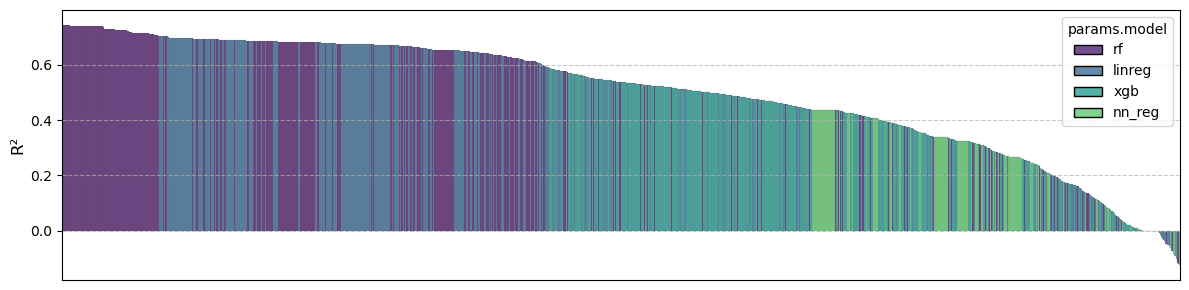

In [68]:
plt.figure(figsize=(12, 3))
sns.histplot(
    data=df_metrics,
    x=df_metrics.index,
    weights=df_metrics["metrics.r2_val"],
    bins=len(df_metrics),  
    hue=df_metrics["params.model"],
    #palette=model_colors,
    palette=model_colors,
    element="bars",
    multiple="stack"  
)

plt.xlim(df_metrics.index.min(), df_metrics.index.max())
plt.xlabel("")
plt.ylabel("R²",  fontsize=12)
plt.xticks([], [])  # Hide x-axis labels
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.savefig('/home/lfloerl/cloud/lfloerl/Microterroir/Figures/RITME-temp-test-R2-900trials.png', dpi=1000)
plt.show()

/scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/scratch/lfloerl/.condaenvs/ri

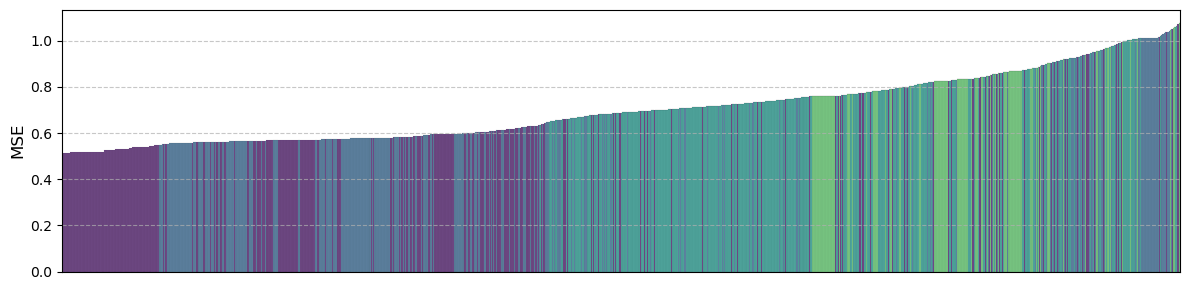

In [69]:
plt.figure(figsize=(12, 3))
sns.histplot(
    data=df_metrics,
    x=df_metrics.index,
    weights=df_metrics["metrics.rmse_val"],
    bins=len(df_metrics),  
    hue=df_metrics["params.model"],
    palette=model_colors,
    element="bars",
    multiple="stack"  
)

plt.xlim(df_metrics.index.min(), df_metrics.index.max())
plt.xlabel("")
plt.ylabel("MSE",  fontsize=12)
plt.xticks([], [])  # Hide x-axis labels
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.legend([], [], frameon=False)

plt.tight_layout()
plt.savefig('/home/lfloerl/cloud/lfloerl/Microterroir/Figures/RITME-temp-test-MSE-900trials.png', dpi=1000)
plt.show()

# Extracting trained best models
Get best models for further usage

The best models are stored in Python dictionary best_model_dict with model_type as keys and TunedModel objects as values. To extract a given best model and perform predictions with it, see below code excerpt:

In [19]:
if path_to_store_best_models is not None:
    print(f"Saving best models to {path_to_store_best_models}...")
    if not os.path.exists(path_to_store_best_models):
        os.makedirs(path_to_store_best_models)

    save_best_models(best_model_dict, path_to_store_best_models)

Saving best models to Temp_byYear_best_models...


In [ ]:
def load_best_models(output_dir: str):
    best_model = {}
    
    for filename in os.listdir(output_dir):
        if filename.endswith("_best_model.pkl"):
            model_type = filename.replace("_best_model.pkl", "")  # Extract model type from filename
            file_path = os.path.join(output_dir, filename)

            with open(file_path, "rb") as file:
                best_model[model_type] = pickle.load(file)
    
    return best_model  # Returns a dictionary like best_model_dic

best_model_dict = load_best_models(path_to_store_best_models)

In [20]:
# get best linreg model
best_linreg_model = best_model_dict["linreg"]

In [26]:
best_linreg_model.data_config

{'data_aggregation': None,
 'data_selection': 'variance_quantile',
 'data_selection_q': 0.8,
 'data_transform': 'ilr',
 'data_alr_denom_idx': None}

In [21]:
# perform prediction with best linreg model
test_predictions = best_linreg_model.predict(test, "test")
train_predictions = best_linreg_model.predict(train_val, "train")

In [22]:
if path_to_store_best_models is not None:
    print(f"Saving best models to {path_to_store_best_models}...")
    if not os.path.exists(path_to_store_best_models):
        os.makedirs(path_to_store_best_models)

    save_best_models(best_model_dict, path_to_store_best_models)

Saving best models to Temp_byYear_best_models...


In [26]:
# get true values 
md_df = pd.read_csv(path_to_md, sep='\t', index_col=0)

# subset to only contain the samples in the test dataset 
md_test = md_df.loc[test.index]
md_train = md_df.loc[train_val.index]

true_values_test = md_test['median_temperature'].values
true_values_train = md_train['median_temperature'].values

## Plot

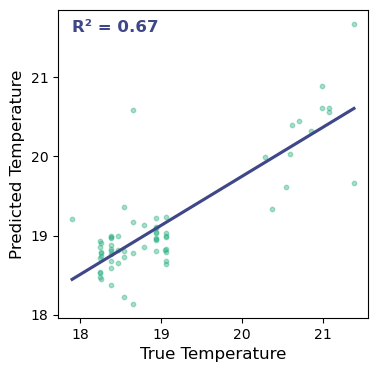

In [66]:
# Create scatterplot
plt.figure(figsize=(4, 4))
sns.regplot(x=true_values_test, y=test_predictions, ci=None, 
            scatter_kws={'s': 10, 'color': '#29AF7FFF', 'alpha':0.4}, 
            line_kws={'color': '#3F4788FF'})

# Compute R² score 
r2 = r2_score(true_values_test, test_predictions)
r2_text = f"R² = {r2:.2f}" if r2 >= 0 else "R² < 0"

# Adjust text position
y_text_position = np.percentile(test_predictions, 99.8)
plt.text(np.min(true_values_test), y_text_position, r2_text, 
         fontsize=12, color="#3F4788FF", fontweight='bold')


# Ensure integer ticks without unnecessary extension
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

# Labels
plt.xlabel("True Temperature", fontsize=12)
plt.ylabel("Predicted Temperature", fontsize=12)
#plt.title('Test Set')
# Show plot
plt.savefig('/home/lfloerl/cloud/lfloerl/Microterroir/Figures/RITME-Temp-test-best-model.png', dpi=1000)

plt.show()